<a href="https://colab.research.google.com/github/ariel-hedvat/AdvancedMLDLCourseAssignments/blob/Copy-Of-Ariel-combine/finalProject/Recommendation_System_Project_Group_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1><font size=6> Music Recommendation System - Final Project</font></h1>

  <u>Group members:</u><br>
  - Ariel Hedvat<br>
  - Shiraz Israeli<br>
  - Yuval Bakirov<br>
  - Eitan Bakirov

<br>

</div>

# Background/Introduction

Finding the perfect song to listen to can feel like a challenging quest.<br> This is where recommendation systems come in, using data science to help us discover new music that aligns with our tastes and preferences.

A recommendation system is a tool, that utilizes Big Data to understand user preferences and behaviors. <br> By analyzing factors like listening history and genre preferences, these systems suggest songs and artists that match an individual's tastes. And enhances the music discovery process, saving users time and effort while introducing them to new music they're likely to enjoy.


# Main Objective<br>

The objective of our project is to build a recommendation system that can suggest the top 10 songs to a user, <br> based on the likelihood that the user will enjoy those songs, having the users' musical preferences, we will use and test a few models, <br> and finally after evaluating and comparing between the models, we aim to create a system that enriches their music listening experience.


# Data

The Taste Profile Subset, provided by the Echo Nest as a component of the Million Song Dataset, comprises two files. <br> The 1st file includes song details such as song ID, title, release information, artist name, and release year.  <br> The 2nd file contains user IDs, song IDs, and the corresponding play counts by users.

`song_data.rar` - <br>

**song_id** - A unique id given to every song

**title** - Title of the song

**Release** - Name of the released album

**Artist_name** - Name of the artist

**year** - Year of release

<br>

`triplets_file.rar` - <br>

**user_id** - A unique id given to the user

**song_id** - A unique id given to the song

**listen_count** - Number of times the song was played

<div class="markdown-google-sans">
  <h1><font size=5>Table of Contents</font></h1>

>[Background/Introduction](#scrollTo=2PTur39mv9rt)

>[Main Objective](#scrollTo=kaFLNJh5gnu7)

>[Data](#scrollTo=6KQAH9j-qoZw)

>[Import Libraries](#scrollTo=-_VBJ0JlYLKI)

>>[Basic Imports](#scrollTo=DfVSoiTHeowk)

>>[Recommendation system package](#scrollTo=CPDxqlEyemoR)

>[Loading the data](#scrollTo=kXwOL606ZfUN)

>[Initial preprocessing](#scrollTo=10dFieGliGFn)

>>[Song_df dataframe](#scrollTo=IJA-XGJ6HV68)

>>[Count_df dataframe](#scrollTo=htOexCjuHQ0M)

>>[Merging the data](#scrollTo=HGCZ7ah8iOMa)

>[Exploratory Data Analysis](#scrollTo=Wm5QD4lUigH8)

>>[Basic Analysis](#scrollTo=qkJFCKRIjnuW)

>>[Advanced Analysis and Visualizations](#scrollTo=SEA7knfAh4za)

>>>[Year analysis](#scrollTo=dmiauj7xgZH_)

>>>[Song analysis](#scrollTo=BY6acd5PkqbD)

>>>[Artist analysis](#scrollTo=rF2YPkwDkuiz)

>>>[Album analysis](#scrollTo=YYNgk9wUlB-e)

>>>[Listen Count analysis](#scrollTo=o1iMMVBl1aW7)

>>>[User analysis](#scrollTo=q7SIPB7nk06k)

>>>[Rating analysis](#scrollTo=RGNffdYgXHqg)

>[Preprocessing](#scrollTo=8iVqCeAMimBE)

>>[User and Song IDs encoding](#scrollTo=jsxYwKPKV5Sh)

>>[Dropping users < 30 different songs](#scrollTo=U2BrEI9012Cs)

>>[Dropping songs < 120 different users](#scrollTo=PXXcEukU7DBn)

>>[Dropping listen_count > 10 - TODO](#scrollTo=WvYHAuCEhyie)

>>[Final Preprocessing function](#scrollTo=eXKLfpi_TU7L)

>[Preparing the data for modeling](#scrollTo=TMGhhINR5oO9)

>>[Split the data](#scrollTo=rwgDfYInNC-p)

>>[Adding rating](#scrollTo=16ekfgyUc96n)

>>[Data for models](#scrollTo=-Vxs8fpS3N8J)

>[Useful functions](#scrollTo=AcKOcVdFdfdv)

>[Recommendation system models & algorithms workflow](#scrollTo=8Pcuorlao5Ho)

>[Rank-based (Popularity)](#scrollTo=UG4hsVH2o5Hp)

>[Collaborative-filtering](#scrollTo=uZX1s5honcYg)

>>[Similarity/Neighborhood-based](#scrollTo=C-AdyyD6ncFC)

>>>[User-User Similarity-Based CF Model](#scrollTo=bKs3EB20Z9Cv)

>>>[Item-item Similarity-Based CF Model](#scrollTo=sQlfGaUoBDt8)

>>[Model-Based Collaborative Filtering - Matrix Factorization](#scrollTo=CuT5aKXLQhmx)

>>[NCF - TODO](#scrollTo=GhfYkXHWV1zS)

>>[Cluster-based Collaborative Filtering - coClustering](#scrollTo=64yKmMik-kGv)

>>>[Baseline Cluster-Based model](#scrollTo=EImCKxnt-kG2)

>>>[Tuning the baseline Cluster-Based model](#scrollTo=SVeB9HKh-kG7)

>[Content-based](#scrollTo=z1_QHU4Ghv_E)

>>>>[Preparing The Data](#scrollTo=rdImj_iw9-GD)

>>>>[Text Data Preprocessing](#scrollTo=9N4nMHUkTEno)

>>>>[TF-IDF](#scrollTo=JY3nVvJy-bew)

>>>>[Cosine Similarity](#scrollTo=tOVQXC4c-yeZ)

>>>>[Top N most similar songs to a song](#scrollTo=3Jjo3UHKhoEh)

>>>>>[Recommend 10 songs similar to song id 605, a song that exists in the database](#scrollTo=o4EINBmkR-F8)

>>>>>[Recommend 10 songs similar to song_id 99999999, a song that doesn't exists in the database](#scrollTo=_CZ9OHwyBwuj)

>>>>[Top K Most Recommended Songs To A User](#scrollTo=t8BkrIZt_Xhw)

>[Evaluation metrics](#scrollTo=5lX4C4NzlmOK)

>[Showing predictions](#scrollTo=oQM77QyV86c3)

>[Comparing the models](#scrollTo=HJLFpdHpoRGe)

>[Final thoughts](#scrollTo=rzu6n94-onDL)



#  Import Libraries

In [789]:
!pip install rarfile

In [790]:
!pip install tabulate

## Basic Imports

In [791]:
import sys

# Basic libraries of python for numeric and dataframe computations
import pandas as pd
import numpy as np

from tabulate import tabulate

# Import Matplotlib the Basic library for data visualization
import matplotlib.pyplot as plt

# Import seaborn - Slightly advanced library for data visualization
import seaborn as sns

# Import the required library to compute the cosine similarity between two vectors
from sklearn.metrics.pairwise import cosine_similarity

# Import defaultdict from collections A dictionary output that does not raise a key error
from collections import defaultdict

# Import mean_squared_error : a performance metrics in sklearn
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import LabelEncoder

import rarfile
from io import BytesIO
import requests
from PIL import Image

import matplotlib.colors as mcolors

import random

import time

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from wordcloud import WordCloud

# for mf embeddings
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from keras.models import Model
from keras.layers import Embedding, Flatten, Input, Dot
from keras.utils import plot_model
from IPython.display import Image

import warnings
warnings.filterwarnings('ignore')

In [792]:
# Custom colors #TODO TO CHANGING THAT
class clr:
    S = '\033[1m' + '\033[92m'
    E = '\033[0m'

## Recommendation system package


In the following models we will use the "Surprise " Library :
* **Surprise** - Surprise is one of the “scikit-based Python” libraries to develop recommender systems using explicit rating data. <br> This package allows building and evaluating recommender systems, offering a range of collaborative filtering algorithms and evaluation metrics (accuracy etc). <br> Surprise provides several algorithms to develop collaborative filtering recommender systems, starting from memory-based method (i.e. KNN) to model-based method (i.e. Singular Value Decomposition- SVD).
* Here is its documentation: [surprise](https://surpriselib.com/)


In [793]:
# Install the surprise package using pip. Uncomment and run the below code to do the same

!pip install surprise

In [794]:
# Import the necessary libraries

# To compute the accuracy of models
from surprise import accuracy

# This class is used to parse a file containing play_counts, data should be in structure - user; item; play_count
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset
from surprise.dataset import DatasetAutoFolds

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV, RandomizedSearchCV

# For splitting the data in train and test dataset TODO remove!
from surprise.model_selection import train_test_split as surprise_split

# The regular split TODO remove name if surprise was removed
from sklearn.model_selection import train_test_split as sk_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# For implementing KFold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

# Loading the data

In [795]:
song_data_rar_url = 'https://raw.githubusercontent.com/ariel-hedvat/AdvancedMLDLCourseAssignments/main/finalProject/Data/song_data.rar'
count_data_rar_url = 'https://raw.githubusercontent.com/ariel-hedvat/AdvancedMLDLCourseAssignments/main/finalProject/Data/triplets_file.rar'

In [796]:
# Download the RAR files
song_data_rar_response = requests.get(song_data_rar_url)
count_data_rar_response = requests.get(count_data_rar_url)

In [797]:
def extract_csv_from_rar(rar_content):
    # Create a RarFile object from the content
    with rarfile.RarFile(BytesIO(rar_content), 'r') as rar_file:
        # Get list of files in the RAR archive
        file_list = rar_file.namelist()

        # Initialize empty DataFrames
        df = pd.DataFrame()

        # Iterate through each file in the archive
        for file_name in file_list:
            # Check if the file is a CSV file
            if file_name.endswith('.csv'):
                print(file_name)
                # Extract the CSV file and read it into a DataFrame
                with rar_file.open(file_name) as csv_file:
                    df = pd.read_csv(csv_file)

    return df

In [798]:
if song_data_rar_response.ok and count_data_rar_response.ok:
    # Extract content from the responses
    song_data_rar_content = song_data_rar_response.content
    count_data_rar_content = count_data_rar_response.content

    # Extract CSV files from RAR archives and convert to DataFrames
    song_df = extract_csv_from_rar(song_data_rar_content)
    count_df = extract_csv_from_rar(count_data_rar_content)
else:
  print("Error accessing the rar files, Try Again!")

song_data.csv
triplets_file.csv


# Initial preprocessing

Before exploring the data in depth we will fix and merge some of the dataframes:

As described before, we have 2 datasets that we will be working with:
- song_df - songs and their metadata.
- count_df - User-Song interactions - each song a user has listened to is a seperate row in the dataframe.

In [799]:
song_df

song_id                                title  \
0       SOQMMHC12AB0180CB8                         Silent Night   
1       SOVFVAK12A8C1350D9                          Tanssi vaan   
2       SOGTUKN12AB017F4F1                    No One Could Ever   
3       SOBNYVR12A8C13558C                        Si Vos Querés   
4       SOHSBXH12A8C13B0DF                     Tangle Of Aspens   
...                    ...                                  ...   
999995  SOTXAME12AB018F136                      O Samba Da Vida   
999996  SOXQYIQ12A8C137FBB                         Jago Chhadeo   
999997  SOHODZI12A8C137BB3                              Novemba   
999998  SOLXGOR12A81C21EB7                              Faraday   
999999  SOWXJXQ12AB0189F43  Fernweh feat. Sektion Kuchikäschtli   

                                     release       artist_name  year  
0                      Monster Ballads X-Mas  Faster Pussy cat  2003  
1                                Karkuteillä  Karkkiautomaatti  1995  
2                                     Butter    Hudson Mohawke  2006  
3                                    De Culo       Yerba Brava  2003  
4       Rene Ablaze Presents Winter Sessions        Der Mystic     0  
...                                      ...               ...   ...  
999995                          Pacha V.I.P.      Kiko Navarro     0  
999996              Naale Baba Lassi Pee Gya     Kuldeep Manak     0  
999997       Dub_Connected: electronic music    Gabriel Le Mar     0  
999998          The Trance Collection Vol. 2             Elude     0  
999999                            So Oder So             Texta  2004  

[1000000 rows x 5 columns]

In [800]:
count_df

user_id             song_id  \
0        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995   
1        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B   
2        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0   
3        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D   
4        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODACBL12A8C13C273   
...                                           ...                 ...   
1999995  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJEYPO12AAA8C6B0E   
1999996  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJJYDE12AF729FC16   
1999997  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJKQSF12A6D4F5EE9   
1999998  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJUXGA12AC961885C   
1999999  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJYOLS12A8C13C06F   

         listen_count  
0                   1  
1                   2  
2                   1  
3                   1  
4                   1  
...               ...  
1999995             2  
1999996             4  
1999997             3  
1999998             1  
1999999             1  

[2000000 rows x 3 columns]

## Song_df dataframe

Song dataframe exploration:

In [801]:
# Song_df info
song_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   song_id      1000000 non-null  object
 1   title        999983 non-null   object
 2   release      999993 non-null   object
 3   artist_name  1000000 non-null  object
 4   year         1000000 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 38.1+ MB


In [802]:
# Shape of song_df
song_df.shape

(1000000, 5)

In [803]:
# Checking for missing values in song_df
song_df.isna().sum()

song_id         0
title          17
release         7
artist_name     0
year            0
dtype: int64

In [804]:
#Number of unique values in each column of song_df
song_df.nunique()

song_id        999056
title          702427
release        149287
artist_name     72665
year               90
dtype: int64

Initial insights:
- The df has 1000000 songs but only 999056 unique ones - meaning there are almost 1000 duplicates.
- There are a small number of missing titles to songs.
- There are 5 album missing names.
- There are simillar song titles.
- The data contains songs from 90 different years.

## Count_df dataframe

Count_df dataset exploration :

In [805]:
# Count_df info
count_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   user_id       object
 1   song_id       object
 2   listen_count  int64 
dtypes: int64(1), object(2)
memory usage: 45.8+ MB


In [806]:
# Shape of count_df
count_df.shape

(2000000, 3)

In [807]:
# Checking for missing values in count_df
count_df.isna().sum()

user_id         0
song_id         0
listen_count    0
dtype: int64

In [808]:
#Number of unique values in each column of count_df
count_df.nunique()

user_id         76353
song_id         10000
listen_count      295
dtype: int64

Initial insights:
- The df has 2000000 user-song interactions.
- There are no missing values.
- There are 76353 unique users.
- There are 10000 songs played by the users - meaning that we have a lot of "unused" songs in the songs_df dataset.

## Merging the data

Now we will create a merged dataframe of the two dfs, and at the same time, to get rid of the repeating songs in the song table.<br>
From the resulting combination we will get rid of duplicates according to the identification key of a user with a song.

In [809]:
# Merge count_df and song_df by song_id
combined_df = count_df.merge(song_df.drop_duplicates('song_id'), how='left', on='song_id').drop_duplicates()

In [810]:
combined_df

user_id             song_id  \
0        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995   
1        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B   
2        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0   
3        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D   
4        b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODACBL12A8C13C273   
...                                           ...                 ...   
1999995  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJEYPO12AAA8C6B0E   
1999996  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJJYDE12AF729FC16   
1999997  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJKQSF12A6D4F5EE9   
1999998  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJUXGA12AC961885C   
1999999  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJYOLS12A8C13C06F   

         listen_count                           title  \
0                   1                        The Cove   
1                   2                 Entre Dos Aguas   
2                   1                        Stronger   
3                   1                  Constellations   
4                   1                    Learn To Fly   
...               ...                             ...   
1999995             2       Ignorance (Album Version)   
1999996             4          Two Is Better Than One   
1999997             3  What I've Done (Album Version)   
1999998             1                              Up   
1999999             1      Soil_ Soil (Album Version)   

                               release  \
0                   Thicker Than Water   
1                  Flamenco Para Niños   
2                           Graduation   
3                    In Between Dreams   
4        There Is Nothing Left To Lose   
...                                ...   
1999995                      Ignorance   
1999996                     Love Drunk   
1999997                 What I've Done   
1999998                      My Worlds   
1999999                        The Con   

                                    artist_name  year  
0                                  Jack Johnson     0  
1                                 Paco De Lucia  1976  
2                                    Kanye West  2007  
3                                  Jack Johnson  2005  
4                                  Foo Fighters  1999  
...                                         ...   ...  
1999995                                Paramore     0  
1999996  Boys Like Girls featuring Taylor Swift  2009  
1999997                             Linkin Park  2007  
1999998                           Justin Bieber  2010  
1999999                          Tegan And Sara  2007  

[2000000 rows x 7 columns]

# Exploratory Data Analysis

## Basic Analysis

In [811]:
df = combined_df.copy()

In [812]:
# Shape of the data
df.shape

(2000000, 7)

Looking at the types of the df:

In [813]:
#Checking Data Types
df.dtypes

user_id         object
song_id         object
listen_count     int64
title           object
release         object
artist_name     object
year             int64
dtype: object

Based on our knowledge of the features and the data displayed above we can conclude that: <br>

Our dataset consists 7 features and 2000000 observations.
The features types :

`user_id`, `song_id` - are unique variables, thus we leave them as <u><b>String (Object)</b></u> data types.

`listen_count` is a <u><b>Numeric</b></u> data type.

`title`, `release` and `artist_name` - are <u><b>String (Object)</b></u> data types.

`year` is a <u><b>Numeric</b></u> data type.


In [814]:
def change_data_types(df):

  df['user_id'] = df['user_id'].astype('object')
  df['song_id'] = df['song_id'].astype('object')
  df['listen_count'] = df['listen_count'].astype('int64')
  df['title'] = df['title'].astype('object')
  df['release'] = df['release'].astype('object')
  df['artist_name'] = df['artist_name'].astype('object')
  df['year'] = df['year'].astype('int64')

  return df

In [815]:
df = change_data_types(df)

In [816]:
df.dtypes

user_id         object
song_id         object
listen_count     int64
title           object
release         object
artist_name     object
year             int64
dtype: object

Describe function will not discribe the "year" feature well. We dont want it to make an average of the years or its std and etc.. It has no meaning for us.

In [817]:
#Summary Statistics (of Numeric features)
# Excluding the 'year' column from df.describe()
describe_without_year = df.drop(columns=['year']).describe()

# Displaying the descriptive statistics
print(describe_without_year)


       listen_count
count  2.000000e+06
mean   3.045485e+00
std    6.579720e+00
min    1.000000e+00
25%    1.000000e+00
50%    1.000000e+00
75%    3.000000e+00
max    2.213000e+03


In [818]:
#Missing Values
df.isnull().sum()

user_id         0
song_id         0
listen_count    0
title           0
release         0
artist_name     0
year            0
dtype: int64

As we can see, in the meantime, we solved the problem of the missing values we have obsered before in the df.songs. <br>
All the songs that were played by the users are without missing values in their metadata.

In [819]:
#Unique Values
df.nunique()

user_id         76353
song_id         10000
listen_count      295
title            9567
release          5388
artist_name      3375
year               58
dtype: int64

Finally, we have a total of 76000 different users listening to 10000 different songs.

In [820]:
# Sum the values in the 'listen_count' column
df['listen_count'].sum()

6090969

We have a total of 6,090,969 listen counts in the data.

## Advanced Analysis and Visualizations

After dealing with the regular EDA of the features, now we would try and find some outliers or sparse data that is hidden in the dimensions of the data:

We can devide this section into sub-sections based on each feature in the following way:
- Song analysis
- Album analysis
- Artist analysis
- User anaysis

We will try to find key components that may lead to a deeper understanding of the data and maybe draw some important conclusions for the following sections of our project.

### Year analysis

We first want to explore the released year of the songs the users listened to:

In [821]:
# Bar Plot of Number of Unique Songs Released by Year
def plot_unique_songs_by_year(df):
    # Group the DataFrame by 'year' and count the number of unique 'song_id' for each year
    unique_songs_by_year = df.groupby('year')['song_id'].nunique().reset_index(name='num_unique_songs')

    # Print the number of unique songs released in each year
    print("Number of Unique Songs Released by Year:")
    print(unique_songs_by_year)

    # Plotting the bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x='year', y='num_unique_songs', data=unique_songs_by_year, color='gold')
    plt.xticks(rotation=45)
    plt.title('Number of Unique Songs Released by Year', weight="bold", size=14)
    plt.xlabel('Year')
    plt.ylabel('Number of Unique Songs Released')
    plt.show()

    # Calculate the sum of num_unique_songs
    total_unique_songs = unique_songs_by_year['num_unique_songs'].sum()

    # Print the sum
    print("Count of unique songs:", total_unique_songs)

    # Check if the sum is 10000
    if total_unique_songs == 10000:
        print("The count is 10000 - Great!")

Number of Unique Songs Released by Year:
    year  num_unique_songs
0      0              1773
1   1954                 1
2   1955                 1
3   1956                 2
4   1957                 1
5   1958                 6
6   1959                 6
7   1960                 5
8   1961                 3
9   1962                 7
10  1963                 6
11  1964                14
12  1965                16
13  1966                15
14  1967                23
15  1968                29
16  1969                29
17  1970                47
18  1971                22
19  1972                36
20  1973                25
21  1974                31
22  1975                22
23  1976                25
24  1977                35
25  1978                46
26  1979                37
27  1980                35
28  1981                42
29  1982                57
30  1983                51
31  1984                65
32  1985                49
33  1986                67
34  1987      

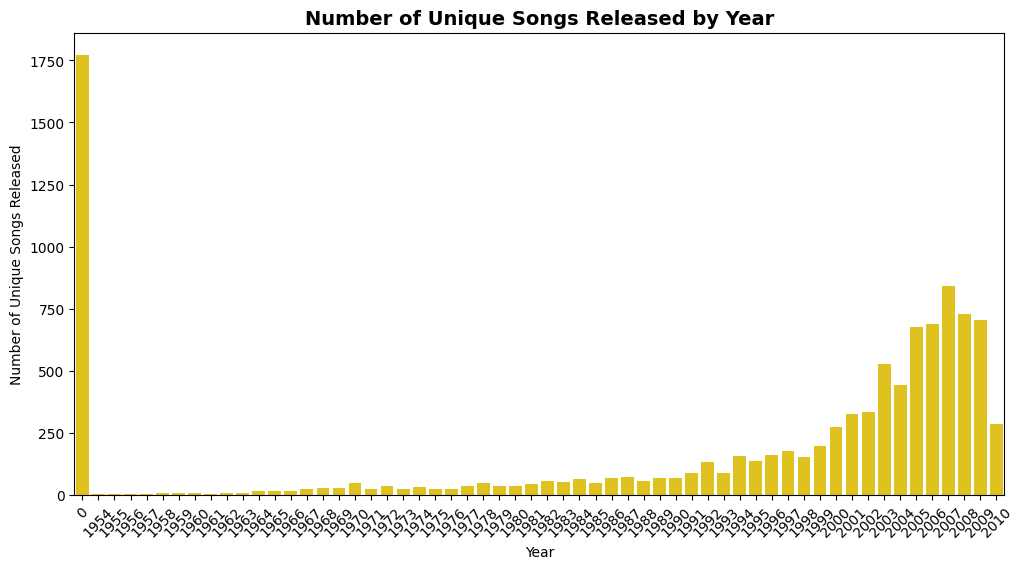

Count of unique songs: 10000
The count is 10000 - Great!


In [822]:
# Call the function to plot the number of unique songs released by year
plot_unique_songs_by_year(df)

Another check of the strange find:

In [823]:
# Filter the DataFrame for songs with a release year of 0 and count the occurrences
num_songs_year_0 = df[df['year'] == 0]['song_id'].nunique()

# Print the result
print("Number of songs with a release year of 0:", num_songs_year_0)


Number of songs with a release year of 0: 1773


We can see that there are a lot of year = 0 songs.<br>
It will be difficult to complete what year these songs released.<br> Normalizing it would probably bias our exploration - Therefore, we will probably leave them out. <br>



- Before implementing our find, we will do some final research:

In [824]:
shape_before_dropping = df.shape
print("Shape of our df before dropping year = 0:", shape_before_dropping)

# Sum the values in the 'listen_count' column
listen_count_before_dropping = df['listen_count'].sum()
print("Sum of all the listen count before dropping year = 0:", listen_count_before_dropping)

different_song_count_before_dropping = df['song_id'].nunique()
print("Number of different songs before dropping year = 0:", different_song_count_before_dropping)

different_user_count_before_dropping = df['user_id'].nunique()
print("Number of different users before dropping year = 0:", different_user_count_before_dropping)

Shape of our df before dropping year = 0: (2000000, 7)
Sum of all the listen count before dropping year = 0: 6090969
Number of different songs before dropping year = 0: 10000
Number of different users before dropping year = 0: 76353


In [825]:
# Dropping all the songs their released year is 0.
df = df[df['year'] > 0]

- By dropping year = 0, we lost some songs their released year was 0.<br> Moreover, we lost some users who listened only to songs its released year was 0. <br>
Of course, the total number of listens became smaller.<br>
Here are the findings:

In [826]:
shape_after_dropping = df.shape
print("Shape of our df after dropping year = 0:", shape_after_dropping)

# Sum the values in the 'listen_count' column
listen_count_after_dropping = df['listen_count'].sum()
print("Sum of all the listen count after dropping year = 0:", listen_count_after_dropping)

different_song_count_after_dropping = df['song_id'].nunique()
print("Number of different songs after dropping year = 0:", different_song_count_after_dropping)

different_user_count_after_dropping = df['user_id'].nunique()
print("Number of different users after dropping year = 0:", different_user_count_after_dropping)

Shape of our df after dropping year = 0: (1627878, 7)
Sum of all the listen count after dropping year = 0: 4849531
Number of different songs after dropping year = 0: 8227
Number of different users after dropping year = 0: 76057


In [827]:
print("By dropping year = 0, we reduced the amount of samples by:", shape_before_dropping[0] - shape_after_dropping[0])
print("By dropping year = 0, we reduced the amount of listening by:", listen_count_before_dropping - listen_count_after_dropping)
print("By dropping year = 0, we reduced the number of songs by:", different_song_count_before_dropping - different_song_count_after_dropping)
print("By dropping year = 0, we reduced the number of users by:", different_user_count_before_dropping - different_user_count_after_dropping)

By dropping year = 0, we reduced the amount of samples by: 372122
By dropping year = 0, we reduced the amount of listening by: 1241438
By dropping year = 0, we reduced the number of songs by: 1773
By dropping year = 0, we reduced the number of users by: 296


In [828]:
combined_df = df.copy()

Number of Unique Songs Released by Year:
    year  num_unique_songs
0   1954                 1
1   1955                 1
2   1956                 2
3   1957                 1
4   1958                 6
5   1959                 6
6   1960                 5
7   1961                 3
8   1962                 7
9   1963                 6
10  1964                14
11  1965                16
12  1966                15
13  1967                23
14  1968                29
15  1969                29
16  1970                47
17  1971                22
18  1972                36
19  1973                25
20  1974                31
21  1975                22
22  1976                25
23  1977                35
24  1978                46
25  1979                37
26  1980                35
27  1981                42
28  1982                57
29  1983                51
30  1984                65
31  1985                49
32  1986                67
33  1987                71
34  1988      

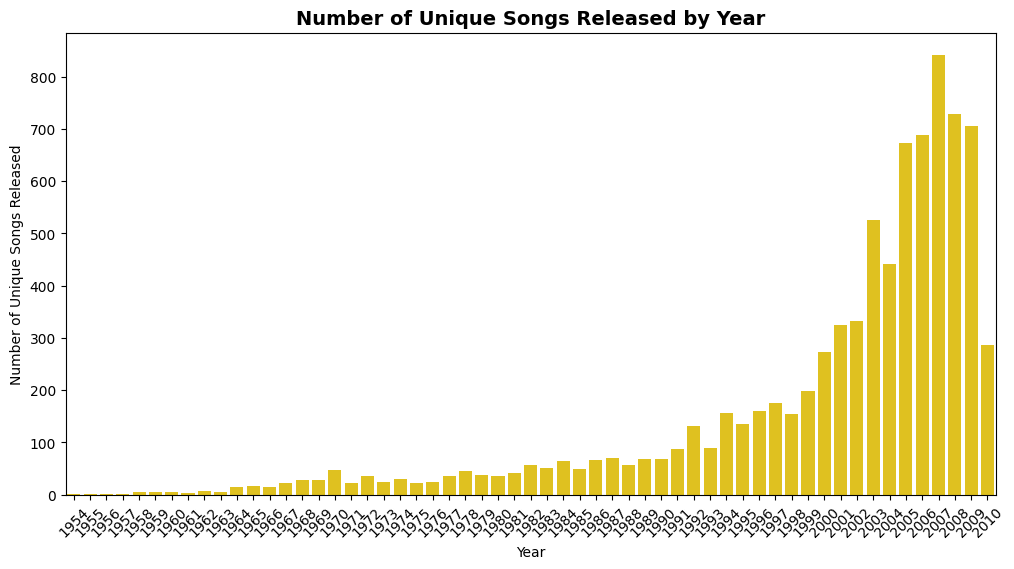

Count of unique songs: 8227


In [829]:
# Call the function to plot the number of unique songs released by year
plot_unique_songs_by_year(df)

In [830]:
unique_song_count = len(df['song_id'].unique())
print("Number of Unique Songs After:", unique_song_count)

print("The system omitted {} songs whose released year was 0.".format(different_song_count_before_dropping - unique_song_count))


Number of Unique Songs After: 8227
The system omitted 1773 songs whose released year was 0.


TODO To check which timeframe the data is from?

It can be concluded from the plot that the users we have in the data listen to more contemporary songs, or alternatively, it can be concluded that as the years passed, more songs were released in each year. <br>
There is a little indent about songs released in 2004. We can think that either few songs were released this year, or, our users less liked songs released this year.

In order to answer this question, let's run a correlation matrix: <br>
Because only "listen_count" and "year" features are numerical features, we will only look at those.

In order for the correlation matrix to work correctly and examine a correlation between these two features, we would like to group our data by the year the song was released. In this way, we will counte the number of listens count grouped by each year of release.<br>
We will examine whether there is a correlation between the year the songs were released in and the number of times these songs were listened.<br>

In [831]:
# Define the custom colormap
colors = ['gold', 'brown']
custom_cmap = mcolors.LinearSegmentedColormap.from_list('custom_cmap', colors)

def plot_correlation_matrix(df):
    # Filter out rows where year is not 0
    df_filtered = df[df['year'] != 0]

    # Group the DataFrame by 'year' and sum the 'listen_count' for each year
    yearly_listen_counts = df_filtered.groupby('year')['listen_count'].sum().reset_index()

    # Create the correlation matrix
    correlation_matrix = yearly_listen_counts.corr()

    # Plotting the correlation matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(correlation_matrix, annot=True, cmap=custom_cmap, fmt=".2f")
    plt.title('Correlation Matrix')
    plt.show()


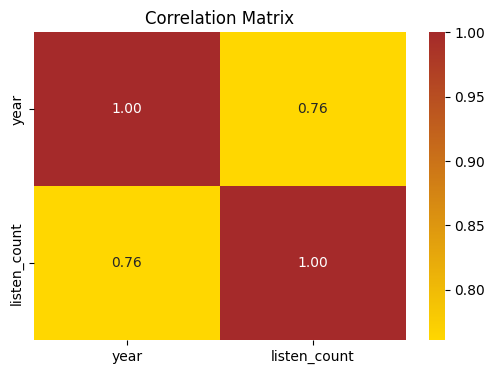

In [832]:
# Call the function to plot the correlation matrix
plot_correlation_matrix(df)

Seems pretty coordinated.<br>
We can conclude that our users like to listen to more recent songs.

### Song analysis

Let's take a look at the most listened songs:

In [833]:
def calculate_top_songs(df, n=10):
    """
    Calculate the top n songs based on the total listen counts.

    Parameters:
        df (DataFrame): The DataFrame containing the song data.
        n (int): The number of top songs to calculate.

    Returns:
        Series: A Series containing the top n songs based on total listen counts.
    """
    # Calculate the total listen counts for each song
    listen_counts = df.groupby('title')['listen_count'].sum()

    # Sort the songs by listen counts in descending order
    listen_counts = listen_counts.sort_values(ascending=False)

    # Select the top n songs
    top_songs = listen_counts.head(n)

    return top_songs


def plot_top_songs(top_songs):
    """
    Plot the top songs based on their total listen counts.

    Parameters:
        top_songs (Series): A Series containing the top songs based on total listen counts.
    """
    # Plotting the top songs
    plt.figure(figsize=(12, 10))
    top_songs.plot(kind='bar', color='skyblue')
    plt.title('Top {} Most Played Songs'.format(len(top_songs)))
    plt.xlabel('Song Title')
    plt.ylabel('Listen Count')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

    # Annotate each bar with its corresponding value on the y-axis
    for i, v in enumerate(top_songs):
        plt.text(i, v, str(v), ha='center', va='bottom')

    plt.tight_layout()  # Adjust layout to prevent clipping of labels
    plt.show()

Top 10 Songs:
title
You're The One    54915
Undo              49253
Revelry           41418
Secrets           22100
Invalid           19645
Représente        18054
Fireflies         14617
The Gift          14438
Tive Sim          14423
Marry Me          13116
Name: listen_count, dtype: int64


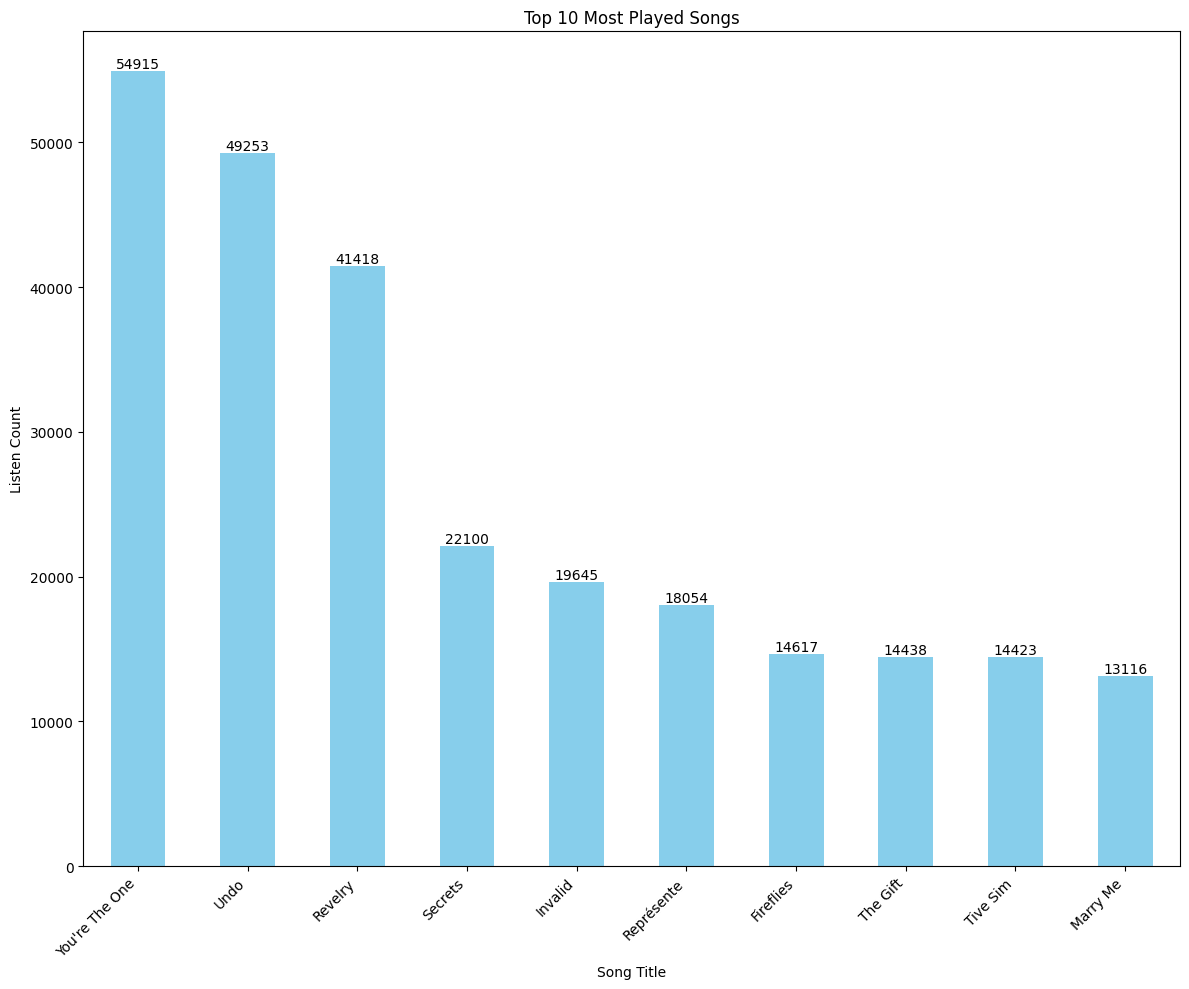

In [834]:
# Call the function to calculate the top songs
top_songs = calculate_top_songs(df)

# Print the top songs
print("Top {} Songs:".format(len(top_songs)))
print(top_songs)

# Call the function to plot the top songs
plot_top_songs(top_songs)

The song "You're The One" was played the most times, played 54915 times.

Now let's look at the songs played by the most different users:

In [835]:
def count_users_per_song(df):
    """
    Count the number of different users who listened to each song and sort the result by the number of users.

    Parameters:
        df (DataFrame): The DataFrame containing the song data.

    Returns:
        DataFrame: A DataFrame containing the song_id, title, and the number of different users who listened to each song,
                   sorted by the number of users in descending order.
    """
    # Group the DataFrame by 'song_id' and count the number of unique 'user_id' for each song
    users_per_song = df.groupby('song_id')['user_id'].nunique().reset_index(name='num_users')

    # Merge with the original DataFrame to get song titles
    users_per_song = pd.merge(users_per_song, df[['song_id', 'title']], on='song_id', how='left')

    # Drop duplicates to ensure each song appears only once
    users_per_song.drop_duplicates(inplace=True)

    # Sort the DataFrame by 'num_users' in descending order
    users_per_song_sorted = users_per_song.sort_values(by='num_users', ascending=False)

    return users_per_song_sorted

In [836]:
def plot_top_users_per_song(users_per_song_df, n=10):
    """
    Plot the number of different users who listened to each song for the top n songs.

    Parameters:
        users_per_song_df (DataFrame): DataFrame containing song IDs, titles, and the number of users.
        n (int): Number of top songs to plot.
    """
    top_songs = users_per_song_df.head(n)

    plt.figure(figsize=(12, 8))
    plt.barh(top_songs['title'], top_songs['num_users'], color='skyblue')
    plt.xlabel('Number of Different Users')
    plt.ylabel('Song Title')
    plt.title(f'Top {n} Songs by Number of Different Users')
    plt.gca().invert_yaxis()  # Invert y-axis to display songs with highest users at the top
    plt.show()

                    song_id  num_users                             title
52567    SOAUWYT12A81C206F1       7032                              Undo
104234   SOBONKR12A58A7A7E0       6412                    You're The One
1196793  SOSXLTC12AF72A7F54       6145                           Revelry
879508   SONYKOW12AB01849C9       5841                           Secrets
700314   SOLFXKT12AB017E3E0       4795                         Fireflies
...                     ...        ...                               ...
1238517  SOTLOKX12A8C1390C2         52               Big Girls Don't Cry
859197   SONOYTE12A6D4F8697         52  (I Can't Get Me No) Satisfaction
1439262  SOWNLZF12A58A79811         51                            Scared
111420   SOBPGWB12A6D4F7EF3         50                Don´t Leave Me Now
432083   SOGSPGJ12A8C134FAA         48        Ghosts (Toxic Avenger Mix)

[8227 rows x 3 columns]


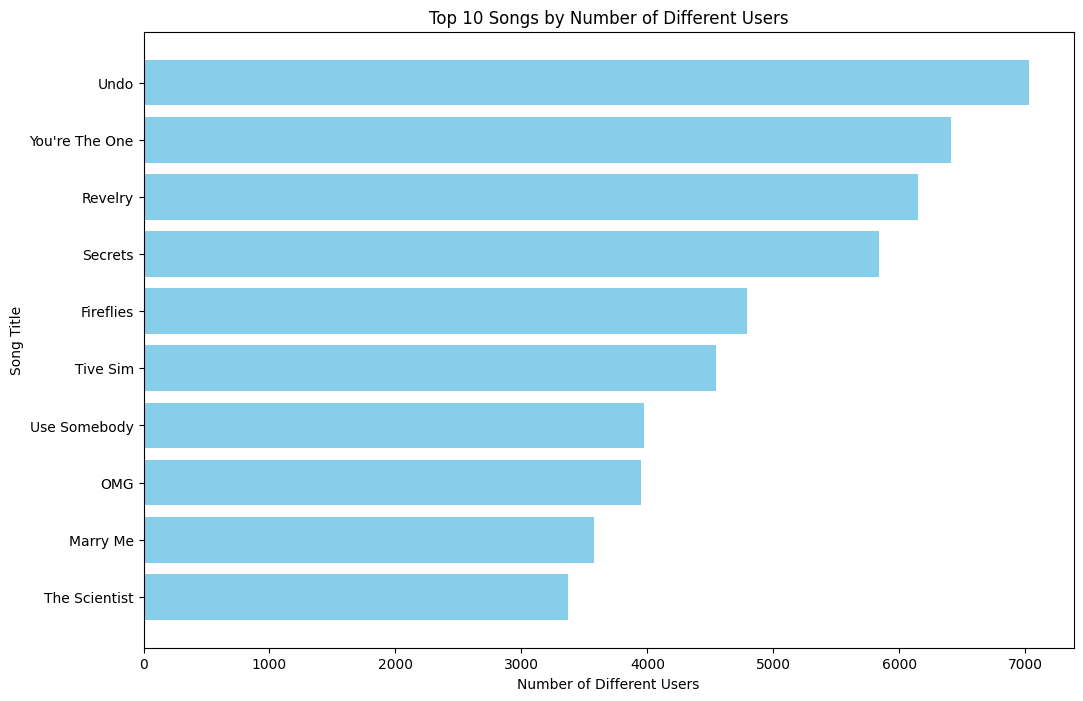

In [837]:
# Get the DataFrame containing the number of users per song
users_per_song_df = count_users_per_song(df)

# Print the DataFrame with song IDs, titles, and the number of users
print(users_per_song_df)

# Call the function to plot the top 10 songs by number of users
plot_top_users_per_song(users_per_song_df)

In [838]:
# Filter the DataFrame for the song "Undo"
undo_data = df[df['title'] == "Undo"]

# Count the number of unique users who listened to "Undo"
num_users_undo = undo_data['user_id'].nunique()

print("Number of users who listened to 'Undo':", num_users_undo)


Number of users who listened to 'Undo': 7032


We can learn that 7032 different users is the highest number of different users listened to a specific song - this song is called: "Undo".<br>
Moreover, 48 different users is the lowest number of different users listened to a specific song - this song is called: "Ghosts (Toxic Avenger Mix)" was listened to by only 48 different users.

Additionally, we would like to understand which songs have been played by enough different users.<br>
In our system we would like to give a higher value to songs played by more users.

In [839]:
def filter_songs_by_user_count(df, max_users_list):
    """
    Filter the DataFrame to include only songs listened to by less than a specified number of users.

    Parameters:
        df (DataFrame): The DataFrame containing the song data.
        max_users_list (list): A list of maximum number of users allowed for a song.

    Returns:
        dict: A dictionary containing filtered DataFrames for each specified maximum number of users.
    """
    filtered_results = {}

    for max_users in max_users_list:
        # Group the DataFrame by 'song_id' and count the number of unique users for each song
        song_listen_counts = df.groupby('song_id')['user_id'].nunique()

        # Filter out the songs with a user count greater than or equal to the specified maximum
        filtered_songs = song_listen_counts[song_listen_counts < max_users]

        # Filter the original DataFrame to include only the songs with less than the specified maximum users
        filtered_df = df[df['song_id'].isin(filtered_songs.index)]

        # Count songs with less and more than the specified maximum users
        num_less_users = len(filtered_songs)
        num_more_users = len(song_listen_counts) - num_less_users
        print(f"There are {num_less_users} songs listened to by less than {max_users} users.")
        print(f"There are {num_more_users} songs listened to by more than {max_users} users.")
        print()

        # Store the filtered DataFrame and results in the dictionary
        filtered_results[max_users] = {'filtered_df': filtered_df, 'num_less_users': num_less_users, 'num_more_users': num_more_users}

    return filtered_results


In [840]:
def plot_song_counts_by_max_users(filtered_results):
    """
    Plot the number of songs listened to by less and more than the specified maximum users.

    Parameters:
        filtered_results (dict): Dictionary containing filtered DataFrames and counts.
    """
    # Extract max_users_list, num_less_users_list, and num_more_users_list from filtered_results
    max_users_list = list(filtered_results.keys())
    num_less_users_list = [result['num_less_users'] for result in filtered_results.values()]
    num_more_users_list = [result['num_more_users'] for result in filtered_results.values()]

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar([str(max_users) for max_users in max_users_list], num_less_users_list, label='Less than', color="lightblue")
    plt.bar([str(max_users) for max_users in max_users_list], num_more_users_list, bottom=num_less_users_list, label='More than')

    # Adding labels and title
    plt.xlabel('Number of Users')
    plt.ylabel('Number of Songs')
    plt.title('Number of Songs Listened to by Less and More than the Specified Maximum Users')
    plt.legend()

    # Display the plot
    plt.show()

There are 0 songs listened to by less than 30 users.
There are 8227 songs listened to by more than 30 users.

There are 71 songs listened to by less than 60 users.
There are 8156 songs listened to by more than 60 users.

There are 2060 songs listened to by less than 90 users.
There are 6167 songs listened to by more than 90 users.

There are 3882 songs listened to by less than 120 users.
There are 4345 songs listened to by more than 120 users.

There are 4987 songs listened to by less than 150 users.
There are 3240 songs listened to by more than 150 users.

There are 6097 songs listened to by less than 200 users.
There are 2130 songs listened to by more than 200 users.



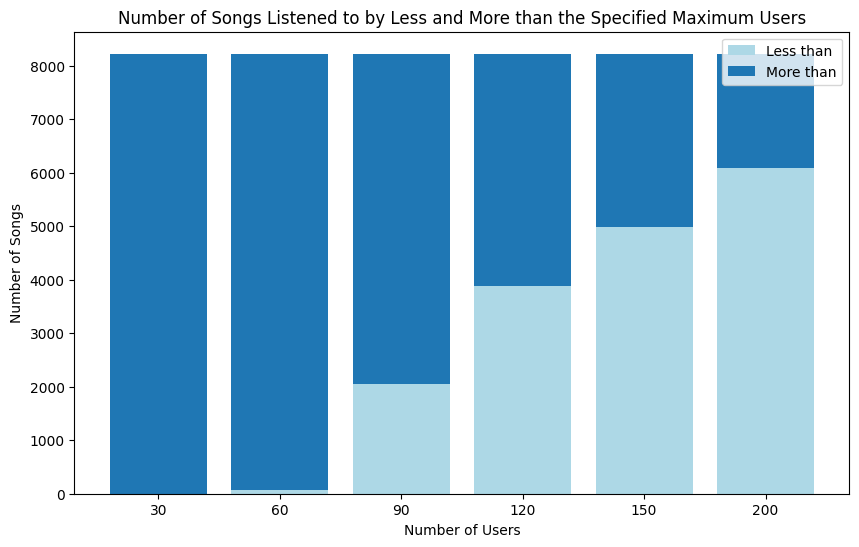

In [841]:
max_users_list = [30, 60, 90, 120, 150, 200]
filtered_results = filter_songs_by_user_count(df, max_users_list)

# Call the plot function directly with filtered results
plot_song_counts_by_max_users(filtered_results)

That's logical that as the number of users increases, there are fewer songs played by this increasing amount of users.<br>
As we can see, all the users listened to more than 30 different songs. It makes sense because we saw before that every song was listened to by at least 48 different users.<br>
We can see that there are a lot of songs that have been listened to by too few users, so it can be concluded that they are less popular.<br>
It will be more difficult to recommend those songs in our recommendation system.

According to the conclusions we drew from the printouts and from the diagram:<br>
There are 2060 songs listened to by less than 90 users.
There are 6167 songs listened to by more than 90 users.<br>
This will leave us with about 75% relevant songs -  seems like a reasonable restriction that doesn't leave out too many songs. <br>
It appears that 90 would be a great restrictor. <br>
We will deal with it later...



### Artist analysis

Some observations about the artists of the songs:

In [842]:
def plot_top_artists(df, n=10):
    # Calculate the total listen counts for each artist
    listen_counts = df.groupby('artist_name')['listen_count'].sum()

    # Sort the artists by listen counts in descending order
    listen_counts = listen_counts.sort_values(ascending=False)

    # Select the top n artists
    top_artists = listen_counts.head(n)

    # Printing the top artists
    print("Top", n, "Most Listened Artists:")
    print(top_artists)

    # Plotting the top artists with a horizontal bar plot
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_artists.values, y=top_artists.index, palette=sns.color_palette("Oranges_r", 10))
    plt.title('Top {} Most Listened Artists'.format(n))
    plt.xlabel('Total Listen Count')
    plt.ylabel('Artist')
    plt.tight_layout()  # Adjust layout to prevent clipping of labels

     # Adding count values next to each bar
    for i, count in enumerate(top_artists.values):
      plt.text(count, i, str(count), va='center', fontsize=10, color='black', ha='left')

    plt.show()


Top 10 Most Listened Artists:
artist_name
Coldplay          69528
Kings Of Leon     68570
Dwight Yoakam     54136
Björk             53814
The Black Keys    52220
Jack Johnson      43364
Justin Bieber     41645
OneRepublic       40981
Radiohead         34807
Linkin Park       34692
Name: listen_count, dtype: int64


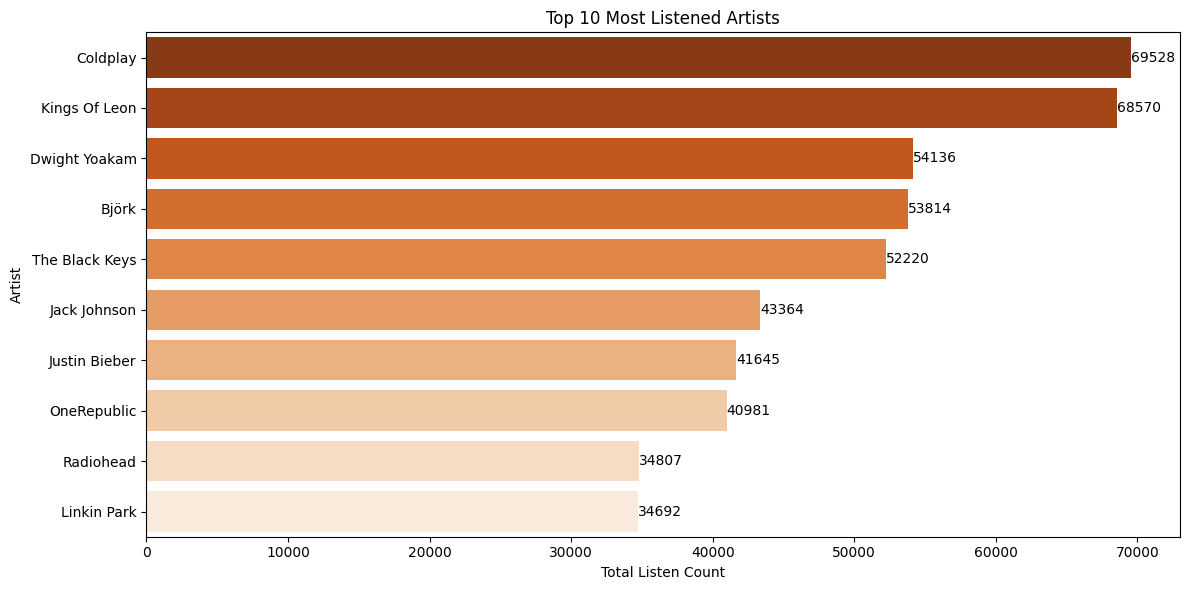

In [843]:
# Display the top 10 artists using a horizontal bar plot
plot_top_artists(df)

The artist whose songs have been played the most is "Coldplay". His songs played 69528 times.

### Album analysis

Some observations about the albums of the songs:

In [844]:
def release_insights(df):
    # Calculate total listen counts per release
    total_listen_counts = df.groupby('release')['listen_count'].sum()
    # Sort releases by total listen counts in descending order
    total_listen_counts = total_listen_counts.sort_values(ascending=False)

    # Print top releases with total listen counts
    print("Top Releases by Total Listen Counts:")
    print(total_listen_counts.head(10))

    # Plotting total listen counts
    plt.figure(figsize=(12, 6))
    sns.barplot(x=total_listen_counts.head(10).index, y=total_listen_counts.head(10).values, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel('Release')
    plt.ylabel('Total Listen Counts')
    plt.title('Top Releases by Total Listen Counts')

    # Annotate each bar with its corresponding value on the y-axis
    for i, v in enumerate(total_listen_counts.head(10).values):
        plt.text(i, v, str(v), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

Top Releases by Total Listen Counts:
release
If There Was A Way    54136
Vespertine Live       49652
Only By The Night     46811
Greatest Hits         39456
My Worlds             38094
Waking Up             33902
Lungs                 24570
Fat Come Back         22069
Fermi Paradox         19645
The Fame Monster      19155
Name: listen_count, dtype: int64


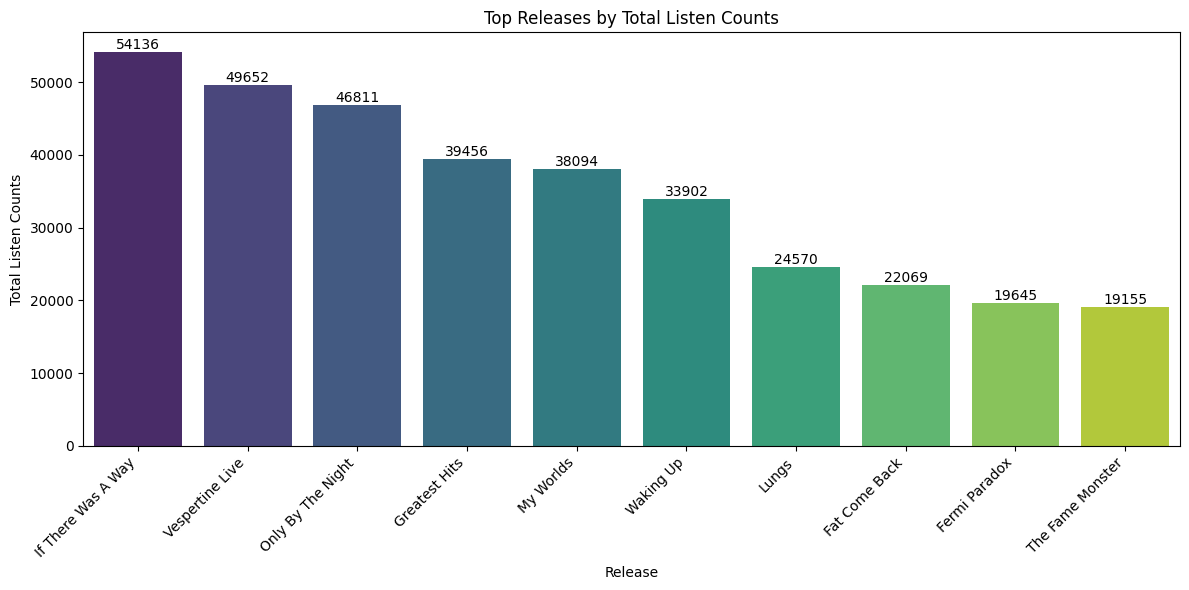

In [845]:
release_insights(df)

The most played album "If There Was A Way" was played 54136 times.

### Listen Count analysis

Let's look at the number of listens for a deeper understanding:

In [846]:
listen_count_df = df.groupby('listen_count')['listen_count'].count()

sorted_listen_count_df = listen_count_df.sort_values(ascending=False)

sorted_listen_count_df.head(20)

listen_count
1     935948
2     254896
3     116008
5      73317
4      66905
6      36187
7      24482
8      17938
10     14797
9      13298
11      9864
12      7754
13      6299
15      5445
14      5104
16      4145
17      3481
18      2937
20      2562
19      2526
Name: listen_count, dtype: int64

We can see that there are 935,948 out of 1,627,878  plays of songs that the user has listened only once.<br>
Can we conclude that he didn't like the song and therefore never listened to it again?

In [847]:
def plot_listen_count_distribution(listen_count_df, max_listen_count):
    listen_count_range = range(1, max_listen_count + 1)
    listen_count_counts = [listen_count_df.get(count, 0) for count in listen_count_range]

    plt.figure(figsize=(10, 6))
    plt.bar(listen_count_range, listen_count_counts, color='lightgreen')
    plt.title('Listen Count Distribution')
    plt.xlabel('Listen Count')
    plt.ylabel('Number of Plays')
    plt.xticks(listen_count_range, rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate each bar with its corresponding value on the y-axis
    for i, count in enumerate(listen_count_counts):
        plt.text(i + 1, count, str(count), ha='center', va='bottom')

    plt.show()


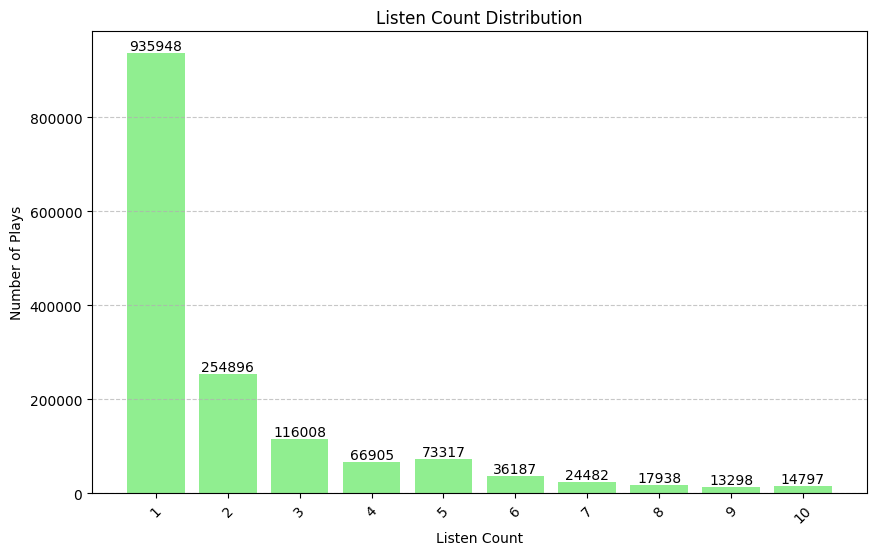

In [848]:
# Call the function to plot the distribution of listen counts within the range of 1 to max_listen_count
max_listen_count = 10  # Specify the maximum listen count
plot_listen_count_distribution(sorted_listen_count_df, max_listen_count)

In [849]:
sorted_listen_count_df.tail(100)

listen_count
152     2
207     2
292     2
215     2
224     2
       ..
250     1
246     1
243     1
236     1
2213    1
Name: listen_count, Length: 100, dtype: int64

What we saw now is how many samples there are for each 'listen_count' number.

Now, we would like to see the number of different users for each 'listen_count' group:

In [850]:
def calculate_users_per_listen_count(df):
    """
    Calculate the number of different users for each listen count group.

    Parameters:
        df (DataFrame): DataFrame containing the data.

    Returns:
        DataFrame: DataFrame containing the number of users for each listen count group.
    """
    # Group by listen count and count the number of unique users
    users_per_listen_count = df.groupby('listen_count')['user_id'].nunique().reset_index(name='num_users')
    return users_per_listen_count

def plot_users_per_listen_count(users_per_listen_count, n=20):
    """
    Plot the number of different users for each listen count group up to n listen counts.

    Parameters:
        users_per_listen_count (DataFrame): DataFrame containing the number of users for each listen count group.
        n (int): Maximum number of listen counts to plot.
    """
    plt.figure(figsize=(15, 6))
    plt.bar(users_per_listen_count['listen_count'][:n], users_per_listen_count['num_users'][:n], color='lightgreen')
    plt.title('Number of Users per Listen Count (Up to ' + str(n) + ' listen counts)')
    plt.xlabel('Listen Count')
    plt.ylabel('Number of Users')
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add numbers on top of each column
    for i, num_users in enumerate(users_per_listen_count['num_users'][:n]):
        plt.text(users_per_listen_count['listen_count'][i], num_users + 50, str(num_users), ha='center', va='bottom')

    plt.show()

In [851]:
# Call the function to calculate the number of users per listen count
users_per_listen_count_df = calculate_users_per_listen_count(df)

# Print the DataFrame
users_per_listen_count_df

listen_count  num_users
0               1      72894
1               2      55976
2               3      39329
3               4      28704
4               5      31325
..            ...        ...
274           676          1
275           683          1
276           879          1
277           920          1
278          2213          1

[279 rows x 2 columns]

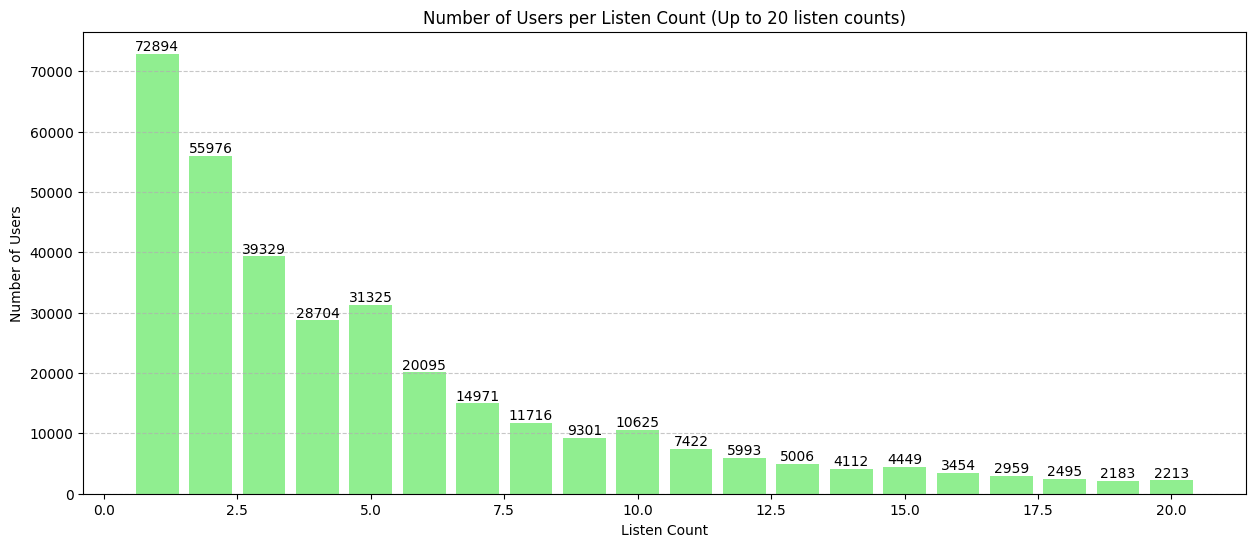

In [852]:
# Call the function to plot the number of users per listen count for up to n listen counts
plot_users_per_listen_count(users_per_listen_count_df, n=20)

It can be concluded that almost every user has a song he listened to only 1 time.<br>
Moreover, there is one special user who listened the same song 2213 times.<br>
Of course, this greatly favors this particular song in our system.

Some data on this observation:

In [853]:
# Get the index label corresponding to the maximum listen_count
max_listen_count_index = df['listen_count'].idxmax()

# Retrieve the entire row from df using the index label
row_with_max_listen_count = df.loc[max_listen_count_index]

print("Row with the largest listen count:")
print(row_with_max_listen_count)


Row with the largest listen count:
user_id         d13609d62db6df876d3cc388225478618bb7b912
song_id                               SOFCGSE12AF72A674F
listen_count                                        2213
title                                          Starshine
release                                         Gorillaz
artist_name                                     Gorillaz
year                                                2000
Name: 1228366, dtype: object


### User analysis

Now, the top 10 users by the number of their listens count:

In [854]:
def get_top_active_users(df, n=10):
    return df.groupby('user_id')['listen_count'].sum().sort_values(ascending=False).head(n)

In [855]:
get_top_active_users(df)

user_id
6d625c6557df84b60d90426c0116138b617b9449    2898
d13609d62db6df876d3cc388225478618bb7b912    2597
4be305e02f4e72dad1b8ac78e630403543bab994    2539
70caceccaa745b6f7bc2898a154538eb1ada4d5a    1936
0b19fe0fad7ca85693846f7dad047c449784647e    1903
283882c3d18ff2ad0e17124002ec02b847d06e9a    1888
5ea608df0357ec4fda191cb9316fe8e6e65e3777    1770
6a944bfe30ae8d6b873139e8305ae131f1607d5f    1757
9c859962257112ad523f1d3c121d35191daa6d2b    1717
6ccd111af9b4baa497aacd6d1863cbf5a141acc6    1697
Name: listen_count, dtype: int64

In [856]:
active_users = get_top_active_users(df, df['user_id'].nunique())

In [857]:
print(active_users.tail(1000))

user_id
9681407fe977fbe8a4a56356f3d93201c503509c    2
4ce0dc0a701133546070e33c4fad5f21d57e52c1    2
3909ac53dd5e5456c0e1de3af170e846ae08cf86    2
b25f3c62649a8b836dc0920d8f9b8f03ed20fa5d    2
b258dfa87711800879b8e26c9b52ed2a8401db95    2
                                           ..
13dd2785ef3c8f415678c3dd8a4afe6626ebfeb8    1
f0d02e65d587f7422cd14ad60eec4fa083c240ce    1
13ce58369594724ac9b49ef6db673a430ad2141a    1
a7a4e02ea22ad83e3c78cb0bfee9b5c92c39abe7    1
b923c4fc244d671f96ede79a60b10da1583ddab2    1
Name: listen_count, Length: 1000, dtype: int64


Let's see some distribution about the users and their listens count:

In [858]:
def plot_user_listen_count_distribution(active_users):
    plt.figure(figsize=(10, 6))
    plt.hist(active_users, bins=20, color='Crimson', edgecolor='black')
    plt.title('Distribution of Listen Count for Active Users')
    plt.xlabel('Total Listen Count')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

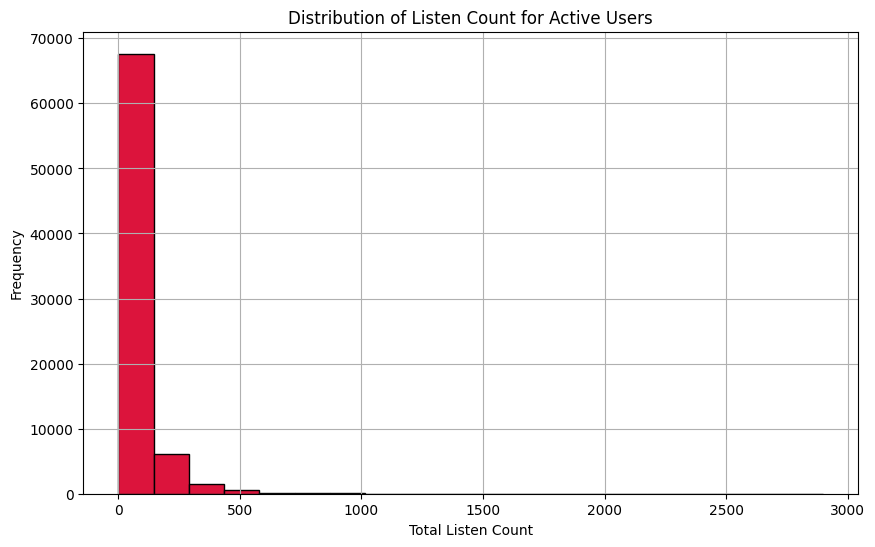

In [859]:
plot_user_listen_count_distribution(active_users)

We can see that there are a lot of users that have listened to only few songs.

It is easy to see that the first column in the output contains the most observations. We would like to refer only to users who have listened to enough songs to be part of our recommendation system.

Let's ignore users who have listened to songs less or equal to 200 times.

In [860]:
filtered_users = active_users[active_users > 200]
filtered_users

user_id
6d625c6557df84b60d90426c0116138b617b9449    2898
d13609d62db6df876d3cc388225478618bb7b912    2597
4be305e02f4e72dad1b8ac78e630403543bab994    2539
70caceccaa745b6f7bc2898a154538eb1ada4d5a    1936
0b19fe0fad7ca85693846f7dad047c449784647e    1903
                                            ... 
ea5ce8359bb00078674794f13c20ae1cdc62c923     201
0a1a3dd772aa44796c5edb468f5d55c25330a754     201
848553482edda04366bc378d69b9ea145db3b757     201
b89435cbcb3970925816131ff4f981c3b0be5fe0     201
50fa0db6886e966968a029269e57fe8fca3f1ce2     201
Name: listen_count, Length: 4847, dtype: int64

In [861]:
# Count the number of users who their listen count is more than 200 songs
num_users_above_200 = len(active_users[active_users > 200])
print("Number of users who their listen count is more than 200:", num_users_above_200)
num_users_below_or_equal_200 = df['user_id'].nunique() - num_users_above_200
print("Number of users who their listen count is less than or equal to 200 songs:", num_users_below_or_equal_200)

Number of users who their listen count is more than 200: 4847
Number of users who their listen count is less than or equal to 200 songs: 71210


There are only 7209 users with more than 200 listens to songs.<br>

Another look, but now after filtering the data to only users who listened to songs at least 200 times.

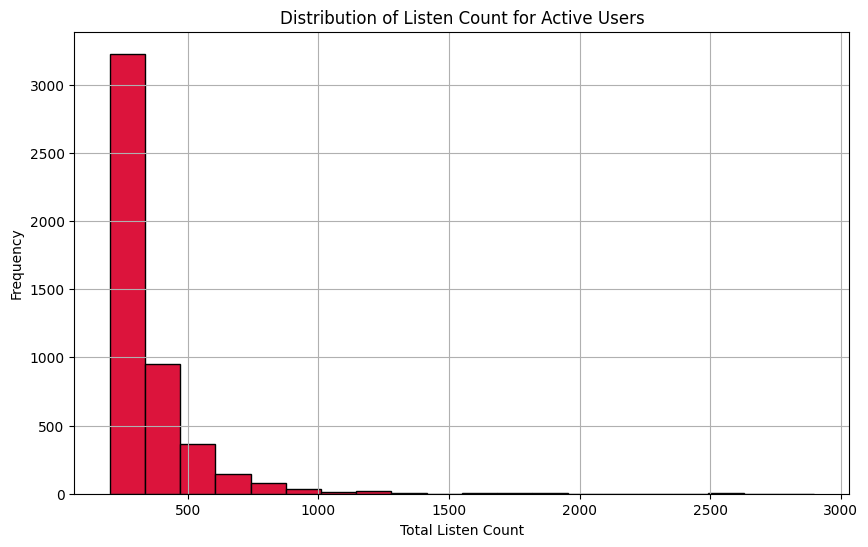

In [862]:
plot_user_listen_count_distribution(filtered_users)

In [863]:
# Count the number of users who their listen count is more than 1000 songs
num_users_above_1000 = len(active_users[active_users > 1000])
print("Number of users who their listen count is more than 1000:", num_users_above_1000)
num_users_below_or_equal_1000 = df['user_id'].nunique() - num_users_above_1000
print("Number of users who their listen count is less than or equal to 1000 songs:", num_users_below_or_equal_1000)

Number of users who their listen count is more than 1000: 53
Number of users who their listen count is less than or equal to 1000 songs: 76004


Only 53 different users has more than 1000 music listens count.

The results we see here are not good enough. <br>
Maybe all the listen counts of a user are from only one song? Or to a very small number of songs?? Do we want to include such users in our recommendation model?

We would like to refer to users according to the number of different songs they heard and not according to the number of listens they have to the music.
Users who are not active enough, do not represent the preferences of the population as they should. <br>

For our recommendation system to work well enough, it would be desirable to let it learn songs and recommend songs learned from users who have heard enough different songs.

Another look on the user's:

In [864]:
def count_songs_per_user(df):
    """
    Count the number of different songs each user listened to and sort the result in descending order.

    Parameters:
        df (DataFrame): The DataFrame containing the song data.

    Returns:
        Series: A Series containing the user_id as the index and the number of different songs listened to by each user as the values,
                sorted in descending order.
    """
    # Group the DataFrame by 'user_id' and count the number of songs each user listened to
    user_listen_counts = df.groupby('user_id').size()

    # Sort the user listen counts in descending order
    sorted_user_listen_counts = user_listen_counts.sort_values(ascending=False)

    return sorted_user_listen_counts

In [865]:
# Call the function to count the number of songs listened to by each user
sorted_user_listen_counts = count_songs_per_user(df)

# Print the sorted number of songs each user listened to
print("Number of different songs each user listened to (sorted):")
print(sorted_user_listen_counts)

Number of different songs each user listened to (sorted):
user_id
6d625c6557df84b60d90426c0116138b617b9449    602
fbee1c8ce1a346fa07d2ef648cec81117438b91f    577
4e11f45d732f4861772b2906f81a7d384552ad12    473
1aa4fd215aadb160965110ed8a829745cde319eb    468
6a9cf03dfb2fc82f5b3b043c9c3fdbab997fd54d    449
                                           ... 
3c205663c5f9ea57f79cf63ee7d51d15395913c9      1
adab5babca2278e4db4c0ffa45812e30c5dddb15      1
3c57ce98d816f5b332120f2ed7093a3c7830c9d4      1
f879c1c706100c314157a372668c48f23e2d54fb      1
8024a1ce24a9364ba195f98f6ee872d018da7d17      1
Length: 76057, dtype: int64


We can learn that the user who listened to the most different songs listened to 602 songs.

Before we dilute our data -<br>
We would like to understand how many users meet the criteria: how many users have listened to more than 'n' different songs?

In [866]:
def filter_users(df, min_listen_counts=[30, 60, 90, 120, 150]):
    results = {}
    for min_listen_count in min_listen_counts:
        # Group by 'user_id' and count the number of rows for each user
        user_listen_counts = df.groupby('user_id').size()

        # Filter users based on the minimum listen count
        filtered_users = user_listen_counts[user_listen_counts >= min_listen_count]

        # Get the DataFrame containing only the observations for the filtered users
        filtered_df = df[df['user_id'].isin(filtered_users.index)]

        # Get the user IDs of the filtered users
        filtered_user_ids = filtered_users.index

        # Count the number of users who meet the criterion
        num_filtered_users = len(filtered_user_ids)

        # Count the number of users who did not meet the criterion
        num_non_filtered_users = len(user_listen_counts) - num_filtered_users

        # Store the results
        results[min_listen_count] = {'filtered_df': filtered_df, 'num_filtered_users': num_filtered_users, 'num_non_filtered_users': num_non_filtered_users}

    return results

In [867]:
# Filter out users who have listened to more than 30, 60, 90, 120, and 150 songs respectively and get the counts
filtered_results = filter_users(df, min_listen_counts=[30, 60, 90, 120, 150])

# Print the results for each minimum listen count
for min_listen_count, result in filtered_results.items():
    print(f"\nResults for minimum song count of {min_listen_count}:")
    print("Filtered DataFrame:")
    result['filtered_df']
    print("Number of users who have listened to more than", min_listen_count, " different songs:", result['num_filtered_users'])
    print("Number of users who have listened to less than or equal to", min_listen_count, " different songs:", result['num_non_filtered_users'])



Results for minimum song count of 30:
Filtered DataFrame:
Number of users who have listened to more than 30  different songs: 15762
Number of users who have listened to less than or equal to 30  different songs: 60295

Results for minimum song count of 60:
Filtered DataFrame:
Number of users who have listened to more than 60  different songs: 5069
Number of users who have listened to less than or equal to 60  different songs: 70988

Results for minimum song count of 90:
Filtered DataFrame:
Number of users who have listened to more than 90  different songs: 2056
Number of users who have listened to less than or equal to 90  different songs: 74001

Results for minimum song count of 120:
Filtered DataFrame:
Number of users who have listened to more than 120  different songs: 969
Number of users who have listened to less than or equal to 120  different songs: 75088

Results for minimum song count of 150:
Filtered DataFrame:
Number of users who have listened to more than 150  different son

In [868]:
def plot_filtered_results(filtered_results):
    min_listen_counts = sorted(filtered_results.keys())
    num_filtered_users_list = []
    num_non_filtered_users_list = []

    for min_listen_count in min_listen_counts:
        result = filtered_results[min_listen_count]
        num_filtered_users_list.append(result['num_filtered_users'])
        num_non_filtered_users_list.append(result['num_non_filtered_users'])

    # Plotting the results
    bar_width = 0.35
    index = range(len(min_listen_counts))

    plt.figure(figsize=(12, 6))
    plt.bar([i + bar_width for i in index], num_filtered_users_list, bar_width, label='More than', color="Crimson")
    plt.bar(index, num_non_filtered_users_list, bar_width, label='Less than or equal to', color="lightgrey")

    plt.xlabel('Minimum Different Songs Count Per User')
    plt.ylabel('Number of Users')
    plt.title('Number of Users by Minimum Different Songs Count')
    plt.xticks([i + bar_width / 2 for i in index], min_listen_counts)
    plt.legend()

    # Annotate each bar with its corresponding value on the y-axis
    for i, v in enumerate(num_filtered_users_list):
        plt.text(i + bar_width, v, str(v), ha='center', va='bottom')
    for i, v in enumerate(num_non_filtered_users_list):
        plt.text(i, v, str(v), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

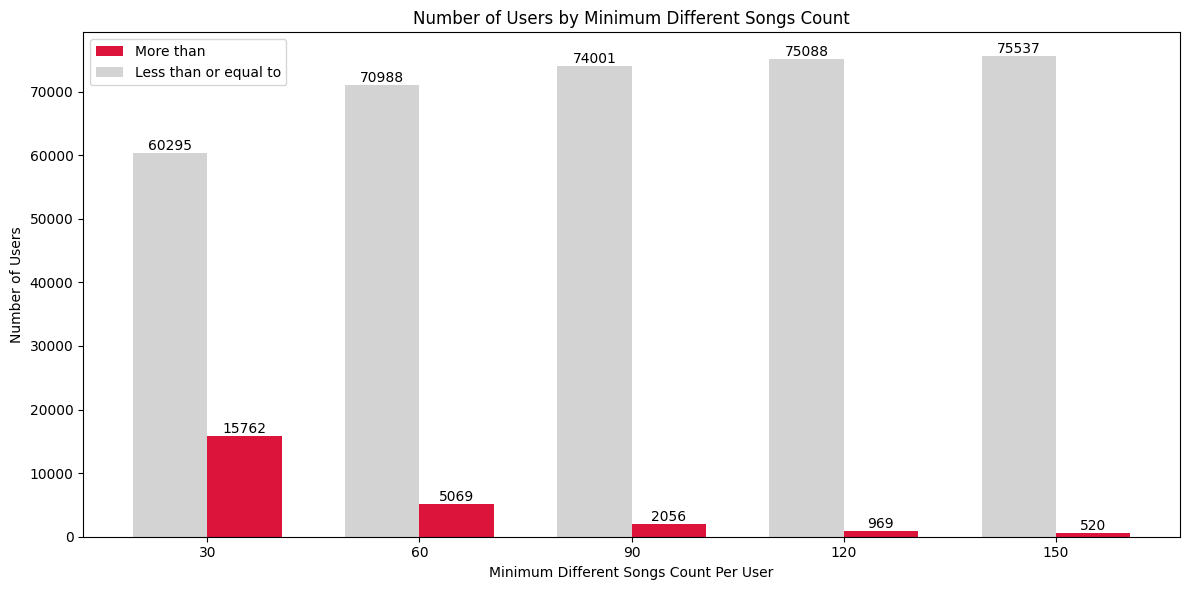

In [869]:
# Plot the filtered results
plot_filtered_results(filtered_results)

Seems like 90 is a great restriction. There are enough users who have heard more than 90 different songs.<br>
As indicated in the output, the number of users who have listened to more than 90 different songs is 2056.

### Rating analysis

TODO!

Generate a rating scale:

In order to create a rating system, we will want our data to be restricted to users that have listened to every song at most 'n' times. In this way, listen_count can be used as a rating system, with values between 1 and n. <br>
(there is no 0 rating, our data is users listening to songs, there is no song played less than one time).

Let's take a look on the relevant data:

First, to make sure we have enough data left, we would like to check how many users are left after the restriction:

In [870]:
def filter_users_by_max_listen_count(df, start_count=3, end_count=15):
    max_listen_counts = range(start_count, end_count + 1)
    listen_count = {}

    for max_listen_count in max_listen_counts:
        # Group the data by 'user_id' and calculate the maximum listen count for each user
        max_listen_counts = df.groupby('user_id')['listen_count'].max()

        # Filter out the users whose maximum listen count is greater than the specified maximum listen count
        relevant_users = max_listen_counts[max_listen_counts <= max_listen_count]

        # Filter the original DataFrame to include only the relevant users
        filtered_df = df[df['user_id'].isin(relevant_users.index)]

        # Count the number of users left after filtering
        num_users_left = len(relevant_users)

        listen_count[max_listen_count] = num_users_left
        print(f"Number of users left for max listen count of {max_listen_count}: {num_users_left}")

    return filtered_df, listen_count

In [871]:
def plot_users_left(listen_count):
    # Define a list of colors
    colors = ['purple', 'blue', 'green', 'yellow', 'orange', 'red', 'brown', 'pink']

    plt.figure(figsize=(10, 6))
    # Iterate over each key-value pair in the ratings dictionary and plot a bar with a different color
    for i, (max_listen_count, num_users_left) in enumerate(listen_count.items()):
        plt.bar(max_listen_count, num_users_left, color=colors[i % len(colors)])

        # Annotate each bar with its corresponding value on the y-axis
        plt.text(max_listen_count, num_users_left, str(num_users_left), ha='center', va='bottom')

    plt.title('Number of Users Left vs Maximum Listen Count')
    plt.xlabel('Maximum Listen Count')
    plt.ylabel('Number of Users Left')
    plt.xticks(list(listen_count.keys()))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

Number of users left for max listen count of 3: 22774
Number of users left for max listen count of 4: 27405
Number of users left for max listen count of 5: 34784
Number of users left for max listen count of 6: 39274
Number of users left for max listen count of 7: 42591
Number of users left for max listen count of 8: 45292
Number of users left for max listen count of 9: 47450
Number of users left for max listen count of 10: 50841
Number of users left for max listen count of 11: 53030
Number of users left for max listen count of 12: 54903
Number of users left for max listen count of 13: 56439
Number of users left for max listen count of 14: 57741
Number of users left for max listen count of 15: 59415


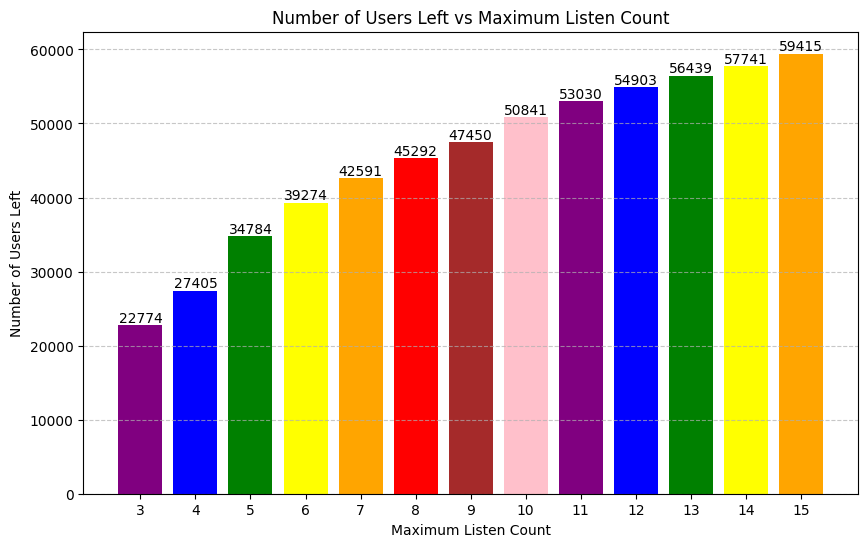

In [872]:
# Call the function to check max listen counts from 3 to 10
filtered_df, listen_count = filter_users_by_max_listen_count(df, start_count=3, end_count=15)

# Plot the results
plot_users_left(listen_count)

Seems like when the rating scale is from 1-10, we left with 50841 relevant users - enough data to work with.<br>


Next, we would like to see how the 'listen_count' dispersing between the data after restrictions.

We would like to keep only the users who meet the criteria: those who have not heard a song more than 'n' times.<br>
The minimum is 3.
We would like to divide our data into at least 3 different ratings. (If there are less than 3 different ratings, our rating system will not be diversified enough).

In [873]:
def plot_listen_counts_range(df, start_count=3, end_count=15):
    # Define a list of colors
    colors = ['blue', 'green', 'orange', 'red', 'purple', 'brown', 'pink', 'cyan']

    for max_listen_counts in range(start_count, end_count + 1):
        # Group the DataFrame by 'user_id' and calculate the maximum listen count for each user
        max_listen_counts_users = df.groupby('user_id')['listen_count'].max()

        # Filter out users who have listened to a song more than the specified maximum listen count
        relevant_users = max_listen_counts_users[max_listen_counts_users <= max_listen_counts].index

        # Filter the original DataFrame to include only the relevant users
        filtered_df = df[df['user_id'].isin(relevant_users)]

        # Count the occurrences of each listen count
        listen_count_counts = filtered_df['listen_count'].value_counts().sort_index()

        # Plot the results with different color for each column
        plt.figure(figsize=(10, 6))
        for i, (listen_count, frequency) in enumerate(zip(listen_count_counts.index, listen_count_counts.values)):
            plt.bar(listen_count, frequency, color=colors[i % len(colors)])
            # Annotate each bar with its frequency
            plt.text(listen_count, frequency, str(frequency), ha='center', va='bottom')

        plt.title(f'Number of Listen Counts (1-{max_listen_counts})')
        plt.xlabel('Listen Count')
        plt.ylabel('Frequency')
        plt.xticks(listen_count_counts.index)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.show()

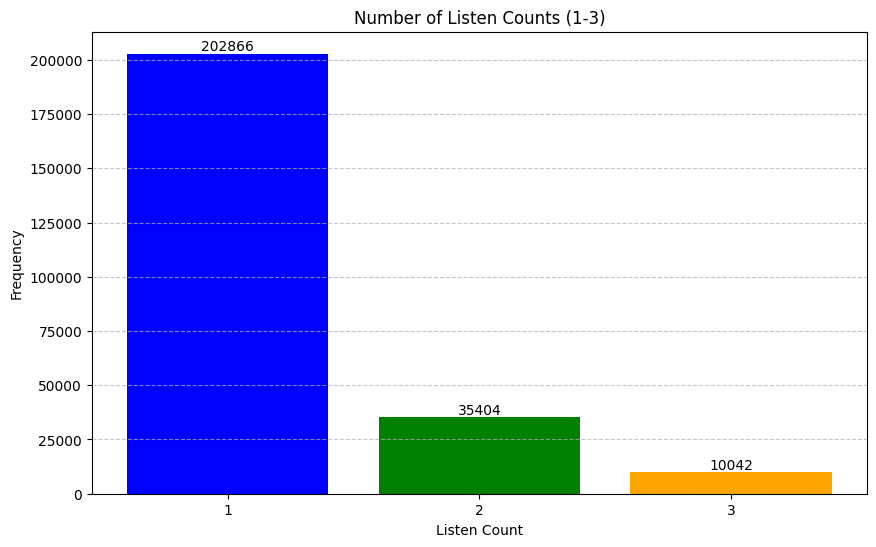

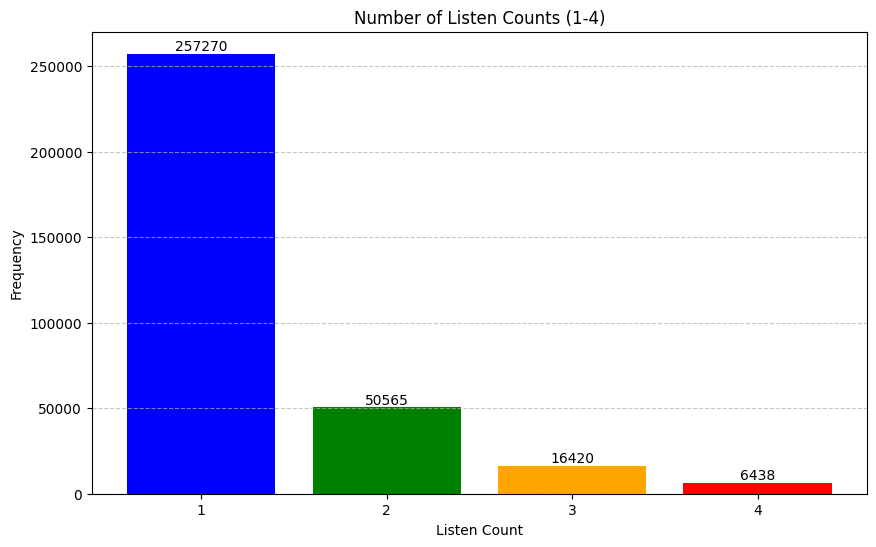

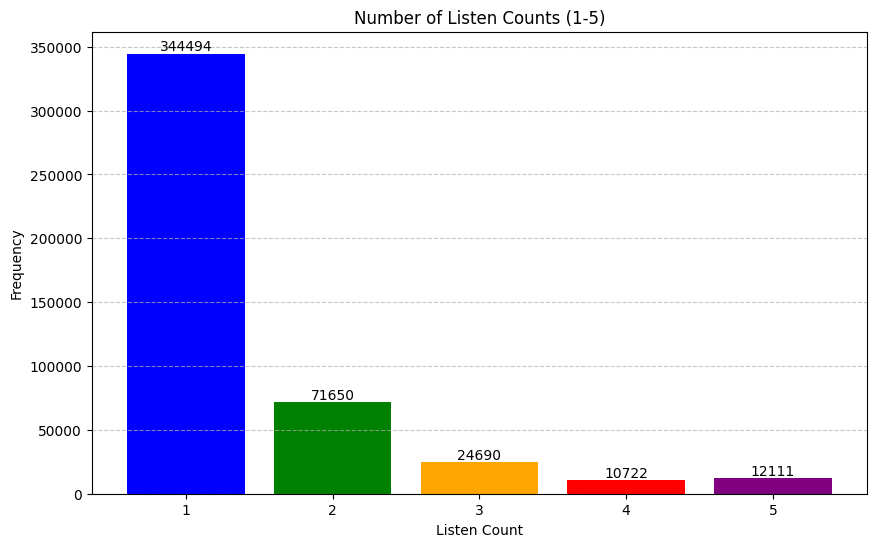

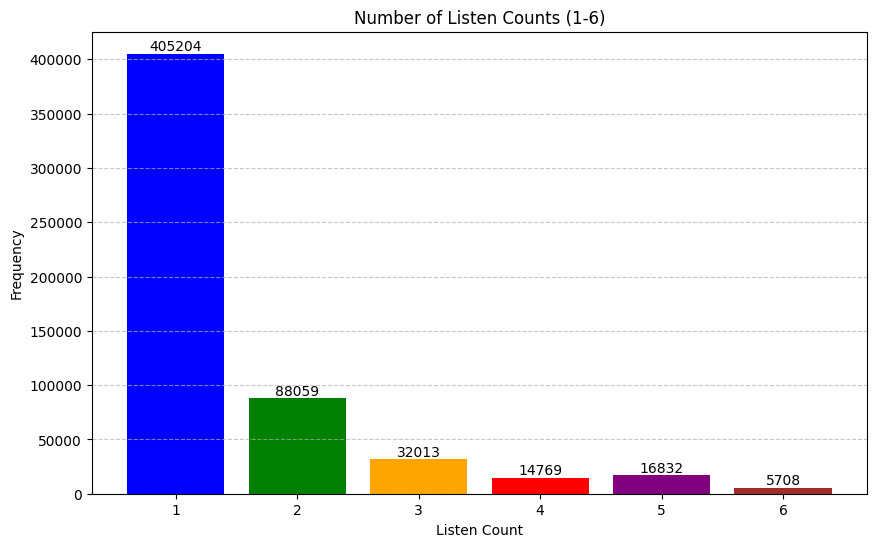

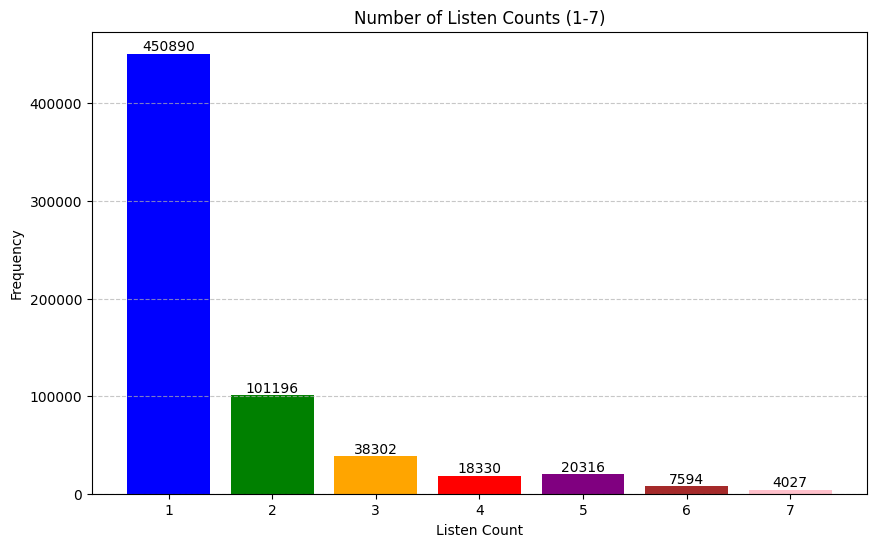

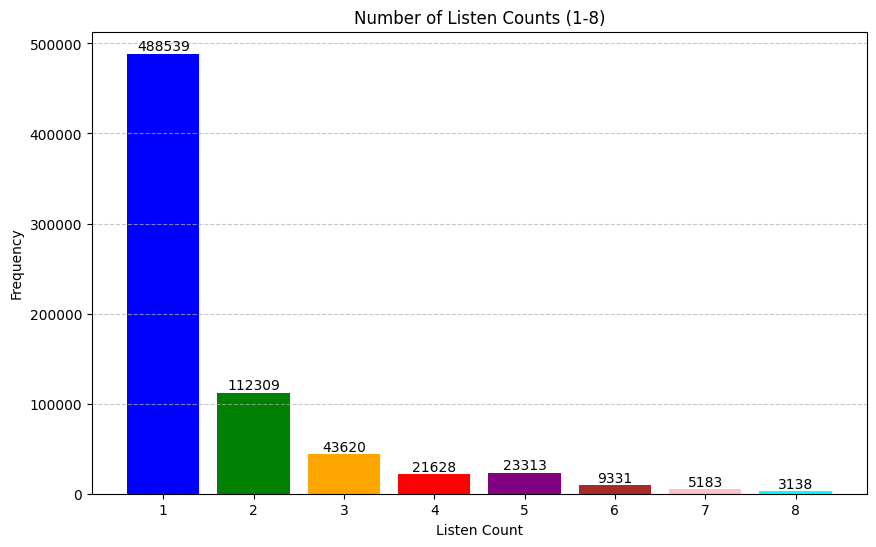

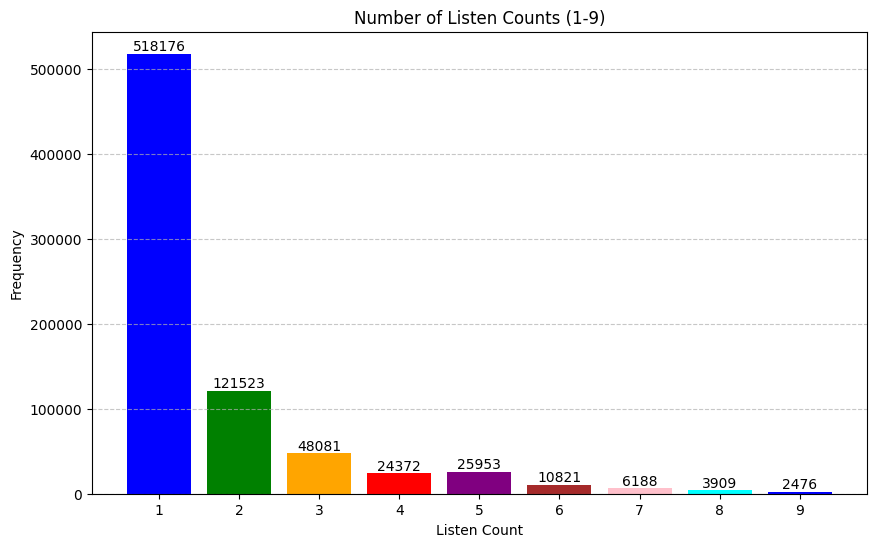

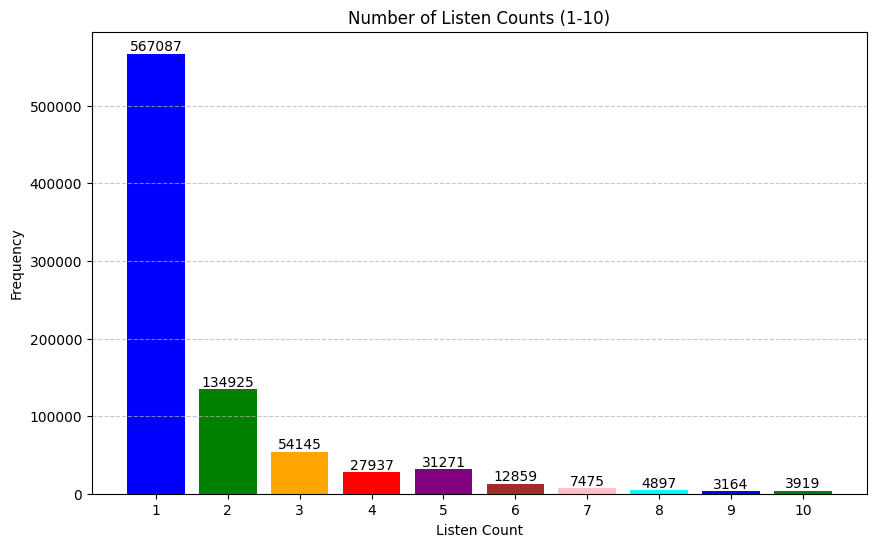

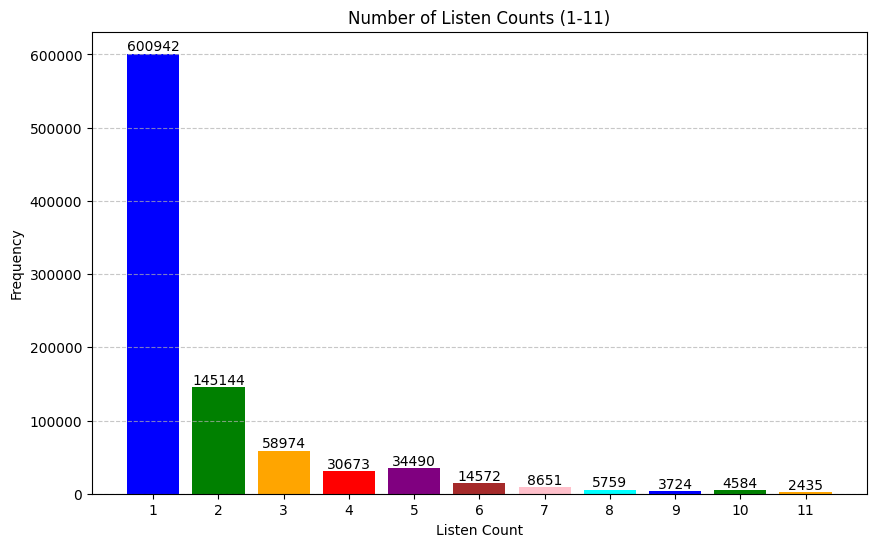

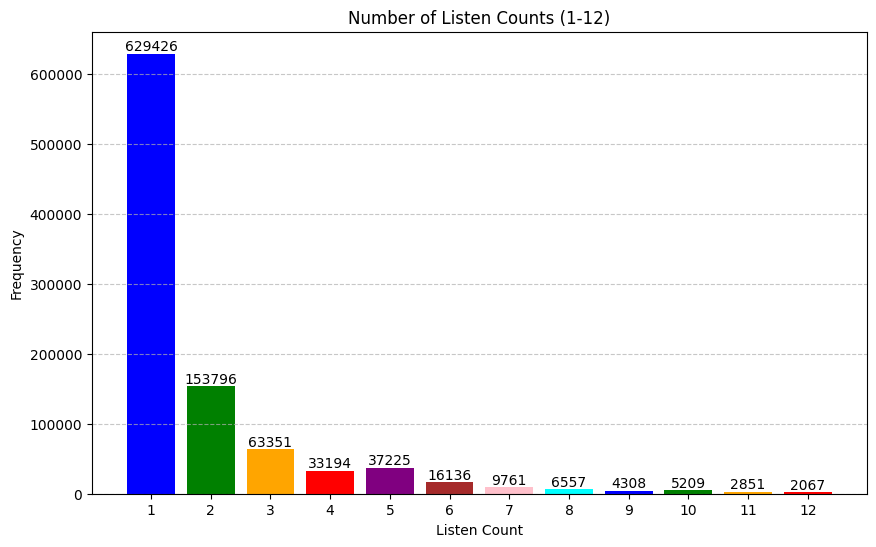

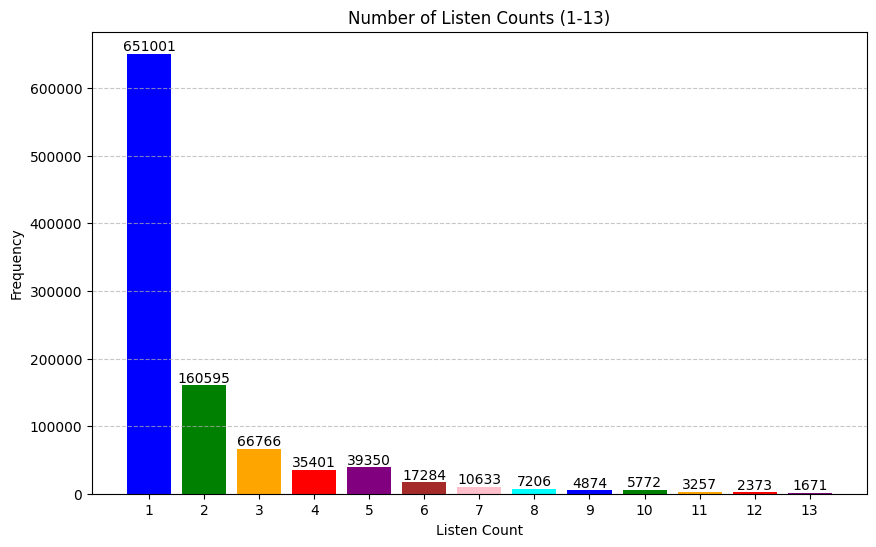

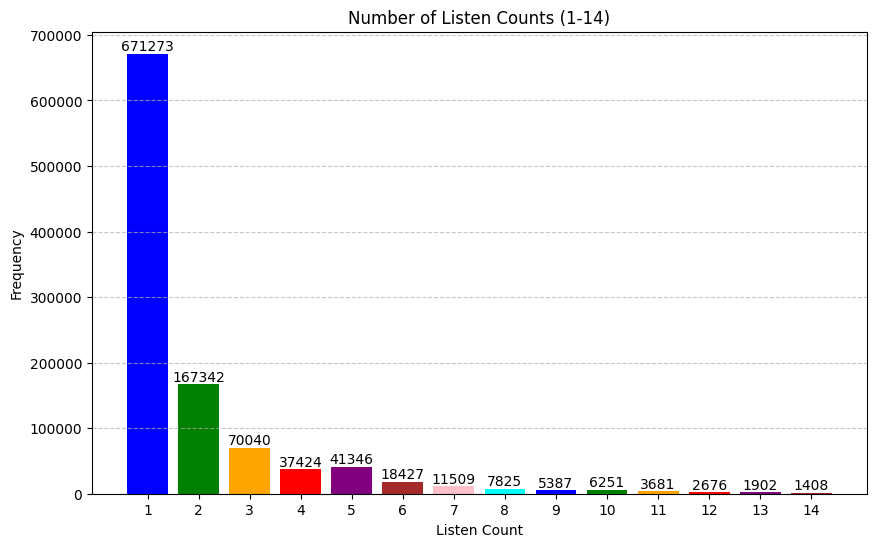

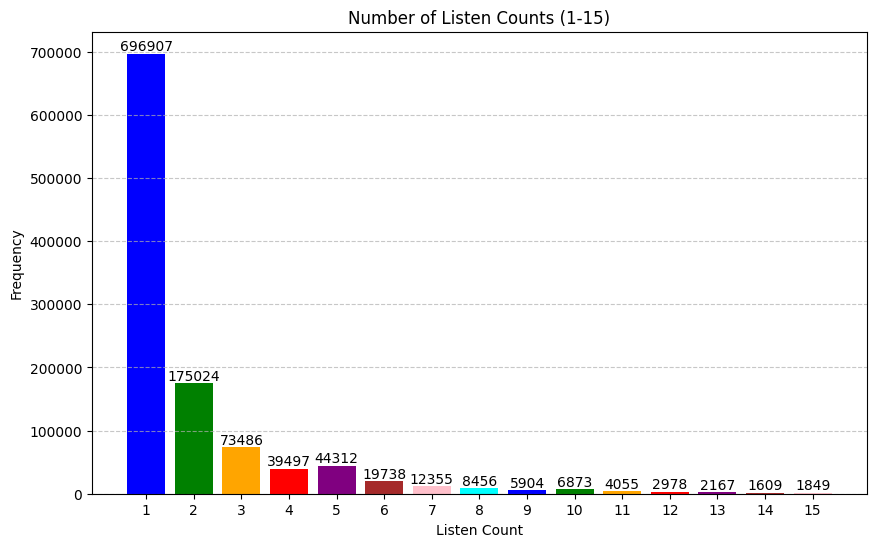

In [874]:
# Call the function with start_count=3 and end_count=15
plot_listen_counts_range(df, start_count=3, end_count=15)

<!-- We can see that starting with a number of listenings of 6 or more, the amount of listenings is less than 10000 and increases a little each time - almost 2.5 times smaller than the column of 5.<br> -->

It seems that it will be enough to limit our data to users who their most played song have listened to up to 10 times in total.<br>

We will deal with all of that later..


# Preprocessing

TODO להבין כמו שצריך האם צריך לאזן את כל הנתונים כך שתהיה כמות זהה של דירוגים 1-5. איזון כזה עלול לפגוע במסקנות שלנו מהנתונים שקיבלנו, לא נרצה להתעלם מהעבודה שיש כמות משמעותית גדולה יותר של שירים שהושמעו פעם אחת בלבד. לחקור איזון ולהבין איך עובדים איתו והאם צריך.


שאלה נוספת, האם צריך לבצע חקר נוסף אחרי הורדת חלק מהמשתמשים או השירים ורק אז לבדוק דירוג 1-5 וכמה עונים עליו. לחקור מה לפני מה והאם המסקנות הסופיות נשארות זהות.

## User and Song IDs encoding

In [875]:
# Apply a label-encoding for user_id and song_id attributes.
def encode_user_song_ids(df):

  label_encoder = LabelEncoder()
  df['user_id'] = label_encoder.fit_transform(df['user_id'])
  df['song_id'] = label_encoder.fit_transform(df['song_id'])

  return df

In [876]:
combined_df = encode_user_song_ids(combined_df)

In [877]:
# Saving a clear df to the final preprocessing function
combined_df_ppc = combined_df.copy()

In [878]:
combined_df

user_id  song_id  listen_count                           title  \
1          54752      338             2                 Entre Dos Aguas   
2          54752      605             1                        Stronger   
3          54752      618             1                  Constellations   
4          54752      972             1                    Learn To Fly   
5          54752     1010             5    Apuesta Por El Rock 'N' Roll   
...          ...      ...           ...                             ...   
1999994    64343     2767             4          Unwell (Album Version)   
1999996    64343     3051             4          Two Is Better Than One   
1999997    64343     3059             3  What I've Done (Album Version)   
1999998    64343     3182             1                              Up   
1999999    64343     3239             1      Soil_ Soil (Album Version)   

                               release  \
1                  Flamenco Para Niños   
2                           Graduation   
3                    In Between Dreams   
4        There Is Nothing Left To Lose   
5                Antología Audiovisual   
...                                ...   
1999994    More Than You Think You Are   
1999996                     Love Drunk   
1999997                 What I've Done   
1999998                      My Worlds   
1999999                        The Con   

                                    artist_name  year  
1                                 Paco De Lucia  1976  
2                                    Kanye West  2007  
3                                  Jack Johnson  2005  
4                                  Foo Fighters  1999  
5                           Héroes del Silencio  2007  
...                                         ...   ...  
1999994                         matchbox twenty  2003  
1999996  Boys Like Girls featuring Taylor Swift  2009  
1999997                             Linkin Park  2007  
1999998                           Justin Bieber  2010  
1999999                          Tegan And Sara  2007  

[1627878 rows x 7 columns]

We decided after deep research to filter the data we have according to 2 main criteria: We would not like to include in the data:
1. Users who have listened to less than 30 different songs
2. Songs that have been listened to by less than 120 different users

The question arises is how to do it:<br>
a. First get rid of the users who do not meet the criteria we defined and then to get rid from the songs.<br>
b. or alternatively, first get rid of the songs that do not meet the criteria, and then the users.

We first thought of getting rid of the songs that weren't played by enough users and only then getting rid of the users who didn't listen to enough songs,
so the songs we omitted will be omitted from the users who listened them.

We have identified a problem, we would like to judge each user by all the songs he heard and not just by some of them. Diluting the songs first will hurt users who met the criteria but are now disqualified because songs they heard were already omitted from the data. For the reliability and correctness of our recommendation system, we would like to include users in the system even if the songs they hear are special songs.

It would be more correct to first dilute the users who have not listened to enough songs, to ensure that the recommendation system only learns from sufficiently active users. After that, we'll thin out the songs that haven't been played by enough different users.

<b>In conclusion, we chose option a. 1 and then 2. To get rid of the users before getting rid of the songs.<b>


---

<b>

Final conclusions before implementing:
Filter the dataset, by removing, in this order (a-d):

a. The songs that their released year is 0 - Done at the EDA.

b. Users who have listened to less than 30 songs.

c. Songs that have been listened to by less than 120 users.

d. Rating system - we will limit the users to only those who have listened to   each song no more than 10 times.


<b>

---




---

<b>

Final conclusions before implementing:
Filter the dataset, by removing, in this order (a-d):

a. The songs that their released year is 0 - Done at the EDA.

b. Users who listened to too few different songs.

c. Songs that too few different users have listened to.

d. Rating system - we will limit the users to only those who have listened to   each song no more than n times.


Let's do a final research to decide the limit for each of this states.
<b>

---



In [879]:
df_final = combined_df.copy()

In order from b-d, we will start researching and applying the final changes to our original df :

In [880]:
df_final_before_users = combined_df.copy()

## Dropping users < 30 different songs

<b>

b. Dropping users who have listened to less than 30 songs.

</b>

In [881]:
b = 30

- Before implementing our find, we will do some final research:

In [882]:
shape_before_dropping_b = df_final.shape
print("Shape of our df before dropping users <",b ,": ", shape_before_dropping_b)

# Sum the values in the 'listen_count' column
listen_count_before_dropping_b = df_final['listen_count'].sum()
print("Sum of all the listen count before dropping users <",b ,": ", listen_count_before_dropping_b)

different_song_count_before_dropping_b = df_final['song_id'].nunique()
print("Number of different songs before dropping dropping users <",b ,": ", different_song_count_before_dropping_b)

different_user_count_before_dropping_b = df_final['user_id'].nunique()
print("Number of different users before dropping dropping users <",b ,": ", different_user_count_before_dropping_b)

Shape of our df before dropping users < 30 :  (1627878, 7)
Sum of all the listen count before dropping users < 30 :  4849531
Number of different songs before dropping dropping users < 30 :  8227
Number of different users before dropping dropping users < 30 :  76057


In [883]:
# # Group data on user_id, and count how many different songs each user has listened to.
# group_users = df_final.groupby('user_id').count().reset_index(names=['user_id'])
# # Drop the users that have listened to less than 90 songs.
# df_final = df_final.loc[~df_final['user_id'].isin(group_users[group_users['listen_count'] < b]['user_id'])]

In [884]:
def drop_users_with_less_songs(df, min_songs):
    """
    Drop users who listened to less than a specified number of different songs.

    Parameters:
        df (DataFrame): The DataFrame containing the song data.
        min_songs (int): Minimum number of different songs required for a user.

    Returns:
        DataFrame: Filtered DataFrame containing users who listened to at least min_songs different songs.
    """
    # Count the number of unique songs each user listened to
    user_song_counts = df.groupby('user_id')['song_id'].nunique()

    # Find users who listened to less than min_songs different songs
    users_to_drop = user_song_counts[user_song_counts < min_songs].index

    # Drop rows corresponding to the users found above
    filtered_df = df[~df['user_id'].isin(users_to_drop)]

    return filtered_df

# Example usage:
df_final = drop_users_with_less_songs(df_final, b)

- By dropping users who listened to less than 90 different songs, we lose some songs that was listened to only by the users we dropped. <br>
Of course, the total number of listens become smaller. <br>
Here are the findings:

In [885]:
shape_after_dropping_b = df_final.shape
print("Shape of our df after dropping users <",b ,": ", shape_after_dropping_b)

# Sum the values in the 'listen_count' column
listen_count_after_dropping_b = df_final['listen_count'].sum()
print("Sum of all the listen count after dropping users <",b ,": ", listen_count_after_dropping_b)

different_song_count_after_dropping_b = df_final['song_id'].nunique()
print("Number of different songs after dropping dropping users <",b ,": ", different_song_count_after_dropping_b)

different_user_count_after_dropping_b = df_final['user_id'].nunique()
print("Number of different users after dropping dropping users <",b ,": ", different_user_count_after_dropping_b)

Shape of our df after dropping users < 30 :  (933001, 7)
Sum of all the listen count after dropping users < 30 :  2572156
Number of different songs after dropping dropping users < 30 :  8227
Number of different users after dropping dropping users < 30 :  15762


In [886]:
print("By dropping users <" ,b,", we reduced the amount of samples by:", shape_before_dropping_b[0] - shape_after_dropping_b[0])
print("By dropping users <" ,b,", we reduced the amount of listening by:", listen_count_before_dropping_b - listen_count_after_dropping_b)
print("By dropping users <" ,b,", we reduced the number of songs by:", different_song_count_before_dropping_b - different_song_count_after_dropping_b)
print("By dropping users <" ,b,", we reduced the number of users by:", different_user_count_before_dropping_b - different_user_count_after_dropping_b)

By dropping users < 30 , we reduced the amount of samples by: 694877
By dropping users < 30 , we reduced the amount of listening by: 2277375
By dropping users < 30 , we reduced the number of songs by: 0
By dropping users < 30 , we reduced the number of users by: 60295


In [887]:
print("BEFORE")
get_top_active_users(df_final_before_users)

BEFORE


user_id
32419    2898
62069    2597
22498    2539
33407    1936
3224     1903
11836    1888
28133    1770
31571    1757
46647    1717
32241    1697
Name: listen_count, dtype: int64

In [888]:
print("AFTER")
get_top_active_users(df_final)

AFTER


user_id
32419    2898
62069    2597
22498    2539
3224     1903
11836    1888
28133    1770
31571    1757
46647    1717
32241    1697
65269    1677
Name: listen_count, dtype: int64

In [889]:
# Print the sorted number of songs each user listened to
print("BEFORE - Number of different songs each user listened to (sorted):")
print(count_songs_per_user(df_final_before_users))
print()
# Print the sorted number of songs each user listened to
print("FINAL - Number of different songs each user listened to (sorted):")
print(count_songs_per_user(df_final))

BEFORE - Number of different songs each user listened to (sorted):
user_id
32419    602
74853    577
23205    473
7806     468
31583    449
        ... 
17861      1
51708      1
17937      1
73802      1
38028      1
Length: 76057, dtype: int64

FINAL - Number of different songs each user listened to (sorted):
user_id
32419    602
74853    577
23205    473
7806     468
31583    449
        ... 
69945     30
47873     30
48298     30
69890     30
38027     30
Length: 15762, dtype: int64


In [890]:
# Filter out users who have listened to more than 30, 60, 90, 120, and 150 songs respectively and get the counts
filtered_results_before = filter_users(df_final_before_users, min_listen_counts=[30, 60, 90, 120, 150])

print("BEFORE")
# Print the results for each minimum listen count
for min_listen_count, result in filtered_results_before.items():
    print(f"\nResults for minimum song count of {min_listen_count}:")
    print("Filtered DataFrame:")
    result['filtered_df']
    print("Number of users who have listened to more than", min_listen_count, " different songs:", result['num_filtered_users'])
    print("Number of users who have listened to less than or equal to", min_listen_count, " different songs:", result['num_non_filtered_users'])

print()

# Filter out users who have listened to more than 30, 60, 90, 120, and 150 songs respectively and get the counts
filtered_results_final = filter_users(df_final, min_listen_counts=[30, 60, 90, 120, 150])

print("FINAL")
# Print the results for each minimum listen count
for min_listen_count, result in filtered_results_final.items():
    print(f"\nResults for minimum song count of {min_listen_count}:")
    print("Filtered DataFrame:")
    result['filtered_df']
    print("Number of users who have listened to more than", min_listen_count, " different songs:", result['num_filtered_users'])
    print("Number of users who have listened to less than or equal to", min_listen_count, " different songs:", result['num_non_filtered_users'])



BEFORE

Results for minimum song count of 30:
Filtered DataFrame:
Number of users who have listened to more than 30  different songs: 15762
Number of users who have listened to less than or equal to 30  different songs: 60295

Results for minimum song count of 60:
Filtered DataFrame:
Number of users who have listened to more than 60  different songs: 5069
Number of users who have listened to less than or equal to 60  different songs: 70988

Results for minimum song count of 90:
Filtered DataFrame:
Number of users who have listened to more than 90  different songs: 2056
Number of users who have listened to less than or equal to 90  different songs: 74001

Results for minimum song count of 120:
Filtered DataFrame:
Number of users who have listened to more than 120  different songs: 969
Number of users who have listened to less than or equal to 120  different songs: 75088

Results for minimum song count of 150:
Filtered DataFrame:
Number of users who have listened to more than 150  differ

BEFORE


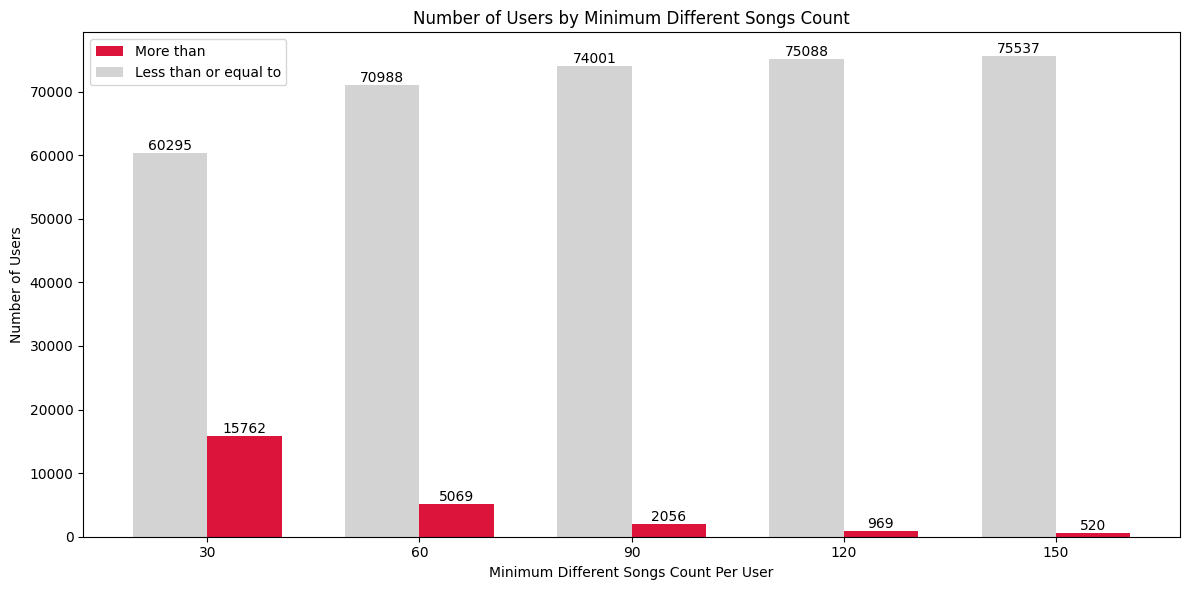


AFTER


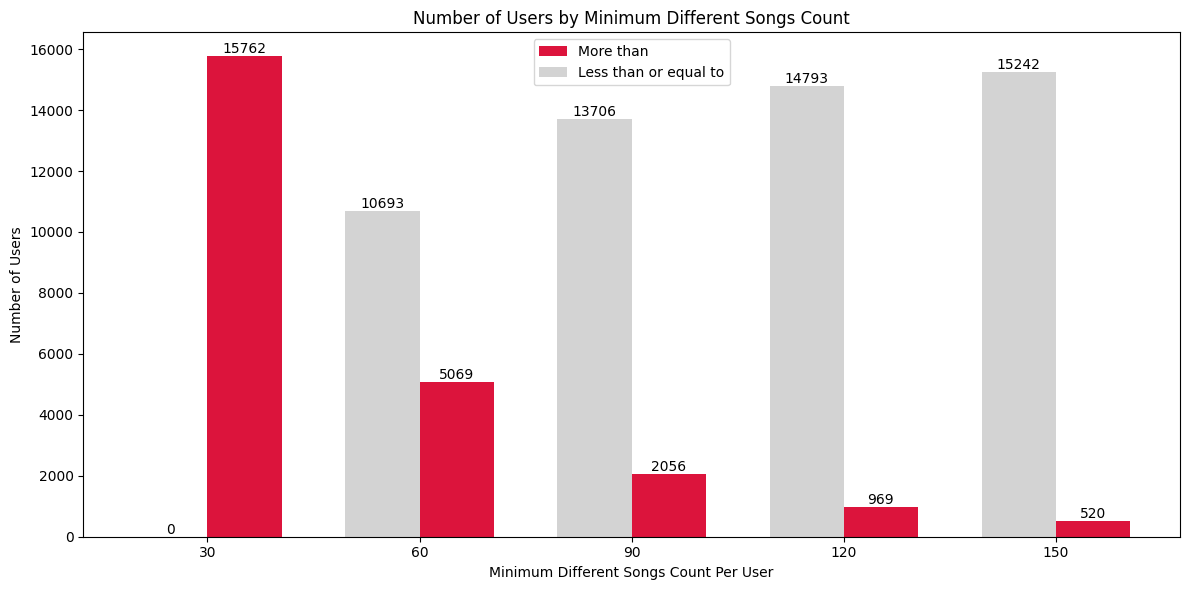

In [891]:
print("BEFORE")
# Plot the filtered results
plot_filtered_results(filtered_results_before)

print()

print("AFTER")
# Plot the filtered results
plot_filtered_results(filtered_results_final)



---



## Dropping songs < 120 different users

<b>

c. Dropping songs that have been listened to by less than 120 users:

</b>

In [892]:
c = 120

In [893]:
df_final_before_songs = df_final.copy()

- Before implementing our find, we will do some final research:

In [894]:
shape_before_dropping_c = df_final.shape
print("Shape of our df before dropping songs <", c, ":", shape_before_dropping_c)

# Sum the values in the 'listen_count' column
listen_count_before_dropping_c = df_final['listen_count'].sum()
print("Sum of all the listen count before dropping songs <", c, ":", listen_count_before_dropping_c)

different_song_count_before_dropping_c = df_final['song_id'].nunique()
print("Number of different songs before dropping dropping songs <", c, ":", different_song_count_before_dropping_c)

different_user_count_before_dropping_c = df_final['user_id'].nunique()
print("Number of different users before dropping dropping songs <", c, ":", different_user_count_before_dropping_c)

Shape of our df before dropping songs < 120 : (933001, 7)
Sum of all the listen count before dropping songs < 120 : 2572156
Number of different songs before dropping dropping songs < 120 : 8227
Number of different users before dropping dropping songs < 120 : 15762


In [895]:
# # Group data on song_id, and count how many different users listened to each song.
# group_songs = df_final.groupby('song_id').count().reset_index(names=['song_id'])
# # Drop the songs that have been listened to by less than 120 users.
# df_final = df_final.loc[~df_final['song_id'].isin(group_songs[group_songs['listen_count'] < c]['song_id'])]

In [896]:
def drop_songs_by_user_count(df, n):
    # Step 1: Group by 'song_id' and count the number of unique 'user_id' for each song
    song_listen_counts = df.groupby('song_id')['user_id'].nunique()

    # Step 2: Filter out songs with a user count less than n
    filtered_songs = song_listen_counts[song_listen_counts >= n]

    # Step 3: Filter the original DataFrame to include only songs with at least n different users
    filtered_df = df[df['song_id'].isin(filtered_songs.index)]

    return filtered_df

In [897]:
df_final = drop_songs_by_user_count(df_final, c)

- By dropping songs which were listened to by less than 120 different users, we lose some users who listened to only songs that we dropped. <br>
Of course, the total number of listens become smaller. <br>
Here are the findings:

In [898]:
shape_after_dropping_c = df_final.shape
print("Shape of our df after dropping songs <", c, ":", shape_after_dropping_c)

# Sum the values in the 'listen_count' column
listen_count_after_dropping_c = df_final['listen_count'].sum()
print("Sum of all the listen count after dropping songs <", c, ":", listen_count_after_dropping_c)

different_song_count_after_dropping_c = df_final['song_id'].nunique()
print("Number of different songs after dropping dropping songs <", c, ":", different_song_count_after_dropping_c)

different_user_count_after_dropping_c = df_final['user_id'].nunique()
print("Number of different users after dropping dropping songs <", c, ":", different_user_count_after_dropping_c)

Shape of our df after dropping songs < 120 : (544534, 7)
Sum of all the listen count after dropping songs < 120 : 1515343
Number of different songs after dropping dropping songs < 120 : 2122
Number of different users after dropping dropping songs < 120 : 15762


In [899]:
print("By dropping songs <", c, ", we reduced the amount of samples by:", shape_before_dropping_c[0] - shape_after_dropping_c[0])
print("By dropping songs <", c, ", we reduced the amount of listening by:", listen_count_before_dropping_c - listen_count_after_dropping_c)
print("By dropping songs <", c, ", we reduced the number of songs by:", different_song_count_before_dropping_c - different_song_count_after_dropping_c)
print("By dropping songs <", c, ", we reduced the number of users by:", different_user_count_before_dropping_c - different_user_count_after_dropping_c)

By dropping songs < 120 , we reduced the amount of samples by: 388467
By dropping songs < 120 , we reduced the amount of listening by: 1056813
By dropping songs < 120 , we reduced the number of songs by: 6105
By dropping songs < 120 , we reduced the number of users by: 0


In [900]:
# Call the function to calculate the top songs
top_songs_before = calculate_top_songs(df_final_before_songs)

# Print the top songs - BEFORE
print("BEFORE - Top {} Songs:".format(len(top_songs_before)))
print(top_songs_before)

print()

# Call the function to calculate the top songs
top_songs_final = calculate_top_songs(df_final)

# Print the top songs - FINAL
print("FINAL - Top {} Songs:".format(len(top_songs_final)))
print(top_songs_final)

BEFORE - Top 10 Songs:
title
You're The One    18964
Undo              18026
Revelry           15025
Secrets           10467
Représente         7635
Invalid            7437
The Gift           6997
Fireflies          6647
Use Somebody       6325
Marry Me           6033
Name: listen_count, dtype: int64

FINAL - Top 10 Songs:
title
You're The One    18964
Undo              18026
Revelry           15025
Secrets           10467
Représente         7635
Invalid            7437
The Gift           6997
Fireflies          6647
Use Somebody       6325
Marry Me           6033
Name: listen_count, dtype: int64


BEFORE


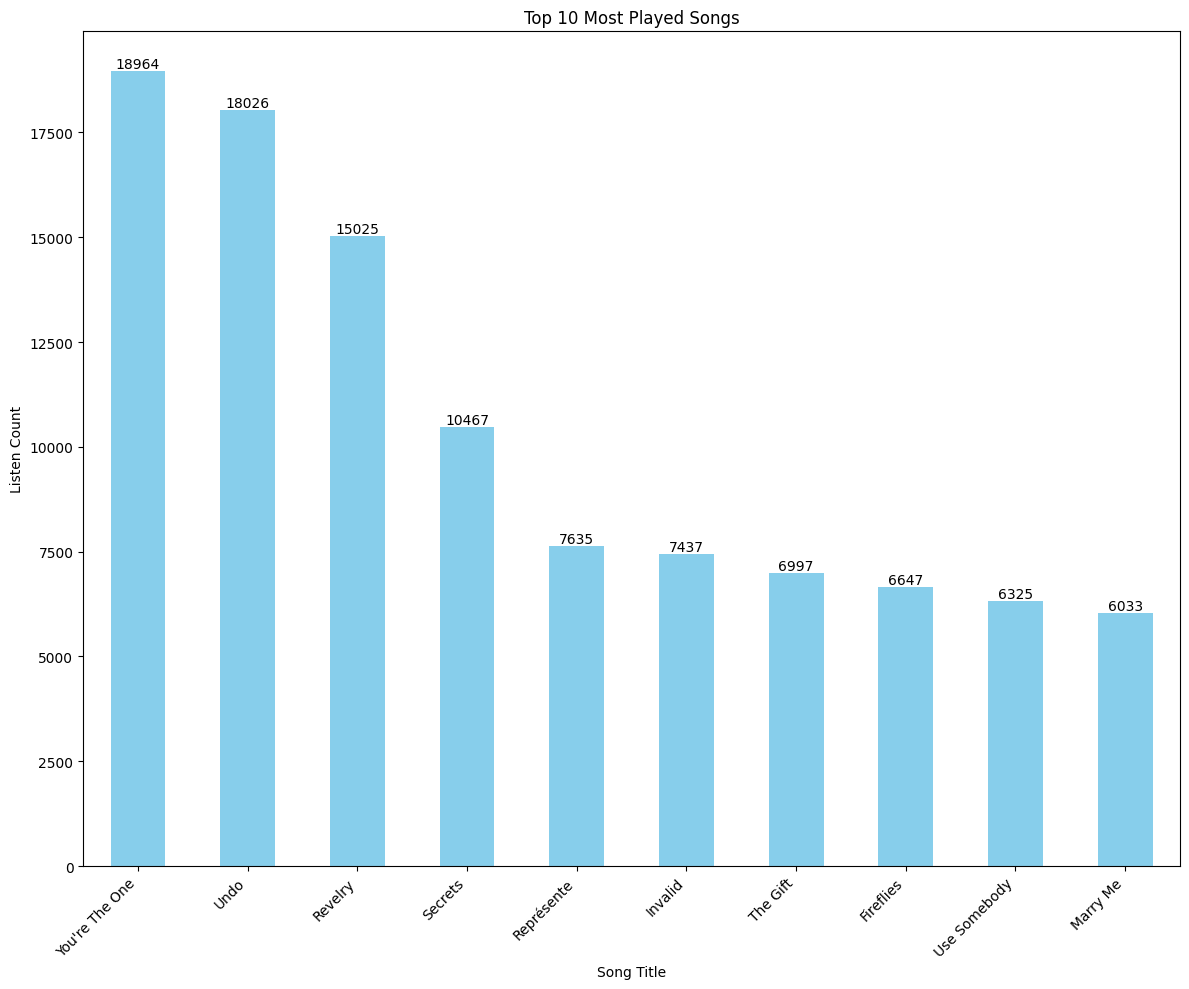


FINAL


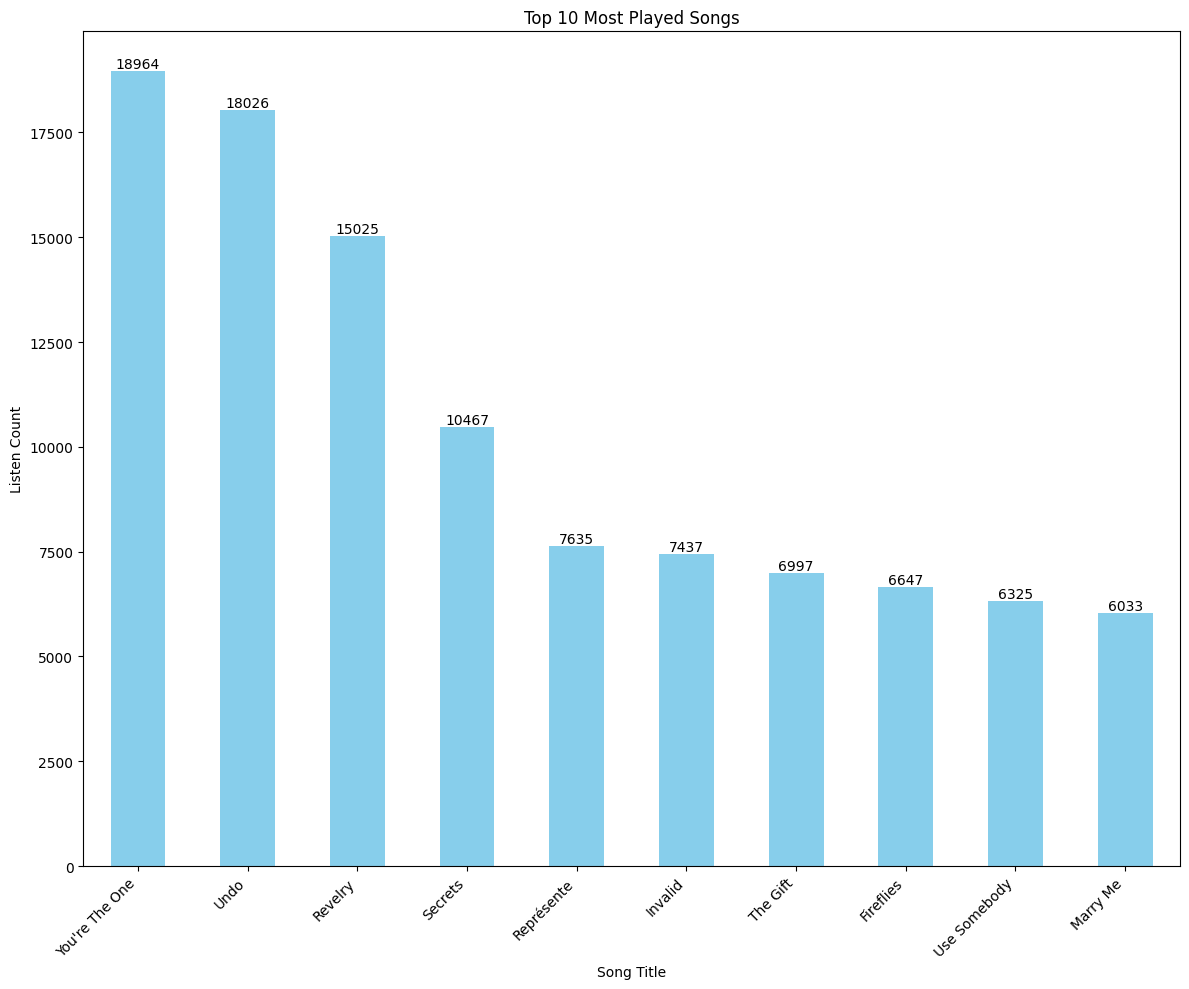

In [901]:
print("BEFORE")
# Call the function to plot the top songs
plot_top_songs(top_songs_before)

print()

print("FINAL")
# Call the function to plot the top songs
plot_top_songs(top_songs_final)

In [902]:
print("BEFORE")
# Get the DataFrame containing the number of users per song
users_per_song_df_before = count_users_per_song(df_final_before_songs)

# Print the DataFrame with song IDs, titles, and the number of users
print(users_per_song_df_before)

print()

print("AFTER")
# Get the DataFrame containing the number of users per song
users_per_song_df_final = count_users_per_song(df_final)

# Print the DataFrame with song IDs, titles, and the number of users
print(users_per_song_df_final)


BEFORE
        song_id  num_users                   title
506081     4516       2590                 Secrets
30243       253       2365                    Undo
687004     6099       2337                 Revelry
803482     7079       2194            Use Somebody
402871     3625       2162               Fireflies
...         ...        ...                     ...
888627     7773         15     Now Behold The Lamb
629399     5587         15                 Beloved
76749       646         14           My Generation
654461     5842         12             Untitled #5
617999     5485         10  Party Like A Rock Star

[8227 rows x 3 columns]

AFTER
        song_id  num_users                            title
292936     4516       2590                          Secrets
18670       253       2365                             Undo
399496     6099       2337                          Revelry
470507     7079       2194                     Use Somebody
230428     3625       2162                       

BEFORE


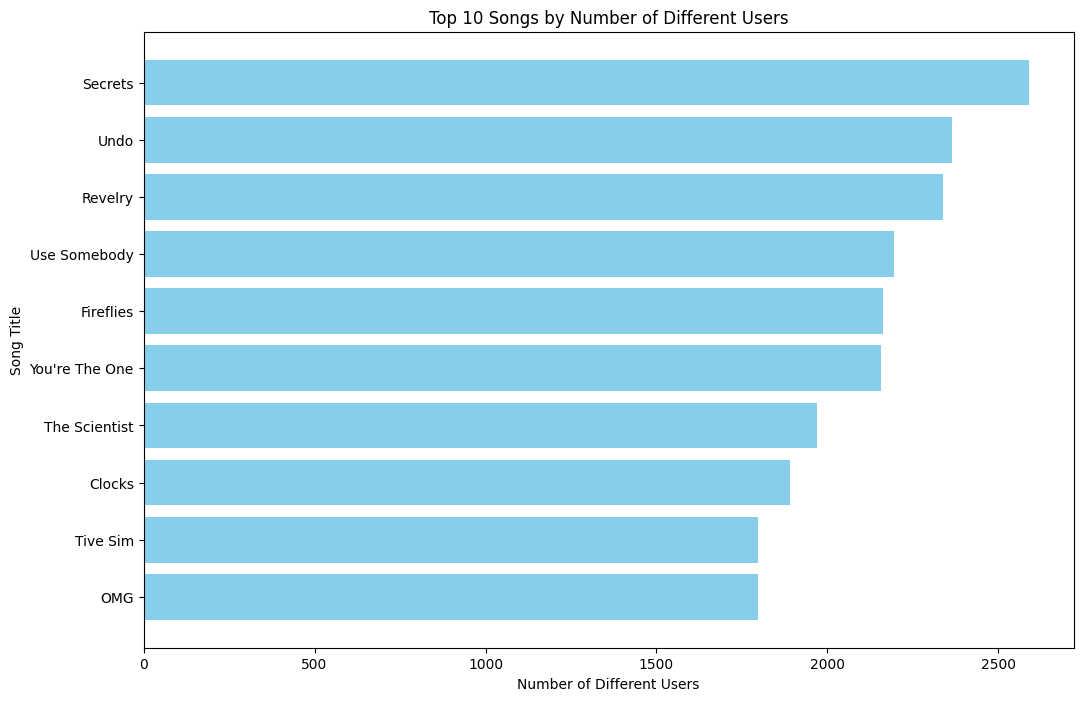


FINAL


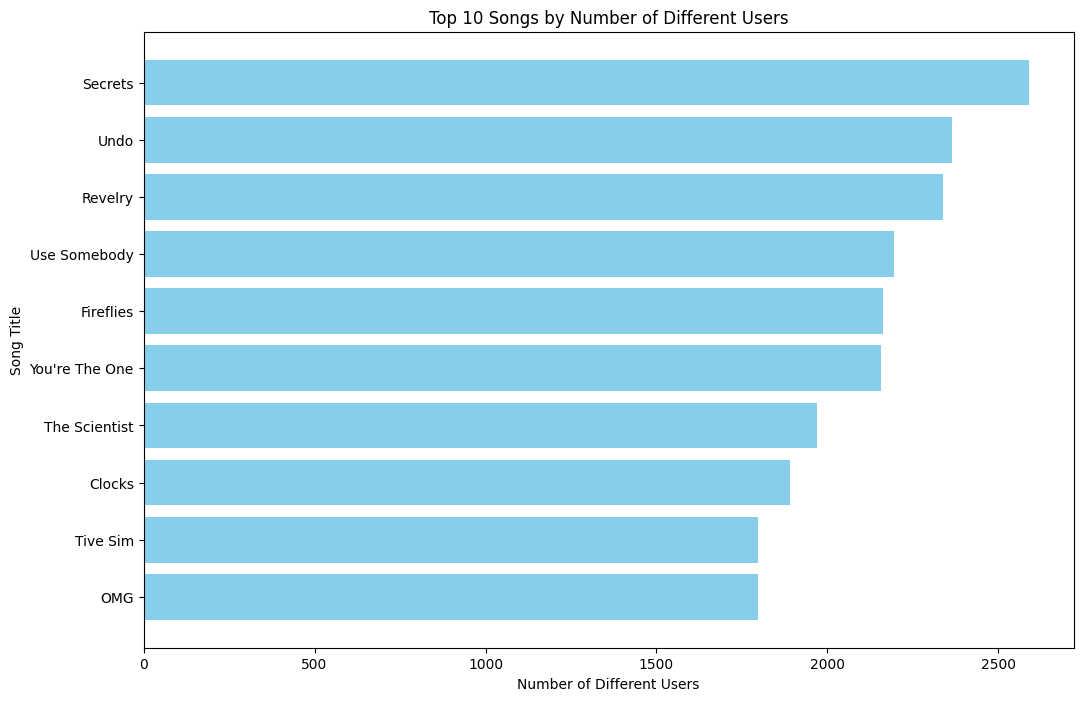

In [903]:
print("BEFORE")
# Call the function to plot the top 10 songs by number of users
plot_top_users_per_song(users_per_song_df_before)

print()

print("FINAL")
# Call the function to plot the top 10 songs by number of users
plot_top_users_per_song(users_per_song_df_final)

In [904]:
print("BEFORE")
max_users_list_before = [30, 60, 90, 120, 150, 200]
filtered_results_before = filter_songs_by_user_count(df_final_before_songs, max_users_list_before)

print()

print("FINAL")
max_users_list_final = [30, 60, 90, 120, 150, 200]
filtered_results_final = filter_songs_by_user_count(df_final, max_users_list_final)

BEFORE
There are 222 songs listened to by less than 30 users.
There are 8005 songs listened to by more than 30 users.

There are 3072 songs listened to by less than 60 users.
There are 5155 songs listened to by more than 60 users.

There are 5044 songs listened to by less than 90 users.
There are 3183 songs listened to by more than 90 users.

There are 6105 songs listened to by less than 120 users.
There are 2122 songs listened to by more than 120 users.

There are 6727 songs listened to by less than 150 users.
There are 1500 songs listened to by more than 150 users.

There are 7318 songs listened to by less than 200 users.
There are 909 songs listened to by more than 200 users.


FINAL
There are 0 songs listened to by less than 30 users.
There are 2122 songs listened to by more than 30 users.

There are 0 songs listened to by less than 60 users.
There are 2122 songs listened to by more than 60 users.

There are 0 songs listened to by less than 90 users.
There are 2122 songs listened t

BEFORE


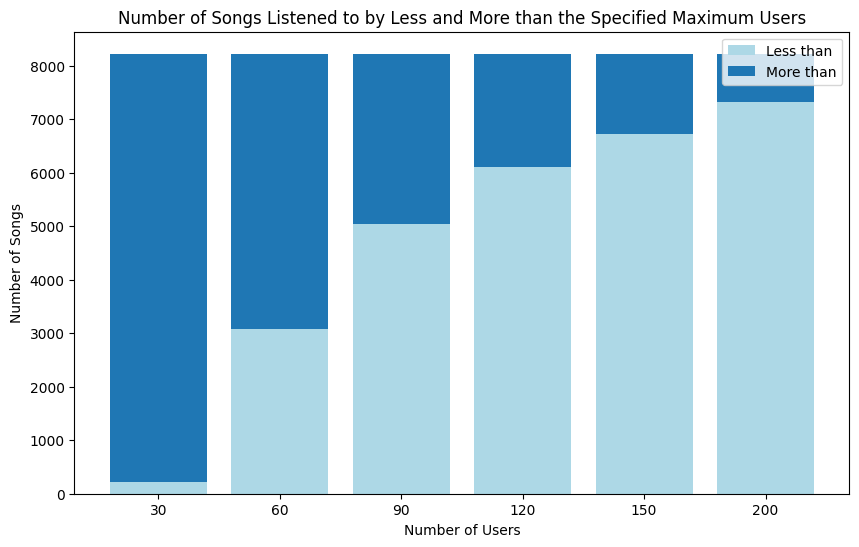


AFTER


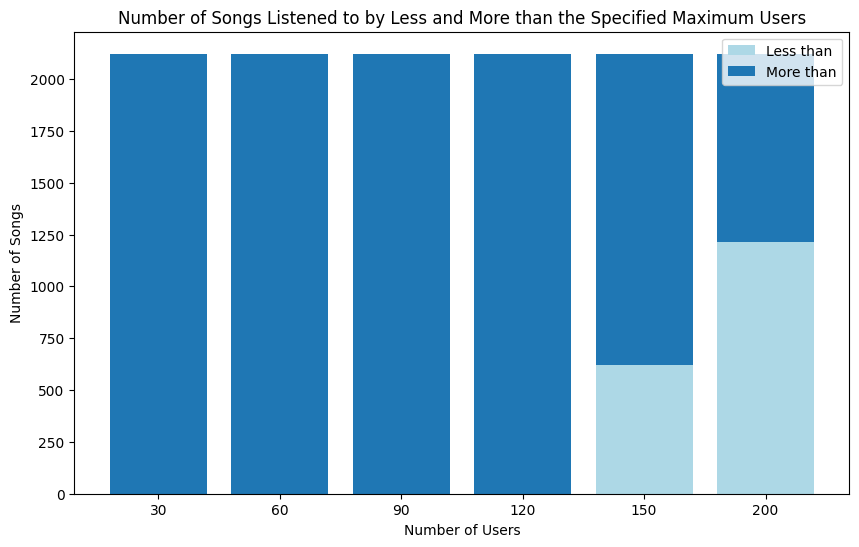

In [905]:
print("BEFORE")
# Call the plot function directly with filtered results
plot_song_counts_by_max_users(filtered_results_before)

print()

print("AFTER")
# Call the plot function directly with filtered results
plot_song_counts_by_max_users(filtered_results_final)



---



In [906]:
df_final_before_rating = df_final.copy()

## Dropping listen_count > 10 - TODO

אולי לא צריך

<b>

d. Rating system - we will limit the users to only those who have listened to each song no more than 10 times.

</b>

In [907]:
d = 10

- Before implementing our find, we will do some final research:

In [908]:
shape_before_dropping_d = df_final.shape
print("Shape of our df before dropping rating >", d, ":", shape_before_dropping_d)

# Sum the values in the 'listen_count' column
listen_count_before_dropping_d = df_final['listen_count'].sum()
print("Sum of all the listen count before dropping rating >", d, ":", listen_count_before_dropping_d)

different_song_count_before_dropping_d = df_final['song_id'].nunique()
print("Number of different songs before dropping dropping rating >", d, ":", different_song_count_before_dropping_d)

different_user_count_before_dropping_d = df_final['user_id'].nunique()
print("Number of different users before dropping dropping rating >", d, ":", different_user_count_before_dropping_d)

Shape of our df before dropping rating > 10 : (544534, 7)
Sum of all the listen count before dropping rating > 10 : 1515343
Number of different songs before dropping dropping rating > 10 : 2122
Number of different users before dropping dropping rating > 10 : 15762


In [909]:
# Drop records with play_count more than(>) 5
df_final = df_final[df_final.listen_count <= d]

In [910]:
def filter_users_by_listen_count(df, n):
    """
    Filter out users who have at least one row with 'listen_count' > n.

    Parameters:
        df (DataFrame): The DataFrame containing the song data.
        n (int): Maximum number of listens allowed for a song.

    Returns:
        DataFrame: Filtered DataFrame containing users who listened within the specified limit.
    """
    # Find users with at least one row where 'listen_count' exceeds n
    users_to_remove = df[df['listen_count'] > n]['user_id'].unique()

    # Filter the original DataFrame to exclude users found above
    filtered_df = df[~df['user_id'].isin(users_to_remove)]

    return filtered_df

In [911]:
df_final = filter_users_by_listen_count(df_final, d)

- By dropping rating > 5 we lose users who listened to a song more than 5 times. Moreover, we lose some songs that was listened to only by the users we dropped. <br>
Of course, the total number of listens became smaller. <br>
Here are the findings:

In [912]:
shape_after_dropping_d = df_final.shape
print("Shape of our df after dropping rating >", d, ":", shape_after_dropping_d)

# Sum the values in the 'listen_count' column
listen_count_after_dropping_d = df_final['listen_count'].sum()
print("Sum of all the listen count after dropping rating >", d, ":", listen_count_after_dropping_d)

different_song_count_after_dropping_d = df_final['song_id'].nunique()
print("Number of different songs after dropping dropping rating >", d, ":", different_song_count_after_dropping_d)

different_user_count_after_dropping_d = df_final['user_id'].nunique()
print("Number of different users after dropping dropping rating >", d, ":", different_user_count_after_dropping_d)

Shape of our df after dropping rating > 10 : (523096, 7)
Sum of all the listen count after dropping rating > 10 : 1075236
Number of different songs after dropping dropping rating > 10 : 2122
Number of different users after dropping dropping rating > 10 : 15760


In [913]:
print("By dropping rating >", d, ", we reduced the amount of samples by:", shape_before_dropping_d[0] - shape_after_dropping_d[0])
print("By dropping rating >", d, ", we reduced the amount of listening by:", listen_count_before_dropping_d - listen_count_after_dropping_d)
print("By dropping rating >", d, ", we reduced the number of songs by:", different_song_count_before_dropping_d - different_song_count_after_dropping_d)
print("By dropping rating >", d, ", we reduced the number of users by:", different_user_count_before_dropping_d - different_user_count_after_dropping_d)

By dropping rating > 10 , we reduced the amount of samples by: 21438
By dropping rating > 10 , we reduced the amount of listening by: 440107
By dropping rating > 10 , we reduced the number of songs by: 0
By dropping rating > 10 , we reduced the number of users by: 2


In [914]:
print("BEFORE")
# Call the function to calculate the number of users per listen count
users_per_listen_count_df_before = calculate_users_per_listen_count(df_final_before_rating)

# Print the DataFrame
users_per_listen_count_df_before

BEFORE


listen_count  num_users
0               1      15636
1               2      14714
2               3      11783
3               4       9021
4               5       8963
..            ...        ...
181           338          1
182           353          1
183           405          1
184           436          1
185           879          1

[186 rows x 2 columns]

In [915]:
print("FINAL")
# Call the function to calculate the number of users per listen count
users_per_listen_count_df_final = calculate_users_per_listen_count(df_final)

# Print the DataFrame
users_per_listen_count_df_final

FINAL


listen_count  num_users
0             1      15636
1             2      14714
2             3      11783
3             4       9021
4             5       8963
5             6       6306
6             7       4806
7             8       3708
8             9       2928
9            10       3078

BEFORE


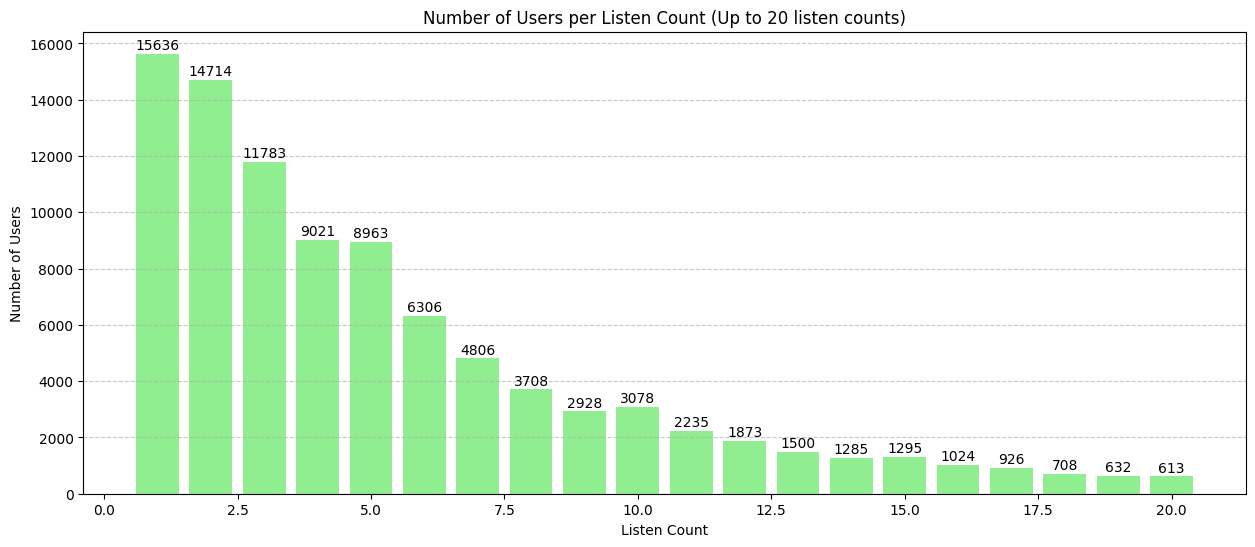


FINAL


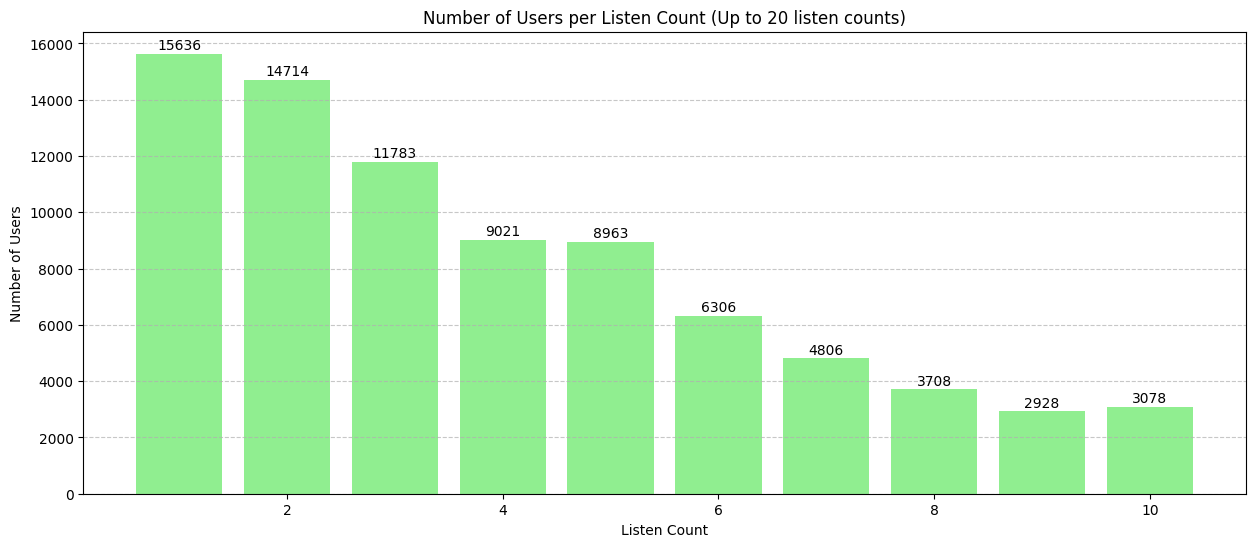

In [916]:
print("BEFORE")
# Call the function to plot the number of users per listen count for up to n listen counts
plot_users_per_listen_count(users_per_listen_count_df_before, n=20)

print()

print("FINAL")
# Call the function to plot the number of users per listen count for up to n listen counts
plot_users_per_listen_count(users_per_listen_count_df_final, n=20)

BEFORE
Number of users left for max listen count of 3: 2272
Number of users left for max listen count of 4: 3204
Number of users left for max listen count of 5: 4693
Number of users left for max listen count of 6: 5812
Number of users left for max listen count of 7: 6694
Number of users left for max listen count of 8: 7410
Number of users left for max listen count of 9: 8025
Number of users left for max listen count of 10: 8845
Number of users left for max listen count of 11: 9451
Number of users left for max listen count of 12: 9983
Number of users left for max listen count of 13: 10416
Number of users left for max listen count of 14: 10819
Number of users left for max listen count of 15: 11267


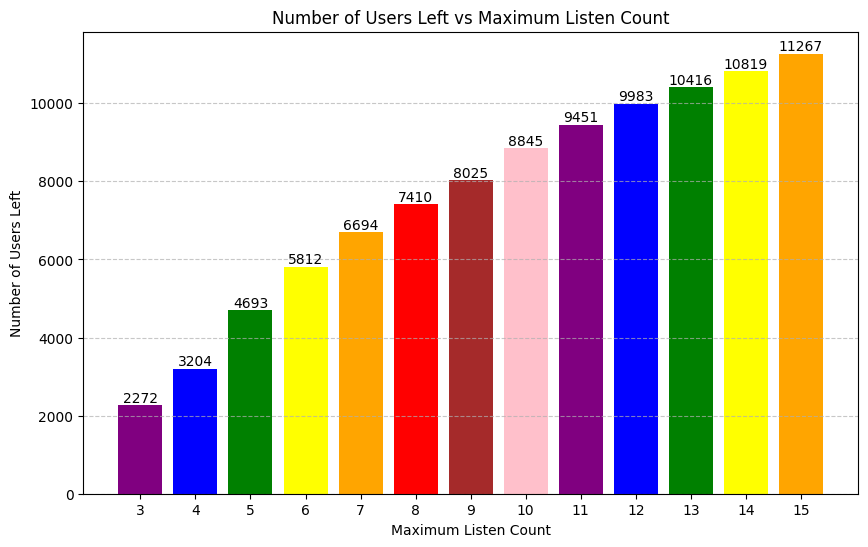


FINAL
Number of users left for max listen count of 3: 2565
Number of users left for max listen count of 4: 3737
Number of users left for max listen count of 5: 5829
Number of users left for max listen count of 6: 7584
Number of users left for max listen count of 7: 9251
Number of users left for max listen count of 8: 10919
Number of users left for max listen count of 9: 12682
Number of users left for max listen count of 10: 15760
Number of users left for max listen count of 11: 15760
Number of users left for max listen count of 12: 15760
Number of users left for max listen count of 13: 15760
Number of users left for max listen count of 14: 15760
Number of users left for max listen count of 15: 15760


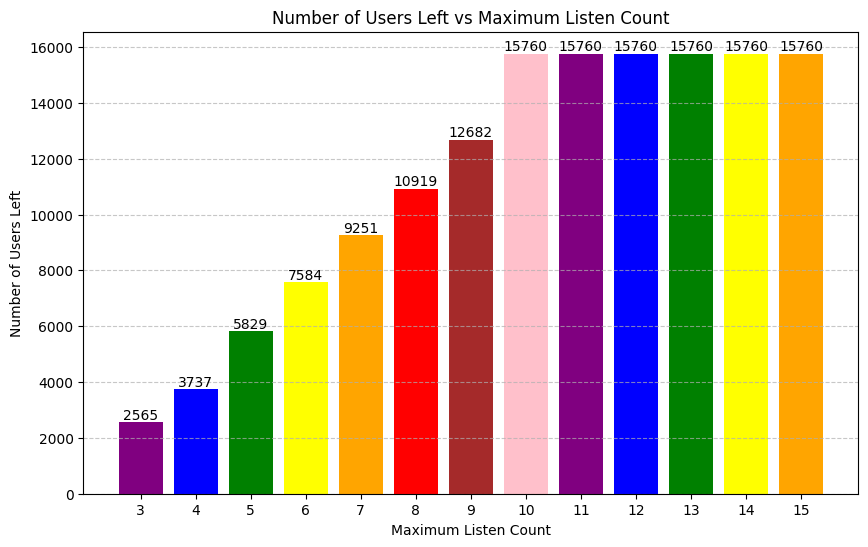

In [917]:
print("BEFORE")
# Call the function to check max listen counts from 3 to 15
filtered_df_before, ratings_before = filter_users_by_max_listen_count(df_final_before_rating, start_count=3, end_count=15)

# Plot the results
plot_users_left(ratings_before)

print()

print("FINAL")
# Call the function to check max listen counts from 3 to 15
filtered_df_final, ratings_final = filter_users_by_max_listen_count(df_final, start_count=3, end_count=15)

# Plot the results
plot_users_left(ratings_final)

BEFORE


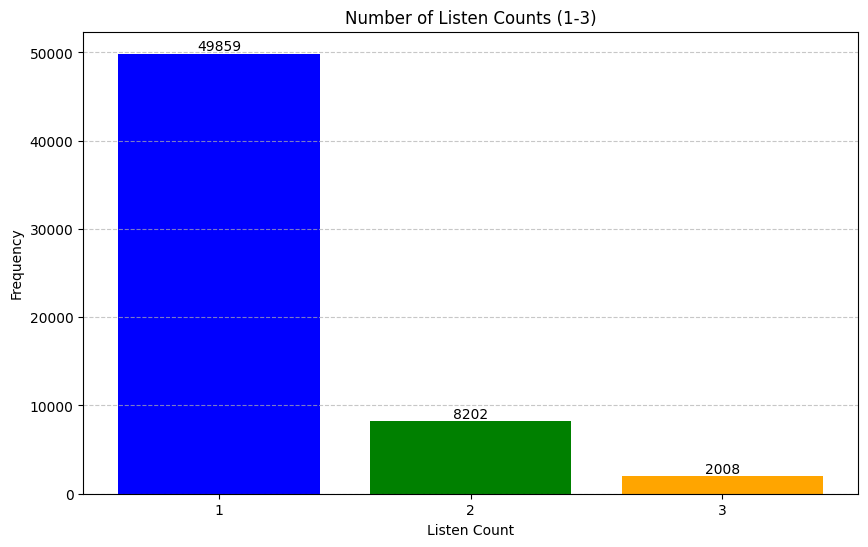

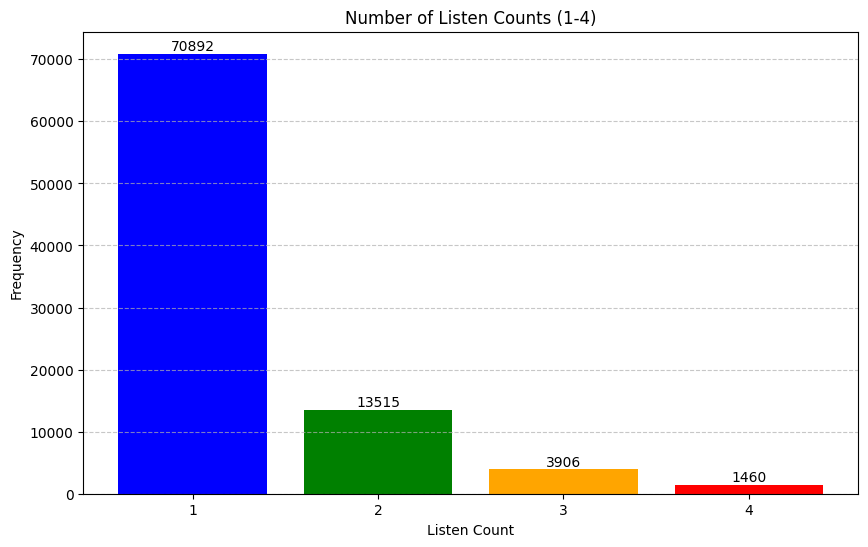

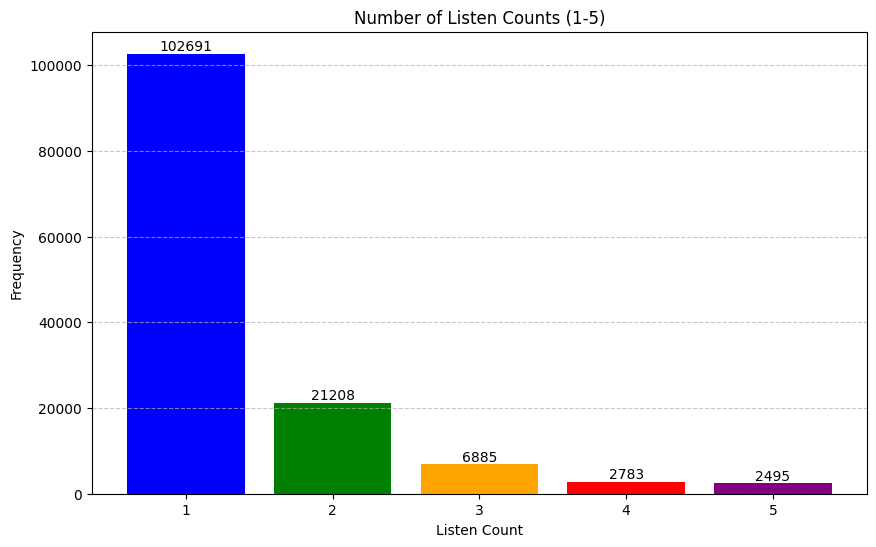

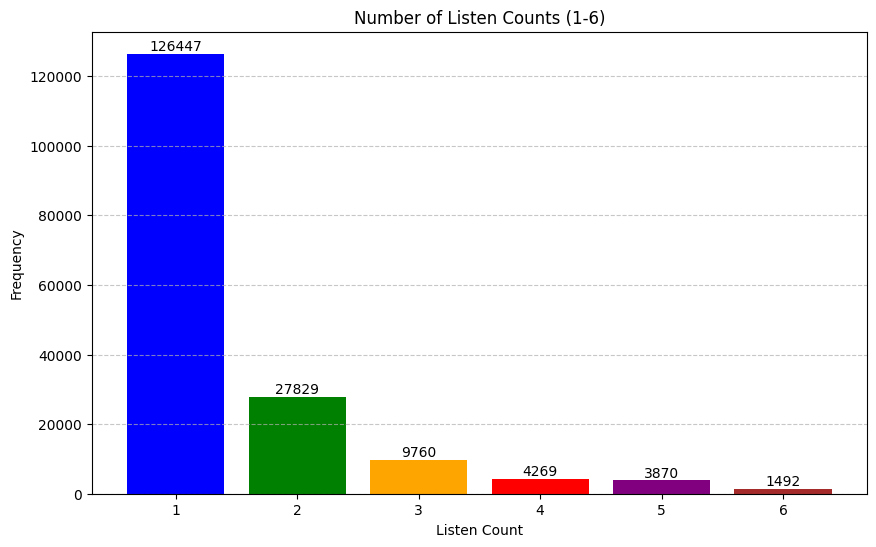

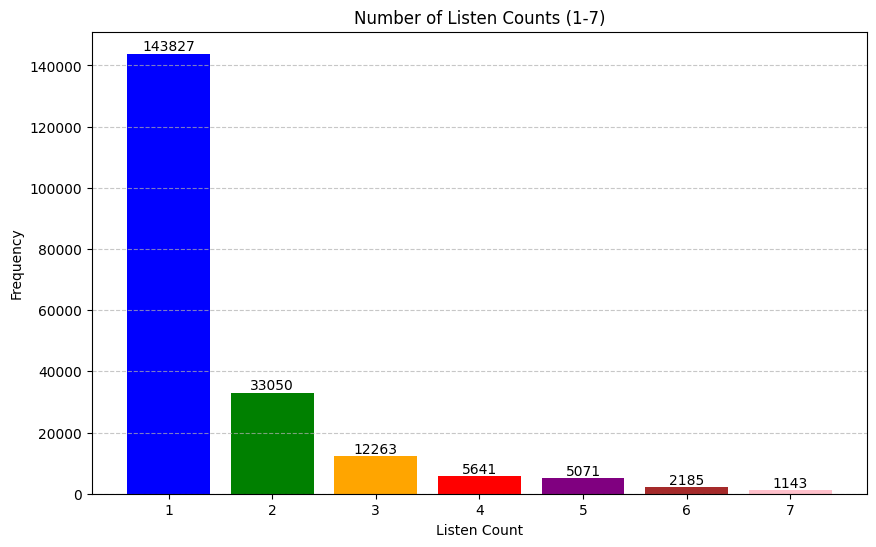

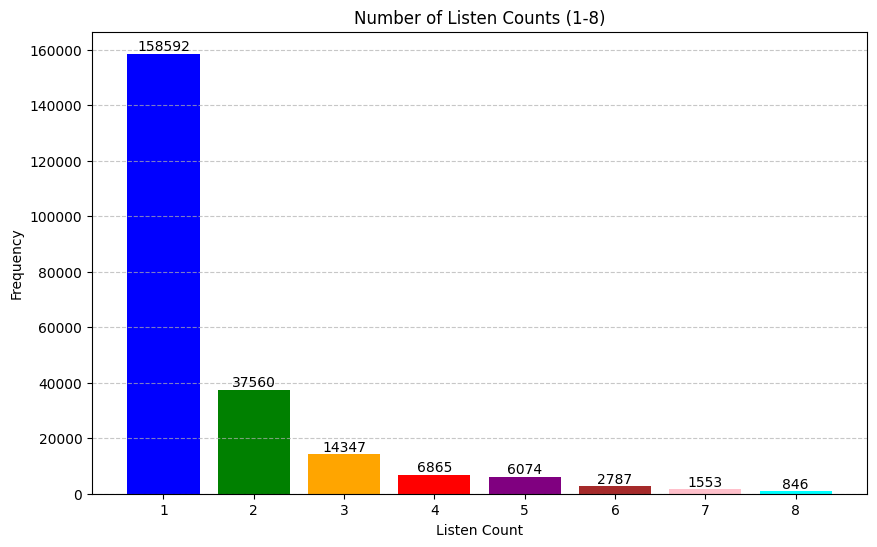

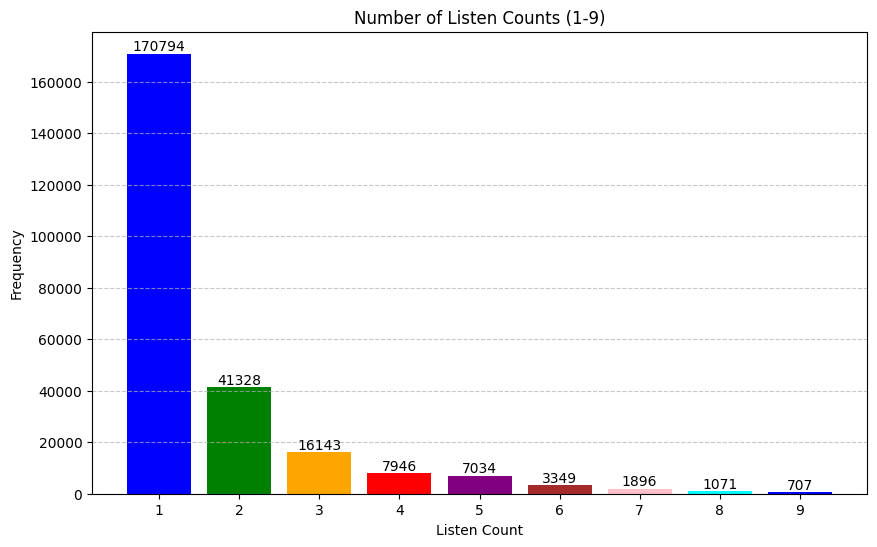

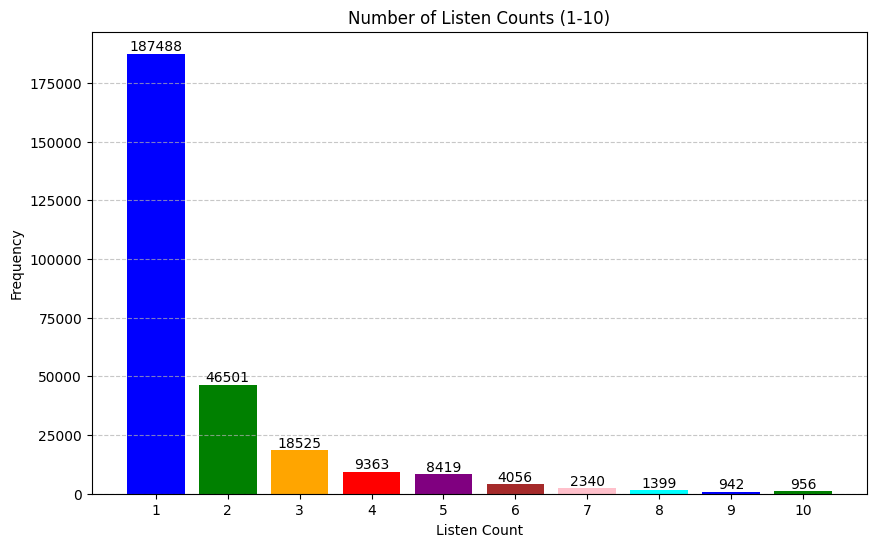

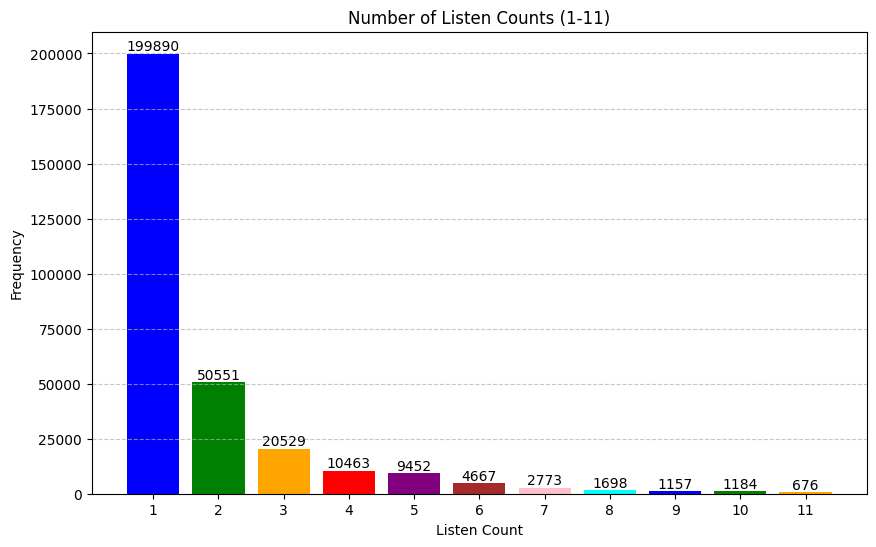

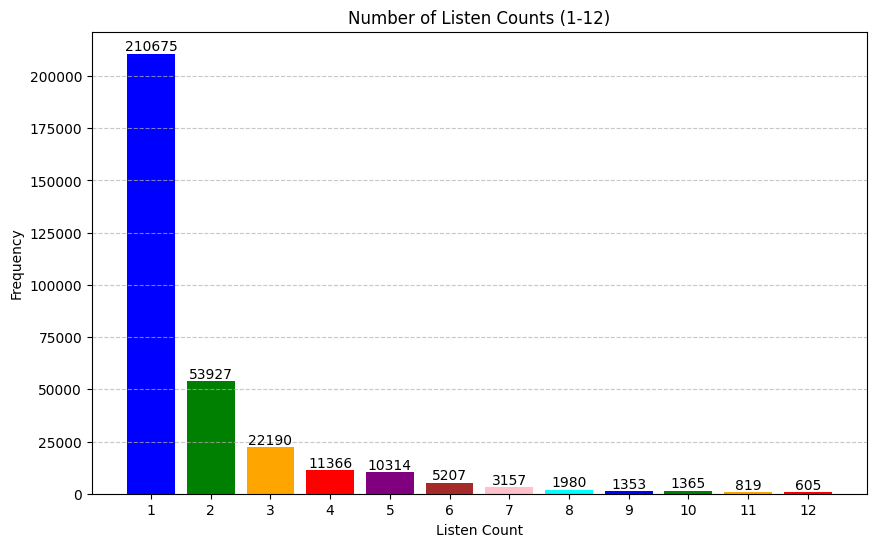

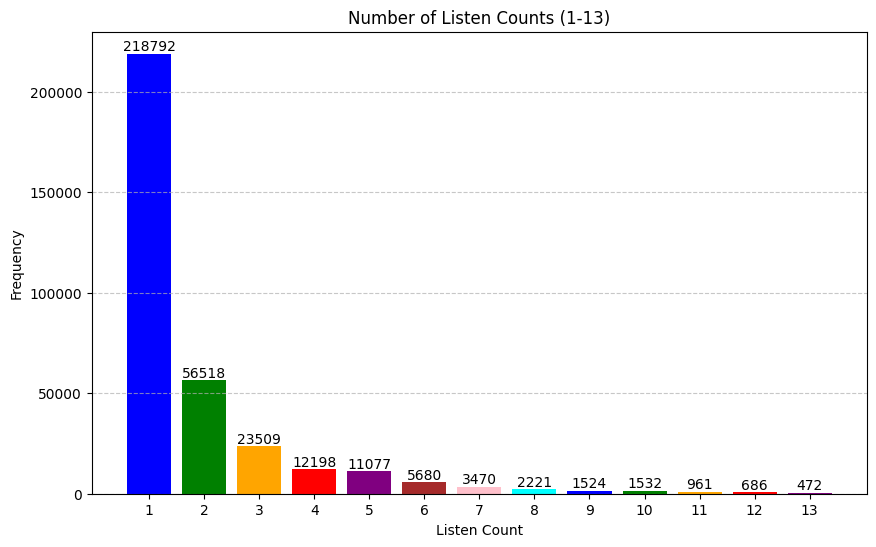

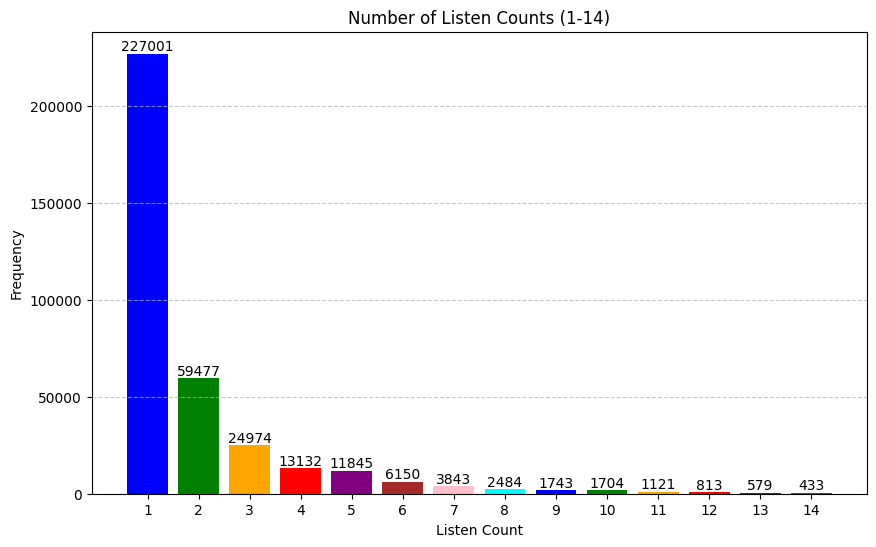

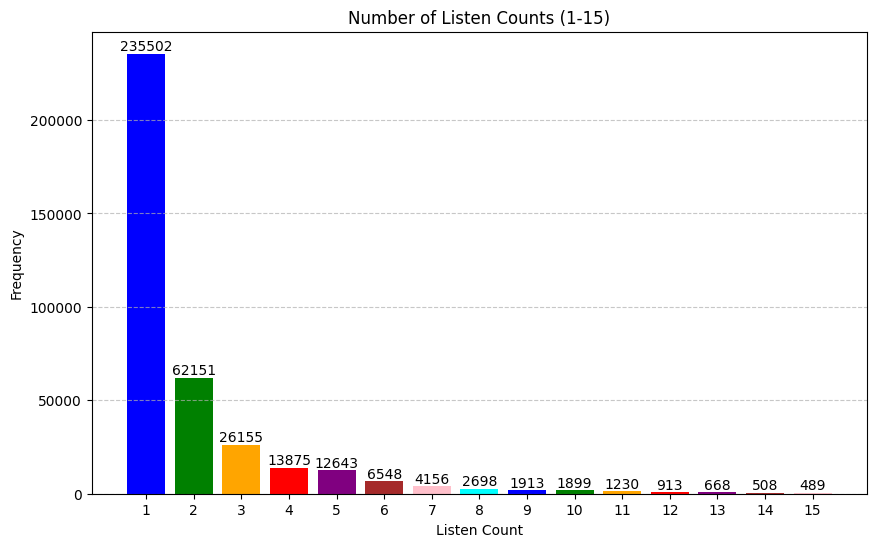


AFTER


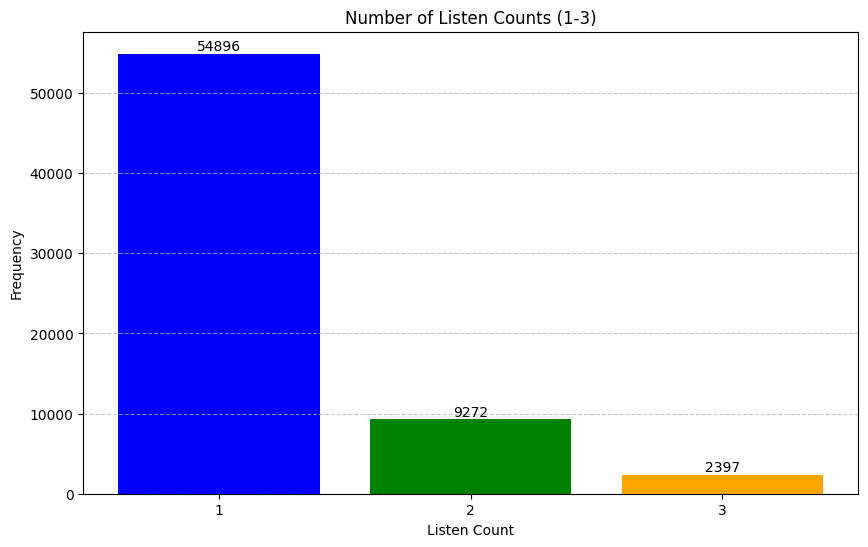

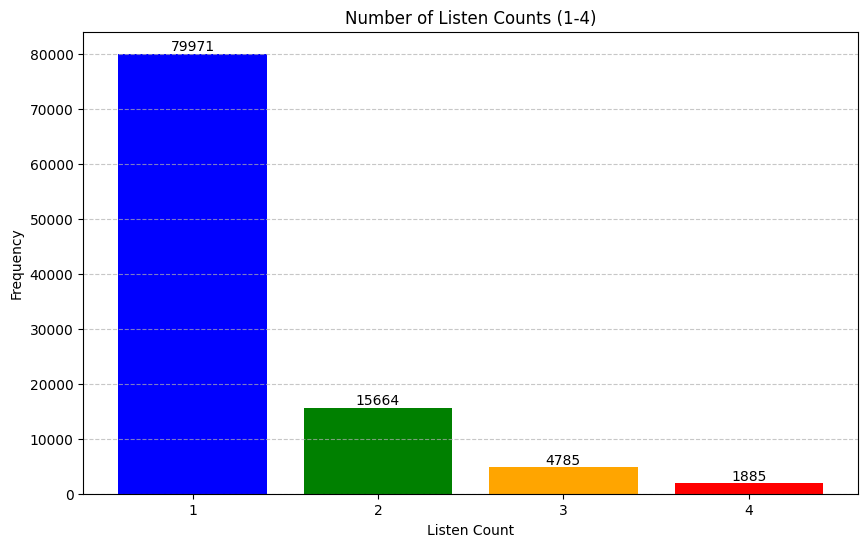

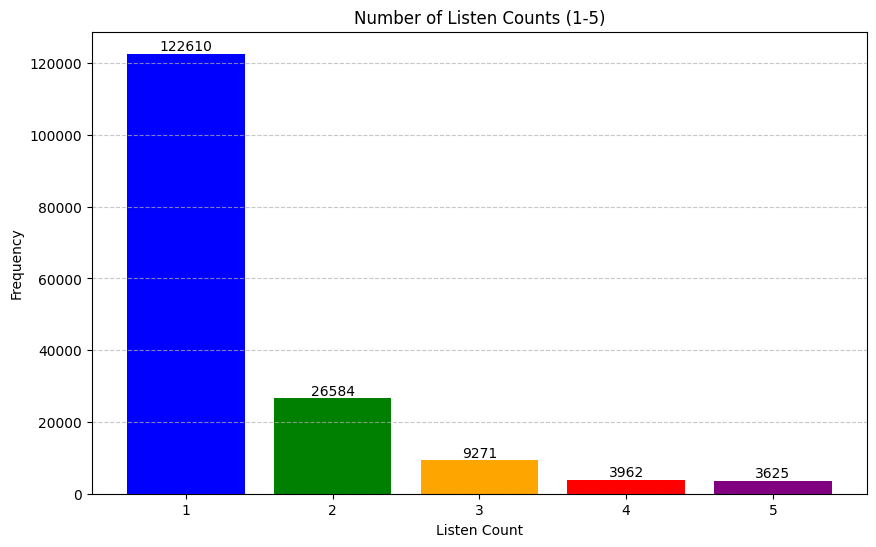

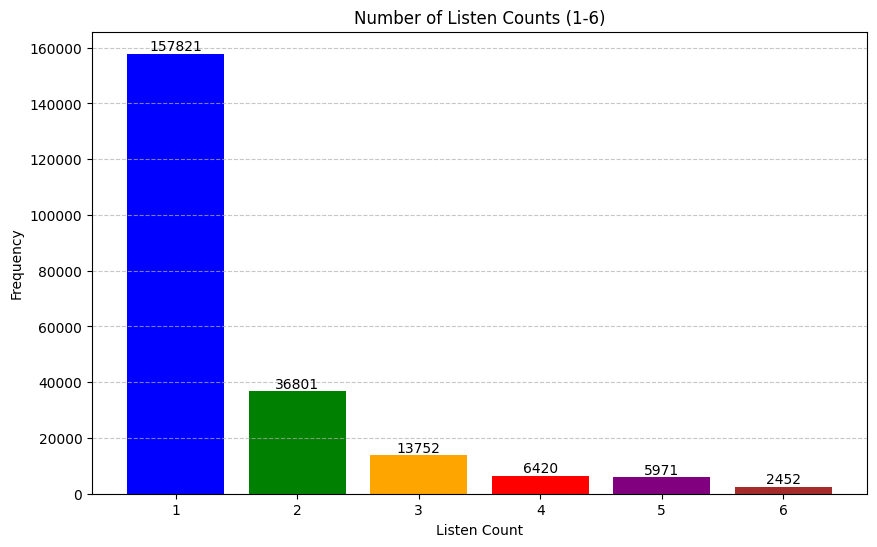

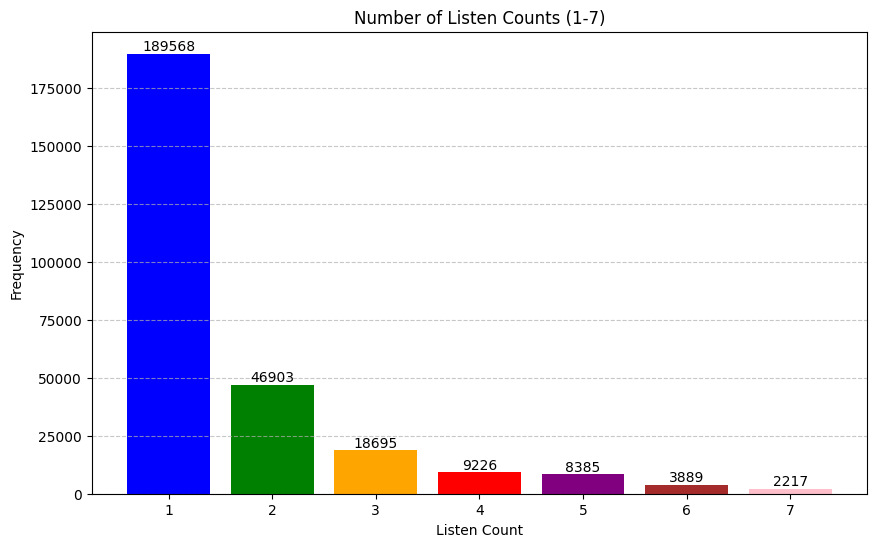

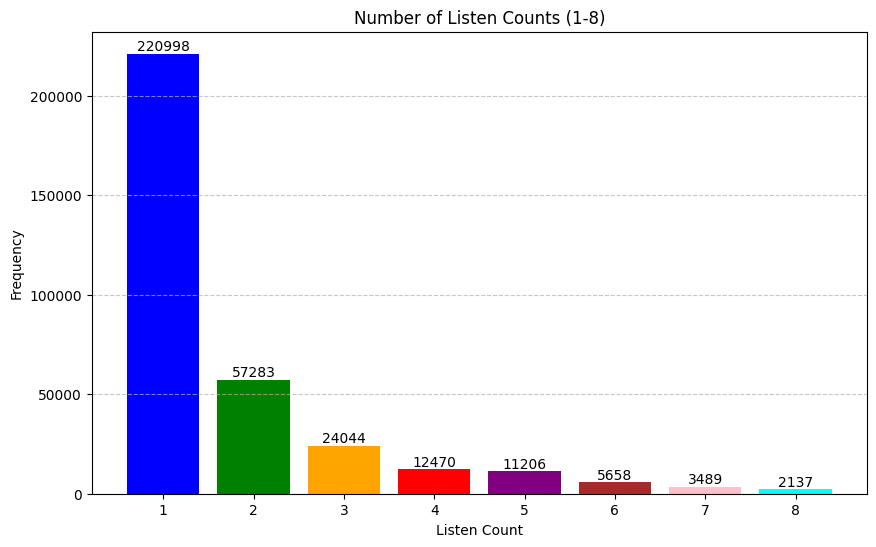

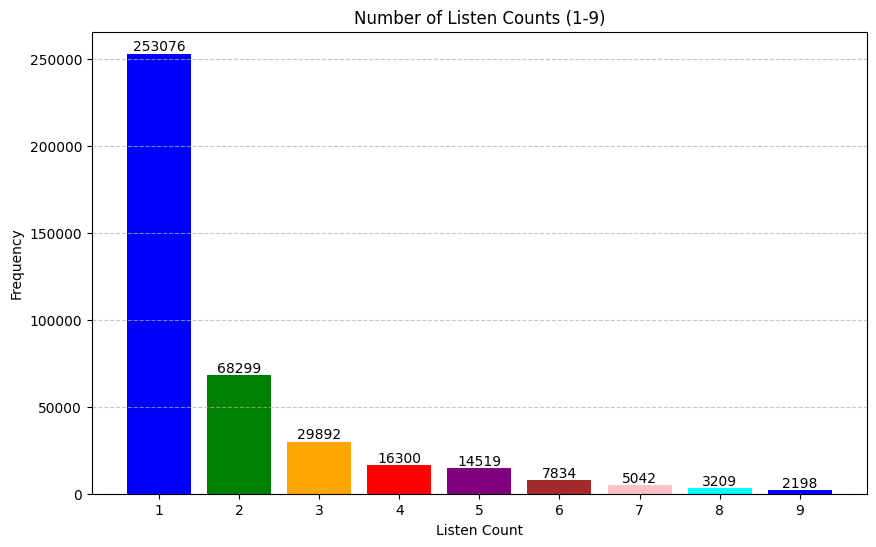

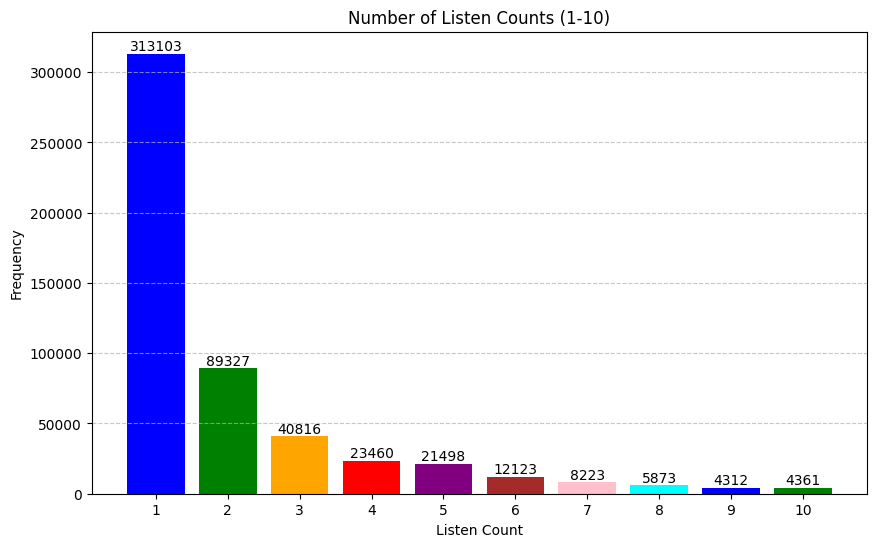

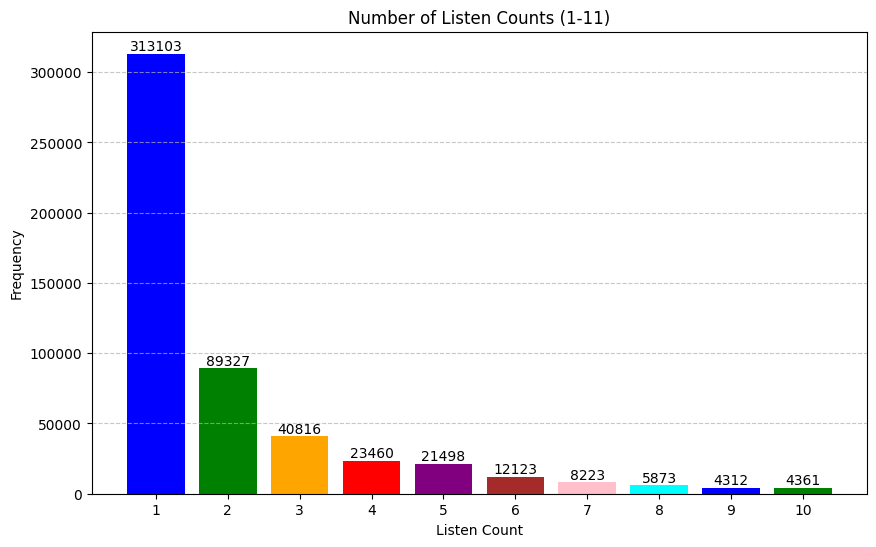

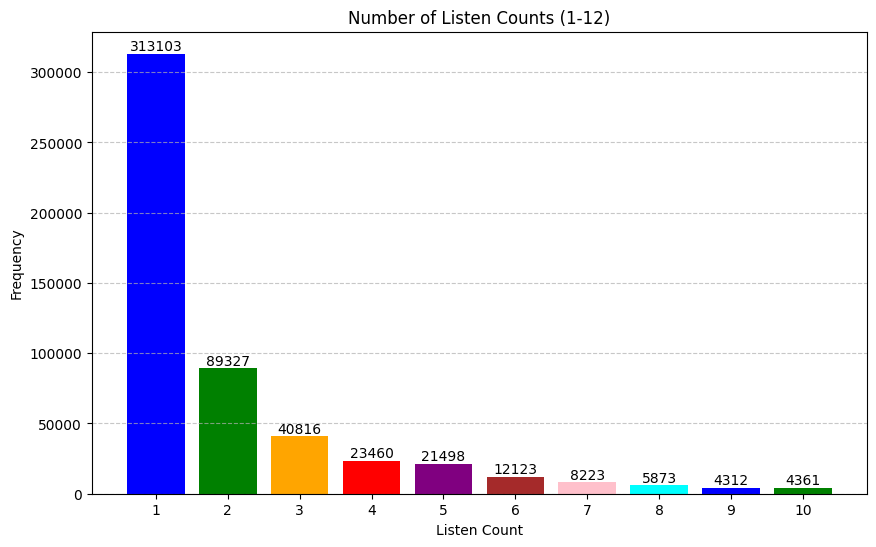

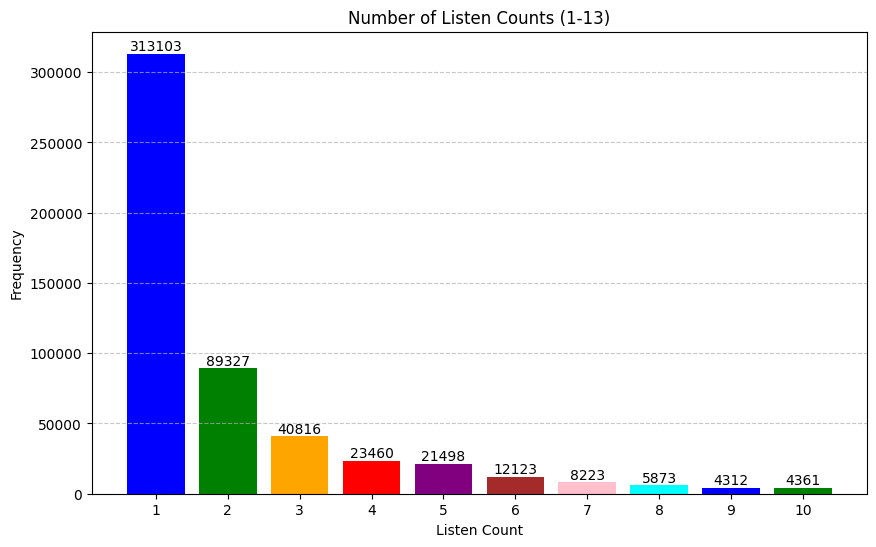

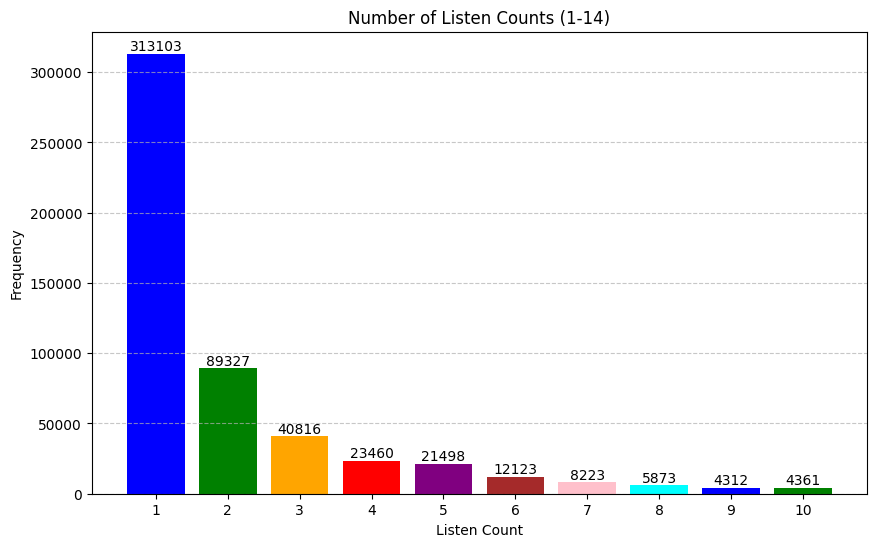

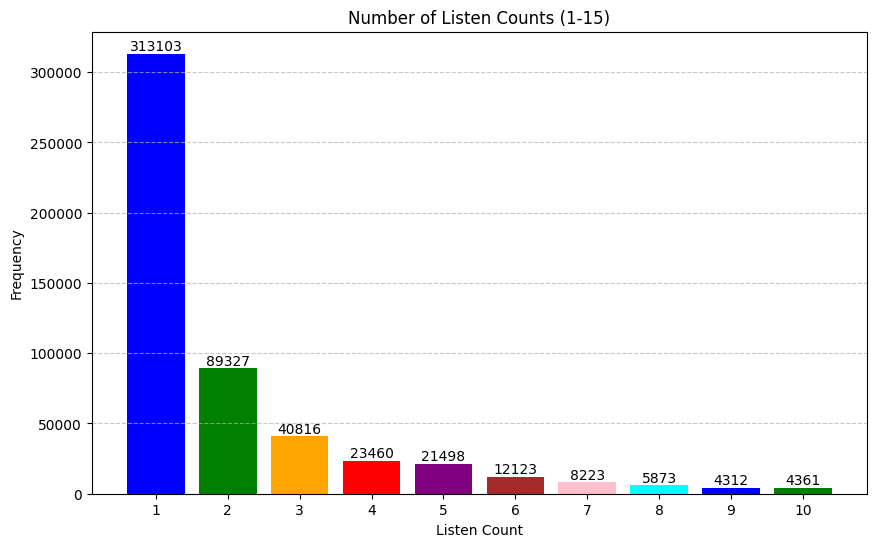

In [918]:
print("BEFORE")
# Call the function with start_count=3 and end_count=15
plot_listen_counts_range(df_final_before_rating, start_count=3, end_count=15)

print()

print("AFTER")
# Call the function with start_count=3 and end_count=15
plot_listen_counts_range(df_final, start_count=3, end_count=15)

TODO: כאן רצינו לבצע חלוקה שונה של השמעות היוזרים ובעצם ליצור דירוג יותר משמעותי של יוזר לשירים ששמע - נצטרך לשים את זה במקום אחר - כנראה אחרי הפריפרוססינג ובנוסף נצטרך לטפל בשמות המשתנים

We have come to conclusion that our data will only have user-song interactions up to 15 listen_counts.

Also, we will create a new feature called 'rating' which will be defined as follows:

In [919]:
# def assign_rating(listen_count):
#     if listen_count == 1:
#         return 1
#     elif listen_count in range(2, 4):
#         return 2
#     elif listen_count in range(4, 7):
#         return 3
#     elif listen_count in range(7, 10):
#         return 4
#     elif listen_count in range(10, 16):
#         return 5
#     else:
#         return None

In [920]:
# Apply the function to create the "rating" column
# df_final['listen_count'] = df_final['listen_count'].apply(assign_rating)

## Final Preprocessing function

Combining all the conclusions into one final function:

DOTO - למחוק הערות

In [921]:
def final_preprocessing(df, user_range, song_range, listen_count):

  # Done once at the beginning of the Preprocessing
  # df = encode_user_song_ids(df)

  # Dropping all the songs their released year is 0.
  # df = df[df['year'] > 0]

  df = drop_songs_by_user_count(df, song_range)

  df = drop_users_with_less_songs(df, user_range)

  # df = filter_users_by_listen_count(df, listen_count)

  # df['listen_count'] = df['listen_count'].apply(assign_rating)

  return df

In [922]:
df_final = final_preprocessing(combined_df_ppc, 40, 200, 10)

In [923]:
df_final

user_id  song_id  listen_count  \
199         6932      260             1   
200         6932      365             1   
202         6932      420             1   
203         6932      452             1   
204         6932      576             1   
...          ...      ...           ...   
1999757    47603     7899             1   
1999758    47603     7945             1   
1999765    47603     8111             1   
1999766    47603     8121             5   
1999768    47603     8193             3   

                                                  title  \
199      Hot N Cold (Manhattan Clique Remix Radio Edit)   
200                                  Daisy And Prudence   
202                     The Ballad of Michael Valentine   
203                           I Stand Corrected (Album)   
204                               They Might Follow You   
...                                                 ...   
1999757                                 End Of The Line   
1999758                                      Neon Tiger   
1999765                            He Can Only Hold Her   
1999766                              Drunk Kid Catholic   
1999768                            Let's Live For Today   

                                release         artist_name  year  
199                          Hot N Cold          Katy Perry  2008  
200                        Distillation        Erin McKeown  2000  
202                             Sawdust         The Killers  2004  
203                     Vampire Weekend     Vampire Weekend  2007  
204                         Tiny Vipers         Tiny Vipers  2007  
...                                 ...                 ...   ...  
1999757       Traveling Wilburys Vol. 1  Traveling Wilburys  1988  
1999758                       Day & Age         The Killers  2008  
1999765                   Back To Black       Amy Winehouse  2006  
1999766  Noise Floor [Rarities 98 - 05]         Bright Eyes  2000  
1999768      150 Rock 'N' Roll Classics     The Grass Roots  1987  

[253591 rows x 7 columns]

In [924]:
df_final['user_id'].nunique()

3968

In [925]:
df_final['song_id'].nunique()

2130

In [926]:
df_final[df_final['listen_count'] == 4]

user_id  song_id  listen_count                              title  \
378        26909      631             4                               Love   
410        26909     1235             4                      Deny Selected   
451        26909     2105             4                      Too Much Love   
492        26909     2982             4  All Of The Champs That Ever Lived   
584        26909     5045             4                 Music Is Happiness   
...          ...      ...           ...                                ...   
1999571    47603     4333             4                          So Says I   
1999593    47603     4812             4                      Again & Again   
1999606    47603     5036             4                     Chantilly Lace   
1999642    47603     5785             4                       Diamond Dave   
1999643    47603     5792             4                          Tape Song   

                                                   release  \
378                           Attack Decay Sustain Release   
410                                               Oi Oi oi   
451                                        LCD Soundsystem   
492                       One Ten Hundred Thousand Million   
584                       One Ten Hundred Thousand Million   
...                                                    ...   
1999571  Live at Austin City Limits Music Festival 2006...   
1999593                               the bird and the bee   
1999606                        Spotlight On The Big Bopper   
1999642                   Ray Guns Are Not Just The Future   
1999643                                      Midnight Boom   

                  artist_name  year  
378       Simian Mobile Disco  2007  
410                Boys Noize  2007  
451           LCD Soundsystem  2005  
492           Octopus Project  2005  
584           Octopus Project  2005  
...                       ...   ...  
1999571             The Shins  2003  
1999593  the bird and the bee  2006  
1999606            Big Bopper  1959  
1999642  the bird and the bee  2009  
1999643             The Kills  2008  

[11004 rows x 7 columns]

# Preparing the data for modeling


## Split the data

todo

Here we want to make sure that our data is arranged properly:
* In the following models we will use the surprise library which deals with explicit ranking data, for this reason we need to make sure that our data is divided by "rankings".

In [927]:
df_final

user_id  song_id  listen_count  \
199         6932      260             1   
200         6932      365             1   
202         6932      420             1   
203         6932      452             1   
204         6932      576             1   
...          ...      ...           ...   
1999757    47603     7899             1   
1999758    47603     7945             1   
1999765    47603     8111             1   
1999766    47603     8121             5   
1999768    47603     8193             3   

                                                  title  \
199      Hot N Cold (Manhattan Clique Remix Radio Edit)   
200                                  Daisy And Prudence   
202                     The Ballad of Michael Valentine   
203                           I Stand Corrected (Album)   
204                               They Might Follow You   
...                                                 ...   
1999757                                 End Of The Line   
1999758                                      Neon Tiger   
1999765                            He Can Only Hold Her   
1999766                              Drunk Kid Catholic   
1999768                            Let's Live For Today   

                                release         artist_name  year  
199                          Hot N Cold          Katy Perry  2008  
200                        Distillation        Erin McKeown  2000  
202                             Sawdust         The Killers  2004  
203                     Vampire Weekend     Vampire Weekend  2007  
204                         Tiny Vipers         Tiny Vipers  2007  
...                                 ...                 ...   ...  
1999757       Traveling Wilburys Vol. 1  Traveling Wilburys  1988  
1999758                       Day & Age         The Killers  2008  
1999765                   Back To Black       Amy Winehouse  2006  
1999766  Noise Floor [Rarities 98 - 05]         Bright Eyes  2000  
1999768      150 Rock 'N' Roll Classics     The Grass Roots  1987  

[253591 rows x 7 columns]

In [928]:
df_final['user_id'].nunique(), df_final['song_id'].nunique()

(3968, 2130)

To split your dataframe into train and test sets such that every user_id and song_id appears in both sets, and 80% of the rows contain songs listened to by users in the train set while 20% contain songs listened to by users in the test set, you can follow these steps:

Group the dataframe by user_id and aggregate to create a list of unique song_ids listened to by each user.
For each user, randomly select 80% of the songs to include in the train set and the remaining 20% for the test set.
Create train and test dataframes based on the selected song_ids for each user.
Here's how you can implement this in Python using pandas:

In [929]:
#Step 1: Group by user_id and aggregate to create a list of unique song_ids listened to by each user
user_song_groups = df_final.groupby('user_id')['song_id'].agg(list)

In [930]:
user_song_groups

user_id
17       [576, 859, 1017, 1089, 1092, 1200, 1256, 1415,...
42       [430, 438, 573, 698, 770, 914, 1128, 1564, 163...
57       [82, 94, 120, 235, 486, 769, 804, 962, 972, 10...
84       [12, 17, 78, 224, 318, 427, 678, 1046, 1141, 1...
92       [113, 248, 337, 397, 486, 669, 1257, 1435, 146...
                               ...                        
75992    [42, 224, 515, 748, 775, 788, 914, 972, 994, 1...
76005    [78, 80, 142, 246, 315, 337, 388, 411, 420, 48...
76012    [66, 111, 427, 852, 889, 971, 1092, 1200, 1258...
76036    [15, 235, 284, 629, 659, 1194, 1294, 1371, 148...
76046    [48, 78, 112, 142, 605, 690, 713, 1151, 1164, ...
Name: song_id, Length: 3968, dtype: object

In [931]:
def create_train_test_data(df_final, test_size=0.2, random_state=42):
  # Step 1: Group by user_id and aggregate to create a list of unique song_ids listened to by each user
  user_song_groups = df_final.groupby('user_id')['song_id'].agg(list)

  # Initialize lists to store train and test data
  train_data = []
  test_data = []

  # Step 2: For each user, split the song_ids into train and test sets
  for user_id, song_ids in user_song_groups.items():
      train_song_ids, test_song_ids = sk_split(song_ids, test_size=test_size, random_state=random_state)

      # Add tuples of (user_id, song_id) to train and test data
      train_data.extend([(user_id, song_id) for song_id in train_song_ids])
      test_data.extend([(user_id, song_id) for song_id in test_song_ids])

  # Step 3: Create train and test dataframes
  train_df = pd.DataFrame(train_data, columns=['user_id', 'song_id']).merge(df_final, on=['user_id', 'song_id'])
  test_df = pd.DataFrame(test_data, columns=['user_id', 'song_id']).merge(df_final, on=['user_id', 'song_id'])

  return train_df, test_df

In [932]:
trainset_df, testset_df = create_train_test_data(df_final)

In [933]:
print("Train DataFrame Shape:", trainset_df.shape)
print("Test DataFrame Shape:", testset_df.shape)

Train DataFrame Shape: (201271, 7)
Test DataFrame Shape: (52320, 7)


In [934]:
trainset_df.shape[0] + testset_df.shape[0] == df_final.shape[0]

True

In [935]:
#Calculate the percentage of df_final covered by testset_df
percentage_coverage_test = len(testset_df) / len(df_final) * 100

print("Percentage of df_final covered by testset_df:", percentage_coverage_test, "%")

Percentage of df_final covered by testset_df: 20.6316470221735 %


In [936]:
#Calculate the percentage of df_final covered by testset_df
percentage_coverage_train = len(trainset_df) / len(df_final) * 100

print("Percentage of df_final covered by testset_df:", percentage_coverage_train, "%")

Percentage of df_final covered by testset_df: 79.36835297782649 %


In [937]:
trainset_df.shape

(201271, 7)

In [938]:
testset_df.shape

(52320, 7)

In [939]:
#Condition to check if all users are in both test and train:
train_users = set(trainset_df['user_id'].unique())
test_users = set(testset_df['user_id'].unique())

if train_users == test_users:
    print("All users are present in both train and test sets.")
else:
    print("Not all users are present in both train and test sets.")


All users are present in both train and test sets.


In [940]:
#Condition to check that for every user, the songs listened to in the train are different from the ones listened to in the test:
train_user_song_pairs = set(zip(trainset_df['user_id'], trainset_df['song_id']))
test_user_song_pairs = set(zip(testset_df['user_id'], testset_df['song_id']))

if not any(pair in train_user_song_pairs for pair in test_user_song_pairs):
    print("For every user, the songs listened in the train set are different from the ones listened in the test set.")
else:
    print("There are users for whom some songs overlap between the train and test sets.")

For every user, the songs listened in the train set are different from the ones listened in the test set.


In [941]:
#Assuming final_df is your complete dataframe containing all data
final_user_song_pairs = set(zip(df_final['user_id'], df_final['song_id']))

#Check if all rows in train appear in final_df
if set(zip(trainset_df['user_id'], trainset_df['song_id'])).issubset(final_user_song_pairs):
    print("All rows in train appear in final_df.")
else:
    print("Not all rows in train appear in final_df.")

#Check if all rows in test appear in final_df
if set(zip(testset_df['user_id'], testset_df['song_id'])).issubset(final_user_song_pairs):
    print("All rows in test appear in final_df.")
else:
    print("Not all rows in test appear in final_df.")

All rows in train appear in final_df.
All rows in test appear in final_df.


## Adding rating

Generate a rating scale After splitting the data:

Recommender systems allow users to express preferences for items using a rating scale.<br>
In our project, we will eventually want to recommend the user new songs to hear based on their playback history.<br>
But, the problem is that there is no definite rating of the user regarding how much he likes the songs he hears, unlike ratings for movies, restaurants or hotels where there is a number of stars when it is understood by everyone that 1 star is a low rating and 5 stars is a high rating that signifies maximum love for the user the item. We would like to address this problem by providing a personal rating for each individual user so that he can receive recommendations regarding himself.<br>
Therefore, generating a rating scale is important in order to effectively represent user preferences and provide personalized recommendations.<br><br>
In order to generate a correct rating for each user and reduce the problem, we will use what is written in the article: [Personalized Music Recommendation by Mining Social Media
Tags](https://www.sciencedirect.com/science/article/pii/S1877050913009009)
<br> The authors of the article suggest to solve this problem by a threshold value. First, the listen counts are divided into two ranges based on a threshold value. This threshold value is calculated using the mean and standard deviation of the listen counts for a user. Second, the range lower than the threshold is further divided into two sub-ranges, while the range higher than the threshold is divided into three sub-ranges. Finally, if a listen count falls within a specific range, it is transformed into the corresponding range number.<br>
The threshold T is defined as: $$ T = μ – W*σ $$
where μ indicates mean of listen counts, σ indicates standard deviation of listen counts for a user and W is a weight.<br>
(The weight is a parameter that allows for adjusting the sensitivity of the threshold to the variability of listen counts).<br>
Notice that: the threshold T should be calculated by that listen_count in the train data.

**Finding the Optimal Weight W:**

Approach:

- We define possible_weights as an array of values ranging from 0 to 1 to represent different possible weights.
- We iterate through each weight and calculate the standard deviation of listen counts for each user based on the threshold computed using that weight.
- We find the weight that minimizes the standard deviation across users.
- Finally, we visualize the effect of weight (W) on the standard deviation, highlighting the optimal weight.

In [942]:
def find_weight(trainset_df):
  possible_weights = np.linspace(0, 1, 100)
  user_std_devs = []

  for weight in possible_weights:
    # Calculate the threshold for each user using the weight
    thresholds = trainset_df.groupby('user_id')['listen_count'].mean() - weight * trainset_df.groupby('user_id')['listen_count'].std()

    # Calculate the standard deviation of listen counts for each user
    user_std_devs.append(thresholds.std())

  # Find the weight that minimizes the standard deviation across users
  optimal_weight_index = np.argmin(user_std_devs)
  optimal_weight = possible_weights[optimal_weight_index]

  # Visualization
  plt.plot(possible_weights, user_std_devs)
  plt.xlabel('Weight (W)')
  plt.ylabel('Standard Deviation of Listen Counts')
  plt.title('Effect of Weight (W) on Standard Deviation')
  plt.scatter(optimal_weight, user_std_devs[optimal_weight_index], color='red', label=f'Optimal Weight (W={optimal_weight:.2f})')
  plt.legend()
  plt.show()

  return optimal_weight

**Finding T for every user:**

Calculating T only from the training data ensures that the rating scale reflects the distribution of listen counts observed during model training. This approach maintains consistency between the training and evaluation phases, preventing bias introduced by using unseen data. Additionally, it optimizes the model's ability to generalize to new users and items by basing the rating scale on the training data's characteristics.

In [943]:
def find_thresholds(trainset_df, weight):
  # Calculate mean and standard deviation of listen counts for each user
  user_stats = trainset_df.groupby('user_id')['listen_count'].agg(['mean', 'std'])

  # Calculate threshold for each user
  thresholds = user_stats['mean'] - weight * user_stats['std']

  return thresholds.to_dict()

**Adding new column 'rating':**

We categorize the listen counts into specific ranges based on the provided thresholds and assign corresponding ratings ranging from 1 to 5.
The logic in the function ensures that:

- Listen counts below 0.5 * T are assigned a rating of 1.
- Listen counts between 0.5 * T and T are assigned a rating of 2.
- For each user, we calculate x as
$$ x = \frac{{\text{{max_listen_count}} - T}}{3} $$ where,
$$ \text{{max_listen_count}} $$ is the maximum listen count per user.
- Listen counts between T and T + x are assigned a rating of 3.
- Listen counts between T + x and T + 2x are assigned a rating of 4.
- Listen counts above T+2x are assigned a rating of 5.

In [944]:
def max_listen_count_per_user(df):
  max_listen_counts = df.groupby('user_id')['listen_count'].max().to_dict()
  return max_listen_counts

In [945]:
def add_ratings(df, thresholds, max_listen_counts):
  for index, row in df.iterrows():
    T = thresholds.get(row['user_id'], 0)
    max_listen_count = max_listen_counts[row['user_id']]
    x = (max_listen_count - T) / 3

    # rating = 1
    if row['listen_count'] < 0.5 * T:
      df.at[index, 'rating'] = 1

    # rating = 2
    elif 0.5 * T <= row['listen_count'] < T:
      df.at[index, 'rating'] = 2

    # rating = 3
    elif T <= row['listen_count'] < T + x:
      df.at[index, 'rating'] = 3

    # rating = 4
    elif T + x <= row['listen_count'] < T + 2 * x:
      df.at[index, 'rating'] = 4

    # rating = 5
    else:
      df.at[index, 'rating'] = 5

  return df

TODO להוסיף הסבר

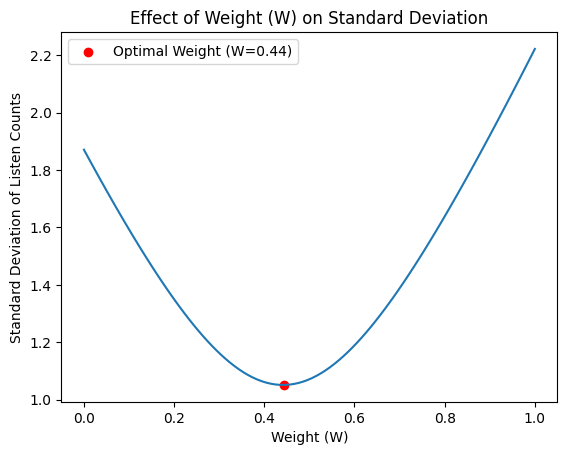

The W is: 0.4444444444444445


In [946]:
# Find optimal weight
weight = find_weight(trainset_df)
print("The W is:", weight)

# Find thresholds for every user
thresholds = find_thresholds(trainset_df, weight)

#find max listen_count for every user
max_listen_counts = max_listen_count_per_user(trainset_df)

# Add ratings to DataFrame
trainset_df = add_ratings(trainset_df, thresholds, max_listen_counts)
testset_df = add_ratings(testset_df, thresholds, max_listen_counts)
df_final = add_ratings(df_final, thresholds, max_listen_counts)

In [947]:
trainset_df

user_id  song_id  listen_count                           title  \
0            17     1089             1                     Sour Cherry   
1            17     4818             2                  Shadow Journal   
2            17     4840             1  Cape Cod Kwassa Kwassa (Album)   
3            17     1438             1      You Mustn't Kick It Around   
4            17     3108             1                            Baby   
...         ...      ...           ...                             ...   
201266    76046     4389             1                 I Kissed A Girl   
201267    76046     1151             1                          Closer   
201268    76046     2599             1          When You Feel The Mess   
201269    76046     6022             3                          Colors   
201270    76046     7434             1               Your Hand In Mine   

                                   release                  artist_name  year  \
0                            Midnight Boom                    The Kills  2008   
1                        Valse Avec Bachir  Max Richter - Tilda Swinton  2004   
2                          Vampire Weekend              Vampire Weekend  2007   
3                             Distillation                 Erin McKeown  2000   
4         Ray Guns Are Not Just The Future         the bird and the bee  2009   
...                                    ...                          ...   ...   
201266  One Of The Boys (iTunes Exclusive)                   Katy Perry  2008   
201267                   Only By The Night                Kings Of Leon  2008   
201268             Gold (Extended Edition)                 Starflyer 59  1995   
201269                            Amos Lee                     Amos Lee  2005   
201270  The Earth Is Not A Cold Dead Place        Explosions In The Sky  2003   

        rating  
0          2.0  
1          4.0  
2          2.0  
3          2.0  
4          2.0  
...        ...  
201266     2.0  
201267     2.0  
201268     2.0  
201269     4.0  
201270     2.0  

[201271 rows x 8 columns]

In [948]:
testset_df

user_id  song_id  listen_count                          title  \
0           17     4778             1                       The Rose   
1           17     1200             1                  Fast As I Can   
2           17     4812             1                  Again & Again   
3           17     2233             1           All The Pretty Faces   
4           17     3495             1                     Mathletics   
...        ...      ...           ...                            ...   
52315    76046      605             1                       Stronger   
52316    76046     8183             5                    Greece 2000   
52317    76046     3916             1  The Only Moment We Were Alone   
52318    76046     8101             5                  She Loves You   
52319    76046     6164             1                      Jambalaya   

                                  release            artist_name  year  rating  
0                          The Best Bette           Bette Midler  1979     2.0  
1                     Monday Morning Cold           Erin McKeown  2000     2.0  
2                    the bird and the bee   the bird and the bee  2006     2.0  
3                    When You  Were Young            The Killers  2006     2.0  
4                              Mathletics                  Foals  2007     2.0  
...                                   ...                    ...   ...     ...  
52315                          Graduation             Kanye West  2007     2.0  
52316                         Greece 2000           Three Drives  1997     5.0  
52317  The Earth Is Not A Cold Dead Place  Explosions In The Sky  2003     2.0  
52318                          EMI Comedy          Peter Sellers  2001     5.0  
52319             Best of the Bayou Blues             Tab Benoit  2006     2.0  

[52320 rows x 8 columns]

In [949]:
df_final

user_id  song_id  listen_count  \
199         6932      260             1   
200         6932      365             1   
202         6932      420             1   
203         6932      452             1   
204         6932      576             1   
...          ...      ...           ...   
1999757    47603     7899             1   
1999758    47603     7945             1   
1999765    47603     8111             1   
1999766    47603     8121             5   
1999768    47603     8193             3   

                                                  title  \
199      Hot N Cold (Manhattan Clique Remix Radio Edit)   
200                                  Daisy And Prudence   
202                     The Ballad of Michael Valentine   
203                           I Stand Corrected (Album)   
204                               They Might Follow You   
...                                                 ...   
1999757                                 End Of The Line   
1999758                                      Neon Tiger   
1999765                            He Can Only Hold Her   
1999766                              Drunk Kid Catholic   
1999768                            Let's Live For Today   

                                release         artist_name  year  rating  
199                          Hot N Cold          Katy Perry  2008     3.0  
200                        Distillation        Erin McKeown  2000     3.0  
202                             Sawdust         The Killers  2004     3.0  
203                     Vampire Weekend     Vampire Weekend  2007     3.0  
204                         Tiny Vipers         Tiny Vipers  2007     3.0  
...                                 ...                 ...   ...     ...  
1999757       Traveling Wilburys Vol. 1  Traveling Wilburys  1988     2.0  
1999758                       Day & Age         The Killers  2008     2.0  
1999765                   Back To Black       Amy Winehouse  2006     2.0  
1999766  Noise Floor [Rarities 98 - 05]         Bright Eyes  2000     4.0  
1999768      150 Rock 'N' Roll Classics     The Grass Roots  1987     3.0  

[253591 rows x 8 columns]

In [950]:
df_final['rating'].max()

5.0

**Checks:**

In [951]:
def ensure_rating_column(df):
  if 'rating' in df.columns and df['rating'].notnull().all() and set(df['rating'].unique()) == {1, 2, 3, 4, 5}:
    return True
  else:
    return False

In [952]:
ensure_rating_column(df_final)

True

In [953]:
ensure_rating_column(trainset_df)

True

In [954]:
ensure_rating_column(testset_df)

True

## Data for models

TODO - NEED TO FIX RATING!!!!

*   **Reader** - class in the Surprise package is used to parse raw data files or dataframes into a format suitable for collaborative filtering algorithms, specifying the expected rating scale of the data.
*    **data** - we will convert our dataset into a Dataset object from the Surprise library, and use the Reader object to be able to parse the DataFrame. The oder should be: user ID, item ID, and rating (This is also the  relevant dataset).

In [955]:
# Instantiating Reader scale with expected rating scale
reader = Reader(rating_scale = (1,5))

# Loading the relevant trainset and making it a Surprise object
train_df_loaded = Dataset.load_from_df(trainset_df [["user_id", "song_id", "rating"]], reader)
trainset = train_df_loaded.build_full_trainset()

In [956]:
trainset

In [957]:
# Create the DataFrame with specified columns
testset_df_relevant = testset_df[['user_id', 'song_id', 'rating']]

# Convert the DataFrame to a list of tuples with specified columns
testset = [(row['user_id'], row['song_id'], row['rating']) for index, row in testset_df.iterrows()]

In [958]:
testset

[(17, 4778, 2.0),
 (17, 1200, 2.0),
 (17, 4812, 2.0),
 (17, 2233, 2.0),
 (17, 3495, 2.0),
 (17, 6972, 2.0),
 (17, 5982, 2.0),
 (17, 4085, 2.0),
 (17, 6218, 2.0),
 (17, 2067, 2.0),
 (17, 7673, 2.0),
 (42, 4058, 1.0),
 (42, 3602, 5.0),
 (42, 3545, 1.0),
 (42, 5390, 1.0),
 (42, 770, 3.0),
 (42, 2642, 3.0),
 (42, 7648, 1.0),
 (42, 5872, 3.0),
 (57, 6365, 2.0),
 (57, 5880, 2.0),
 (57, 7239, 3.0),
 (57, 1661, 2.0),
 (57, 3227, 2.0),
 (57, 4557, 2.0),
 (57, 2539, 2.0),
 (57, 4759, 2.0),
 (57, 235, 3.0),
 (57, 4108, 3.0),
 (57, 1888, 2.0),
 (84, 2898, 3.0),
 (84, 12, 2.0),
 (84, 5946, 5.0),
 (84, 318, 2.0),
 (84, 6490, 3.0),
 (84, 2341, 3.0),
 (84, 1395, 2.0),
 (84, 4042, 2.0),
 (84, 5853, 2.0),
 (84, 1732, 3.0),
 (84, 3922, 3.0),
 (84, 1192, 2.0),
 (84, 7012, 2.0),
 (84, 427, 2.0),
 (92, 4867, 2.0),
 (92, 2004, 3.0),
 (92, 1466, 3.0),
 (92, 5373, 1.0),
 (92, 486, 3.0),
 (92, 7412, 2.0),
 (92, 3575, 1.0),
 (92, 5996, 3.0),
 (92, 6218, 1.0),
 (154, 3843, 3.0),
 (154, 7740, 3.0),
 (154, 5327, 2.

# Useful functions

When working with large datasets, it's essential to manage memory efficiently to prevent overwhelming RAM usage. Thus, in order to mitigate it we will periodically delete unnecessary global variables throughout the notebook.

In [959]:
def print_top_storage_vars(scope='global', top_n=10):
    if scope == 'local':
        variables = sys._getframe(1).f_locals.items()
    elif scope == 'global':
        variables = sys._getframe(1).f_globals.items()
    else:
        raise ValueError("Scope must be 'local' or 'global'.")

    variable_sizes = [(name, sys.getsizeof(var)) for name, var in variables]
    sorted_vars = sorted(variable_sizes, key=lambda x: x[1], reverse=True)

    top_storage_vars = sorted_vars[:top_n]
    table_data = []
    total_size_bytes = 0
    for var_name, size_bytes in top_storage_vars:
        size_gb = size_bytes / (1024 ** 3)  # Convert bytes to gigabytes
        table_data.append([var_name, size_gb])
        total_size_bytes += size_bytes

    table = tabulate(table_data, headers=['Variable Name', 'Size (GB)'], tablefmt='grid')
    print(table)

    # Print total size
    total_size_gb = total_size_bytes / (1024 ** 3)  # Convert total bytes to gigabytes
    print(f"\nTotal Size of Top {top_n} Variables: {total_size_gb:.2f} GB")


In [960]:
# print_top_storage_vars(top_n=10)

TODO EXPLAIN

In [961]:
# def get_thresholds(trainset_df):

#   thresholds = {}

#   # Group by user_id and calculate the average listen_count
#   user_avg_listen_counts = trainset_df.groupby('user_id')['listen_count'].mean()

#   # Store the average listen_count for each user_id in the dictionary
#   for user_id, avg_listen_count in user_avg_listen_counts.items():
#     thresholds[user_id] = avg_listen_count

#   return thresholds

In [962]:
# thresholds = get_thresholds(trainset_df)

TODO - FIX FUNCTIONS & EXPLAIN

1. **precision_recall_at_k**: This is a common metrics that help evaluate the performance of recommender and ranking systems by RMSE, precision@k, recall@k, and F_1 score.
* k - represents the number of top recommended songs to consider when evaluating the precision and recall metrics. It determines how many of the top-ranked songs are assessed for their relevance to the user's preferences. (we will choose default of top 10).
* threshold - represents the minimum rating (user's listen count) that qualifies it as relevant. It helps distinguish between songs that meet the user's preferences and those that do not. (we will choose default of 1).
* RMSE - Root Mean Squared Error measures the average difference between predicted and actual ratings  (square root of the MSE).
  * $$ \mbox{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n \left(\hat{y}_i - y_i\right)^2} $$
* precision@k - Precision at k measures the proportion of relevant items among the top k recommendations.<br>
  * $\text{Precision@k} = \frac{ | \{ \text{# of recommended items @k that are relevant} \} | }{ | \{ \text{# of recommended items @k} \} | }$
* recall@k - Recall at k measures the proportion of relevant items captured within the top k recommendations. <br>
  * $\text{Recall@k} = \frac{ | \{ \text{# of recommended items @k that are relevant} \} | }{ | \{ \text{total # of relevant items} \} | }$
* F_1 score - The harmonic mean of precision and recall, providing a balanced measure of the system's performance. <br>
  * $\text{F1_score@k} = \frac{2 \times (\text{Precision@k} \times \text{Recall@k})}{\text{Precision@k} + \text{Recall@k}}$
* Output - The function provides a comprehensive evaluation of the system's effectiveness through these metrics.<br><br>
* "Relevant items" refer to items that are considered valuable or appropriate for a particular user. Here, it could be songs that the user has rated highly or listened to frequently.

In [963]:
# # The function to calulate the RMSE, precision@k, recall@k, and F_1 score
# def precision_recall_at_k(testset, model, thresholds, k = 10, threshold = 3):
#     """Return precision and recall at k metrics for each user"""

#     # First map the predictions to each user.
#     user_est_true = defaultdict(list)

#     # Making predictions on the test data
#     predictions=model.test(testset)

#     for uid, _, true_r, est, _ in predictions:
#         user_est_true[uid].append((est, true_r))

#     precisions = dict()
#     recalls = dict()

#     recall_false = 0

#     for uid, user_ratings in user_est_true.items():

#         threshold = thresholds[uid]

#         # Sort user ratings by estimated value
#         user_ratings.sort(key = lambda x : x[0], reverse = True)

#         # Number of relevant items
#         # This is the nuber of songs that the user loved according to the rating in the real test set
#         n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

#         # Number of recommended items in top k
#         # This is the nuber of songs that the user loved according to the rating that the model predicted
#         n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

#         # Number of relevant and recommended items in top k
#         # This is the intersection of the predictions and the real ratings
#         n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
#                               for (est, true_r) in user_ratings[ : k])

#         # Precision@K: Proportion of recommended items that are relevant
#         # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

#         precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

#         # Recall@K: Proportion of relevant items that are recommended
#         # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

#         # recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

#         if n_rel != 0:
#           recalls[uid] = n_rel_and_rec_k / n_rel
#         else:
#           recalls[uid] = 0
#           recall_false+=1

#     # Mean of all the predicted precisions are calculated
#     precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

#     # Mean of all the predicted recalls are calculated
#     # recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
#     recall = round((sum(rec for rec in recalls.values()) / (len(recalls) - recall_false)), 3)

#     # Calculate RMSE
#     rmse = accuracy.rmse(predictions, verbose=False)

#     # Calculate F1 score
#     f1_score = round((2 * precision * recall) / (precision + recall), 3)

#     # Return metrics as a dictionary
#     metrics = {
#         'RMSE': rmse,
#         'Precision': precision,
#         'Recall': recall,
#         'F_1 score': f1_score
#     }

#     return metrics

In [964]:
# The function to calulate the RMSE, precision@k, recall@k, and F_1 score
def precision_recall_at_k(testset, model, thresholds, k = 10, threshold = 3):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user.
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions=model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()

    recall_false = 0

    for uid, user_ratings in user_est_true.items():

        threshold = thresholds.get(uid)

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x : x[0], reverse = True)

        # Number of relevant items
        # This is the number of songs that the user loved according to the rating in the real test set
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        # This is the number of songs that the user loved according to the rating that the model predicted
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[ : k])

        # Number of relevant and recommended items in top k
        # This is the intersection of the predictions and the real ratings
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[ : k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. We here set Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. We here set Recall to 0 when n_rel is 0

        # recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

        if n_rel != 0:
          recalls[uid] = n_rel_and_rec_k / n_rel
        else:
          recalls[uid] = 0
          recall_false+=1

    # Mean of all the predicted precisions are calculated
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated
    # recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    recall = round((sum(rec for rec in recalls.values()) / (len(recalls) - recall_false)), 3)

    # Calculate RMSE
    rmse = accuracy.rmse(predictions, verbose=False)

    # Calculate MAE
    mae = accuracy.mae(predictions, verbose=False)

    # Calculate F1 score
    f1_score = round((2 * precision * recall) / (precision + recall), 3)

    # Return metrics as a dictionary
    metrics = {
        'MAE': mae,
        'RMSE': rmse,
        f'Precision@{k}': precision,
        f'Recall@{k}': recall,
        'F_1 score': f1_score
    }

    return metrics

2. **rating_predict:**
* This function uses the model to predict the rating for a song, by user.
* r_ui stands for "rating user-item" and is used to evaluate the performance of recommendation algorithms by comparing predicted ratings to actual ratings (it will be the rating, if exists)
* This function returns a formatted display of the results of the prediction method.

In [965]:
def rating_predict(model, user_id, song_id, r_ui=None):
    #r_ui = model.predict(user_id, song_id, r_ui=r_ui).r_ui
    est = round(model.predict(user_id, song_id).est, 2)
    return print(clr.S+'The predictions for user {} and song {} is:\n\n- Real prediction: {},\n- Estimated prediction: {}.'
                 .format(user_id, song_id, r_ui, est)+clr.E)

3.  **get_songs_played_by_user**:
* This function returns all the songs played by or not played by a user.
* played is boolean indicating whether to return songs played by the user (True) or not played (False).
*  This function returns an array with all the song_ids of the songs user_id listened to or did not listen to.

In [966]:
# def get_songs_played_by_user(user_id, data, played=True):
#   played_songs = data[data['user_id'] == user_id]['song_id'].unique()
#   if played:
#     print(clr.S+"Songs played by user {}:".format(user_id)+clr.E)
#     return played_songs
#   else:
#     print(clr.S+"Songs not played by user {}:".format(user_id)+clr.E)
#     return data[~data['song_id'].isin(played_songs)]['song_id'].unique()

In [967]:
def get_songs_played_by_user(user_id, data, played=True):
  played_songs = data[data['user_id'] == user_id]['song_id'].unique()
  played_message = "Songs played by user {}:".format(user_id)
  not_played_message = "Songs not played by user {}:".format(user_id)

  if played:
      result = played_songs
      message = played_message
  else:
      result = data[~data['song_id'].isin(played_songs)]['song_id'].unique()
      message = not_played_message

  return message, result

4. **get_users_who_played_or_not_song**:
* This function returns all the users who played or did not play a song.
* played is boolean indicating whether to return users who played the song (True) or did not play (False).
*  This function returns an array with all the user_ids of the users who listened to or did not listen to the song.

In [968]:
# def get_users_who_played_or_not_song(song_id, data, played=True):
#   users_played = data[data['song_id'] == song_id]['user_id'].unique()
#   if played:
#       print(clr.S + "Users who played song {}:".format(song_id) + clr.E)
#       return users_played
#   else:
#       print(clr.S + "Users who did not play song {}:".format(song_id) + clr.E)
#       return data[~data['user_id'].isin(users_played)]['user_id'].unique()

In [969]:
def get_users_who_played_or_not_song(song_id, data, played=True):
  users_played = data[data['song_id'] == song_id]['user_id'].unique()
  played_message = "Users who played song {}:".format(song_id)
  not_played_message = "Users who did not play song {}:".format(song_id)

  if played:
      result = users_played
      message = played_message
  else:
      result = data[~data['user_id'].isin(users_played)]['user_id'].unique()
      message = not_played_message

  return message, result

5. **get_recommendations**:
* This function generates recommendations for a given user based on their interactions with songs and returns a list of the top_n items recommended to the user (the default is top 10).
* This function generates recommendations for a given user by first identifying the songs the user has not listened to yet, then predicting the rating for those songs using a provided model, and finally returning the top n recommendations based on the predicted rating.

In [970]:
# def get_recommendations(data, user_id, model, n=10):
#     # Creating an empty list to store the recommended song IDs.
#     recommendations = []

#     # Creating an user-item interactions matrix.
#     user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='listen_count')

#     # Extracting those song IDs that the user_id has not listened to yet.
#     non_listened_songs = get_songs_played_by_user(user_id, data, False)
#     print(clr.S+"(and according to the model, he should listen to them)"+clr.E)

#     # Looping through each of the song IDs that user_id has not listened to yet.
#     for item_id in non_listened_songs:

#         # Predicting the listen_count for those songs not listened to by this user.
#         est = round(model.predict(user_id, item_id).est, 2)

#         # Appending the predicted listen_count.
#         recommendations.append((item_id, est))

#     # Sorting the predicted listen_count in descending order.
#     recommendations.sort(key = lambda x: x[1], reverse=True)

#     # TODO make sure that the recommended songs are based on a threshold or ....

#     # Returing top n highest predicted listen_count for this user.
#     return recommendations[:n]

In [971]:
def get_recommendations(data, user_id, model, n=10):
  # Creating an empty list to store the recommended song IDs.
  recommendations = []

  # Creating an user-item interactions matrix.
  user_item_interactions_matrix = data.pivot(index='user_id', columns='song_id', values='rating')

  # Extracting those song IDs that the user_id has not listened to yet.
  non_listened_songs = get_songs_played_by_user(user_id, data, False)
  message = "recommended songs for user: {}:".format(user_id)

  # Looping through each of the song IDs that user_id has not listened to yet.
  for item_id in non_listened_songs[1]:

      # Predicting the rating for those songs not listened to by this user.
      est = round(model.predict(user_id, item_id).est, 2)

      # Appending the predicted rating.
      recommendations.append((item_id, est))

  # Sorting the predicted rating in descending order.
  recommendations.sort(key=lambda x: x[1], reverse=True)

  # TODO make sure that the recommended songs are based on a threshold or ....

  # Returing top n highest predicted rating for this user.
  return message, recommendations[:n]

5. **display_best_params**:
* This function displays the best RMSE and values of the hyper-parameters, following a Grid-search

In [972]:
def display_best_params(model):
    print(clr.S+'RMSE of the best option: {}'.format(round(model.best_score['rmse'], 3))+clr.E)
    print(clr.S+'The hyperparameters of the best option: {}'.format(model.best_params['rmse'])+clr.E)

6. **get_recommendations_dict**:
* This function will take corrected_recommendations and user_id as input arguments and return a dictionary with the user id and his top final recommendation songs ids (and their predicted rating)

In [973]:
# def generate_recommendations_dict(corrected_recommendations, user_id):
#     # Initialize the recommendations dictionary
#     recommendations_dict = {'user_id': user_id}

#     # Iterate over each row in corrected_recommendations DataFrame
#     for index, row in corrected_recommendations.iterrows():
#         song_id = row['song_id']
#         corrected_listen_count = row['corrected_listen_count']
#         recommendations_dict[song_id] = corrected_listen_count

#     return recommendations_dict

In [974]:
def generate_recommendations_dict(recommendations, user_id):
  # Creating an empty dictionary to store recommendations
  recommendations_dict = {"user_id": user_id}

  # Iterate over each recommendation tuple
  for song_id, rating in recommendations:
      recommendations_dict[song_id] = rating

  return recommendations_dict

# Recommendation system models & algorithms workflow

* After exploring the data and pre-processing it , we will get to the the models of the recommendation system and explian their approaches. Each model is based on a different algorithm.

* During this part, we will learn and perform a few diffrent approaches, trying a few models and then will compare between them. <br>
The models we will use :    
1. Rank - Based (Popularity) Model  
2. Collaborative - Filtering
  - Similarity / Neighborhood - based
    - User - User
    - Item - Item
  - Matrix Factorization (SVD)
3. Cluster - Based
4. Content - Based


* Important comment : The Rank-Based model is differnet than the others, since it doesn't  take into account the user preferences and focuses on recommending the popular songs. So, this model is different also by the way we will work , there is no need for train-test splitting or parameter optimization. So the workflow for this model will be explained in its part, and will be different from the general workflow we will proccess for all the other models.

**The workflow for all the other models except for the Rank-Based popularity** <br>  will be as follows : <br> ( same for each model separately)
- First, we will provide an explaination about the model, how it works, what the model is based on when recommending a song to a user. and basically will explain the model in general.
- Second, we will use grid search cross-validation from the Surprise package in order to determine the optimal values for the hyperparameters.
- As a result, the model will be fine-tuned using the obtained parameters we will train the algorithm on the train set.
- After the model is fitted, we will evaluating the model on the test set using the precision_recall_at_k (will be explained in the following part).
- We will view the results for each model and draw some insights.
- We will give an example for a random user from the data that in both trainset and testset, and try to get the full recommendation for this user, according to each model. That will help us compare between them.

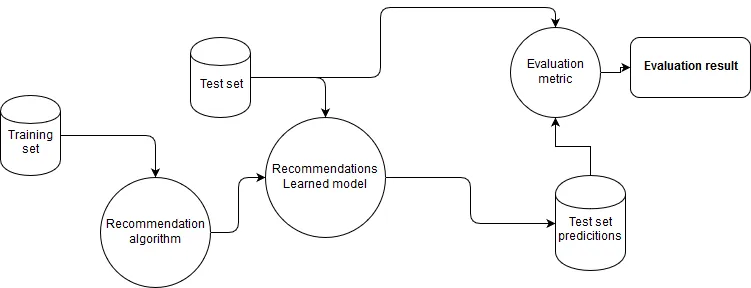

Creating a dictionary to save all the models

In [975]:
models_dict = {}

We want to compare the performance of different recommendation models by evaluating their recommendations. To do this, we will randomly select a user from the dataset and observe which songs each system recommends to them. We will then compare the results obtained for this specific user.

Note: The system ultimately recommends the top K songs for a specific user that they are likely to enjoy. These songs are ones that the user has not listened to before, whether they are in the training data or the test data. Therefore, it will be interesting to examine the results for a specific user, as we do not have explicit information about songs that are not necessarily in the test data.

Additionally, we will assign a score to each model recommendation, indicating whether the recommended song is found in the test data. This will provide further insight into the model's performance.

In [976]:
# Extract random user IDs from the test set
def get_random_user(testset):
  random.seed(42)
  user_ids_in_testset = set([entry[0] for entry in testset])
  random_user_id = random.choice(list(user_ids_in_testset))
  return random_user_id

In [977]:
testset

[(17, 4778, 2.0),
 (17, 1200, 2.0),
 (17, 4812, 2.0),
 (17, 2233, 2.0),
 (17, 3495, 2.0),
 (17, 6972, 2.0),
 (17, 5982, 2.0),
 (17, 4085, 2.0),
 (17, 6218, 2.0),
 (17, 2067, 2.0),
 (17, 7673, 2.0),
 (42, 4058, 1.0),
 (42, 3602, 5.0),
 (42, 3545, 1.0),
 (42, 5390, 1.0),
 (42, 770, 3.0),
 (42, 2642, 3.0),
 (42, 7648, 1.0),
 (42, 5872, 3.0),
 (57, 6365, 2.0),
 (57, 5880, 2.0),
 (57, 7239, 3.0),
 (57, 1661, 2.0),
 (57, 3227, 2.0),
 (57, 4557, 2.0),
 (57, 2539, 2.0),
 (57, 4759, 2.0),
 (57, 235, 3.0),
 (57, 4108, 3.0),
 (57, 1888, 2.0),
 (84, 2898, 3.0),
 (84, 12, 2.0),
 (84, 5946, 5.0),
 (84, 318, 2.0),
 (84, 6490, 3.0),
 (84, 2341, 3.0),
 (84, 1395, 2.0),
 (84, 4042, 2.0),
 (84, 5853, 2.0),
 (84, 1732, 3.0),
 (84, 3922, 3.0),
 (84, 1192, 2.0),
 (84, 7012, 2.0),
 (84, 427, 2.0),
 (92, 4867, 2.0),
 (92, 2004, 3.0),
 (92, 1466, 3.0),
 (92, 5373, 1.0),
 (92, 486, 3.0),
 (92, 7412, 2.0),
 (92, 3575, 1.0),
 (92, 5996, 3.0),
 (92, 6218, 1.0),
 (154, 3843, 3.0),
 (154, 7740, 3.0),
 (154, 5327, 2.

In [978]:
random_user_id = get_random_user(testset)
print(clr.S + "Randomly selected user ID:" + clr.E)
print(str(random_user_id))

Randomly selected user ID:
70739


In [979]:
# Check if the randomly selected user ID is in the trainset
random_user_id in set(trainset_df['user_id'])

True

In [980]:
# Displaying the corresponding songs, that user listened to.
songs_played_by_user = get_songs_played_by_user(random_user_id, df_final, True)
songs_played_by_user

('Songs played by user 70739:',
 array([ 150,  300,  439,  673,  735,  987, 1498, 1523, 1639, 1887, 2271,
        2295, 2349, 2413, 2488, 2506, 2577, 2758, 2763, 2818, 2985, 3043,
        3152, 3400, 3416, 3487, 3699, 3872, 4178, 4351, 4395, 4397, 4461,
        4538, 4735, 5033, 5084, 5215, 5327, 5374, 5453, 5503, 5654, 5759,
        5853, 5948, 6026, 6038, 6211, 6352, 6527, 6559, 6595, 6831, 6988,
        7093, 7704, 7768, 7805, 8050, 8129]))

In [981]:
# Displaying the corresponding songs, that user listened to.
played = False
songs_not_played_by_user = get_songs_played_by_user(random_user_id, df_final, False)
songs_not_played_by_user

('Songs not played by user 70739:',
 array([ 260,  365,  420, ...,  678, 4314, 1927]))

Get random songs from the songs user listen and have not listen:

In [982]:
# Get a random song ID from songs_not_played_by_user
not_listen_song_id = np.random.choice(songs_not_played_by_user[1])

# Get a random song from songs_played_by_user
listen_song_id = np.random.choice(songs_played_by_user[1])

print("Random song not played by the user:", not_listen_song_id)
print("Random song played by the user:", listen_song_id)

Random song not played by the user: 6305
Random song played by the user: 5503


Get users rating (rating) of the song he listen (listen_song_id):

In [983]:
desired_row = df_final[(df_final['user_id'] == random_user_id) & (df_final['song_id'] == listen_song_id)]
desired_row

user_id  song_id  listen_count       title                 release  \
1384200    70739     5503             3  Take A Bow  Ultimate R&B Love 2009   

        artist_name  year  rating  
1384200     Rihanna  2008     4.0

In [984]:
rating_user = desired_row['rating'].values[0]
rating_user

4.0

In [985]:
# the personalized threshold of random_user_id
print("the personalized threshold of random_user_id is: ")
thresholds.get(random_user_id)

the personalized threshold of random_user_id is: 


1.3425487980057336

We will test the performance of the models on the random user we sampled from our test data:

* **random_user_id**

* **not_listen_song_id** - It's a song the user hasn't listen, let's see what rating the model predicts for it

* **listen_song_id** - It's a song that the user listen (with rating rating_user), we'll see what rating the model predicts for him and how wrong he was in relation to the given rating

# Rank-based (Popularity)

* In this model, songs that are frequently listened to or have high listen counts are ranked higher and recommended to users.

* This model does not take into account the individual preferences or tastes of users. Instead, it focuses on recommending songs that are popular among a large group of users.

* Here there is no need for train-test splitting because rank-based recommendation systems typically do not involve complex model training or parameter optimization. Instead, they rely on simple ranking or popularity metrics to provide recommendations.

In [ ]:
# Calculating the average of rating :
avg_count = df_final.groupby('song_id')['rating'].mean()
# Calculating the frequency each song was rated
sum_count = df_final.groupby('song_id')['rating'].sum()

In [ ]:
# Creating dataframe with : avg_count and sum_count
rb_popular = pd.DataFrame({'avg_count': avg_count,'sum_count': sum_count})
# Descending order, by the average counts a song was rated.
rb_popular = rb_popular.sort_values(by='avg_count', ascending=False)
# Reset index to turn "song_id" into a column
rb_popular.reset_index(inplace=True)
# Let us see the first five records of the rb_popular dataset
rb_popular.head()

song_id  avg_count  sum_count
0     4335   3.526316      134.0
1      502   3.444323     3155.0
2     3154   3.437500       55.0
3     7385   3.437500      220.0
4     7574   3.434783      158.0

In [ ]:
# Calculate descriptive statistics for rb_popular excluding the 'song_id' row
rb_popular_description = rb_popular.drop('song_id', axis=1).describe()

# Show the descriptive statistics
rb_popular_description

avg_count    sum_count
count  2130.000000  2130.000000
mean      2.754777   329.121127
std       0.171058   376.850320
min       2.254777    35.000000
25%       2.645662   141.000000
50%       2.727123   220.000000
75%       2.829014   352.000000
max       3.526316  4018.000000

Let's define a function that findss the top n songs for a recommendation based on their average rating. <br> Additionally, we'll include a threshold for the minimum number of rating a song must have to be considered for recommendation.

In [ ]:
def top_n_songs(rb_popular, n, min_interaction=200):
    # Finding songs with a minimum number of interactions
    recommendations = rb_popular[rb_popular['sum_count'] >= min_interaction]

    # Sorting songs based on their average rating in descending order
    recommendations = recommendations.sort_values(by='avg_count', ascending=False)

    # Return the song IDs of the top n songs
    return recommendations['song_id'].head(n)

In [ ]:
# Get the song IDs of the top 10 songs
top_n_song_ids = top_n_songs(rb_popular, 10)

# Filter rb_popular to include only the top N songs
top_n_songs_df = rb_popular[rb_popular['song_id'].isin(top_n_song_ids)]

# Print the DataFrame with the required format
top_n_songs_df

song_id  avg_count  sum_count
1       502   3.444323     3155.0
3      7385   3.437500      220.0
5       315   3.415730      304.0
6      4617   3.405405      630.0
7       253   3.396841     3441.0
8      7398   3.378788      223.0
18     3940   3.325397      419.0
19     5418   3.325301      276.0
23     6527   3.310680      341.0
27     4494   3.271845      337.0

In [ ]:
# Find the indices of the top 10 songs
top_n_song_indices = top_n_songs(rb_popular, 10)
top_n_song_indices

1      502
3     7385
5      315
6     4617
7      253
8     7398
18    3940
19    5418
23    6527
27    4494
Name: song_id, dtype: int64

In [ ]:
def get_song_info(song_ids, df_final):
    # Define a list to store the selected rows
    selected_songs = []

    # Iterate over each song_id in the list of song_ids
    for song_id in song_ids:
        # Filter df_final to include only the rows corresponding to the current song_id
        song_data = df_final[df_final['song_id'] == song_id]

        # Extract the required columns and append to the list
        selected_songs.append(song_data[['song_id', 'title', 'release', 'artist_name', 'year']].iloc[0])

    # Create a DataFrame from the selected songs
    selected_songs_df = pd.DataFrame(selected_songs)

    return selected_songs_df

In [ ]:
selected_songs_df = get_song_info(top_n_song_indices, df_final)

In [ ]:
# Merge selected_songs_df and rb_popular by song_id
top_10_info = pd.merge(selected_songs_df, rb_popular, on='song_id', how='inner')

# show the merged DataFrame
top_10_info

song_id                                        title  \
0      502                               You're The One   
1     7385                      Verde Que Te Quero Rosa   
2      315                                    Oceanside   
3     4617                                 Transparency   
4      253                                         Undo   
5     7398                                   Itchy Feet   
6     3940              Heaven Must Be Missing An Angel   
7     5418  Welcome To The Black Parade (Album Version)   
8     6527                                  Not In Love   
9     4494                  Reason I'm Alive (Explicit)   

                             release                     artist_name  year  \
0                 If There Was A Way                   Dwight Yoakam  1990   
1            Verde Que Te Quero Rosa                         Cartola  1977   
2     Akron/Family & Angels Of Light  Angels Of Light & Akron/Family  2005   
3                    Workout Holiday                     White Denim  2008   
4                    Vespertine Live                           Björk  2001   
5                     From Here To G                     Leggo Beast  2000   
6  Capitol Gold: The Best Of Tavares                         Tavares  1979   
7                   The Black Parade             My Chemical Romance  2006   
8             Crystal Castles ( II )                 Crystal Castles  2010   
9                        Full Circle                   Drowning Pool  2007   

   avg_count  sum_count  
0   3.444323     3155.0  
1   3.437500      220.0  
2   3.415730      304.0  
3   3.405405      630.0  
4   3.396841     3441.0  
5   3.378788      223.0  
6   3.325397      419.0  
7   3.325301      276.0  
8   3.310680      341.0  
9   3.271845      337.0

TODO

Seems like there is a mix of different release years, and popularity levels among the songs. <br> For example, "Victoria (LP Version)" by Old 97's is from 2006 and has an average listen count of 3.37, indicating it is quite popular. <br> And "Heaven Must Be Missing An Angel" by Tavares is from 1979 with a lower average listen count of 2.21, showing that older songs can still be popular among listeners. <br> This suggests that music preferences are diverse and not solely based on release year or genre.

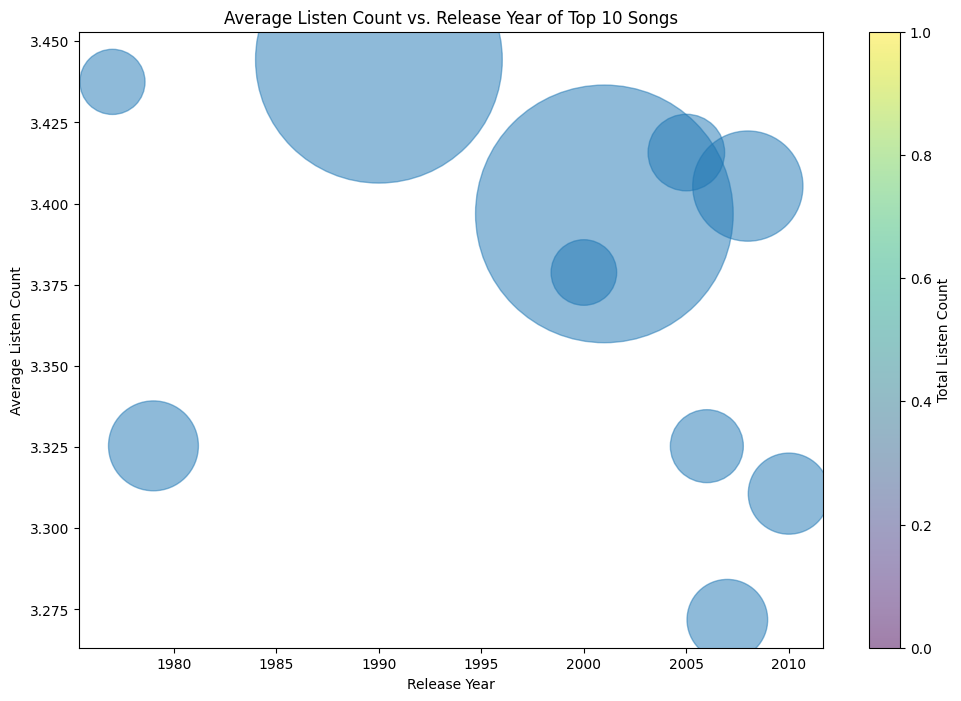

In [ ]:
# Plotting the TOP 10 SONGS

# X-axis (Release Year): Each point on the x-axis represents the release year of a song.

# Y-axis (Average Listen Count): The y-axis shows the average listen count for each song.

# Point Size: The size of each point is determined by the total listen count of the song.
# Larger points indicate songs that have been listened to more frequently.

# Color: The color of each point also represents the total listen count,
# with darker colors indicating songs with higher total listen counts.

plt.figure(figsize=(12, 8))
plt.scatter(top_10_info['year'], top_10_info['avg_count'], s=top_10_info['sum_count']*10, alpha=0.5, cmap='viridis')
plt.title('Average Listen Count vs. Release Year of Top 10 Songs')
plt.xlabel('Release Year')
plt.ylabel('Average Listen Count')
plt.colorbar(label='Total Listen Count')
plt.show()


# Collaborative-filtering

Here we will deal with **Collaborative Filtering** models.<br>
**Collaborative Filtering** is a family of algorithms with different ways to find similarities (between users or items) in order to recommend songs to users based on the preferences of other users.<br>
In this approach, the similarity is not calculated using factors like the age of users, genre of the song, or any other data about users or songs. It is calculated only on the basis of the number of times user listened to a song. For example, two users can be considered similar if they listend to the same songs despite there being a big difference in their age.

## Similarity/Neighborhood-based

Memory-based collaborative relies on the premise that users with similar past preferences will continue to exhibit similar preferences in the future, computing item ratings by considering the ratings of nearby users or items.<br><br>
**Advantages:**<br>
* Simplicity: Memory-based approaches are intuitive and easy to implement, making them suitable for handling moderately large datasets quickly
* Transparency: Recommendations from Memory-Based systems are straightforward to interpret as they rely on direct interactions between users and items.
* Serendipity: Memory-based filtering can offer unexpected recommendations, allowing users to discover potentially fascinating content through shared relationships with others.
<br>

**Disadvantages:**<br>
* Sparsity and Scalability: As datasets grow, finding reliable neighbors becomes challenging due to decreasing user-item interactions, potentially leading to scalability issues.
* Cold Start: Memory-Based systems face difficulties making reliable suggestions when there are insufficient interactions with new users or items.
* Limited Representation: Memory-based approaches may yield subpar results as they may not fully capture complex data patterns.

<br><br>
In collaborative filtering (CF) for music recommendation, the "user-user" and "item-item" approaches are two common strategies used to find similarities between users or items based on their interactions with the system. Those are the models we will use.
<br><br>
We'll use KNNBasic for music recommendation in the user-user and item-item because it's simple, transparent, and effective. KNN is a neighborhood-based collaborative filtering algorithm used for recommendation systems. It identifies similar users or items based on past preferences and generates recommendations by considering the ratings of nearby users or items. KNNBasic is particularly suitable for our system as it offers clear recommendations based on raw ratings, making it easy to interpret and implement.

**The KNNBasic hyperparameters:**
* k (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
* min_k (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
* sim_options (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise -
  - cosine
  - msd (default)
  - Pearson
  - Pearson baseline
* user_based - for user-user its True and for item-item its False.
* shrinkage - a parameter that adjusts the regularization applied to the similarity estimates, controlling the extent to which extreme similarity values are moderated towards a central tendency (only relevant for pearson_baseline similarity). Default is 100.

**The KNNBasic formula:**

When `user_based` is true (user-user):

$$
\hat{r}_{ui} = \frac{
\sum\limits_{v \in N^k_i(u)} \text{sim}(u, v) \cdot r_{vi}}
{\sum\limits_{v \in N^k_i(u)} \text{sim}(u, v)}
$$

- $ u $ represents a user.
- $ v $ represents another user.
- $ i $ represents an item.

Explanation:

- The formula calculates the estimated rating $\hat{r}_{ui}$ for user $ u $ and item $ i $ based on the ratings given by similar users $ v $ to the same item $ i $.
- $ \text{sim}(i, j) $ represents the similarity between items $ i $ and $ j $, which is used to weight the ratings given by similar users to item $ i $.
- $ N^k_u(i) $ represents the $ k $ most similar items to item $ i $ for user $ u $.

When `user_based` is false (item-item):

$$
\hat{r}_{ui} = \frac{
\sum\limits_{j \in N^k_i(u)} \text{sim}(i, j) \cdot r_{uj}}
{\sum\limits_{j \in N^k_i(u)} \text{sim}(i, j)}
$$

- $ u $ represents an item.
- $ i $ represents a user.
- $ j $ represents another user.

Explanation:

- The formula calculates the estimated rating ($ \hat{r}_{ui} $) for item $ u $ and user $ i $ based on the ratings given by similar items $ v $ by the same user $ i $.
- $ \text{sim}(i, j) $ represents the similarity between users $ i $ and $ j $, which is used to weight the ratings given by user $ i $ to similar items $ u $.
- $ N^k_u(i) $ represents the $ k $ most similar users to user $ i $ for item $ u $.

### User-User Similarity-Based CF Model

User-Based Collaborative Filtering is a technique used to predict the items that a user might like on the basis of ratings given to that item by other users who have similar taste with that of the target user.

**The idea is:**<br>
Let $u$ be the user for which we plan to make recommendations.

1. Find other users whose past rating behavior is similar to that of $u$
2. Use their ratings on other items to predict what the current user will like

- The output is the prediction of user $u$ rating on item i.
- We utilize the similarity measure between user u and user v in this case.

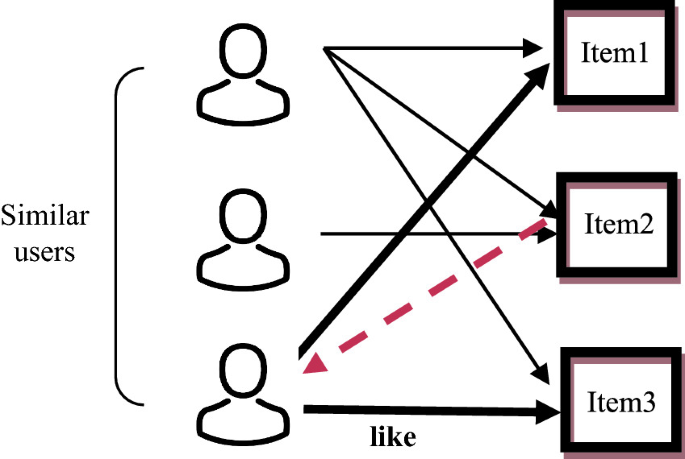

Lets start with a baseline user-user-similarity model:

TODO due to RAM, run only once

In [ ]:
# # Build the default user-user-similarity model
# sim_options = {'name': 'cosine',
#                'user_based': True}

# # KNN algorithm is used to find desired similar items
#  # Use random_state = 1
# sim_user_user = KNNBasic(sim_options=sim_options, Verbose=False, random_state=1)
# # Train the algorithm on the trainset, and predict play_count for the testset
# sim_user_user.fit(trainset)

# precision_recall_at_k(testset, sim_user_user, thresholds)

Now we wil use **grid search** to tune the user-user model for optimal performance:

- We will use grid search cross-validation from the Surprise package in order to determine the optimal values for the hyperparameters.
- As a result, the model will be fine-tuned using the obtained parameters to enhance its performance.

In [ ]:
# param_grid = {'k': [10, 20, 30, 40, 50, 60], 'min_k': [9, 12, 15, 18, 21],
#               'sim_options': {'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
#                               'user_based': [True],
#                                'shrinkage': [0, 10, 20, 50, 100, 200]}
#               }

# # Performing 3-fold cross-validation to tune the hyperparameters
# #gs_user_user = RandomizedSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)
# gs_user_user = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# # Fitting the data
# gs_user_user.fit(train_df_loaded)
# # Display the best parameters
# display_best_params(gs_user_user)

In [ ]:
# # grid for testing
# param_grid = {'k': [40], 'min_k': [15],
#               'sim_options': {'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
#                               'user_based': [True],
#                                'shrinkage': [0, 10, 20]}
#               }

# # Performing 3-fold cross-validation to tune the hyperparameters
# #gs_user_user = RandomizedSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)
# gs_user_user = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# # Fitting the data
# gs_user_user.fit(train_df_loaded)
# # Display the best parameters
# display_best_params(gs_user_user)

- The `GridSearch Cross Validation` algorithm has outputed the following **optimal values** for the hyperparameters:
  - `k`: **40**,
  - `min_k`: **15**, and
  - `sim_options`: **{'name': 'pearson_baseline', 'user_based': True}**.


TODO - תלוי במה שקיבלנו בגריד סרצ


The best  the similarity measure (sim) we got is **pearson_baseline:**

The Pearson-Baseline Correlation Coefficient adjusts the standard Pearson correlation coefficient by using baseline ratings instead of mean ratings for each user. Baseline ratings represent how a user's rating behavior deviates from the average rating behavior of all users. This adjustment helps normalize data between users who rate consistently high or low, regardless of their actual enjoyment of items. It's particularly useful in collaborative filtering systems for recommending items to users based on their similarity in rating behavior. Higher similarity values indicate that users have similar preferences or behavior in terms of item ratings.

$$
{pearson\_baseline\_sim}(u, v) = \hat{\rho}_{uv} = \frac{
    \sum\limits_{i \in I_{uv}} (r_{ui} -  b_{ui}) \cdot (r_{vi} -
    b_{vi})} {\sqrt{\sum\limits_{i \in I_{uv}} (r_{ui} -  b_{ui})^2}
    \cdot \sqrt{\sum\limits_{i \in I_{uv}} (r_{vi} -  b_{vi})^2}}
$$

Where:
- ${pearson\_baseline\_sim}(u, v)$ is the Pearson-Baseline similarity between users $u$ and $v$.
- $r_{ui}$ and $r_{vi}$ denote the ratings of users $u$ and $v$ respectively for item $i$.
- $b_{ui}$ and $b_{vi}$ denote the baseline ratings of users $u$ and $v$ respectively.
- $\hat{\rho}_{uv}$ represents the Pearson correlation coefficient estimate.
- $I_{uv}$ represents the set of items rated by both users $u$ and $v$.

Train according to grid search:

In [ ]:
# Train the best model found in the above grid search
# Using the optimal similarity measure for user-user based collaborative filtering.
sim_options = {'name': 'pearson_baseline',
               'k': 10,
               'min_k': 15,
               'user_based': [True]}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_user_user_optimized = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# Training the algorithm on the train set
sim_user_user_optimized.fit(trainset)

models_dict["KnnBasic-User-User"] = sim_user_user_optimized

Evaluation scores:

In [ ]:
# Evaluate the model on the test set
evaluation_user_user = precision_recall_at_k(testset, sim_user_user_optimized, thresholds)
evaluation_user_user

{'MAE': 0.5752644062349389,
 'RMSE': 0.7805737501824392,
 'Precision@10': 0.922,
 'Recall@10': 0.794,
 'F_1 score': 0.853}

Similarity matrix:
(As a results of the Similarity -based model)

* The similarity matrix in `KNNBasic` represents the pairwise similarities between users or items in a recommendation system. It's a symmetric matrix where each element represents the similarity between two users or items. These similarities are calculated based on the ratings given by users to items.  
* compute_similarities() - Build the similarity matrix.
The way the similarity matrix is computed depends on the sim_options parameter passed at the creation of the algorith. Returns: The similarity matrix.

In [ ]:
similarity_matrix_users = sim_user_user_optimized.compute_similarities()

In [ ]:
def plot_similarity_matrix(similarity_matrix_users, basedx, basedy):
    # Create a heatmap of the similarity matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(similarity_matrix_users, cmap='viridis')
    plt.title('Similarity Matrix Heatmap')
    plt.xlabel(basedx)
    plt.ylabel(basedy)
    plt.show()
    plt.close()
    del similarity_matrix_users  # Remove reference to the plot object

Due to RAM probelms, we will not run this plot:

In [ ]:
# Plot the similarity matrix using the function - all the users
# plot_similarity_matrix(similarity_matrix_users, 'Users', 'Users')

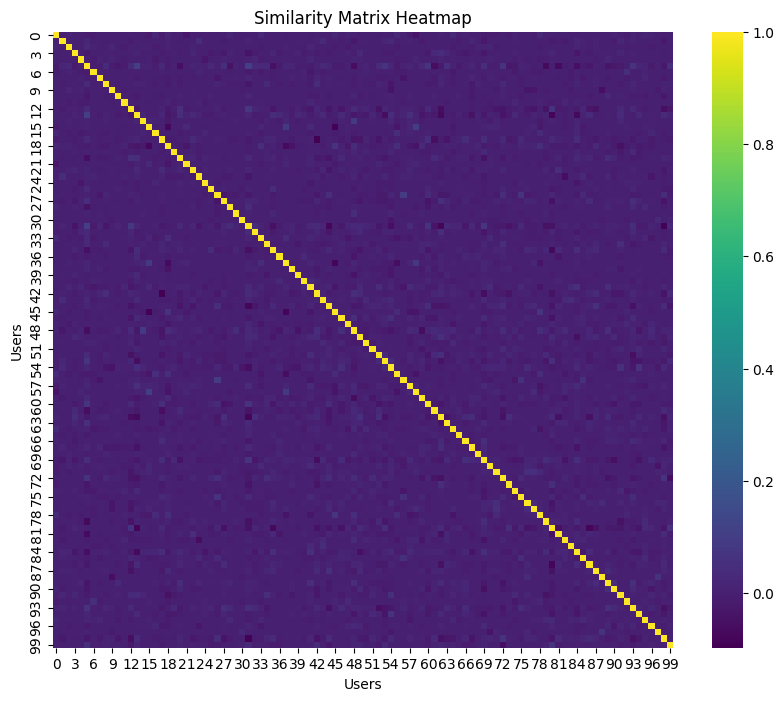

In [ ]:
# Plot the similarity matrix using the function - only first 100 users
plot_similarity_matrix(similarity_matrix_users[:100, :100], 'Users', 'Users')

TODO לשנות אחרי הרייטינג

According to the similarity_matrix , there is a low similirity score between the users based on the plot.<br>
It looks like there are not a lot of users that are similiar to each other based on this model.
We can think of 2 logical explanations:
1. Our data really does not contain users who are similar to each other.
2. Our model is relatively weak and manages to capture few connections between the users.

**Find similarities:**

This function calculates and returns the top similarities between pairs of users based on a given similarity matrix.  The similarities are sorted in descending order, with each similarity represented as a tuple containing the IDs of the two users and their similarity score. For each pair, it retrieves the raw user IDs (or raw items IDs) corresponding to the indices i and j in the trainset.

In [ ]:
def find_similarities(similarity_matrix, trainset):
    n_users = similarity_matrix.shape[0]
    top_similarities = []

    for i in range(n_users):
        for j in range(i+1, n_users):
            if i != j:
                user_id_i = trainset.to_raw_uid(i)
                user_id_j = trainset.to_raw_uid(j)
                top_similarities.append((user_id_i, user_id_j, similarity_matrix[i, j]))

    top_similarities.sort(key=lambda x: x[2], reverse=True)
    return top_similarities

In [ ]:
def get_top_k_similarities(similarity_matrix, trainset, k=5):
  return find_similarities(similarity_matrix, trainset)[:k]

**Due to RAM issiues we will find the similar / dissimilar users only from the fisrt 100 users**

Finding the pairs with the highest similarity :

In [ ]:
most_similar_users = get_top_k_similarities(similarity_matrix_users[:100, :100], trainset)
most_similar_users

[(154, 620, 0.10399425544389385),
 (154, 329, 0.10249899733139746),
 (332, 1183, 0.09786491216578426),
 (588, 1177, 0.09564144714126767),
 (330, 1037, 0.09009626427799697)]

Finding the paris with least similarity :

In [ ]:
def get_least_k_similarities(similarity_matrix, trainset, k=5):
  return find_similarities(similarity_matrix, trainset)[-k:]

In [ ]:
least_similar_users = get_least_k_similarities(similarity_matrix_users[:100, :100], trainset)
least_similar_users

[(792, 964, -0.08231387031121583),
 (329, 1606, -0.0874833549188737),
 (332, 964, -0.08937402184119879),
 (620, 1901, -0.09130847137426067),
 (419, 901, -0.0970797000524285)]

TODO לשנות אחרי התיקון של הרייטינג

The output shows pairs of users along with their similarity scores as calculated by the user-user similarity model.

A higher similarity score suggests that the users have more similar listening habits or preferences, while a lower score indicates less similarity.

The similarity scores reflect how well the user-user similarity model can identify similar users based on their interactions with songs. Higher scores suggest that the model is effectively capturing patterns in user behavior and can make accurate recommendations based on those patterns.

In [ ]:
most_similar_0 = most_similar_users[0][0]
most_similar_1 = most_similar_users[0][1]


least_similar_0 = least_similar_users[0][0]
least_similar_1 = least_similar_users[0][1]

Here we will try to compare the songs recommended to users with the highest similarity. We will try to see if there is a match between the songs recommended by user X and the songs used by Y (who is similar to him). We will try to understand if the user-user model recommended to user X songs that he did not hear but user Y did.

In [ ]:
def show_recommendations(user_tuple, data, model):
  user_id_0 = user_tuple[0]
  user_id_1 = user_tuple[1]

  # Get the similarity score for the user pair
  similarity_score = user_tuple[2]

  # Get recommendations for the two users
  recommendations_0 = [item_id for item_id, _ in get_recommendations(data, user_id_0, model, 30)[1]]
  recommendations_1 = [item_id for item_id, _ in get_recommendations(data, user_id_1, model, 30)[1]]

  return recommendations_0, recommendations_1

In [ ]:
recommendations_0, recommendations_1 = show_recommendations(most_similar_users[0], data=df_final, model=sim_user_user_optimized)

In [ ]:
print(f"User {most_similar_0} Recommendations:")
print(recommendations_0)

User 154 Recommendations:
[7987, 7477, 7379, 4351, 3578, 7385, 7960, 5145, 4137, 3923, 8141, 1741, 3175, 2725, 315, 4634, 253, 4239, 1545, 5059, 328, 6399, 5999, 2746, 311, 23, 4534, 4261, 4617, 6709]


In [ ]:
print(f"User {most_similar_1} Recommendations:")
print(recommendations_1)

User 620 Recommendations:
[5145, 3154, 3155, 4137, 4398, 3861, 315, 3258, 311, 6893, 5016, 2279, 2158, 6009, 4213, 4474, 4239, 1741, 7806, 440, 2686, 7885, 5213, 1044, 5418, 216, 7574, 6527, 1787, 7385]


In [ ]:
def compare_user_songs(user_id_1, user_id_2, df_final):
    user_1_songs = set(get_songs_played_by_user(user_id_1, df_final, played=True)[1])
    user_2_songs = set(get_songs_played_by_user(user_id_2, df_final, played=True)[1])

    user_1_not_user_2 = user_1_songs - user_2_songs
    user_2_not_user_1 = user_2_songs - user_1_songs

    return list(user_1_not_user_2), list(user_2_not_user_1)

In [ ]:
user_0_not_user_1, user_1_not_user_0 = compare_user_songs(most_similar_0, most_similar_1, df_final)
print("Songs that user", most_similar_0, "listened to but user", most_similar_1, "did not:", user_0_not_user_1)
print("Songs that user", most_similar_1, "listened to but user", most_similar_0, "did not:", user_1_not_user_0)

Songs that user 154 listened to but user 620 did not: [4864, 2055, 3720, 6281, 2823, 6796, 7181, 2701, 16, 6162, 914, 7828, 1046, 6039, 1688, 2329, 7067, 6302, 1822, 4897, 7074, 2341, 5542, 7079, 3880, 4781, 6317, 3502, 5550, 4528, 6577, 2741, 951, 1980, 3575, 1732, 1478, 7239, 4684, 972, 6605, 5327, 3152, 6095, 2898, 7629, 6487, 7256, 5849, 6616, 1498, 732, 486, 3690, 7787, 748, 8176, 113, 1650, 4980, 6519, 1661, 6142]
Songs that user 620 listened to but user 154 did not: [4610, 515, 1282, 388, 7946, 7438, 15, 3858, 4627, 7442, 537, 5790, 2334, 6559, 4389, 42, 2602, 4018, 3638, 7999, 7103, 7363, 7107, 5705, 5321, 3917, 80, 4305, 2514, 8183, 7127, 2648, 8024, 2398, 2911, 6494, 4965, 3182, 3059, 1271, 253]


In [ ]:
def common_songs(recommendations, user_not_user):
  # Convert lists to sets for efficient set intersection
  recommendations_set = set(recommendations)
  user_not_user_set = set(user_not_user)

  # Find common songs between recommendations and user_not_user
  common = recommendations_set.intersection(user_not_user_set)

  return list(common)

In [ ]:
common_songs_0 = common_songs(recommendations_0, user_1_not_user_0)

print("Songs common between recommendations_0 and user_1_not_user_0:", common_songs_0)

Songs common between recommendations_0 and user_1_not_user_0: [253]


In [ ]:
common_songs_1 = common_songs(recommendations_1, user_0_not_user_1)

print("Songs common between recommendations_1 and user_0_not_user_1:", common_songs_1)

Songs common between recommendations_1 and user_0_not_user_1: []


TODO להסביר אחרי הרייטינג

**Observations :**
Based on the example we provided above about the similiar users,
with the highest similrity score,
we expected to see overlapping between the recommended songs for both of the users,
<br>
However, as we showed above - The recommended songs for each of the users, are different from each other, exept for one song only.
That suggestes , that the model might not have a good performance,
that could be as a result of the data provided, with no so many similar users.
<br>

**Model Example for the random user:** <br>
Here we would like to see the performance of the model on `random_user_id`, `listen_song_id` and `not_listen_song_id`:

In [ ]:
# Predicting rating for the sample user with a not listened song.
rating_predict(sim_user_user_optimized, random_user_id, not_listen_song_id)

The predictions for user 70739 and song 6081 is:

- Real prediction: None,
- Estimated prediction: 2.93.


In [ ]:
# Predicting rating for a sample user with a listened song.
rating_predict(sim_user_user_optimized, random_user_id, listen_song_id, rating_user)

The predictions for user 70739 and song 3416 is:

- Real prediction: 2.0,
- Estimated prediction: 2.22.


The get_k_neighbors function takes a collaborative filtering model, a trainset, and a user ID, and finds the k nearest neighbors of that user in the model. It converts the user ID to the model's internal format, retrieves the nearest neighbors, and converts their IDs back to the original format before returning them.

In [ ]:
def get_k_neighbors(model, trainset, random_user_id, k=5):
  # Get the inner user ID from the trainset
  inner_user_id = trainset.to_inner_uid(random_user_id)

  # Get the k nearest neighbors of the user
  k_neighbors_inner = model.get_neighbors(inner_user_id, k=k)

  # Convert inner user IDs back to raw user IDs
  k_neighbors_raw = [trainset.to_raw_uid(inner_id) for inner_id in k_neighbors_inner]

  return k_neighbors_raw

In [ ]:
# Get the k neighbors of the random user
k_neighbors = get_k_neighbors(sim_user_user_optimized, trainset, random_user_id, k=5)

print("K Neighbors of User", random_user_id, ":", k_neighbors)

K Neighbors of User 70739 : [7238, 27116, 33151, 36906, 56005]


In [ ]:
for k_user in k_neighbors:
  print (get_recommendations(df_final, k_user, sim_user_user_optimized))

('recommended songs for user: 7238:', [(1996, 4.57), (546, 4.07), (52, 4.07), (1386, 4.01), (2158, 3.95), (6893, 3.9), (6399, 3.85), (503, 3.77), (7137, 3.73), (7676, 3.69)])
('recommended songs for user: 27116:', [(5999, 4.76), (6009, 4.39), (546, 4.11), (5016, 4.07), (2883, 4.04), (4940, 3.98), (2686, 3.98), (4137, 3.96), (1796, 3.95), (7477, 3.94)])
('recommended songs for user: 33151:', [(3154, 4.61), (5418, 4.04), (2578, 3.93), (7385, 3.92), (4137, 3.9), (3155, 3.87), (4553, 3.81), (4869, 3.8), (1679, 3.79), (744, 3.76)])
('recommended songs for user: 36906:', [(2312, 4.48), (5321, 4.26), (1741, 3.97), (4281, 3.91), (5627, 3.91), (4869, 3.89), (6893, 3.88), (4528, 3.83), (5712, 3.83), (5709, 3.83)])
('recommended songs for user: 56005:', [(1839, 4.15), (6009, 4.13), (7240, 4.13), (1951, 4.09), (6893, 4.06), (315, 4.02), (2293, 4.01), (1996, 3.92), (4137, 3.91), (2413, 3.84)])


Getting the recommended top 10 songs for the random_user_id based on their predicted ratings:

In [ ]:
recommendations = get_recommendations(df_final, random_user_id, sim_user_user_optimized)
recommendations

('recommended songs for user: 70739:',
 [(2697, 5),
  (6893, 5),
  (4770, 5),
  (4137, 5),
  (3094, 5),
  (3258, 4.82),
  (1469, 4.82),
  (3689, 4.61),
  (1665, 4.45),
  (2312, 4.41)])

In [ ]:
pd.DataFrame(recommendations[1], columns=['song_id', 'predicted_rating'])

song_id  predicted_rating
0     2697              5.00
1     6893              5.00
2     4770              5.00
3     4137              5.00
4     3094              5.00
5     3258              4.82
6     1469              4.82
7     3689              4.61
8     1665              4.45
9     2312              4.41

Final recommendations for random_user_id by user-user CF model:

In [ ]:
recommendations_user_user = generate_recommendations_dict(recommendations[1], random_user_id)
recommendations_user_user

{'user_id': 70739,
 2697: 5,
 6893: 5,
 4770: 5,
 4137: 5,
 3094: 5,
 3258: 4.82,
 1469: 4.82,
 3689: 4.61,
 1665: 4.45,
 2312: 4.41}

**TODO: to add conclusions**

### Item-item Similarity-Based CF Model

* Item-based collaborative filtering uses the rating of co-rated item to predict the rating on specific item. This means that instead of using user similarity, we use **item** similarity measure to calculate the prediction.

* To recommend music to a user, we first identify items (songs) that are similar to the items the user has interacted with based on the users' past interactions (Similarity between songs will be reflected by how much users liked them according to their rating).

* Then, we will recommend similar items (songs) to the ones the user has interacted with, leveraging the similarity between items rather than between users. This approach is effective when users' tastes are diverse and item similarities are meaningful.

**Advantages of item-based filtering over user-based filtering :**

1. **Scales Better:** User-based filtering does not scale well as user likes/interests may change frequently. Hence, the recommendation needs to be re-trained frequently.
2. **Computationally Cheaper:** In many cases, there are way more users than items. It makes sense to use item-based filtering in this case.

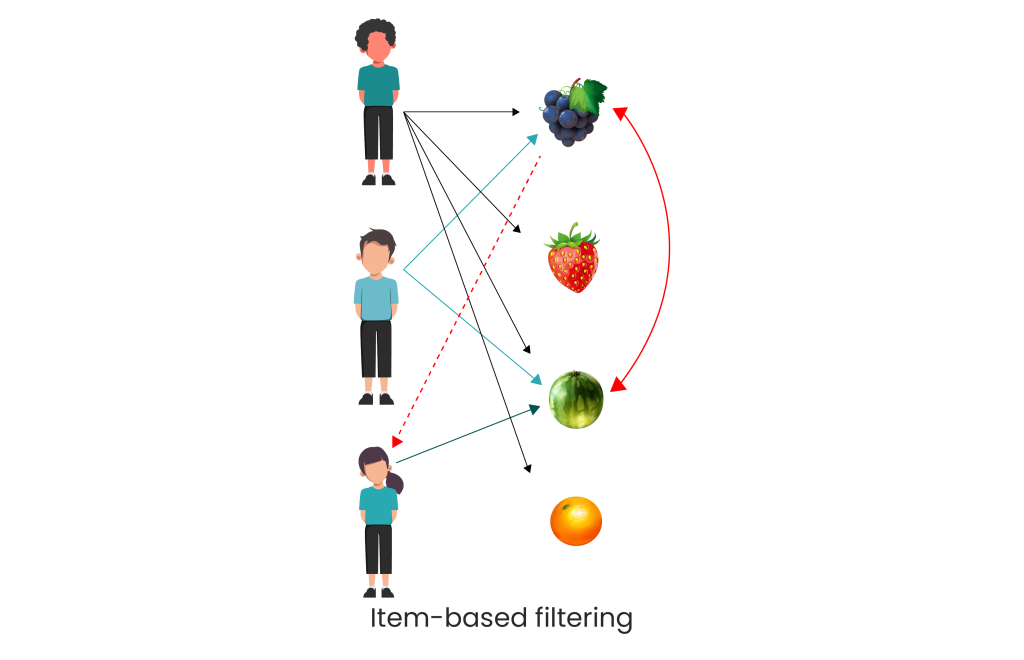

Lets start with a baseline item-item-similarity model:

In [ ]:
# # Apply the item-item similarity collaborative filtering model with random_state = 1 and evaluate the model performance
# sim_options = {'name': 'cosine',
#                'user_based': False}

# # KNN algorithm is used to find desired similar items
# sim_item_item = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)
# # Train the algorithm on the trainset, and predict play_count for the testset
# sim_item_item.fit(trainset)

# precision_recall_at_k(testset, sim_item_item, thresholds)

Also here, we will use grid search cross-validation from the Surprise package, and then use the parameters obtained and tune the model, in order to improve the model's performance.

In [ ]:
# param_grid = {'k': [10, 20, 30, 40, 50, 60],
#               'min_k': [9, 12, 15, 18, 21],
#               'sim_options': {'name': ['msd', 'cosine', 'pearson', 'pearson_baseline'],
#                               'user_based': [False],
#                               'shrinkage': [0, 10, 20, 50, 100, 200]}
#               }

# # Performing 3-fold cross-validation to tune the hyperparameters
# gs_item_item = GridSearchCV(KNNBasic, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# # Fitting the data
# gs_item_item.fit(train_df_loaded)
# # Display the best parameters
# display_best_params(gs_item_item)

- The `Randomized GridSearch Cross Validation` algorithm has outputed the following **optimal values** for the hyperparameters:
  - `k`: **30**,
  - `min_k`: **9**, and
  - `sim_options`: **{'name': 'pearson_baseline', 'user_based': False}**.

להוסיף הסבר על ה sim_options TODO

Train according to grid search:

In [ ]:
# Train the best model found in the above grid search
# Using the optimal similarity measure for item-item based collaborative filtering
sim_options = {'name': 'pearson_baseline',
               'k': 30,
               'min_k': 9,
               'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
sim_item_item_optimized = KNNBasic(sim_options=sim_options, random_state=1, verbose=False)

# Training the algorithm on the train set
sim_item_item_optimized.fit(trainset)

models_dict["KnnBasic-Item-Item"] = sim_item_item_optimized

Evaluation scores:

In [ ]:
# Evaluate the model on the test set
evaluation_item_item = precision_recall_at_k(testset, sim_item_item_optimized, thresholds)
evaluation_item_item

{'MAE': 0.5001130432743669,
 'RMSE': 0.7308742395433399,
 'Precision@10': 0.923,
 'Recall@10': 0.782,
 'F_1 score': 0.847}

Also here will we show the similarity matrix and we will use the functions from the user-user model:

In [ ]:
similarity_matrix_songs = sim_item_item_optimized.compute_similarities()

Due to RAM probelms, we will not run this plot:

In [ ]:
# Plot the similarity matrix using the function - all the songs
# plot_similarity_matrix(similarity_matrix_songs, 'Song', 'Song')

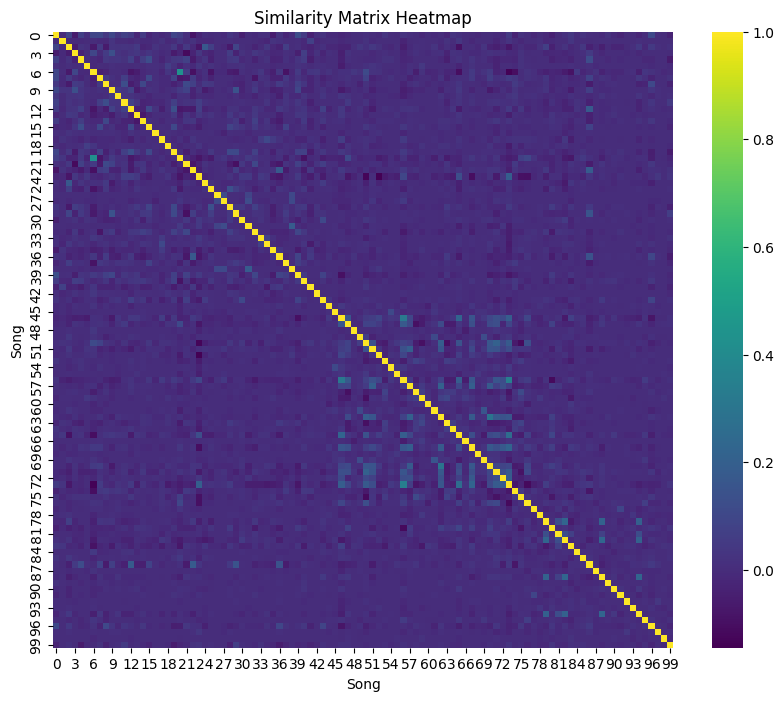

In [ ]:
# Plot the similarity matrix using the function - only the first 200 songs
plot_similarity_matrix(similarity_matrix_songs[:100, :100], 'Song', 'Song')

לכתוב הסבריםם :( TODO

There are no such interesting results here either, most of the songs are not that similar, but it looks a little better from user-user model

**Due to RAM issiues we will find the similar / dissimilar songs only from the fisrt 100 songs**

In [ ]:
most_similar_songs = get_top_k_similarities(similarity_matrix_songs[:100, :100], trainset)
most_similar_songs

[(156, 464, 0.4274210792778456),
 (1177, 1434, 0.34515423979455884),
 (984, 1177, 0.31482798722853367),
 (1228, 1384, 0.2944866602756073),
 (1246, 1434, 0.25661960351940966)]

In [ ]:
least_similar_songs = get_least_k_similarities(similarity_matrix_songs[:100, :100], trainset)
least_similar_songs

[(84, 467, -0.11620802241491628),
 (1103, 1478, -0.117315662633995),
 (576, 1103, -0.1277011435398975),
 (156, 1434, -0.13699060001888808),
 (576, 1132, -0.144756415133882)]

In [ ]:
most_similar_0 = most_similar_songs[0][0]
most_similar_1 = most_similar_songs[0][1]


least_similar_0 = most_similar_songs[0][0]
least_similar_1 = most_similar_songs[0][1]

Here we will try to understand if there is any match between similar (or dissimilar) songs and the users who listen to them. We will try to see if similar songs were heard by the same users and if dissimilar songs were heard by different users.

- get_users_listen_to_both: Finds users who have listened to songs from both specified users, based on their listening history in the provided dataset.

- get_users_not_listen_to_either: Identifies users who haven't listened to any songs from either specified users, utilizing their listening records within the given dataset.

In [ ]:
def get_users_listen_to_both(most_similar_0, most_similar_1, data):
    users_most_similar_0 = set(get_songs_played_by_user(most_similar_0, data)[1])
    users_most_similar_1 = set(get_songs_played_by_user(most_similar_1, data)[1])
    common_users = users_most_similar_0.intersection(users_most_similar_1)
    return list(common_users)

def get_users_not_listen_to_either(least_similar_0, least_similar_1, data):
    users_least_similar_0 = set(get_songs_played_by_user(least_similar_0, data)[1])
    users_least_similar_1 = set(get_songs_played_by_user(least_similar_1, data)[1])
    common_users = users_least_similar_0.intersection(users_least_similar_1)
    return list(common_users)

In [ ]:
common_users_most_similar = get_users_listen_to_both(most_similar_0, most_similar_1, df_final)
common_users_least_similar = get_users_not_listen_to_either(least_similar_0, least_similar_1, df_final)

print("Users who listened to both most similar songs:")
print(common_users_most_similar)

print("\nUsers who didn't listen to either least similar songs:")
print(common_users_least_similar)

Users who listened to both most similar songs:
[5310]

Users who didn't listen to either least similar songs:
[5310]


Our intuition was to try to understand if for similar songs (according to the model), there are identical users - something that might strengthen the understanding of how the model works. But due to problems with RAM (and then the collapse of the project) we only looked at the first 100 songs in the matrix.
It seems that there is really no match between similar songs and the users who listen to it, something that seems strange but could happen because of the reduction of the matrix, a model with relatively low performance or data that is not good enough

We will check who are the top 10 closest neighbors to the most played song of random_user_id:

This code finds the top-rated song for a user, identifies the most similar songs to it, and displays information about those similar songs. It's valuable in item-item models as it utilizes user preferences for a specific item to recommend similar items, thus offering personalized recommendations based on user behavior.

In [ ]:
# Get the inner ID for the random_user_id
inner_user_id = trainset.to_inner_uid(random_user_id)

# Get the ratings of all items (songs) for the specified user
user_ratings = trainset.ur[inner_user_id]

# Find the item with the highest rating
most_rated_song = max(user_ratings, key=lambda x: x[1])

# Get the inner ID of the most rated song
most_rated_song_inner_id = most_rated_song[0]

# Get the inner IDs of the 10 most similar items to the user's most rated song
similar_item_inner_ids = sim_item_item_optimized.get_neighbors(most_rated_song_inner_id, 10)

# Map the inner IDs to their corresponding song IDs
similar_song_ids = [trainset.to_raw_iid(inner_id) for inner_id in similar_item_inner_ids]

# Show information about the top 10 closest songs
get_song_info(similar_song_ids, df_final)

song_id                                            title  \
1293       6559                                           Savior   
41048      4395                                      Hero Of War   
129007     6211                              Long Forgotten Sons   
90497       673                            The Strength To Go On   
93628      7093                             The Good Left Undone   
1217       2155                                   Gives You Hell   
4480       5115                       New Divide (Album Version)   
950        3162  Ain't No Rest For The Wicked (Original Version)   
1182        321                                          Imma Be   
1252       4319                                 Bring Me To Life   

                                              release  \
1293                                 Appeal To Reason   
41048                                Appeal To Reason   
129007                               Appeal To Reason   
90497                                Appeal To Reason   
93628                      The Sufferer & The Witness   
1217                        When The World Comes Down   
4480    Transformers: Revenge Of The Fallen The Album   
950                                 Cage The Elephant   
1182               THE E.N.D. (THE ENERGY NEVER DIES)   
1252                                           Fallen   

                     artist_name  year  
1293                Rise Against  2008  
41048               Rise Against  2008  
129007              Rise Against  2008  
90497               Rise Against  2008  
93628               Rise Against  2006  
1217    The All-American Rejects  2008  
4480                 Linkin Park  2009  
950            Cage The Elephant  2008  
1182             Black Eyed Peas  2009  
1252                 Evanescence  2003

**Observations :**

TODO

Here we would like to see the performance of the model on `random_user_id`, `listen_song_id` and `not_listen_song_id`:

We will check that the random_user_id did not listen to not_listen_song_id:

In [ ]:
users_not_listen = get_users_who_played_or_not_song(not_listen_song_id, df_final, False)
users_not_listen

('Users who did not play song 6081:',
 array([ 6932, 26909, 56362, ..., 71549, 11176, 47603]))

In [ ]:
random_user_id in users_not_listen[1]

True

We will check that the random_user_id listen to listen_song_id:

In [ ]:
users_listen = get_users_who_played_or_not_song(listen_song_id, df_final, True)
users_listen

('Users who played song 3416:',
 array([40429, 45212, 22658, 74045, 23205, 76012, 15637, 18277, 71762,
        29422, 42882, 36050, 25321, 23066, 56533, 33151, 54658, 61068,
        73693, 70052, 33331, 73461, 63799, 59811, 62183,  4793, 63459,
        14674, 37797, 44618, 70707, 24345, 11412,  5952, 15085, 35239,
         9961, 70655, 65554, 49556, 30189, 65738, 69212, 43802, 57160,
        54898,  1031, 23777, 27995, 51932, 16435,  9420,  9230, 37728,
         4435, 50138, 59907, 71600, 10971, 65714, 37524, 27897, 59450,
        31144, 44584, 37398, 15581, 67793, 14358, 16808, 35025, 34341,
        62398, 40047, 31331, 59886,   675, 23697, 65467, 58696, 69625,
        53485, 68990, 43009, 72165,   792, 35653, 18785, 33017, 40647,
        14932, 63038, 32419, 54328, 27116, 62748, 49154, 27945,  3776,
        16186, 25513, 70899, 72339, 63427, 71201, 38505, 46530, 61280,
        28925, 46599, 59714, 59086, 74810, 42051, 66087, 19060, 11831,
        20441, 26912, 27788, 14365, 51349, 61

In [ ]:
random_user_id in users_listen[1]

True

The predictions for our user & songs examples:

In [ ]:
# Predicting play_count for a sample user with a not listened song.
rating_predict(sim_item_item_optimized, random_user_id, listen_song_id, rating_user)

The predictions for user 70739 and song 3416 is:

- Real prediction: 2.0,
- Estimated prediction: 2.09.


In [ ]:
# Predicting rating for the sample user with a listened song.
rating_predict(sim_item_item_optimized, random_user_id, not_listen_song_id)

The predictions for user 70739 and song 6081 is:

- Real prediction: None,
- Estimated prediction: 2.57.


In [ ]:
# Making top 10 recommendations for any user_id  with item_item_similarity-based recommendation engine
recommendations = get_recommendations(df_final, random_user_id, sim_item_item_optimized)
recommendations

('recommended songs for user: 70739:',
 [(503, 4.28),
  (4425, 4.24),
  (6564, 4.04),
  (5069, 4.0),
  (4129, 4.0),
  (222, 4.0),
  (1199, 4.0),
  (6361, 4.0),
  (5317, 4.0),
  (7025, 4.0)])

In [ ]:
pd.DataFrame(recommendations[1], columns=['song_id', 'predicted_rating'])

song_id  predicted_rating
0      503              4.28
1     4425              4.24
2     6564              4.04
3     5069              4.00
4     4129              4.00
5      222              4.00
6     1199              4.00
7     6361              4.00
8     5317              4.00
9     7025              4.00

Final recommendations for random_user_id by item-item CF model:

In [ ]:
recommendations_item_item = generate_recommendations_dict(recommendations[1], random_user_id)
recommendations_item_item

{'user_id': 70739,
 503: 4.28,
 4425: 4.24,
 6564: 4.04,
 5069: 4.0,
 4129: 4.0,
 222: 4.0,
 1199: 4.0,
 6361: 4.0,
 5317: 4.0,
 7025: 4.0}

TODO: to add conclusions

## Model-Based Collaborative Filtering - Matrix Factorization


**Matrix Factorization (MF)** is a Collaborative Filtering model-based recommendation system that uses similarities between users' song preferences to recommend new songs.
The idea is to represent users and items as low-dimensional latent factors, or embeddings, which capture characteristics such as genre preference. It decomposes the user-song interaction matrix using SVD. <br>

**SVD - Singular Value Decomposition**, a technique from linear algebra used for matrix factorization, that decomposes the user-item matrix into three matrices: <BR> U (users), S (singular values), also resprents as Σ (Sigma) , and V (items). These matrices capture latent features or characteristics of users and items.<br>

image.png

**Why do we use SVD ?** <BR>
Using SVD allows us to minimise the Root Mean Square Error (RMSE) to predict ratings for unseen items. This approach helps in making personalized recommendations by mapping users and items into a latent space with lower dimensions.
The decomposition allows the model to predict how much a user likes a song by taking the dot product of their respective latent factor vectors.
<br>

**Latent features** are underlying characteristics that are not directly observed but can be inferred from user-item interactions.
SVD maps each user and item into a latent space, where relationships between users and items are represented. This enables the system to make recommendations by finding similar users or items based on their latent representations or predicting how a user would rate an unseen item.
<br>


**The structure of the model :** <br>

- Start with a user-item interaction matrix A, where rows represent users, columns represent items (songs in our case), and the values in each cell represent the interactions, in our case, the rating a user has given to that song.

- Using SVD, decomposes the user-item matrix into three matrices:

   - U matrix: Represents the relationship between users and latent factors. (how much use like each feature)
   - Σ (Sigma) matrix: A diagonal matrix representing the strengths of the latent factors.
   - V^T (V transpose) matrix: Represents the relationship between items and latent factors. (how relevant each feature to each song)


- Keep only the top k singular values (S matrix) and their corresponding vectors,
This reduces the dimensionality of the matrices and captures the most important patterns in the data.

- Reconstruct the user-item matrix by multiplying the truncated matrices back together. The reconstructed matrix approximates the original user-item matrix and can be used to make recommendations.


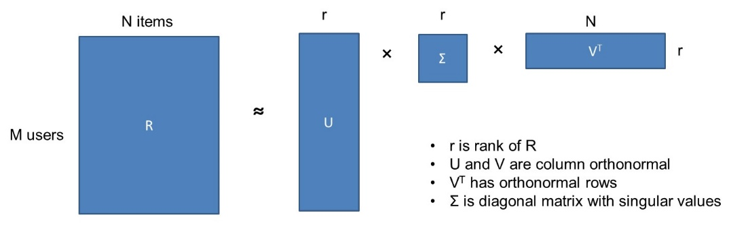


**MF Modeling** <br>
Using the SVD model : <br>
We will first perform a Grid Search in order to find the best parameters of the model. <br>
We will then use the parameters that have been found, and run the model with the best parameters.


Lets start with a baseline SVD model:

In [ ]:
# # Build baseline model using svd
# # Using SVD matrix factorization
# svd = SVD(random_state=1)

# # Training the algorithm on the train set
# svd.fit(trainset)

# # Compute and display the metrics
# precision_recall_at_k(testset, svd, thresholds)

In [ ]:
# Set the parameter space to tune
# param_grid = {'n_epochs': [10, 20, 30, 40, 50, 60],
#               'lr_all': [0.001, 0.005, 0.01],
#               'reg_all': [0.2, 0.4, 0.6, 0.8]}

# # Perform a 3-fold grid search cross-validation
# gs_svd = RandomizedSearchCV(SVD, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)

# # Fitting data
# gs_svd.fit(train_df_loaded)

# display_best_params(gs_svd)

- The `GridSearch Cross Validation` algorithm has outputed the following **optimal values** for the hyperparameters:
  - `n_epochs`: **30**,
  - `lr_all`: **0.01**,
  - `reg_all`: **0.2**.

  #TODO - check the prameters

In [ ]:
# Building the optimized SVD model using optimal hyperparameters found in the grid search

svd_optimized = SVD(n_epochs=30, lr_all=0.01, reg_all=0.2, random_state=1)

# Train the algorithm on the train set
svd_optimized = svd_optimized.fit(trainset)

models_dict["SVD-MF"] = svd_optimized

In [ ]:
# Evaluate the model on the test set
evaluation_mf_svd = precision_recall_at_k(testset, svd_optimized, thresholds)
evaluation_mf_svd

{'MAE': 0.5368864737029896,
 'RMSE': 0.7444214574444593,
 'Precision@10': 0.915,
 'Recall@10': 0.784,
 'F_1 score': 0.844}

Here we would like to see the performance of the model on `random_user_id`, `listen_song_id` and `not_listen_song_id`:

We will check that the random_user_id did not listen to not_listen_song_id:

In [ ]:
users_not_listen = get_users_who_played_or_not_song(not_listen_song_id, df_final, False)
users_not_listen

('Users who did not play song 6081:',
 array([ 6932, 26909, 56362, ..., 71549, 11176, 47603]))

In [ ]:
random_user_id in users_not_listen[1]

True

We will check that the random_user_id listen to listen_song_id:

In [ ]:
users_listen = get_users_who_played_or_not_song(listen_song_id, df_final, True)
users_listen

('Users who played song 3416:',
 array([40429, 45212, 22658, 74045, 23205, 76012, 15637, 18277, 71762,
        29422, 42882, 36050, 25321, 23066, 56533, 33151, 54658, 61068,
        73693, 70052, 33331, 73461, 63799, 59811, 62183,  4793, 63459,
        14674, 37797, 44618, 70707, 24345, 11412,  5952, 15085, 35239,
         9961, 70655, 65554, 49556, 30189, 65738, 69212, 43802, 57160,
        54898,  1031, 23777, 27995, 51932, 16435,  9420,  9230, 37728,
         4435, 50138, 59907, 71600, 10971, 65714, 37524, 27897, 59450,
        31144, 44584, 37398, 15581, 67793, 14358, 16808, 35025, 34341,
        62398, 40047, 31331, 59886,   675, 23697, 65467, 58696, 69625,
        53485, 68990, 43009, 72165,   792, 35653, 18785, 33017, 40647,
        14932, 63038, 32419, 54328, 27116, 62748, 49154, 27945,  3776,
        16186, 25513, 70899, 72339, 63427, 71201, 38505, 46530, 61280,
        28925, 46599, 59714, 59086, 74810, 42051, 66087, 19060, 11831,
        20441, 26912, 27788, 14365, 51349, 61

In [ ]:
random_user_id in users_listen[1]

True

The predictions for our user & songs examples:

In [ ]:
# Predicting rating for a sample user with a listened song.
rating_predict(svd_optimized, random_user_id, listen_song_id, rating_user)

The predictions for user 70739 and song 3416 is:

- Real prediction: 2.0,
- Estimated prediction: 2.77.


In [ ]:
# Predicting rating for the sample user with a non listened song.
rating_predict(svd_optimized, random_user_id, not_listen_song_id)

The predictions for user 70739 and song 6081 is:

- Real prediction: None,
- Estimated prediction: 2.75.


We will check who are the top 10 closest neighbors to the most played song of random_user_id:

In [ ]:
# Making top 10 recommendations for any user_id  with MF Model-based using SVD recommendation engine
recommendations_svd = get_recommendations(df_final, random_user_id, svd_optimized)
recommendations_svd

('recommended songs for user: 70739:',
 [(3154, 3.4),
  (7987, 3.39),
  (4617, 3.29),
  (4335, 3.28),
  (502, 3.27),
  (315, 3.27),
  (1996, 3.27),
  (6399, 3.26),
  (7574, 3.24),
  (6009, 3.23)])

Final recommendations for random_user_id by SVD MF model:

In [ ]:
recommendation_svd_dataframe = pd.DataFrame(recommendations_svd[1], columns=['song_id', 'predicted_rating'])

In [ ]:
recommendation_svd_dataframe

song_id  predicted_rating
0     3154              3.40
1     7987              3.39
2     4617              3.29
3     4335              3.28
4      502              3.27
5      315              3.27
6     1996              3.27
7     6399              3.26
8     7574              3.24
9     6009              3.23


**Interesting Insights from the example above**: TODO - CHANGE ACCORDING TIO THE LAST RESULTS
- From the example we just showed , we can see that the model can accurately predict the listen count for songs that the user has listened to, but the predictions may be less accurate for songs that the user has not listened to.
- The recommendation system suggests songs that the user has not listened to but might enjoy, based on the behavior of similar users (neighbors) and the item factors of the songs.
- By combining user and item factors, the model can provide personalized recommendations that take into account both the user's preferences and the characteristics of the songs.

So we can say that the example demonstrates how the SVD model can be used to make personalized song recommendations for users based on their listening history and the characteristics of the songs.

**MF MODEL RESULTS** <br>
According to the SVD documentation :
- pu (user factors): These are latent representations of users in a lower-dimensional space (n_factors). Each row represents a user, and each column represents a factor. The values in this matrix capture user preferences or characteristics across the latent factors.

- qi (item factors): These are latent representations of items (e.g., movies, products) in the same lower-dimensional space as user factors. Each row represents an item, and each column represents a factor. The values in this matrix capture item characteristics or features across the latent factors.

- bu (user biases): These are additional parameters for each user, capturing user-specific tendencies or biases. They represent the deviation of a user's ratings/preferences from the global average.

- bi (item biases): Similarly, these are additional parameters for each item, representing item-specific tendencies or biases. They capture the deviation of an item's ratings/popularity from the global average.

So let's print the SVD results :

In [ ]:
# Printing the user factors matrix :
print("User factors matrix shape:", svd_optimized.pu.shape)
print("User factors matrix:")
print()
svd_optimized.pu

User factors matrix shape: (3968, 100)
User factors matrix:



array([[-0.02741564, -0.01495131,  0.01898848, ..., -0.02168823,
         0.01327651,  0.01901857],
       [-0.02541412,  0.01661769, -0.00828783, ...,  0.01017608,
        -0.0056127 ,  0.06446467],
       [-0.03798263,  0.02320237,  0.00958303, ...,  0.03159252,
        -0.00869431, -0.01918183],
       ...,
       [ 0.01958984,  0.07203103, -0.00614099, ...,  0.00092205,
         0.03600068, -0.04166843],
       [-0.01191851,  0.00068094, -0.0088444 , ...,  0.04523922,
        -0.00085261, -0.02073056],
       [ 0.03613839,  0.01137259, -0.00787903, ...,  0.02733816,
        -0.03578654, -0.06713266]])

In [ ]:
# Printing the item factors matrix :
print("Item factors matrix shape:", svd_optimized.qi.shape)
print("Item factors matrix:")
print()
svd_optimized.qi

Item factors matrix shape: (2130, 100)
Item factors matrix:



array([[-1.19968085e-02,  2.04395775e-02,  5.64818333e-03, ...,
         9.33365879e-05,  1.73323794e-03, -4.02373705e-03],
       [-1.36725767e-02,  3.82141528e-02,  6.49600086e-03, ...,
        -2.81251563e-02,  2.12865907e-02,  3.16756253e-02],
       [-3.81001217e-03,  4.75092241e-03, -2.55909096e-03, ...,
         2.07315070e-02,  6.84111663e-04,  1.84435138e-03],
       ...,
       [-4.97605238e-02,  2.41111946e-04, -3.48765410e-02, ...,
        -7.29285585e-02, -2.31615741e-02, -6.16871001e-02],
       [-2.38935134e-03, -8.30449323e-04,  9.12350919e-03, ...,
         2.05689378e-03,  1.71492893e-02,  1.29050803e-02],
       [-5.92232621e-02,  9.40281657e-05,  7.42645120e-03, ...,
        -3.70913539e-02,  1.23269856e-02,  3.78091416e-02]])

In [ ]:
# Printing the user biases:
print("User biases shape:", svd_optimized.bu.shape)
print("User biases:")
print()
svd_optimized.bu

User biases shape: (3968,)
User biases:



array([-0.1641187 ,  0.04802227, -0.09705192, ..., -0.01567527,
        0.01618038, -0.25441654])

In [ ]:
# Printing the item biases:
print("Item biases shape:", svd_optimized.bi.shape)
print("Item biases:")
print()
svd_optimized.bi

Item biases shape: (2130,)
Item biases:



array([-0.06115849,  0.04595653, -0.0661226 , ..., -0.11329555,
       -0.27971104, -0.07156054])

TO DO ישתנה אחרי הרייטינג

So as we saw above :
- There are 8845 users represented in the user factors matrix (`pu`).
- There are 2122 items represented in the item factors matrix (`qi`).
- The model has learned 100 latent factors to represent the relationships between users and items.

The 100 latent factors learned by the model are abstract representations of user preferences and item characteristics.
Each latent factor represents a different aspect of the users' preferences and items' characteristics, such as genre preferences, mood, style, or other abstract features that influence how users interact with items.

**Analysing the SVD MODEL**

- Analyzing And Visualizing User Factors :

Each latent factor captures different aspects of the user's preferences or characteristics, such as genre preferences, mood, style, or other abstract features. The value in each cell indicates the degree to which the user exhibits that particular characteristic represented by the latent factor. Higher values indicate a stronger association, while lower values indicate a weaker association.

Let's visualize a representation of how users are grouped based on their preferences, as inferred from the latent factors in the SVD recommendation model.

Let's use the users factors to performs user clustering , aiming to group users with similar preferences together.

Calculating the similarity between users based on their factor values, using cosine similarity. Cosine similarity is a popular metric used in Collaborative filtering. This helps identify users with similar preferences. using cosine_similarity(user_factors), is calculating the cosine similarity between each pair of users based on their factor values. This allows us to determine how similar each user is to every other user in the dataset based on the latent factors learned by the matrix factorization model.

we will use the clustering technique of K-means to group similar users together. And to visualize the clusters in 2D, we uses PCA to reduce the dimensionality of the user factor values while preserving the variance.

let's plot the clustered users, each point representing a user and its position determined by the PCA-transformed latent factor values.


In [ ]:
user_factors_matrix = svd_optimized.pu
similarity_matrix = cosine_similarity(user_factors_matrix)

TODO להעיף אחרי האיחוד

Due to RAM probelms, we will not run this plot:

In [ ]:
# full cosine similarity matrix
# plot_similarity_matrix(similarity_matrix, 'Users', 'Factors')

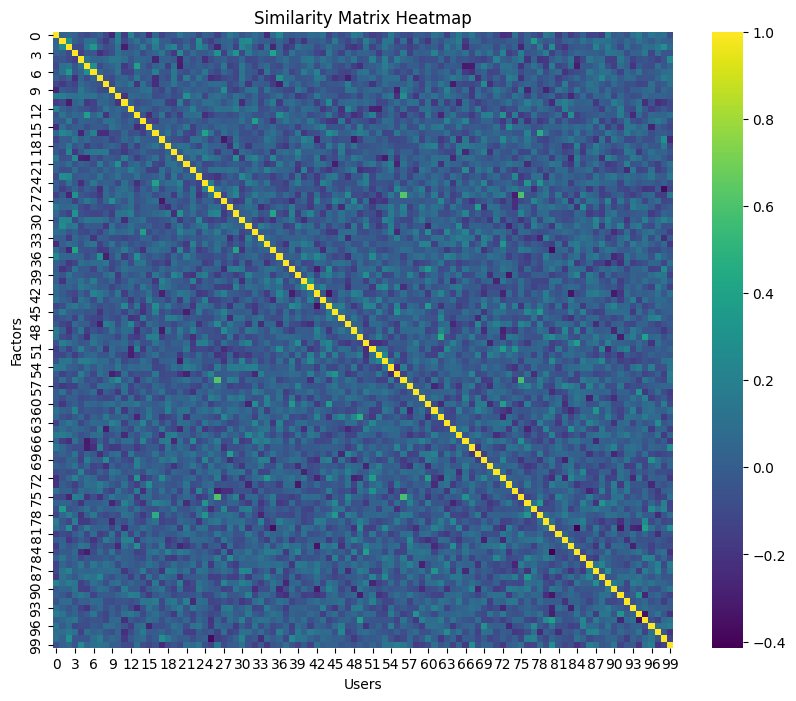

In [ ]:
plot_similarity_matrix(similarity_matrix[:100, :100], 'Users', 'Factors')

This function knows how to convert a user's index from the matrix to its original user_ID:

In [ ]:
def map_user_indices_to_user_ids(similarity_matrix, trainset):
  user_index_to_user_id = {}

  # Iterate over the user indices in the similarity matrix
  for index, _ in enumerate(similarity_matrix):
      # Convert index to raw user ID
      user_id = trainset.to_raw_uid(index)
      user_index_to_user_id[index] = user_id

  return user_index_to_user_id

In [ ]:
user_index_to_user_id_dict = map_user_indices_to_user_ids(similarity_matrix, trainset)

This function performs user clustering based on their factors using cosine similarity and KMeans algorithm with PCA for visualization. It reduces user factor dimensions to 2 for plotting clusters and returns the assigned cluster labels.

In [ ]:
def analyze_user_factors(user_factors, n_clusters=5):
  # Calculate similarity between users
  similarity_matrix = cosine_similarity(user_factors)

  # Cluster users
  kmeans = KMeans(n_clusters=n_clusters, random_state=0)
  clusters = kmeans.fit_predict(similarity_matrix)

  # Reduce dimensions for visualization
  pca = PCA(n_components=2)
  user_factors_reduced = pca.fit_transform(user_factors)

  # Plot clusters
  plt.figure(figsize=(10, 6))
  scatter = plt.scatter(user_factors_reduced[:, 0], user_factors_reduced[:, 1], c=clusters)
  plt.legend(*scatter.legend_elements(), title="Clusters")
  plt.xlabel('Principal Component 1')
  plt.ylabel('Principal Component 2')
  plt.title('User Clusters based on Factor Values')
  plt.show()

  return clusters

In [ ]:
user_factors = svd_optimized.pu

We will not run this line due to RAM problems

In [ ]:
# clusters = analyze_user_factors(user_factors, n_clusters=5)

So the plot above provides a visual representation of user clusters based on their factor values, in irder to highlight patterns and similarities among users in the dataset.

-We can see that there is no a clear separation bwrween the clusters :  
- Cluster Separation: Clusters 0, 1 and 3 are well-separated in the plot, indicating that users within these clusters have distinct preferences or behavior patterns represented by the user factors.

- Clusters 2 and 4 : The unclear separation of Clusters 2 and 4 suggests that users within these clusters may have similar user factor patterns to those in other clusters, making it harder to differentiate them based on these two principal components alone.



Let's try to see and determine the optimal number of clusters for KMeans clustering.

Instead of specifying the number of clusters (`n_clusters`) directly, we will evaluates the silhouette score for different numbers of clusters ranging from 2 to `max_clusters`. The silhouette score measures how similar an object is to its own cluster compared to other clusters. Higher silhouette scores indicate better-defined clusters.

Selecting the optimal number of clusters based on the highest silhouette score.


We will not run this line due to RAM problems

In [ ]:
# comment - since the running time is large we will save the results

In [ ]:
# # To validate the optimal number of clusters, we'll use the silhouette score
# #  to compare clustering performance for different numbers of clusters.

# from sklearn.metrics import silhouette_score

# def analyze_user_factors_opt(user_factors, max_clusters=10):
#     # Calculate similarity between users
#     similarity_matrix = cosine_similarity(user_factors)

#     # Evaluate silhouette scores for different numbers of clusters
#     silhouette_scores = []
#     for n_clusters in range(2, max_clusters+1):
#         kmeans = KMeans(n_clusters=n_clusters, random_state=0)
#         clusters = kmeans.fit_predict(similarity_matrix)
#         silhouette_scores.append(silhouette_score(similarity_matrix, clusters))

#     # Find the optimal number of clusters
#     optimal_clusters = np.argmax(silhouette_scores) + 2  # Add 2 because range starts from 2
#     print(f"Optimal number of clusters: {optimal_clusters}")

#     # Cluster users with optimal number of clusters
#     kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
#     clusters = kmeans.fit_predict(similarity_matrix)

#     # Reduce dimensions for visualization
#     pca = PCA(n_components=2)
#     user_factors_reduced = pca.fit_transform(user_factors)

#     # Plot clusters
#     plt.figure(figsize=(10, 6))
#     scatter = plt.scatter(user_factors_reduced[:, 0], user_factors_reduced[:, 1], c=clusters)
#     plt.legend(*scatter.legend_elements(), title="Clusters")
#     plt.xlabel('Principal Component 1')
#     plt.ylabel('Principal Component 2')
#     plt.title('User Clusters based on Factor Values')
#     plt.show()

#     return clusters

In [ ]:
# # Example usage
# user_factors = svd_optimized.pu
# clusters = analyze_user_factors_opt(user_factors, max_clusters=10)

Based on this function result the optimal number of cluster is 2, as we can see in the plot, there is a clear separation, and it suggests that the user factors can be grouped into two distinct clusters based on their preferences or behavior patterns. This separation indicates that there are two different user segments or types in the dataset that have significantly different preferences or characteristics.


**Potenitial use** : we can use the optimal number of clusters (two) in subsequent analysis, to see a different approach for the model to recommend songs for users in the same cluster.

- Analyzing the Item Factors :

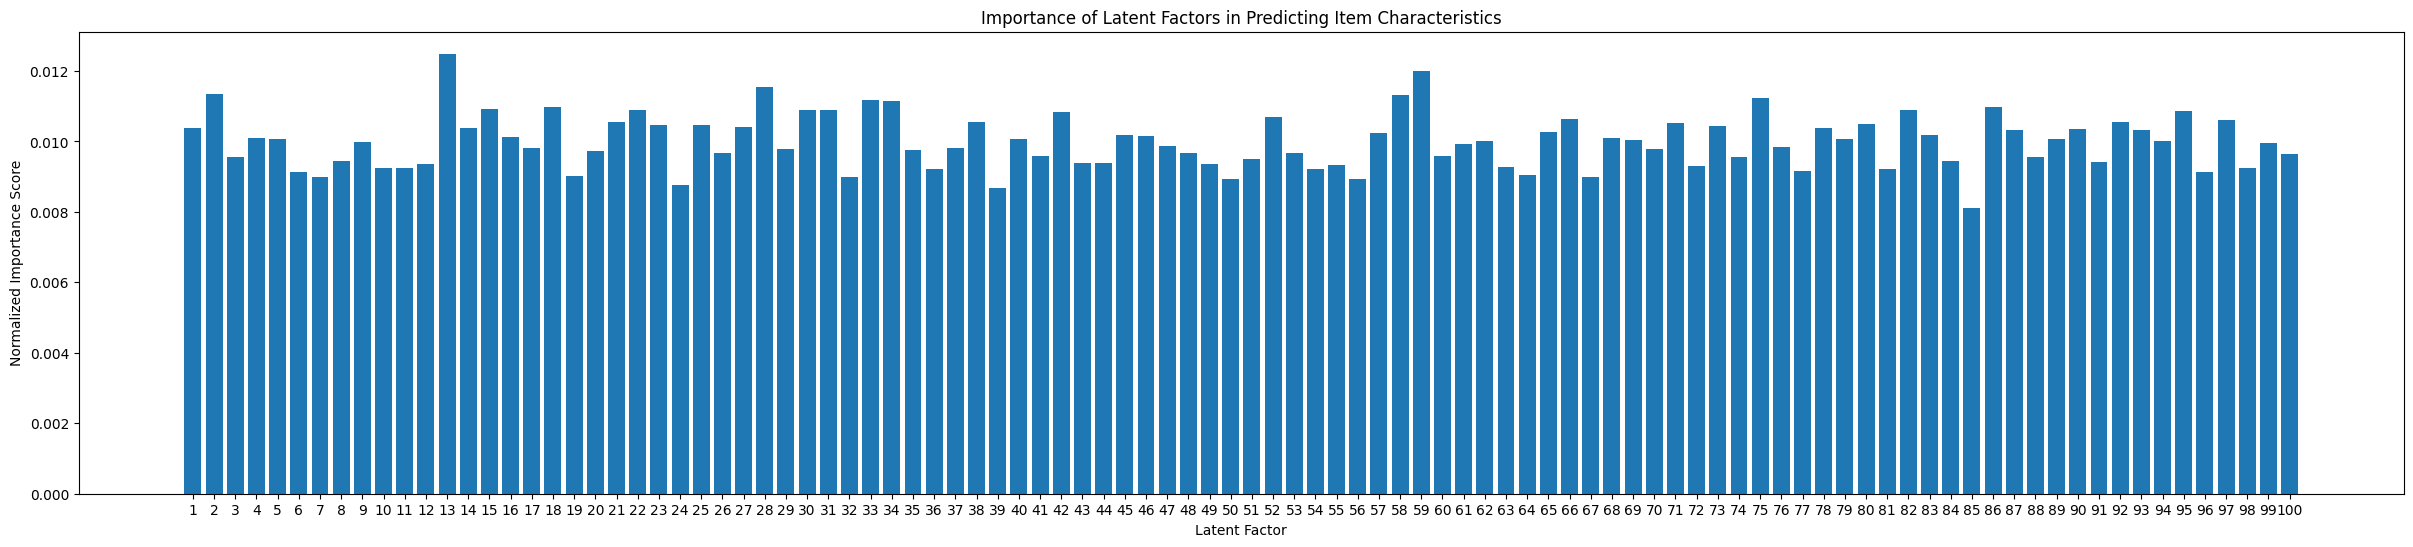

In [ ]:
# Get the item factors matrix
item_factors = svd_optimized.qi

# Calculate the importance scores
importance_scores = np.sum(item_factors**2, axis=0)

# Normalize the scores
normalized_scores = importance_scores / np.sum(importance_scores)

# Visualize the importance scores
plt.figure(figsize=(30, 6))
plt.bar(range(len(normalized_scores)), normalized_scores, tick_label=range(1, len(normalized_scores)+1))
plt.xlabel('Latent Factor')
plt.ylabel('Normalized Importance Score')
plt.title('Importance of Latent Factors in Predicting Item Characteristics')
plt.show()

Important factors would be closer to 1, <br>
aas we see in the graph, the score is up to 0.012, so let's set a thresholf of 0.011 to find the important factors.

In [ ]:
threshold = 0.011
important_factors = {i: score for i, score in enumerate(normalized_scores) if score >= threshold}

# Print the important factors

print(f"Total Factors Above Threshold ({threshold}): {len(important_factors)}")
print("Latent Factors with Importance Scores above Threshold:")
for factor, score in important_factors.items():
    print(f"Latent Factor: {factor + 1}, Importance Score: {score}")

Total Factors Above Threshold (0.011): 8
Latent Factors with Importance Scores above Threshold:
Latent Factor: 2, Importance Score: 0.011339172222241428
Latent Factor: 13, Importance Score: 0.012490323288525514
Latent Factor: 28, Importance Score: 0.011539562428534818
Latent Factor: 33, Importance Score: 0.011170890472787383
Latent Factor: 34, Importance Score: 0.011145658018653443
Latent Factor: 58, Importance Score: 0.011310311084362446
Latent Factor: 59, Importance Score: 0.011987434948628632
Latent Factor: 75, Importance Score: 0.011234051173020388


12 factors have been identified with importance scores above the threshold of 0.011. <br> That suggests that these factors are significant in explaining the user-item interactions in our recommendation system. These latent factors capture underlying patterns or characteristics in the user-item matrix that are useful for making recommendations.

Factors with higher scores are more influential in determining user preferences and item characteristics in our model.

- Analyzing the User bias and Item bias :

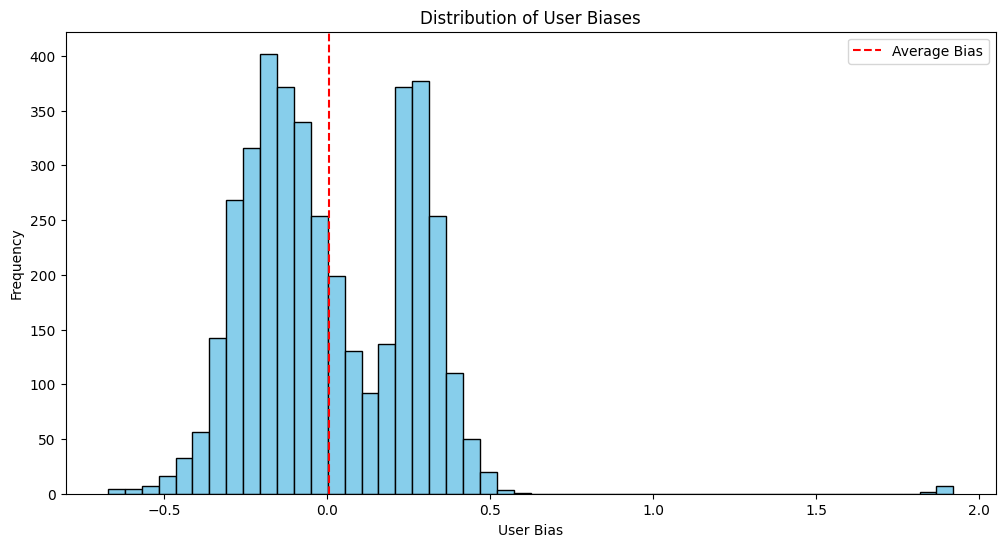

Average User Bias: 0.006684377123698956
Meaning of User Biases:
- A positive bias indicates that the user tends to rate items higher than average.
- A negative bias indicates that the user tends to rate items lower than average.
- The magnitude of the bias indicates the strength of the tendency.


In [ ]:
# Get the user biases from the SVD model
user_biases = svd_optimized.bu

# Calculate the average user bias
average_user_bias = np.mean(user_biases)

# Plot the distribution of user biases
plt.figure(figsize=(12, 6))
plt.hist(user_biases, bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=average_user_bias, color='red', linestyle='--', label='Average Bias')
plt.title('Distribution of User Biases')
plt.xlabel('User Bias')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Explain the user biases
print("Average User Bias:", average_user_bias)
print("Meaning of User Biases:")
print("- A positive bias indicates that the user tends to rate items higher than average.")
print("- A negative bias indicates that the user tends to rate items lower than average.")
print("- The magnitude of the bias indicates the strength of the tendency.")

Since the Average User Bias is 0.02122185905647814  (positive) , <br>
The positive average user bias suggests that users tend to rate items slightly higher than the average rating. <br>
In the graph plottiing , we can see a high frequency of negative biases.  This indicates that there is a subset of users who tend to rate items lower than the average. These users consistently rate items lower than what is considered the average rating, suggesting a more critical or less satisfied user group in the dataset.

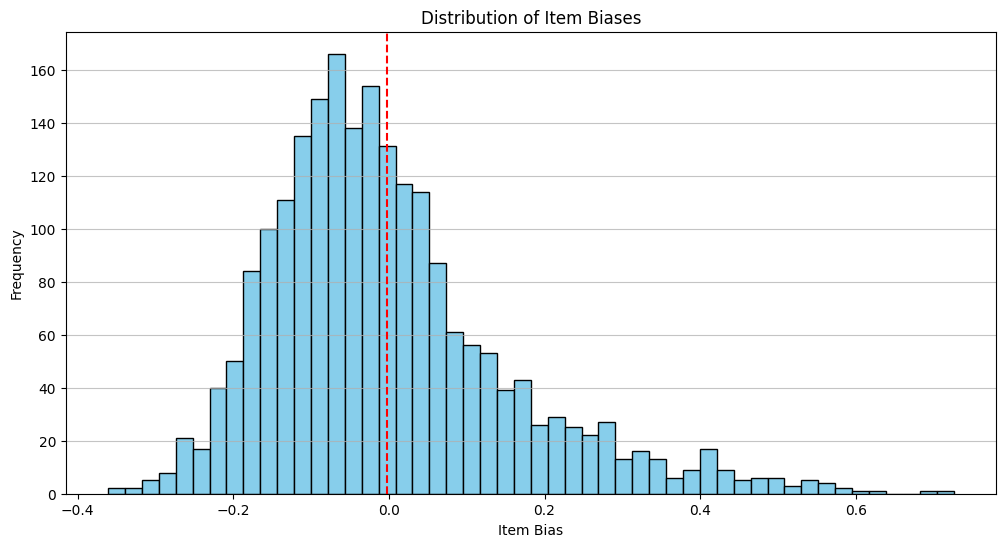

Average Item Bias: -0.0025545497237485478


In [ ]:
# Get the item biases from the SVD model
item_biases = svd_optimized.bi

# Calculate the average user bias
average_item_bias = np.mean(item_biases)


# Plotting the distribution of item biases
plt.figure(figsize=(12, 6))
plt.hist(svd_optimized.bi, bins=50, color='skyblue', edgecolor='black')
plt.axvline(x=average_item_bias, color='red', linestyle='--', label='Average Bias')
plt.title('Distribution of Item Biases')
plt.xlabel('Item Bias')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

print("Average Item Bias:", average_item_bias)


The average item bias of -0.0165 indicates that, on average, items in the dataset tend to be rated slightly lower than the average rating. This suggests that there may be a slight tendency for users to rate items lower than the overall average. which corresponding with what we saw above from the USER BIASES .
<br>  However, the magnitude of this bias is relatively small, indicating that the overall impact on ratings is not substantial.

**Different Approach using the User Factors**
**For recommending songs** <br>

From the Analysis we performed above,  we found the optimal number of clusters (two) to group users based on the user factors.
Let's use this to see a different approach for the model to recommend songs for users in the same cluster.

In this approach we will try to recommend songs for a random user,
based on the cluster he is belong to, from the clusters we just defined in the analysis.

In the example we will provide : <br>
We look for a random user, and finding his list of songs he listened to, and the cluster he belongs to.

<br> Then we look for users in the same cluster as the random user.
<br> For each user in the cluster (excluding the given user), we find songs that are popular among them but have not been listened to by the given user.



TODO הטרשהולד צריך להיות לפי הרייטינג
<br> We defined "Popular" here as songs with an average ratings (avg_count) greater than 3, as specified by rb_popular.

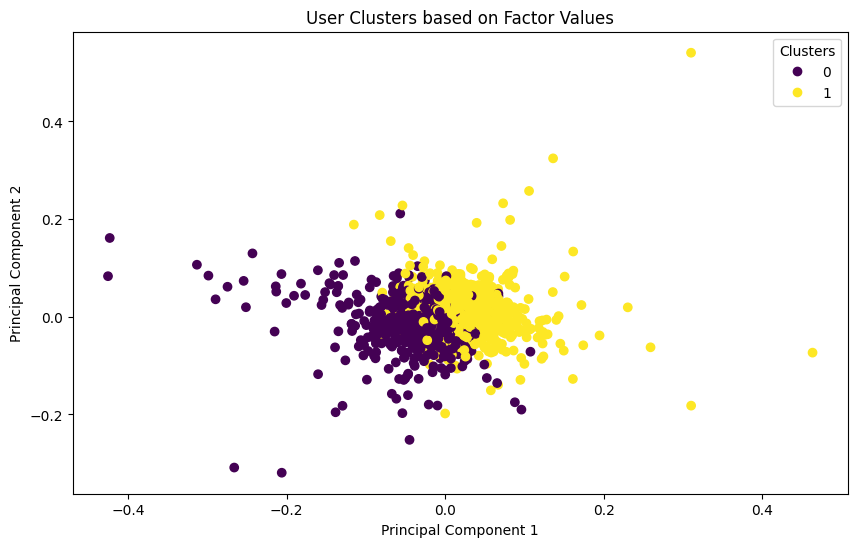

In [ ]:
# Cluster users based on their factors by the optimal numbers of clusters 2 :
clusters = analyze_user_factors(user_factors, n_clusters=2)

In [ ]:
# Get a random key-value pair from the dictionary
random_user_index, random_user_id = random.choice(list(user_index_to_user_id_dict.items()))

print("Random User Index:", random_user_index)
print("Corresponding Random User ID:", random_user_id)

Random User Index: 456
Corresponding Random User ID: 8408


This function utilizes clustering information to suggest popular songs to a user, relying on the assumption that users within the same cluster share similar preferences. The process involves:

Determining the cluster of the random user.
dentifying all users in the same cluster as the random user.
Compiling a list of songs listened to by the random user.
For each user in the cluster, identifying the songs they have listened to.
Selecting popular songs in the cluster (songs with an average listen count greater than a user-specific threshold) that have not been listened to by the random user.

In [ ]:
# Defining a function to get recommendation based on users in the same cluster :

def find_popular_songs_in_cluster(user_index_to_user_id_dict, random_user_index, random_user_id, clusters, rb_popular, data, ):
    # Get the cluster of the user
    user_cluster = clusters[random_user_index]

    # Get all users in the same cluster
    users_in_cluster = np.where(clusters == user_cluster)[0]

    # Get songs listened to by the user
    user_songs = set(data[data['user_id'] == random_user_id]['song_id'])

    # get the user personalized threshold
    threshold = thresholds.get(random_user_id)

    # Find songs that are popular among users in the same cluster based on their rating but not listened to by the user
    popular_songs_in_cluster = []
    for user_index in users_in_cluster:
      # Get the user id from his index in the matrix
      user_id = user_index_to_user_id_dict[user_index]
      if user_index != random_user_index:  # Exclude the user itself
          # Get songs listened to by the user in the cluster
          user_songs_in_cluster = set(data[data['user_id'] == user_id]['song_id'])
          # Find popular songs in the cluster not listened to by the user
          for song_id in rb_popular.loc[rb_popular['avg_count'] > 2, 'song_id']:
              if song_id in user_songs_in_cluster and song_id not in user_songs and song_id not in popular_songs_in_cluster:
                  popular_songs_in_cluster.append(song_id)
                  if len(popular_songs_in_cluster) >= 10:
                      break
      if len(popular_songs_in_cluster) >= 10:
          break

    # Create a DataFrame for the popular songs
    popular_songs_df = pd.DataFrame(popular_songs_in_cluster, columns=['song_id'])

    return popular_songs_df

TODO למחוק הערות

In [ ]:
# Recommend the random_user_id songs based on the clustter
# finding songs that are popular among users in the same cluster as the given user, but have not been listened to by that user

# # Find the cluster of the given user
# user_cluster = clusters[random_user_index]

# # Get all users in the same cluster
# users_in_cluster = np.where(clusters == user_cluster)[0]

# Find popular songs in the cluster but not listened to by the given user
popular_songs = find_popular_songs_in_cluster(user_index_to_user_id_dict, random_user_index, random_user_id, clusters, rb_popular, df_final)

print(f"Songs popular among users in the same cluster but not listened to by user {random_user_id}:")
print(popular_songs)

Songs popular among users in the same cluster but not listened to by user 8408:
   song_id
0     4516
1      576
2     1092
3     4758
4     1415
5     3950
6     4818
7     1017
8     7673
9     6972


In [ ]:
# Predicting rating for the sample user with a not listened song.

# Predict rating for each popular song in the cluster
for index, row in popular_songs.iterrows():
    song_id = row['song_id']
    rating = rating_predict(svd_optimized, random_user_id, song_id)
    print()

The predictions for user 8408 and song 4516 is:

- Real prediction: None,
- Estimated prediction: 2.87.

The predictions for user 8408 and song 576 is:

- Real prediction: None,
- Estimated prediction: 2.76.

The predictions for user 8408 and song 1092 is:

- Real prediction: None,
- Estimated prediction: 2.66.

The predictions for user 8408 and song 4758 is:

- Real prediction: None,
- Estimated prediction: 2.73.

The predictions for user 8408 and song 1415 is:

- Real prediction: None,
- Estimated prediction: 2.7.

The predictions for user 8408 and song 3950 is:

- Real prediction: None,
- Estimated prediction: 2.67.

The predictions for user 8408 and song 4818 is:

- Real prediction: None,
- Estimated prediction: 2.58.

The predictions for user 8408 and song 1017 is:

- Real prediction: None,
- Estimated prediction: 2.75.

The predictions for user 8408 and song 7673 is:

- Real prediction: None,
- Estimated prediction: 2.74.

The predictions for user 8408 and song 6972 is:

- Real p

Based on the function that uses the model to predict the rating we can see that the rating for the recommneded songs by this approach is pretty high, this example is suggesting that this approach might be a right direction for a future work to use a recommendation system.

Let's remember what the predictions was by the svd_optimized for the random user and try to see the differnce between them.

In [ ]:
recommendations_svd

('recommended songs for user: 70739:',
 [(3154, 3.4),
  (7987, 3.39),
  (4617, 3.29),
  (4335, 3.28),
  (502, 3.27),
  (315, 3.27),
  (1996, 3.27),
  (6399, 3.26),
  (7574, 3.24),
  (6009, 3.23)])

Checking if there are commmon songs recommended in both approaches :

In [ ]:
# Convert the recommended songs to sets for easy comparison
popular_songs_set = set(popular_songs['song_id'])
recommended_songs_set = set([song[0] for song in recommendations_svd])

# Calculate the overlap
overlap = len(popular_songs_set.intersection(recommended_songs_set))

print(f"Overlap between the two recommendation methods: {overlap} songs")

Overlap between the two recommendation methods: 0 songs


**Conclusion about the MF Model :**


Matrix Factorization techniques are usually more effective because they allow us to discover the latent features underlying the interactions between users and items. We don’t actually know these latent features. The famous singular vector decomposition (SVD) used here minimize the squared error between predicted rating and actual rating, eventually getting the best model.

One major advantage of using matrix factorization model for recommendation systems is its ability to capture latent factors that represent underlying patterns in the data. <br>

More advatages of the Model-Based Matrix Factorization : <br>

1. **Scalability**: MF models can handle large datasets more efficiently than similarity-based models. They can scale to millions of users and items while still providing accurate recommendations.

2. **Personalization**: MF models provide personalized recommendations by learning user preferences and item characteristics from the data. This leads to more relevant and tailored recommendations for each user.

3. **Cold Start**: MF models can handle the cold start problem better than similarity-based models. They can make reasonable recommendations for new users or items based on the learned latent factors.

4. **Implicit Feedback**: MF models can handle implicit feedback (user interactions such as clicks, views for example) better than similarity-based models, which often rely on explicit ratings. ?? TODO CHECK THIS


### Matrix Factorization Embedding

We will try to understand how the embedding layers look in the Matrix Factorization model:

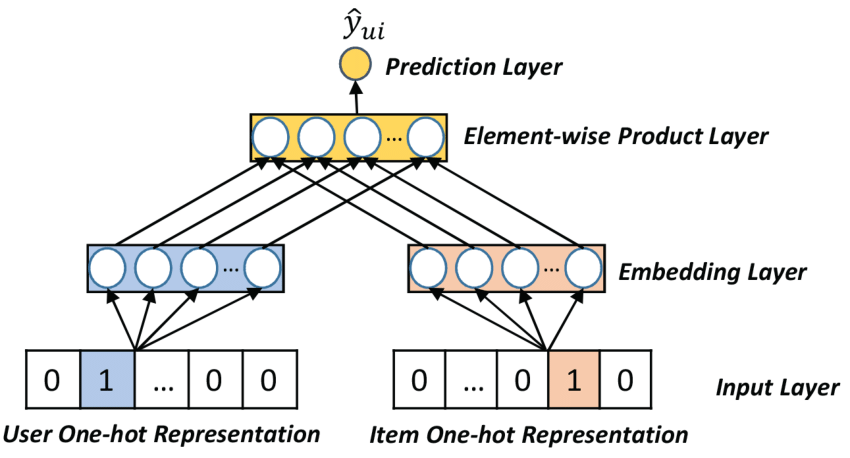

**Copies:**

In this section we will use copy of the data due to changes

In [ ]:
df_final_mf = df_final.copy()
trainset_mf = trainset_df.copy()
testset_mf = testset_df.copy()

Here we arrange the songs and users using new IDs: an index from 1 to the number of songs / users, so that we can run the embedding model:

- Key: The original ID from the DataFrame column specified by column_name.
- Value: The corresponding new ID generated during the mapping process.

In [ ]:
def map_ids(df, column_name):
    id_to_new_id = dict()
    new_ids = []  # Store new IDs in a list

    id = 1
    for index, row in df.iterrows():
        if row[column_name] not in id_to_new_id:
            id_to_new_id[row[column_name]] = id
            new_ids.append(id)  # Append new ID to the list
            id += 1
        else:
            new_ids.append(id_to_new_id[row[column_name]])

    # Create a dictionary mapping the original ID to the new ID
    id_mapping = dict(zip(df[column_name], new_ids))
    return id_mapping

In [ ]:
# Map song IDs
song_id_mapping = map_ids(df_final_mf, 'song_id')

In [ ]:
# Map user IDs
user_id_mapping = map_ids(df_final_mf, 'user_id')

In [ ]:
# Map the song_id to the new_song_id using the song_id_mapping dictionary
trainset_mf['new_user_id'] = trainset_mf['user_id'].map(user_id_mapping)
testset_mf['new_user_id'] = testset_mf['user_id'].map(user_id_mapping)
df_final_mf['new_user_id'] = df_final_mf['user_id'].map(user_id_mapping)

In [ ]:
# Map the song_id to the new_song_id using the song_id_mapping dictionary
trainset_mf['new_song_id'] = trainset_mf['song_id'].map(song_id_mapping)
testset_mf['new_song_id'] = testset_mf['song_id'].map(song_id_mapping)
df_final_mf['new_song_id'] = df_final_mf['song_id'].map(song_id_mapping)

In [ ]:
num_users = len(df_final.user_id.unique())
num_songs = len(df_final.song_id.unique())

print ('Number of songs', num_songs)
print ('Number of users', num_users)

Number of songs 2130
Number of users 3968


In [ ]:
trainset_mf.head()

user_id  song_id  listen_count                           title  \
0       17     1089             1                     Sour Cherry   
1       17     4818             2                  Shadow Journal   
2       17     4840             1  Cape Cod Kwassa Kwassa (Album)   
3       17     1438             1      You Mustn't Kick It Around   
4       17     3108             1                            Baby   

                            release                  artist_name  year  \
0                     Midnight Boom                    The Kills  2008   
1                 Valse Avec Bachir  Max Richter - Tilda Swinton  2004   
2                   Vampire Weekend              Vampire Weekend  2007   
3                      Distillation                 Erin McKeown  2000   
4  Ray Guns Are Not Just The Future         the bird and the bee  2009   

   rating  new_user_id  new_song_id  
0     2.0         1578          877  
1     4.0         1578         1246  
2     2.0         1578         1064  
3     2.0         1578           15  
4     2.0         1578           34

In [ ]:
testset_mf.head()

user_id  song_id  listen_count                 title               release  \
0       17     4778             1              The Rose        The Best Bette   
1       17     1200             1         Fast As I Can   Monday Morning Cold   
2       17     4812             1         Again & Again  the bird and the bee   
3       17     2233             1  All The Pretty Faces  When You  Were Young   
4       17     3495             1            Mathletics            Mathletics   

            artist_name  year  rating  new_user_id  new_song_id  
0          Bette Midler  1979     2.0         1578         1449  
1          Erin McKeown  2000     2.0         1578           11  
2  the bird and the bee  2006     2.0         1578          894  
3           The Killers  2006     2.0         1578          683  
4                 Foals  2007     2.0         1578         1318

**Matrix Factorization**

We perform embedding for each user and item(song). The embedding layer is simply a matrix dot product of one hot encoding of a user/song and the embedding weights.

**Breakdown of the code:**
1. Input Layers: Two input layers are defined, one for the user ID and one for the song ID. These layers will take in the user and song IDs as input respectively.

2. Embedding Layers: Two embedding layers are defined, one for users and one for songs. These layers map the input IDs to dense vectors of size latent_dim, effectively embedding each user and each song into a continuous vector space.

3. Dot Product Layer: The embeddings of the user and the song are combined using a dot product operation. This operation essentially calculates the similarity between the user and the song in the latent space. The dot product is computed along axis 1, which means that it computes the dot product of each corresponding pair of elements in the embeddings.

4. Model Compilation: The model is compiled using the Adam optimizer and mean squared error as the loss function.

**The embeddings:**
1. User Embeddings: Each user is represented as a vector in the latent space. The elements of this vector capture various characteristics or preferences of the user, such as their activity level, etc. Users with similar preferences will have similar embeddings, meaning they will be close together in the latent space.

2. Song Embeddings: Similarly, each song is represented as a vector in the latent space. The elements of this vector capture various features of the song. Songs with similar characteristics will have similar embeddings, meaning they will be close together in the latent space.

3. Dot Product Operation: By taking the dot product of the user and song embeddings, we effectively measure the similarity or affinity between the user and the song in the latent space. Higher dot products indicate higher predicted ratings or preferences for the song by the user.

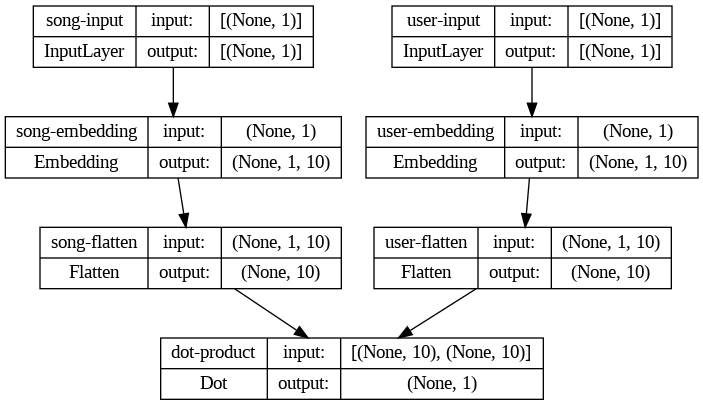

In [ ]:
# latent dimension.
latent_dim = 10

song_input = Input(shape=[1], name='song-input')
song_embedding = Embedding(num_songs + 1, latent_dim, name='song-embedding')(song_input)
song_vec = Flatten(name='song-flatten')(song_embedding)

user_input = Input(shape=[1], name='user-input')
user_embedding = Embedding(num_users + 1, latent_dim, name='user-embedding')(user_input)
user_vec = Flatten(name='user-flatten')(user_embedding)

prod = Dot(axes=1, name='dot-product')([song_vec, user_vec])

model_mf = Model([user_input, song_input], prod)
model_mf.compile('adam', 'mean_squared_error')

plot_model(model_mf, show_shapes=True, to_file='model_plot.png')

# Display the plot
Image('model_plot.png')

In the model above, we are not using any activation function and there is no additional weight to layer. The model above represents a classic matrix factorization. It takes two inputs, a user ID and a song ID. The inputs are embedded into (1, 5) vectors. The vectors are then flattened. The dot product of the flattened vectors is the predicted rating.



In [ ]:
model_mf.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 song-input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 user-input (InputLayer)     [(None, 1)]                  0         []                            
                                                                                                  
 song-embedding (Embedding)  (None, 1, 10)                21310     ['song-input[0][0]']          
                                                                                                  
 user-embedding (Embedding)  (None, 1, 10)                39690     ['user-input[0][0]']          
                                                                                            

Epoch 1/10
6290/6290 [==============================] - 20s 3ms/step - loss: 5.3468
Epoch 2/10
6290/6290 [==============================] - 27s 4ms/step - loss: 0.7765
Epoch 3/10
6290/6290 [==============================] - 29s 5ms/step - loss: 0.5797
Epoch 4/10
6290/6290 [==============================] - 18s 3ms/step - loss: 0.5643
Epoch 5/10
6290/6290 [==============================] - 25s 4ms/step - loss: 0.5565
Epoch 6/10
6290/6290 [==============================] - 18s 3ms/step - loss: 0.5486
Epoch 7/10
6290/6290 [==============================] - 19s 3ms/step - loss: 0.5403
Epoch 8/10
6290/6290 [==============================] - 16s 3ms/step - loss: 0.5316
Epoch 9/10
6290/6290 [==============================] - 19s 3ms/step - loss: 0.5222
Epoch 10/10
6290/6290 [==============================] - 18s 3ms/step - loss: 0.5117


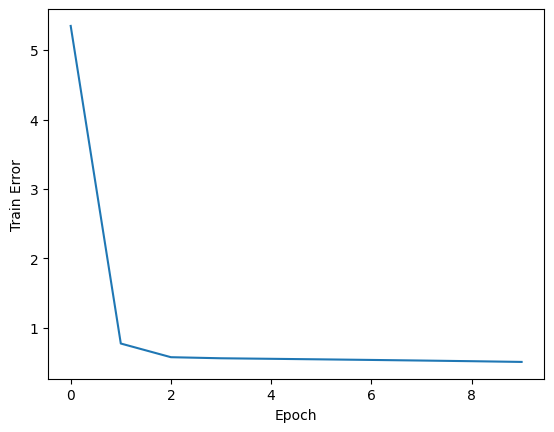

1635/1635 [==============================] - 3s 1ms/step
Mean Absolute Error: 0.53121654805058
Root Mean Squared Error (RMSE): 0.7288460386464208


In [ ]:
history = model_mf.fit([trainset_mf.new_user_id, trainset_mf.new_song_id], trainset_mf.rating, epochs=10)

plt.plot(history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()

y_hat = np.round(model_mf.predict([testset_mf.new_user_id, testset_mf.new_song_id]), decimals=2)
y_true = testset_mf.rating
mae = mean_absolute_error(y_true, y_hat)
rmse = np.sqrt(mae)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Generate a list of recommended songs for a user out of the MF model we just created:

In [ ]:
def get_recommendations_for_user(model, user_id, user_id_mapping, df_final_mf):
    # Get the new user ID
    new_user_id = user_id_mapping.get(user_id)
    if new_user_id is None:
        print(f"User with ID {user_id} not found.")
        return []

    # Get the new song IDs for the current user
    not_played_songs = get_songs_played_by_user(user_id, df_final_mf, played=False)[1]
    new_not_played_songs = [song_id_mapping.get(song_id) for song_id in not_played_songs if song_id in song_id_mapping]

    # Predict ratings for the user's new song IDs
    predicted_ratings = model.predict([np.array([new_user_id] * len(new_not_played_songs)), np.array(new_not_played_songs)])

    # Create a DataFrame to store the predicted ratings for the user's new song IDs
    df_predicted_ratings = pd.DataFrame({
        'new_user_id': [new_user_id] * len(new_not_played_songs),
        'new_song_id': new_not_played_songs,
        'predicted_rating': predicted_ratings.flatten()
    })

    # Sort the predicted ratings by descending order
    sorted_songs = df_predicted_ratings.sort_values(by='predicted_rating', ascending=False)

    # Get top-N recommended songs along with their predicted ratings
    top_n_recommendations_original = [(song_id, predicted_rating) for song_id, predicted_rating in zip(sorted_songs['new_song_id'].head(10), sorted_songs['predicted_rating'].head(10)) if song_id]

    return top_n_recommendations_original

In [ ]:
print(f"The recommendation of {random_user_id} from the MF model: ")
get_recommendations_for_user(model_mf, random_user_id, user_id_mapping, df_final_mf)

The recommendation of 8408 from the MF model: 
66/66 [==============================] - 0s 2ms/step


[(1045, 3.571495532989502),
 (438, 3.5045459270477295),
 (1920, 3.4139950275421143),
 (2068, 3.3973684310913086),
 (2035, 3.384810447692871),
 (1516, 3.3229479789733887),
 (1404, 3.283970594406128),
 (1106, 3.253817319869995),
 (1034, 3.251535415649414),
 (1111, 3.237997055053711)]

## Cluster-based Collaborative Filtering - coClustering

In this section we will use an implementation of a collaborative filtering method model named coClustering.



CoClustering (also called Biclustering), which falls under the category of Cluster-Based Collaborative Filtering, leverages the inherent structure within user-item interaction data to simultaneously cluster users and items, thus capturing underlying structures and similarities.

(The model used in this notebook is a straightforward implementation of the model presented here: <br>
https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=c36c93cbf3eb72dac54242b09293cea25ce6820f)

<b><u>Training:</u></b><br>
Its main training algorithm is as follows:
- Initialize cluster assignments for users and items.
- Iterate through an optimization loop (epochs):
 - estimating the rating for each user-song interaction using the prediction algorithm stated in the 'Prediction' section below.
 - updating cluster assignments to minimize the Mean Square Error  
  ($MSE$) of ratings within each cluster between the estimated and observed ratings.
$$ MSE = \frac{1}{N} \sum_{i=1}^{N} (r_i - \hat{r}_i)^2 $$
    - $N$ is the number of ratings
    - $r_i$ is the observed rating
    - $\hat{r}_i$ is the predicted rating.
- Update user and item clusters by computing the average rating of each cluster.

<b><u>Prediction:</u></b><br>
The prediction is made by the following algorithm:
- For a given user-item interaction, predict the rating $\hat{r}_{ui}$ using the formula:
  $$ \hat{r}_{ui} = \overline{C_{ui}} + (\mu_u - \overline{C_u}) + (\mu_i - \overline{C_i}) $$
 - $\overline{C_{ui}}$ is the average rating of the co-cluster
 - $\overline{C_u}$ is the average rating of the user's cluster
 - $\overline{C_i}$ is the average rating of the item's cluster
 - $\mu_u$ is the mean rating of the user
 - $\mu_i$ is the mean rating of the item.

Based on the article given above:

<u>Advantages:</u>
- <b>High Prediction Accuracy:</b> The collaborative filtering model demonstrates strong prediction accuracy, comparable to traditional techniques, across both static and dynamic scenarios.

- <b>Efficient Training:</b> The model exhibits significantly faster training times compared to some conventional methods, making it suitable for handling large datasets efficiently.

- <b>Scalability:</b> Parallelization techniques enhance scalability, enabling the model to handle large datasets effectively by distributing computational tasks among multiple processors.

- <b>Incremental Training:</b> The model supports incremental training, allowing it to adapt to changes in user behavior and preferences over time.

- <b>Reduced Parameter Complexity:</b> The model requires fewer parameters compared to certain matrix factorization approaches, simplifying model tuning and reducing computational overhead.

<u>Disadvantages:</u>
- <b>Limited Exploration of Algorithmic Variants:</b> The model may lack comprehensive exploration of alternative algorithmic variants, potentially limiting its applicability in diverse scenarios.

- <b>Sparse Data Handling:</b> While the model handles sparse data efficiently, it may rely on simplistic methods for handling missing values, potentially impacting predictive accuracy in sparse datasets.

- <b>Algorithmic Complexity:</b> Despite faster training times, the model's algorithmic complexity may still pose challenges for extremely large datasets or real-time applications.

- <b>Lack of Comparative Analysis with State-of-the-Art Models:</b> The model's evaluation may lack comprehensive comparison against state-of-the-art recommendation approaches, potentially limiting insights into its performance relative to cutting-edge techniques.

Before creating the best cluster-based model let's use a baseline one to see how well it works:

### Baseline Cluster-Based model

In [ ]:
# Make baseline clustering model
coCluster = CoClustering(random_state=1)
# Training the algorithm on the train set
coCluster.fit(trainset)

# Save the model in the dictionary for later use and evaluation
models_dict["coCluster"] = coCluster

# # Compute and display the metrics
precision_recall_at_k(testset, coCluster, thresholds)

{'MAE': 0.5505471717748933,
 'RMSE': 0.7564091327396436,
 'Precision@10': 0.917,
 'Recall@10': 0.778,
 'F_1 score': 0.842}

We can already see that the evaluation scores are pretty good.

Before diving into the model itself, let's provide some motivation for our work and the coclustering algorithm:

CoClustering as a whole aims to find underlying similarities among users within the same user cluster, items within the same item cluster, and the co-cluster.

The algorithm enriches its insights using 3 dimensions of clusters:

<u>Similarity Among Users within the <b>Same User Cluster</b>:</u>

Users in the same cluster exhibit similar rating behavior, indicating shared preferences and tendencies. Clustering users by their rating patterns identifies groups with analogous tastes, facilitating collaborative filtering by recommending items based on similar users.

<u>Similarity Among Items within the <b>Same Item Cluster</b>:</u>

Just like same user clusters, items in the same cluster share common attributes or appeal to similar user preferences. Clustering items based on user ratings identifies items with similar patterns, aiding collaborative filtering by suggesting items that are alike in nature or appeal to similar users.

<u>Similarity Among Users and Items within the <b>Same Co-Cluster</b>:</u>

The co-cluster captures the joint behavior of users and items within a cluster, reflecting their collective rating patterns. Users and items interact within the co-cluster, influencing each other's ratings. Its average rating estimates user-item preferences, leveraging shared characteristics to facilitate collaborative filtering and make personalized recommendations.



------------------------------------------------------------------
Thus, we aim to see some of these attributes that each cluster provides and maybe succeed in finding some users with same tastes that their recommended songs are alike.

In [ ]:
# Renaming
cltr_u = coCluster.cltr_u
cltr_i = coCluster.cltr_i

avg_cltr_u = coCluster.avg_cltr_u
avg_cltr_i = coCluster.avg_cltr_i

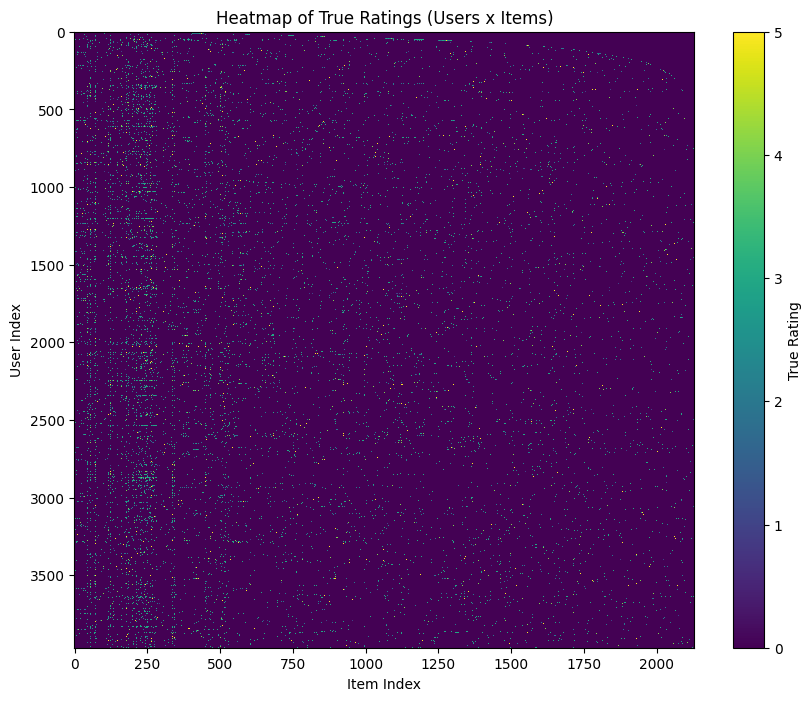

In [ ]:
# Initialize a matrix to store ratings
ratings_matrix = np.zeros((coCluster.trainset.n_users, coCluster.trainset.n_items))

# Fill the ratings matrix with true ratings
for u, i, r in coCluster.trainset.all_ratings():
    uc = cltr_u[u]
    ic = cltr_i[i]
    ratings_matrix[u, i] = r

# Plot heatmap
plt.figure(figsize=(10, 8))
plt.imshow(ratings_matrix, cmap='viridis', interpolation='nearest', aspect='auto')
plt.colorbar(label='True Rating')
plt.xlabel('Item Index')
plt.ylabel('User Index')
plt.title('Heatmap of True Ratings (Users x Items)')
plt.show()

As we already know, most of the data is rated by users as low values (0-2)

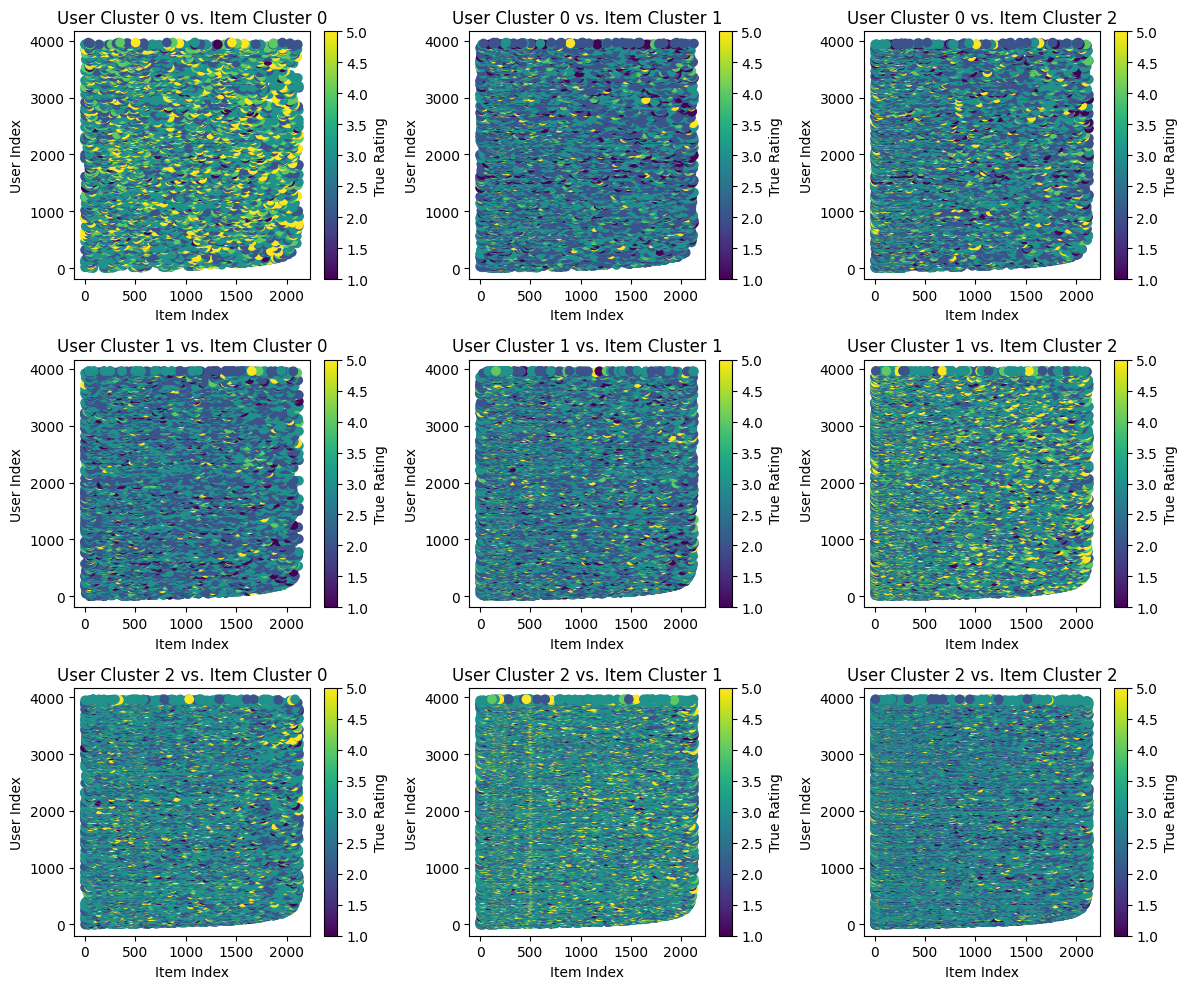

In [ ]:
# Define the maximum number of clusters for users and items
max_user_clusters = coCluster.n_cltr_u
max_item_clusters = coCluster.n_cltr_i

# Define the figure size
plt.figure(figsize=(12, 10))

# Iterate over all user clusters
for user_cluster_id in range(max_user_clusters):
    # Iterate over all item clusters
    for item_cluster_id in range(max_item_clusters):
        # Initialize lists to store user-item interactions and their corresponding ratings
        user_indices = []
        item_indices = []
        ratings = []

        # Collect user-item interactions and ratings for the specified clusters
        for u, i, r in coCluster.trainset.all_ratings():
            if cltr_u[u] == user_cluster_id and cltr_i[i] == item_cluster_id:
                user_indices.append(u)
                item_indices.append(i)
                ratings.append(r)

        # Create a scatter plot to visualize the true ratings of the interactions
        plt.subplot(max_user_clusters, max_item_clusters, user_cluster_id * max_item_clusters + item_cluster_id + 1)
        plt.scatter(item_indices, user_indices, c=ratings, cmap='viridis', vmin=min(ratings), vmax=max(ratings))
        plt.colorbar(label='True Rating')
        plt.xlabel('Item Index')
        plt.ylabel('User Index')
        plt.title(f'User Cluster {user_cluster_id} vs. Item Cluster {item_cluster_id}')

plt.tight_layout()
plt.show()

The same applies when we try to look at the different clusters that the algorithm has created.

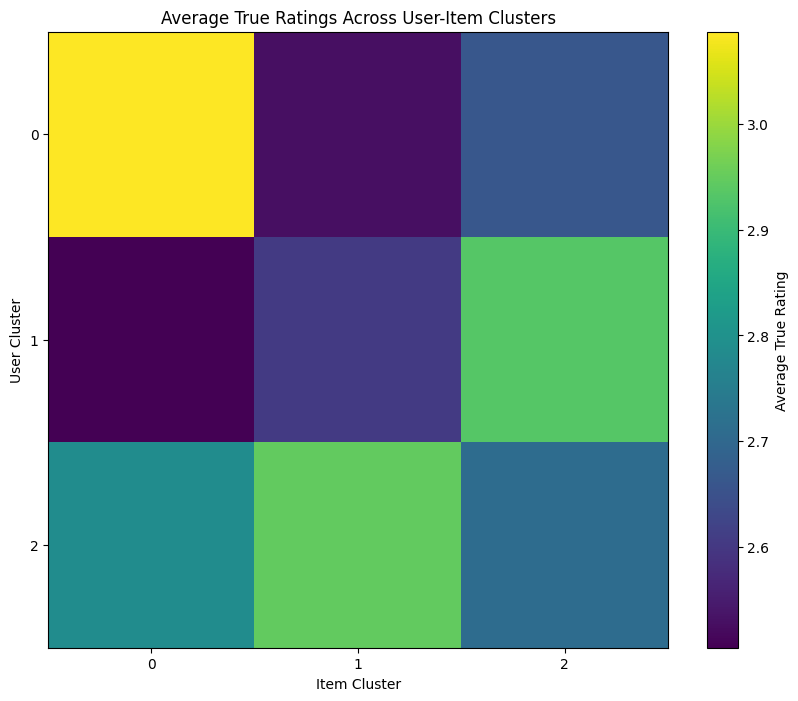

In [ ]:
avg_cocltr = coCluster.avg_cocltr
n_cltr_u = coCluster.n_cltr_u
n_cltr_i = coCluster.n_cltr_i

# Define cluster indices
cluster_indices_u = np.arange(coCluster.n_cltr_u)
cluster_indices_i = np.arange(coCluster.n_cltr_i)

# Plot heatmap for average true ratings across user-item clusters
plt.figure(figsize=(10, 8))
plt.imshow(avg_cocltr, cmap='viridis', interpolation='nearest', aspect='auto')
plt.colorbar(label='Average True Rating')
plt.xlabel('Item Cluster')
plt.ylabel('User Cluster')
plt.title('Average True Ratings Across User-Item Clusters')
plt.xticks(cluster_indices_i, labels=cluster_indices_i)
plt.yticks(cluster_indices_u, labels=cluster_indices_u)
plt.grid(False)
plt.show()

The same can be said about the averages of these cluster interactions...

<u>Counting the number of interactions assigned to each corresponding cluster:</u>

In [ ]:
# Initialize everything to zero
count_cltr_u = np.zeros(coCluster.n_cltr_u, np.int_)
count_cltr_i = np.zeros(coCluster.n_cltr_i, np.int_)
count_cocltr = np.zeros((coCluster.n_cltr_u, coCluster.n_cltr_i), np.int_)

# Compute counts for every cluster.
for u, i, r in coCluster.trainset.all_ratings():
  uc = cltr_u[u]
  ic = cltr_i[i]

  count_cltr_u[uc] += 1
  count_cltr_i[ic] += 1
  count_cocltr[uc, ic] += 1

In [ ]:
def plot_cluster_histograms(count_cltr_u, count_cltr_i):

    plt.figure(figsize=(10, 5))

    # Plot histogram for user clusters
    plt.subplot(1, 2, 1)
    bars_u = plt.bar(range(len(count_cltr_u)), count_cltr_u, align='center', edgecolor='black')
    plt.xlabel('User Cluster')
    plt.ylabel('Number of User Interactions')
    plt.title('Distribution of Users Across Clusters')
    plt.xticks(range(len(count_cltr_u)))  # Set x-axis ticks to cluster numbers

    # Add numbers above bars for user clusters
    for bar, count in zip(bars_u, count_cltr_u):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                 ha='center', va='bottom')

    # Plot histogram for item clusters
    plt.subplot(1, 2, 2)
    bars_i = plt.bar(range(len(count_cltr_i)), count_cltr_i, align='center', edgecolor='black')
    plt.xlabel('Item Cluster')
    plt.ylabel('Number of Item Interactions')
    plt.title('Distribution of Items Across Clusters')
    plt.xticks(range(len(count_cltr_i)))  # Set x-axis ticks to cluster numbers

    # Add numbers above bars for item clusters
    for bar, count in zip(bars_i, count_cltr_i):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                 ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

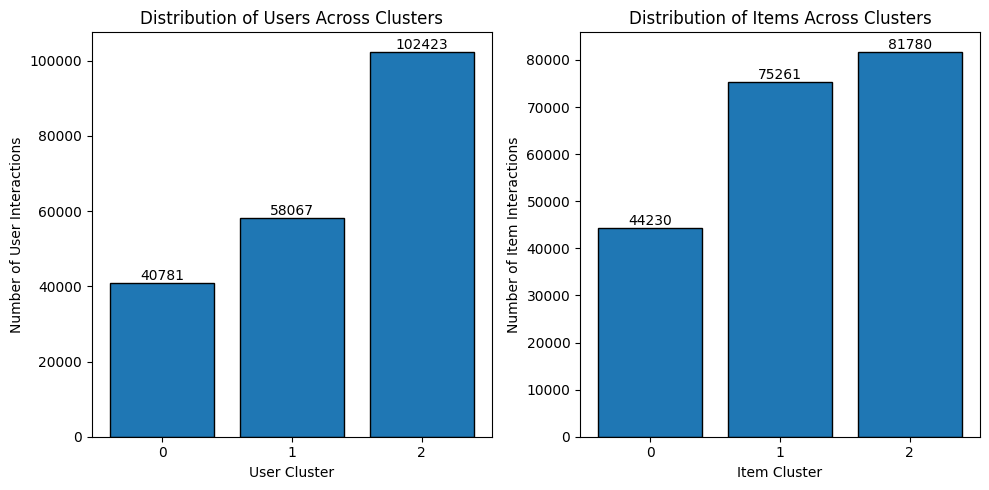

In [ ]:
plot_cluster_histograms(count_cltr_u, count_cltr_i)

In [ ]:
print(f"user cluster count:", count_cltr_u, f"| song cluster count:", count_cltr_i)

user cluster count: [ 40781  58067 102423] | song cluster count: [44230 75261 81780]


Each User Cluster counts the number of interactions of users who were eventually assigned to the specific cluster had with songs.

The same applies to Item Cluster: each Item Cluster counts the number of interactions of songs (that were eventually assigned to the specific cluster) had with users.

We can see that both User Cluster 2 and Item Cluster 2 were assigned a high amount of interactions. Maybe diving deeper will yield interesting conclusions...

In [ ]:
# Proof the total number of interactions in both cluster arrays are the same
sum(count_cltr_u), sum(count_cltr_i), trainset_df.shape[0]

(201271, 201271, 201271)

In [ ]:
def plot_interaction_cluster_histogram(count_cocltr):
    """
    Plot histogram for interaction clusters.

    Parameters:
        count_cocltr (numpy.ndarray): 2D array containing the counts of interactions for each user-cluster and item-cluster.
    """
    n_user_clusters, n_item_clusters = count_cocltr.shape
    cluster_labels = [f"User Cluster {i}, Item Cluster {j}" for i in range(n_user_clusters) for j in range(n_item_clusters)]

    plt.figure(figsize=(10, 5))
    bars = plt.bar(range(len(cluster_labels)), count_cocltr.flatten(), align='center', edgecolor='black')
    plt.xlabel('Interaction Clusters')
    plt.ylabel('Number of Interactions')
    plt.title('Distribution of Interactions Across Clusters')
    plt.xticks(range(len(cluster_labels)), cluster_labels, rotation=45, ha='right')

    # Add numbers above bars
    for bar, count in zip(bars, count_cocltr.flatten()):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(count),
                 ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

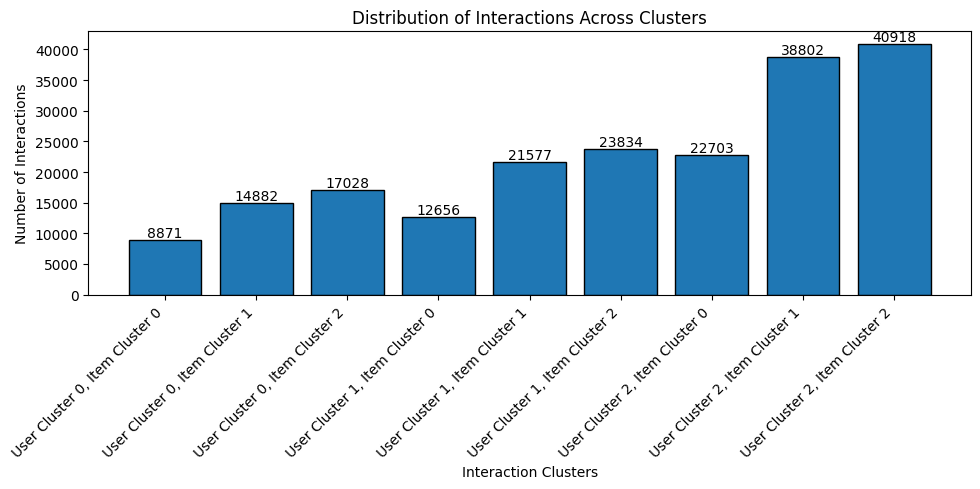

In [ ]:
plot_interaction_cluster_histogram(count_cocltr)

When looking at the co-cluster we can see that user cluster 2 x item cluster 2 is the one that brings item cluster 2 and user cluster 2 to be above the others in the previous plotting.

Another visualization of the user-item cluster interactions:

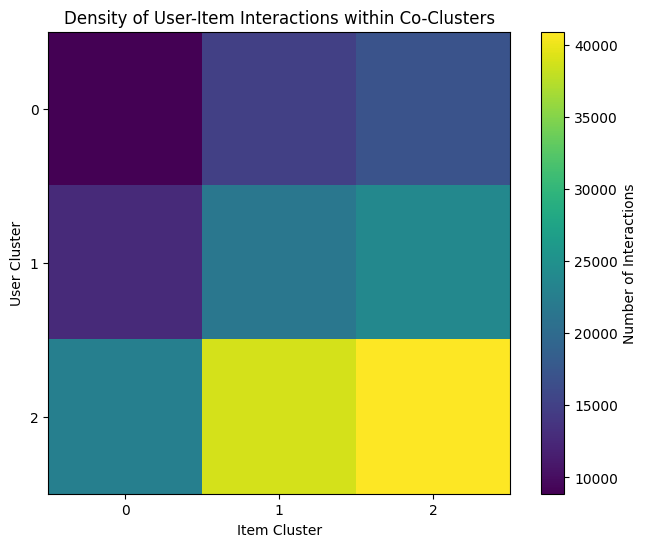

In [ ]:
# Create arrays for x and y tick labels
x_ticks_labels = np.arange(0, coCluster.n_cltr_i)
y_ticks_labels = np.arange(0, coCluster.n_cltr_u)

# Plot heatmap
plt.figure(figsize=(8, 6))
plt.imshow(count_cocltr, cmap='viridis', interpolation='nearest')
plt.colorbar(label='Number of Interactions')
plt.xticks(range(coCluster.n_cltr_i), x_ticks_labels)
plt.yticks(range(coCluster.n_cltr_u), y_ticks_labels)
plt.xlabel('Item Cluster')
plt.ylabel('User Cluster')
plt.title('Density of User-Item Interactions within Co-Clusters')
plt.grid(False)
plt.show()

After visualizing the clusters we will try to see whether we can actually find some similar users as the model suggests:

For that, first, we will extract several users from the same cluster hoping to get some meaningful insights:

In [ ]:
user_indices_1 = []
item_indices_1 = []
ratings_1_1 = []

for u, i, r in coCluster.trainset.all_ratings():
    if cltr_u[u] == 1 and cltr_i[i] == 1:

      raw_uid = trainset.to_raw_uid(u)
      raw_iid = trainset.to_raw_iid(i)

      user_indices_1.append(raw_uid)
      item_indices_1.append(raw_iid)
      # ratings_1_1.append(r)

In [ ]:
# Convert user_indices_1 and item_indices_1 to sets to remove duplicates
unique_user_indices_1 = list(set(user_indices_1))
unique_item_indices_1 = list(set(item_indices_1))

# Sort the unique arrays
unique_user_indices_1.sort()
unique_item_indices_1.sort()


In [ ]:
len(unique_user_indices_1), len(unique_item_indices_1)

(1176, 794)

In [ ]:
# # Zip the lists to create a list of tuples
# data_tuples = list(zip(user_indices_1, item_indices_1, ratings_1_1))

# # Remove duplicates using a set
# unique_data_tuples = set(data_tuples)

# # Unzip the unique tuples to get the lists without duplicates
# user_indices_1, item_indices_1, ratings_1_1 = zip(*unique_data_tuples)

Now that we have all the users from a specific cluster, we will try to estimate their songs within this same cocluster to see whether they are somewhat similar:

In [ ]:
# predicted_ratings = []

# for user_index in unique_user_indices_1[:15]:
#     for item_index in unique_item_indices_1:
#         predicted_rating = coCluster.estimate(user_index, item_index)
#         predicted_ratings.append((user_index, item_index, predicted_rating))

In [ ]:
# top_10_predicted_ratings = []

# for user_index in unique_user_indices_1[:15]:
#     user_ratings = [(item_index, coCluster.estimate(user_index, item_index)) for item_index in unique_item_indices_1]
#     sorted_user_ratings = sorted(user_ratings, key=lambda x: x[1], reverse=True)
#     top_10_user_ratings = sorted_user_ratings[:15]
#     top_10_predicted_ratings.extend([(user_index, item_index, predicted_rating) for item_index, predicted_rating in top_10_user_ratings])

# # Print or use top_10_predicted_ratings as needed
# print(top_10_predicted_ratings)


In [ ]:
# import pandas as pd

# # Convert top_10_predicted_ratings to a DataFrame
# df = pd.DataFrame(top_10_predicted_ratings, columns=['User', 'Item', 'Predicted Rating'])

# # Create a dictionary to store user-wise top 10 song IDs
# user_song_ids = {user: [] for user in unique_user_indices_1[:15]}

# # Iterate over each user's top 10 ratings and store the item IDs
# for user_index, item_index, _ in top_10_predicted_ratings:
#     user_song_ids[user_index].append(item_index)

# # Create a DataFrame to display user-wise top 10 song IDs
# df_song_ids = pd.DataFrame(user_song_ids)

# # Display the DataFrame
# print(df_song_ids)


In [ ]:
def get_top_predicted_ratings(coCluster, unique_user_indices, unique_item_indices, num_users=10, num_predictions=10):
    predicted_ratings = []
    top_predicted_ratings = []

    for user_index in unique_user_indices[:num_users]:
        for item_index in unique_item_indices:
            predicted_rating = coCluster.estimate(user_index, item_index)
            predicted_ratings.append((user_index, item_index, predicted_rating))

        user_ratings = [(item_index, coCluster.estimate(user_index, item_index)) for item_index in unique_item_indices]
        sorted_user_ratings = sorted(user_ratings, key=lambda x: x[1], reverse=True)
        top_user_ratings = sorted_user_ratings[:num_predictions]
        top_predicted_ratings.extend([(user_index, item_index, predicted_rating) for item_index, predicted_rating in top_user_ratings])

    df = pd.DataFrame(top_predicted_ratings, columns=['User', 'Item', 'Predicted Rating'])

    user_song_ids = {user: [] for user in unique_user_indices[:num_users]}
    for user_index, item_index, _ in top_predicted_ratings:
        user_song_ids[user_index].append(item_index)

    df_song_ids = pd.DataFrame(user_song_ids)

    return df, df_song_ids

In [ ]:
num_users = 10
num_predictions = 10
df_top_predicted_ratings, df_song_ids = get_top_predicted_ratings(coCluster, unique_user_indices_1, unique_item_indices_1, num_users, num_predictions)

# print("Top Predicted Ratings:")
# print(df_top_predicted_ratings)

print("\nTop Song IDs for Each User:")
print(df_song_ids)



Top Song IDs for Each User:
    42    92    173   226   301   329   455   464   577   598
0  1611  1993  1141  1141  1611  1141  1141  1611  1993  1141
1  1623  1947  1819  1819  1623  1819  1819  1623  1947  1819
2  2054  1415  1993  1993  2054  1993  1993  2054  1415  1993
3  1966  1395  2079  2079  1966  2079  2079  1966  1395  2079
4  1837   839  1611  1611  1837  1611  1611  1837   839  1611
5  1993  1892  1740  1740  1993  1740  1740  1993  1892  1740
6  1364  1141  1623  1623  1364  1623  1623  1364  1141  1623
7  1052  1819  1947  1947  1052  1947  1947  1052  1819  1947
8   618   359   462   462   618   462   462   618   359   462
9    79   763  1143  1143    79  1143  1143    79   763  1143


In [ ]:
coCluster.estimate(11, 1802)

2.3352770873214044

In [ ]:
trainset_df.shape

(201271, 8)

In [ ]:
testset_df.shape

(52320, 8)

### Tuning the baseline Cluster-Based model

- We will perform a randomized grid search cross validation, in order to find the best values for the hyperparamenters.
- We will then use the parameters obtained, and tune the model, in an effort to improve the model's performance.


In [ ]:
# # Set the parameter space to tune
# param_grid = {'n_cltr_u': [4, 5, 6, 7, 8, 9],
#               'n_cltr_i': [4, 5, 6, 7, 8, 9],
#               'n_epochs': [10, 20, 30, 40, 50]}
# # Perform a 3-fold grid search cross-validation
# gs_cocluster = RandomizedSearchCV(CoClustering, param_grid, measures = ['rmse'], cv = 3, n_jobs = -1)
# # Fitting the data
# gs_cocluster.fit(trainset)
# display_best_params(gs_cocluster)
# # Find the best RMSE score
# #print(round(gs.best_score['rmse'], 3))
# # Extract the combination of parameters that gave the best RMSE score
# #print(gs.best_params['rmse'])

- The `Grid Search Cross Validation` algorithm has outputed the following **optimal values** for the hyperparameters:
  - `n_cltr_u`: **4**,
  - `n_cltr_i`: **5**, and  
  - `n_epochs`: **10**.


In [ ]:
# # Train the tuned Coclustering algorithm
# coCluster_optimized = CoClustering(n_cltr_u=4, n_cltr_i=5, n_epochs=10, random_state=1)
# coCluster_optimized.fit(trainset)
# # Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
# precision_recall_at_k(coCluster_optimized, 10, 1)
# precision_recall_at_k(coCluster_optimized, 20, 1)
# precision_recall_at_k(coCluster_optimized, 30, 1)
# precision_recall_at_k(coCluster_optimized, 40, 1)

# Content-based

So far we have only used the rating of songs to find recommendations but we have other information/features on songs as well.<br>Can we take those song features into account?

<b>Note: This model will try to find similar songs based on their textual features such as their title, artist name and release (Album).<br>
No user's listen count and rating data for each song is used.<br> The model would not know how to distinguish the user's preferences for songs in terms of the number of listens.</b>

#### <b>Preparing The Data </b>

In [988]:
# Make a copy of the df_final, on which we will perform further analysis and transformations.
df_content = df_final.copy()

In [989]:
df_content.shape

(253591, 8)

In [990]:
# Count the number of unique songs in df_content
unique_song_count = df_content['song_id'].nunique()

# Print the number of unique songs
print("Number of different songs:", unique_song_count)

Number of different songs: 2130


In [991]:
# Group the DataFrame by 'title' and count the number of unique song IDs for each title
unique_song_counts_per_title = df_content.groupby('title')['song_id'].nunique()

# Filter out titles that have more than one unique song ID (indicating duplicates)
duplicate_titles = unique_song_counts_per_title[unique_song_counts_per_title > 1]
print("There are", len(duplicate_titles), " songs with duplicated title:")
duplicate_titles

There are 36  songs with duplicated title:


title
All I Ever Wanted                             2
Alright                                       2
Beach Party                                   2
Breathe                                       3
Cannonball                                    2
Closer                                        2
Day 'N' Nite                                  2
Dream On                                      2
Electric Feel                                 2
Elevator                                      2
Everywhere I Go                               2
Forever & Always                              2
Gone                                          2
Good Life                                     2
Halo                                          2
Hello                                         2
Hey Mama                                      2
Holiday                                       2
Home                                          2
Human After All                               2
Hustler                           

We can see that there are a lot of duplicate titles for different songs. <br>
It would not be a great idea to drop songs by their titles because we will lose some songs which have the same title as another song.<br>
So, we will try dropping songs by their song id later.

In [992]:
# Concatenate the title, release and artist_name columns to create a new column, text.
df_content['text'] = df_content[['title', 'release', 'artist_name']].agg(' '.join, axis=1)

In [993]:
# Select the columns 'song_id', 'artist_name', 'title', 'text' from df_content data
df_content = df_content[['song_id', 'title', 'artist_name', 'release', 'text']].reset_index(drop=True)

In [994]:
# First, drop duplicates based on song_id.
df_content = df_content.drop_duplicates(subset='song_id')

# Next, drop duplicates based on title and artist_name to make sure we dropped all duplicates.
df_content = df_content.drop_duplicates(subset=['title', 'artist_name', 'release'])

# Reset the indexes of the DataFrame (after dropping some data we want to reset indexes).
df_content.reset_index(drop=True, inplace=True)

Our data after changings:

In [995]:
df_content

song_id                                           title  \
0         260  Hot N Cold (Manhattan Clique Remix Radio Edit)   
1         365                              Daisy And Prudence   
2         420                 The Ballad of Michael Valentine   
3         452                       I Stand Corrected (Album)   
4         576                           They Might Follow You   
...       ...                                             ...   
2123     5329                                       Even Flow   
2124     5685                                     No Surprise   
2125      678                              Unholy Confessions   
2126     4314                                   St. Elsewhere   
2127     1927                           Youth Against Fascism   

            artist_name               release  \
0            Katy Perry            Hot N Cold   
1          Erin McKeown          Distillation   
2           The Killers               Sawdust   
3       Vampire Weekend       Vampire Weekend   
4           Tiny Vipers           Tiny Vipers   
...                 ...                   ...   
2123          Pearl Jam  Ten (Legacy Edition)   
2124           Daughtry           No Surprise   
2125  Avenged Sevenfold     Waking The Fallen   
2126        Dave Grusin            Collection   
2127        Sonic Youth                 Dirty   

                                                   text  
0     Hot N Cold (Manhattan Clique Remix Radio Edit)...  
1          Daisy And Prudence Distillation Erin McKeown  
2     The Ballad of Michael Valentine Sawdust The Ki...  
3     I Stand Corrected (Album) Vampire Weekend Vamp...  
4         They Might Follow You Tiny Vipers Tiny Vipers  
...                                                 ...  
2123           Even Flow Ten (Legacy Edition) Pearl Jam  
2124                   No Surprise No Surprise Daughtry  
2125  Unholy Confessions Waking The Fallen Avenged S...  
2126               St. Elsewhere Collection Dave Grusin  
2127            Youth Against Fascism Dirty Sonic Youth  

[2128 rows x 5 columns]

In [996]:
df_content.shape

(2128, 5)

 As we can see, we left with only 2128 different songs. <br>

Some visualizations:

Word Cloud of Most Common Words:

We will try to create a word cloud visualization to display the most common words in song titles, artist names, or album names.<br> This can provide insights into the most prevalent themes or topics in the dataset.

In [998]:
# Concatenate all the data from 'title', 'artist_name', and 'release' columns separately
title_text = ' '.join(df_content['title'])
artist_text = ' '.join(df_content['artist_name'])
release_text = ' '.join(df_content['release'])

# Concatenate the individual texts
text = title_text + ' ' + artist_text + ' ' + release_text

# Function to assign colors to words based on their feature
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    if ((word in title_text and word in artist_text) or
     (word in artist_text and word in release_text) or
      (word in title_text and word in release_text)) :
        return 'black'  # Color words in black if they appear in both 'title' and 'artist_name'
    elif word in title_text:
        return 'red'  # Color words from 'title' feature in red
    elif word in artist_text:
        return 'green'  # Color words from 'artist_name' feature in green
    elif word in release_text:
        return 'blue'  # Color words from 'release' feature in blue
    # else:
    #     return 'black'  # Color words in black if they appear in multiple features

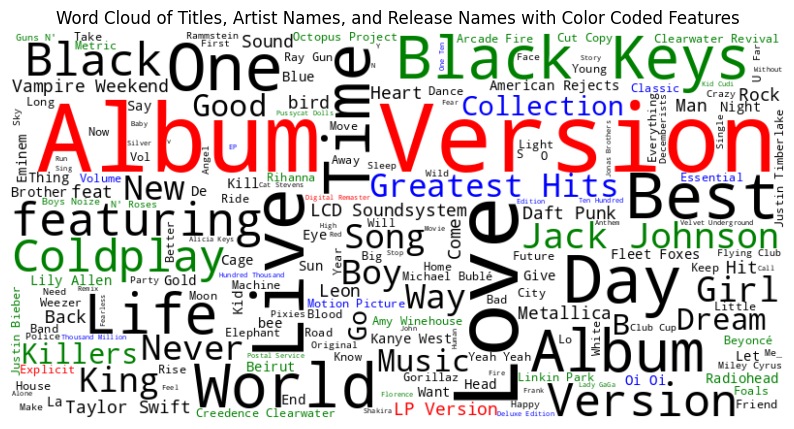

In [999]:
# Generate the WordCloud with custom color function
wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(text)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Titles, Artist Names, and Release Names with Color Coded Features')
plt.axis('off')
plt.show()

In [1000]:
def plot_text_length_distribution(df, attributes):
    plt.figure(figsize=(16, 6))
    num_attributes = len(attributes)
    colors = ['skyblue', 'salmon', 'green']  # Define colors for each attribute

    for i, (attr, color) in enumerate(zip(attributes, colors), start=1):
        plt.subplot(1, num_attributes, i)
        sns.histplot(df[attr].apply(lambda x: len(x.split())), bins=20, kde=True, color=color)
        plt.title(f'Distribution of Text Length in {attr.capitalize()}')
        plt.xlabel('Number of Words')
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

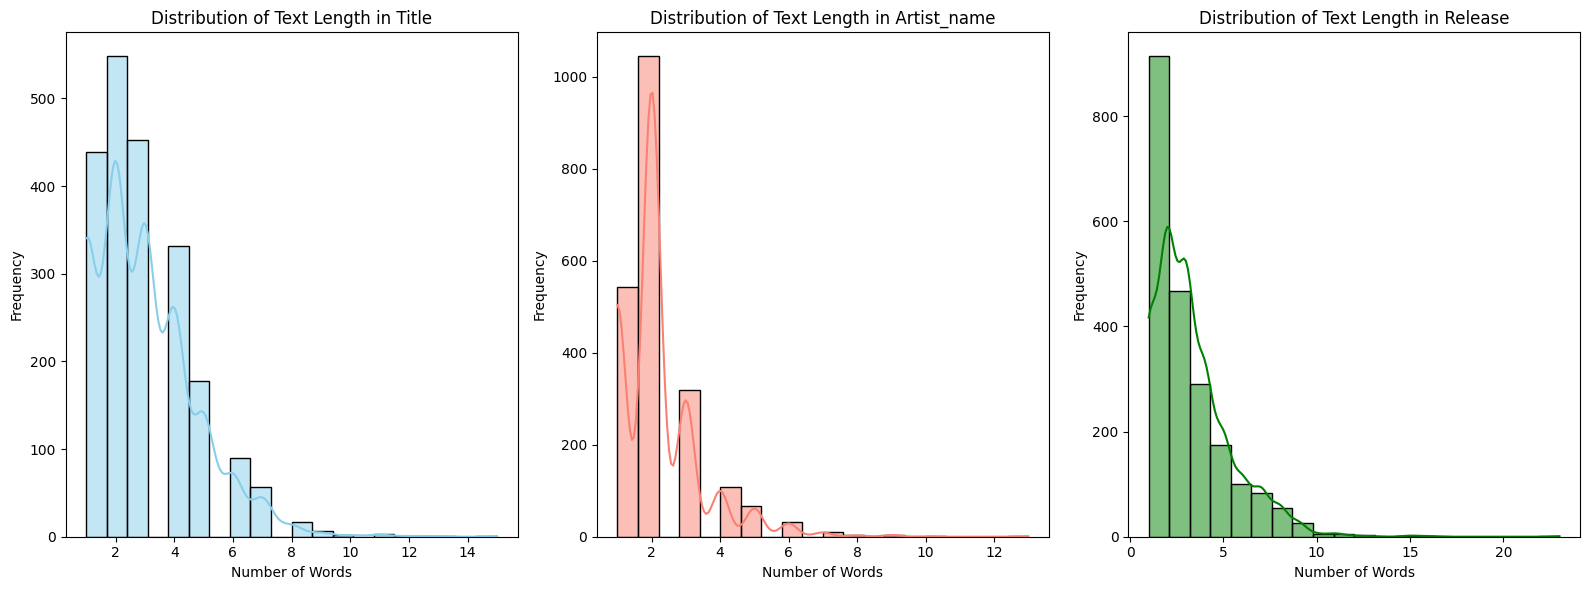

In [1001]:
# Define the attributes to analyze
attributes_to_analyze = ['title', 'artist_name', 'release']

# Call the function with the dataframe and attributes
plot_text_length_distribution(df_content, attributes_to_analyze)

We can conclude that the features 'title', 'artist_name' and 'release' consists in most cases of only a few number of words.

Importing some libraries:

In [1003]:
# Importing the necessary libraries for working with text data
import nltk

# Download punkt library
nltk.download('punkt')

# Download stopwords library
nltk.download('stopwords')

# Download wordnet
nltk.download('wordnet')

# Import regular expression
import re

# Import word_tokenizer
from nltk import word_tokenize

# Import WordNetLemmatizer
from nltk.stem import WordNetLemmatizer

# Import stopwords
from nltk.corpus import stopwords

# Import CountVectorizer and TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Display the combined recommendations DataFrame as a table with song IDs
from IPython.display import display_html

import random

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


#### **Text Data Preprocessing**

#### TF-IDF

We will use TF-IDF to weight the frequency and importance of the different words in the 'text' attribute of the songs in the df. <br>
The 'text' attribute contains the 'title', 'artist name', and 'release' names of each song.<br>
Using TF-IDF with Cosine-Similarity which we will discuss later, we'll get an idea how much the songs similar to each other (Based on their textual content).

In [1004]:
# Function for tokenizing the text
def tokenize(text):
    '''
    A function that tokenizes a given text.
    A token is a word that is not a stop word.
    Params:
        text: text to be tokenized
    Returns:
        A list of the tokens obtained from the text.
    '''
    # Making each letter as lowercase and removing non-alphabetical text
    text = re.sub(r"[^a-zA-Z]"," ", text.lower())

    # Extracting each word in the text
    tokens = word_tokenize(text)

    # Removing stopwords
    words = [word for word in tokens if word not in stopwords.words("english")]

    # Lemmatize the words
    text_lems = [WordNetLemmatizer().lemmatize(lem).strip() for lem in words]

    return text_lems

In [1005]:
# Create the tfidf vectorizer
tfidf = TfidfVectorizer(tokenizer=tokenize)

'''
  TfidfVectorizer: TfidfVectorizer is a method provided by scikit-learn for
  converting a collection of raw documents into a matrix of TF-IDF features.

  TF-IDF stands for Term Frequency-Inverse Document Frequency.
  It is a statistical measure used to evaluate how important a word is to
  a document in a collection or corpus.
  TF-IDF weighting emphasizes words that are frequent in a particular document
  but rare in the entire corpus, thus helping to identify the uniqueness of words in a document.

'''

# Fit_transfrom the vectorizer on the text column, convert the output into an array
song_tfidf = tfidf.fit_transform(df_content['text'].values).toarray()

'''
  'song_tfidf' is an array contains a sparse matrix representation of the text data,
  where each row represents a document (song title) and each column represents
  a unique term, with the cell values representing the TF-IDF weights of each term in each document.
'''

"\n  'song_tfidf' is an array contains a sparse matrix representation of the text data,\n  where each row represents a document (song title) and each column represents\n  a unique term, with the cell values representing the TF-IDF weights of each term in each document.\n"

TF-IDF Formulas:<br>
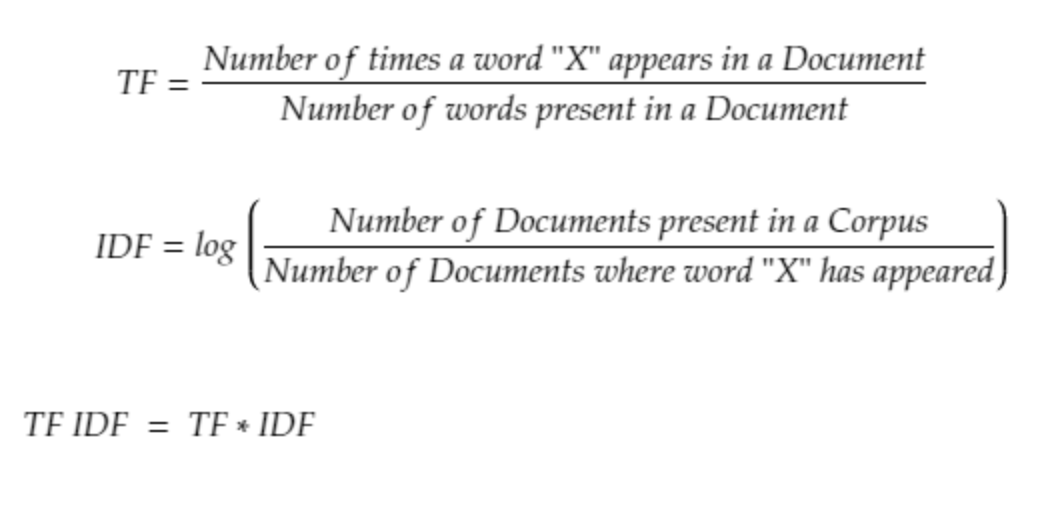

TF-IDF on our data:

In [1006]:
pd.DataFrame(song_tfidf).head()

0     1     2     3     4     5     6     7     8     9     ...  3883  \
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   0.0   

   3884  3885  3886  3887  3888  3889  3890  3891  3892  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 3893 columns]

The 3893  columns in the DataFrame correspond to the number of unique terms (words) found in the text corpus after preprocessing, including tokenization, lemmatization, and removal of stop words.<br>
Each column represents a unique term in the entire corpus.<br>
Each row represents a different song.

Let's see our tokens:

In [1010]:
# Get the feature names (tokens) from the TF-IDF vectorizer
feature_names = tfidf.get_feature_names_out()

# Print the number of tokens
num_tokens = len(feature_names)
print(f"Number of tokens: {num_tokens}\n")

# Print the tokens along with their corresponding words
for idx, token in enumerate(feature_names):
    print(f"Token {idx}: {token}")


Number of tokens: 3893

Token 0: abattoir
Token 1: abba
Token 2: abelha
Token 3: abracadabra
Token 4: abrazame
Token 5: absence
Token 6: absolute
Token 7: ac
Token 8: acabar
Token 9: accent
Token 10: access
Token 11: ace
Token 12: acoustic
Token 13: across
Token 14: act
Token 15: actor
Token 16: actually
Token 17: adam
Token 18: addams
Token 19: addicted
Token 20: addiction
Token 21: adentro
Token 22: adjustor
Token 23: adrenalin
Token 24: adult
Token 25: adventurous
Token 26: aerobics
Token 27: aerodynamic
Token 28: aerodynamite
Token 29: aeroplane
Token 30: aerosmith
Token 31: afi
Token 32: afraid
Token 33: afro
Token 34: afroman
Token 35: afromental
Token 36: afterglow
Token 37: afternoon
Token 38: agaetis
Token 39: age
Token 40: agnostic
Token 41: ago
Token 42: agua
Token 43: aguilera
Token 44: aha
Token 45: aijuswanaseing
Token 46: aijuswannasing
Token 47: aim
Token 48: air
Token 49: airplane
Token 50: airwave
Token 51: airway
Token 52: akon
Token 53: akron
Token 54: al
Token 55: 

As we can see, the number of tokens is equal to the number of columns we saw before = 3893.

Some visualizations:

In [1011]:
# Function to plot TF-IDF scores of specific words using scatter plot
def plot_tfidf_scatter(word_scores, word):
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(word_scores)), word_scores.values(), color='skyblue', alpha=0.5)
    plt.xlabel('Song Index')
    plt.ylabel('TF-IDF Score')
    plt.title(f'TF-IDF Scores of the word "{word}" across Different Songs')
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

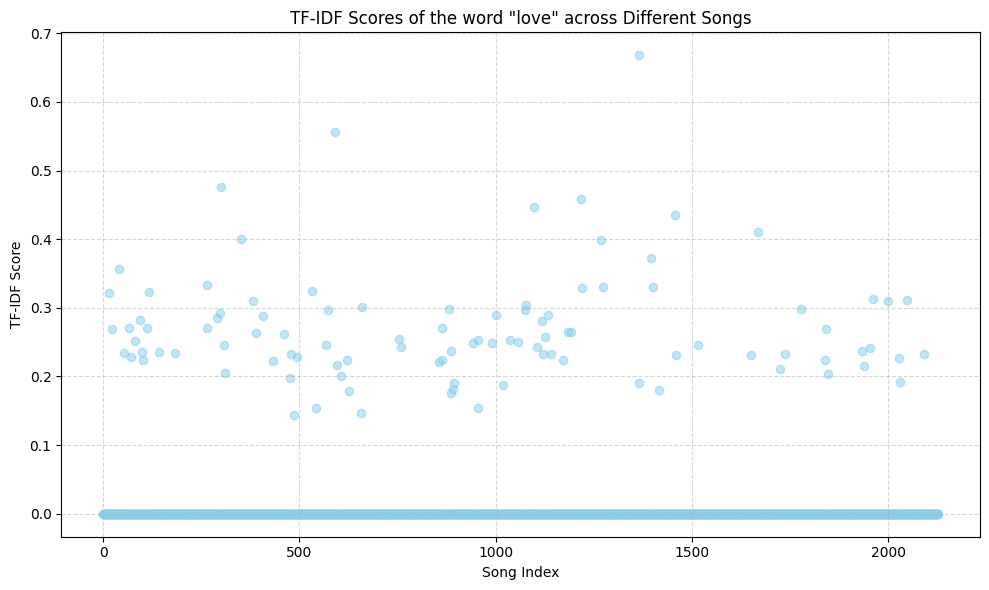

In [1012]:
# Example: Plot TF-IDF scores of the word "love" across different songs
word = 'love'
word_index = tfidf.vocabulary_[word]
word_scores = {i: song_tfidf[i][word_index] for i in range(len(song_tfidf))}

plot_tfidf_scatter(word_scores, word)

In [1013]:
def plot_sampled_feature_importance(feature_names, song_tfidf, num_features_to_sample=30):
    """
    Plot the feature importance (average TF-IDF scores) for a sampled subset of features.

    Parameters:
        feature_names (list): List of feature names.
        song_tfidf (numpy.ndarray): TF-IDF matrix of songs.
        num_features_to_sample (int): Number of features to sample (default is 30).
    """
    # Randomly sample feature indices
    sampled_feature_indices = random.sample(range(len(feature_names)), num_features_to_sample)

    # Compute the average TF-IDF scores for each feature
    average_tfidf_scores = np.mean(song_tfidf, axis=0)

    # Select the sampled feature names and corresponding average TF-IDF scores
    sampled_feature_names = [feature_names[i] for i in sampled_feature_indices]
    sampled_average_tfidf_scores = [average_tfidf_scores[i] for i in sampled_feature_indices]

    # Plot the feature importance for the sampled features
    plt.figure(figsize=(10, 6))
    plt.barh(sampled_feature_names, sampled_average_tfidf_scores)
    plt.xlabel('Average TF-IDF Score')
    plt.ylabel('Feature')
    plt.title('Feature Importance (Average TF-IDF Scores) - Sampled Features')
    plt.show()

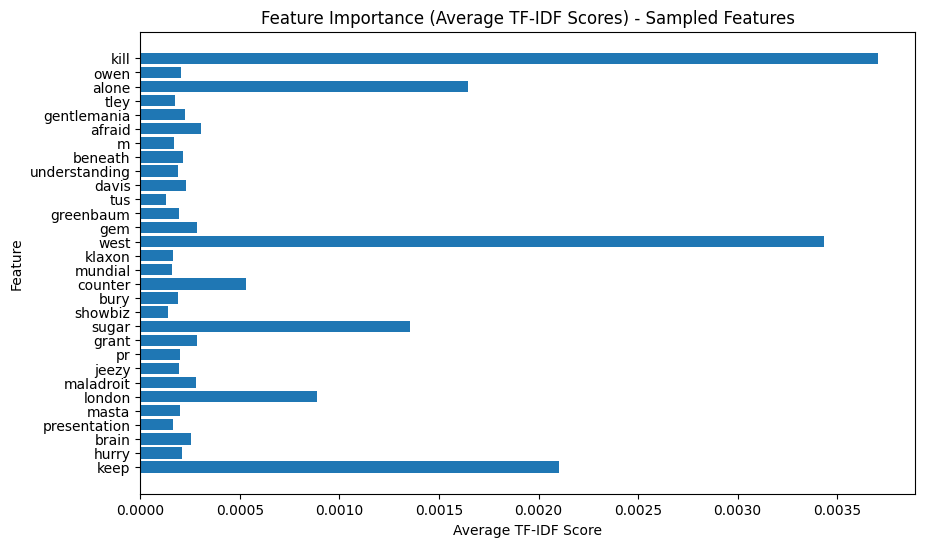

In [1014]:
# Number of features to sample
num_features_to_sample = 30

# Call the function with the required parameters
plot_sampled_feature_importance(feature_names, song_tfidf, num_features_to_sample)


####**Cosine Similarity**

Next, we want to calculate the similarity between two songs. <br>
In general, this model will calculate an angle between the vectors of two songs to understand how similar they are (The vectors consist of the tf-idf score of each word in the song metadata ['title', 'artist_name' and 'release']).<br>
The larger the angle, the songs are more similar.<br>

<b>Cosine of the Angle:</b><br> The cosine similarity between two vectors (songs) is calculated by taking the dot product of the vectors and dividing it by the product of their magnitudes (Euclidean norms). Mathematically, it is represented as:
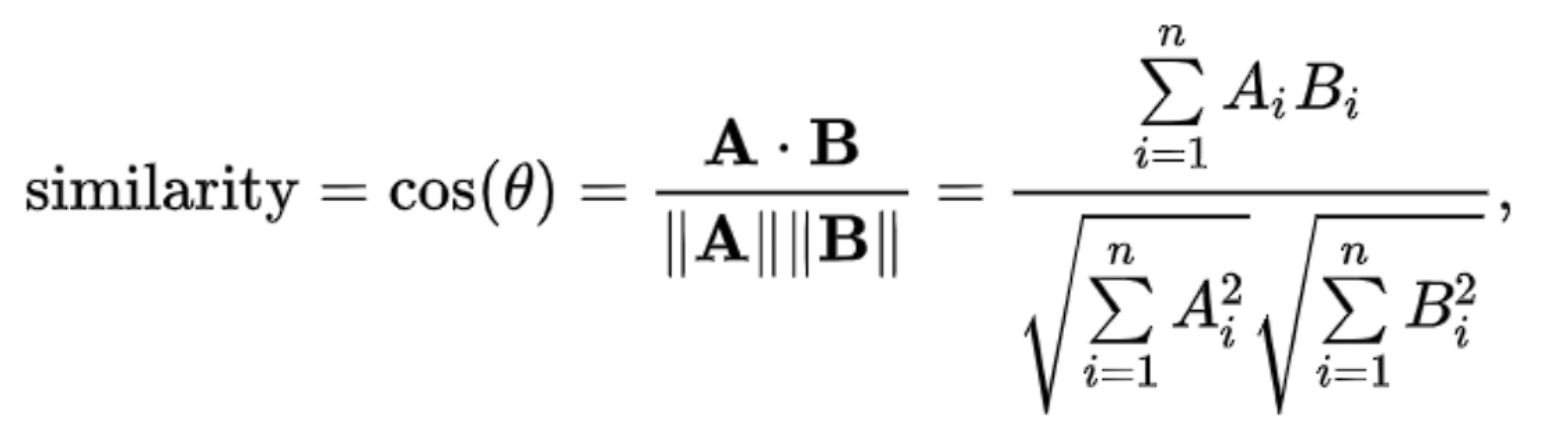
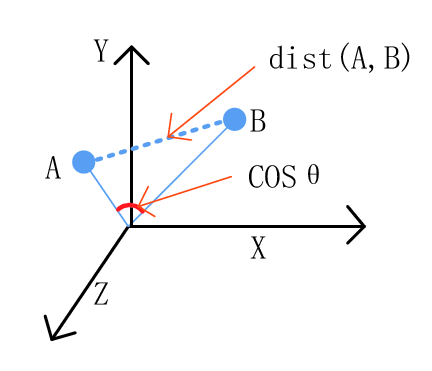
<br>
<b>Dot Product:</b> The dot product of two vectors is the sum of the products of their corresponding components. It measures the similarity of the direction of the vectors.<br>
<b>Magnitude (Norm): </b>The magnitude or Euclidean norm of a vector is the square root of the sum of the squares of its components. It represents the length of the vector in the space.



In [1015]:
# Compute the cosine similarity for the tfidf
similar_songs = cosine_similarity(song_tfidf, song_tfidf)

'''
  By passing song_tfidf as both the first and second arguments to cosine_similarity(),
  the function computes the cosine similarity between all pairs of songs represented by the rows in song_tfidf.
  This means it calculates the cosine similarity between each song and every other song in the dataset.
'''

# Display the similar_songs array
similar_songs

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

The cosine_similarity function computes the cosine similarity between pairs of samples (in this case, between songs) in the song_tfidf matrix. Cosine similarity is a measure of similarity between two non-zero vectors in an inner product space.

[(Inner Product Space: An inner product space is a mathematical structure where vectors can be multiplied together, resulting in a scalar (a single value). In the context of cosine similarity, the inner product of two vectors is used to calculate their similarity.

cosine similarity provides a measure of similarity between two non-zero vectors (entities) in a space where vectors can be multiplied together, based on the cosine of the angle between them. It's widely used in recommendation systems to compare the similarity between items or users based on their feature representations.)]

In the context of our content-based recommendation system using TF-IDF vectors, cosine similarity is used to measure how similar two songs are based on the words they contain. It computes the cosine of the angle between the two vectors representing the songs in the high-dimensional TF-IDF space.

<b>

An example of first song represented as a vector of a 3 words (title, artist name, release): <br> A : (TF_IDF value1, TF_IDF value2, TF_IDF value3)

An example of second song represented as a vector of a 3 words (title, artist name, release): <br> B : (TF_IDF value4, TF_IDF value5, TF_IDF value6)

Cosine Similarity = (A X B) / ||A|| X ||B||

</b>

The resulting similar_songs array is a symmetric matrix where each element (i, j) represents the cosine similarity between song i and song j. A value of 1.0 indicates that the songs are identical, while a value closer to 0.0 indicates less similarity between the songs.

Since the cosine similarity of a vector with itself is always 1, the diagonal of the matrix contains all 1's, representing each song's maximum similarity with itself. The off-diagonal elements represent the similarity between different pairs of songs.

Example how cosine similarity score is computed:<br>
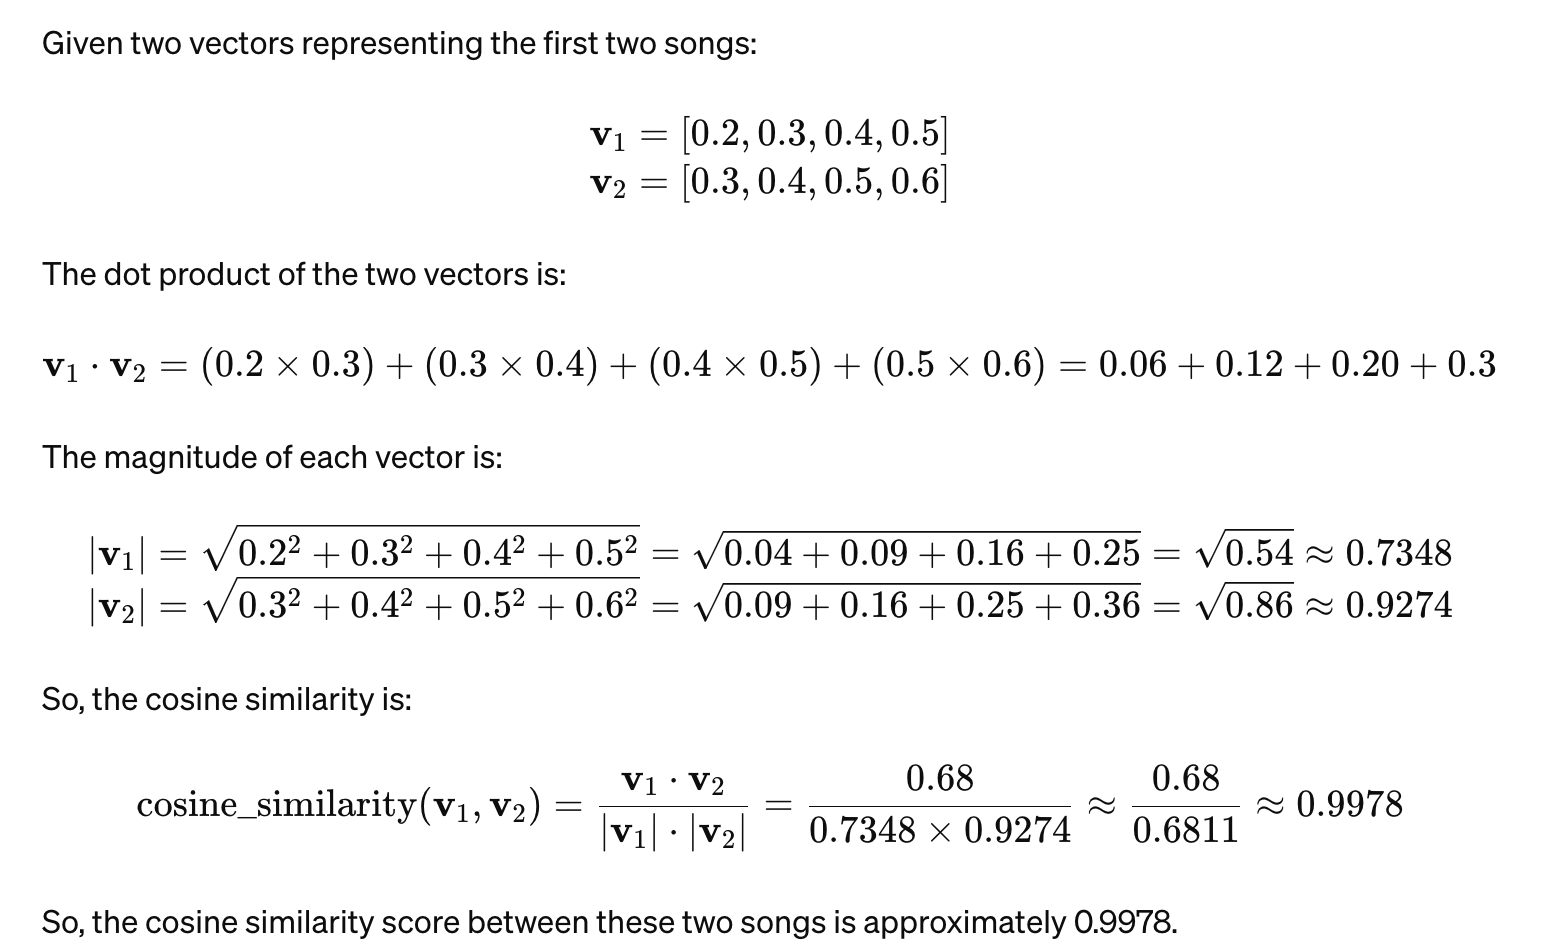

In [1016]:
similar_songs.shape

(2128, 2128)

The cosine similarity computation is performed between pairs of songs, not individual terms.

The shape of the similar_songs matrix (2128, 2128) indicates that it contains pairwise cosine similarity scores for 2128 songs -
the same number as the number of songs that left in our df_content.


Visualizations:

In [1017]:
def plot_sampled_similarity_heatmap(similar_songs, sample_size=100):
    """
    Generate a heatmap visualization of a sampled similarity matrix.

    Parameters:
        similar_songs : Original similarity matrix between songs.
        sample_size : Number of songs to sample for visualization. Default is 100.
    """
    # Sample a subset of songs for visualization
    sampled_indices = np.random.choice(similar_songs.shape[0], size=sample_size, replace=False)
    sampled_similar_songs = similar_songs[sampled_indices][:, sampled_indices]

    # Create a heatmap of the sampled similarity matrix
    plt.figure(figsize=(12, 10))
    sns.heatmap(sampled_similar_songs, cmap='viridis', linewidths=0.05, linecolor='gray')
    plt.title('Sampled Similarity Matrix Heatmap')
    plt.xlabel('Song Index')
    plt.ylabel('Song Index')
    plt.show()

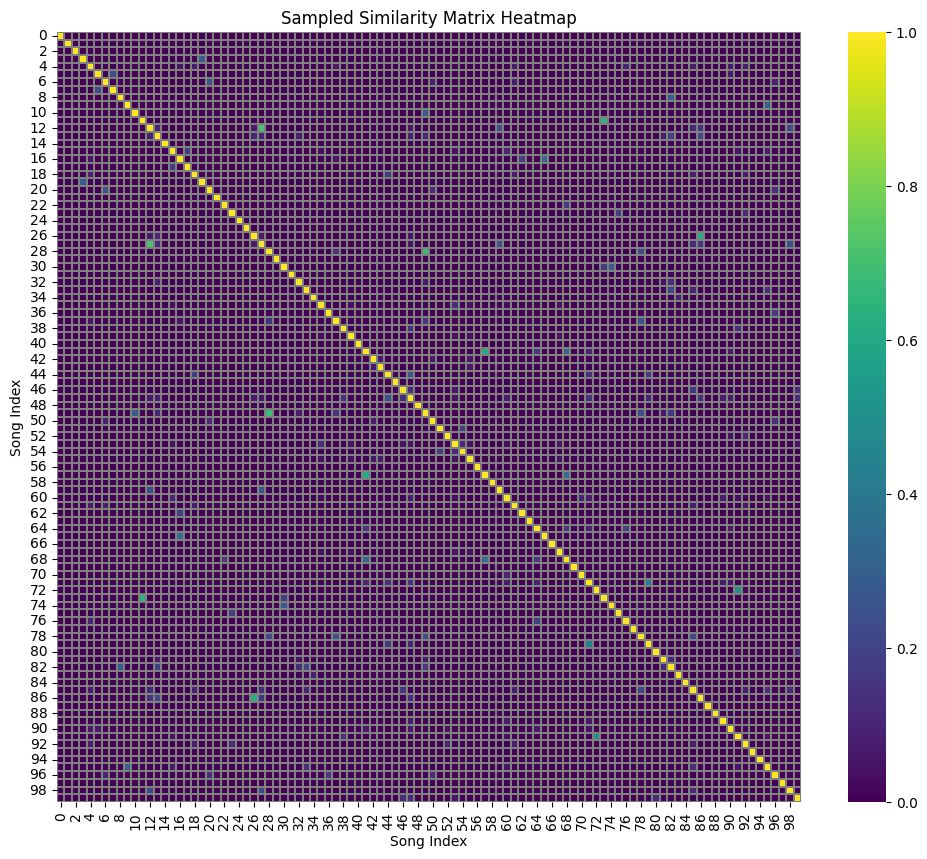

In [1018]:
# Call the function
plot_sampled_similarity_heatmap(similar_songs)

We can see that most of the songs are very different from each other.

#### **Top N most similar songs to a song**

In [1148]:
def recommendations(df, song_id, similarity_matrix, n = df['song_id'].nunique()):
    '''
    A function that returns a DataFrame of songs similar to a given one based on song_id.
    Params:
        df: dataframe with the data
        song_id: the song_id of the song for which we are computing similar songs
        similarity_matrix: the cosine similarity matrix for all song-song
        n: the upper limit number of similar songs
    Returns:
        A DataFrame of recommended songs (song_id, title, artist_name, similarity_score).
        A message, if the song_id is not found in the database.
    '''
    # Check if the song_id exists in the DataFrame
    if song_id not in df['song_id'].values:
        return print(clr.S+'We apologize, we cannot find a song with song_id {} in our database, and we are unable to make recommendations!'.format(song_id)+clr.E)

    # Find the index of the row with the specified song_id
    index_of_song = df[df['song_id'] == song_id].index[0]

    # Create a Series with the similarity scores in descending order
    sim_scores = pd.Series(similarity_matrix[index_of_song]).sort_values(ascending=False)

    # Filter out the similarity score of the song itself
    sim_scores = sim_scores.drop(index_of_song)

    # Filter the scores that are equal to 0.0.
    sim_scores = sim_scores[sim_scores != 0]

    # Getting the indexes of the n most similar songs
    top_n_index = sim_scores.head(n).index

    # Create a DataFrame to store the recommended songs
    recommended_df = pd.DataFrame(columns=['song_id', 'title', 'artist_name', 'release', 'similarity_score'])

    # Populating the DataFrame with the recommended songs
    for i, idx in enumerate(top_n_index):
        recommended_df.loc[i] = [df.loc[idx, 'song_id'], df.loc[idx, 'title'], df.loc[idx, 'artist_name'], df.loc[idx, 'release'], sim_scores[idx]]

    return recommended_df

**Recommend 10 songs similar to song id 605, a song that exists in the database**

In [1150]:
# Make the recommendation for the song with song_id 605
song_id = 605
recommendations(df_content, song_id, similar_songs, n=10)

song_id                title           artist_name              release  \
0     2906           Homecoming            Kanye West           Graduation   
1     4023             Champion            Kanye West           Graduation   
2     2087            Good Life   Kanye West / T-Pain           Graduation   
3     2090  Drunk and Hot Girls  Kanye West / Mos Def           Graduation   
4     6221              RoboCop            Kanye West    808s & Heartbreak   
5     3080        Street Lights            Kanye West    808s & Heartbreak   
6      803       Coldest Winter            Kanye West    808s & Heartbreak   
7     4677      Flashing Lights            Kanye West       R&B Collection   
8     6726             Hey Mama            Kanye West    Late Registration   
9     5313      Family Business            Kanye West  The College Dropout   

   similarity_score  
0          0.658262  
1          0.658262  
2          0.598417  
3          0.483147  
4          0.374935  
5          0.360652  
6          0.333353  
7          0.319659  
8          0.310693  
9          0.302012

**Recommend 10 songs similar to song_id 99999999, a song that doesn't exists in the database**

In [1026]:
recommendations(df_content, '9999999', similar_songs)

We apologize, we cannot find a song with song_id 9999999 in our database, and we are unable to make recommendations!


We managed to find in the data N songs most similar to a certain song.

#### **Top K Most Recommended Songs To A User**

Next, In order to make the recommendation system work well, we want to see the top N most recommended songs for a user. <br>

Function 'get_user_all_recommendations' to get <b>all </b> user's recommendations based on the songs he listened to:

In [1027]:
def get_user_all_recommendations(user_id, df_final, df_content, similar_songs, n):
    '''
    A function that finds all the recommended songs for a user based on their listening history,
    by generating recommendations for each unique song listened to and storing the similarity scores.

    Params:
        user_id: The ID of the user for whom recommendations are generated.
        df_final: DataFrame containing user-song interactions.
        df_content: DataFrame containing unique songs information.
        similar_songs: Cosine similarity matrix for all song-song pairs.
        n: The number of recommendations to generate for each song.

    Returns:
        A dictionary where keys are unique song IDs listened to by the user,
        and values are DataFrames containing the recommended songs and their similarity scores.
    '''

    # Initialize a dictionary to store recommended songs for each unique song
    user_recommendations = {}

    # Extract the unique songs listened to by the user
    user_songs = df_final[df_final['user_id'] == user_id]['song_id'].unique()

    # Generate recommendations for each unique song listened to by the user
    for song_id in user_songs:
        if song_id in df_content['song_id'].values:
            # Get recommendations for the current song
            song_recommendations = recommendations(df_content, song_id, similar_songs, n)
            # Store the recommendations and their similarity scores
            user_recommendations[song_id] = song_recommendations[['song_id', 'title', 'artist_name', 'release']].copy()
            user_recommendations[song_id]['similarity_score'] = song_recommendations['similarity_score']
        else:
            print(f"Song with song_id {song_id} not found in df_content DataFrame. Skipping...")

    return user_recommendations

Function 'display_side_by_side_with_ids' to display output clearer:

In [1028]:
def display_side_by_side_with_ids(recommendations):
    html_str = ''
    for song_id, recommendations_df in recommendations.items():
        # Get the details of the current song
        song_details = df_content[df_content['song_id'] == song_id].iloc[0]
        song_title = song_details['title']
        artist_name = song_details['artist_name']
        release = song_details['release']

        # Create the header for recommendations of the current song
        html_str += f'<h3>Recommendations for song id {song_id}, {song_title} by {artist_name} ({release})</h3>'

        # Add the recommendations to the HTML string
        html_str += recommendations_df.to_html(index=False)
        html_str += '<br><br>'

    # Display the HTML string
    display_html(html_str, raw=True)

Define the user we want to recommend songs to and how many songs to recommend for each song the user listened to:

In [1029]:
user_id = random_user_id  # Example random user ID we used before
print(random_user_id)
n = 3   # Number of songs to recommend for each song the user listened to (Top n songs for each song)

11867


Implementation:

In [1030]:
if user_id not in df_final['user_id'].values:
   print(clr.S+'We apologize, we cannot find a user with user_id {} in our database, and we are unable to make recommendations!'.format(user_id)+clr.E)
   user_all_recommendations = []
else:
  user_all_recommendations = get_user_all_recommendations(user_id, df_final, df_content, similar_songs, n)
  display_side_by_side_with_ids(user_all_recommendations)


Recommendations for song id 253, Undo by Björk (Vespertine Live) 
 
 
 song_id 
 title 
 artist_name 
 release 
 similarity_score 
 
 
 
 
 1388 
 Army of Me 
 Björk 
 Post Live 
 0.513288 
 
 
 2057 
 Human Behaviour 
 Björk 
 Debut Live 
 0.463741 
 
 
 6675 
 You Only Live Once 
 The Strokes 
 You Only Live Once/Mercy Mercy Me 
 0.147482 
 
 
 Recommendations for song id 328, Greenback Dollar by The Kingston Trio (Karaoke: 60's Star Power - Singing to the Hits) 
 
 
 song_id 
 title 
 artist_name 
 release 
 similarity_score 
 
 
 
 
 1367 
 I Need A Dollar 
 Aloe Blacc 
 I Need A Dollar 
 0.235413 
 
 
 3625 
 Fireflies 
 Charttraxx Karaoke 
 Karaoke Monthly Vol. 2 (January 2010) 
 0.205985 
 
 
 1098 
 Jailbreak 
 Charttraxx Karaoke 
 Artist Karaoke Vol. 36 (Sing the Songs of AC/DC) 
 0.184095 
 
 
 Recommendations for song id 411, Black & Blue by Miike Snow (Black & Blue) 
 
 
 song_id 
 title 
 artist_name 
 release 
 similarity_score 
 
 
 
 
 2358 
 Animal 
 Miike Snow 
 Miike Snow 
 0.524155 
 
 
 4010 
 Blue Orchid 
 The White Stripes 
 Blue Orchid 
 0.359864 
 
 
 5999 
 Deepest Blue 
 Deepest Blue 
 Ministry of Sound Presents Chilled Sessions 
 0.322741 
 
 
 Recommendations for song id 502, You're The One by Dwight Yoakam (If There Was A Way) 
 
 
 song_id 
 title 
 artist_name 
 release 
 similarity_score 
 
 
 
 
 6850 
 No Way Down 
 Air France 
 No Way Down 
 0.30245 
 
 
 4174 
 All My Life 
 Foo Fighters 
 ONE BY ONE 
 0.23021 
 
 
 7160 
 Times Like These 
 Foo Fighters 
 ONE BY ONE 
 0.21634 
 
 
 Recommendations for song id 715, I Can Change by LCD Soundsystem (This Is Happening) 
 
 
 song_id 
 title 
 artist_name 
 release 
 similarity_score 
 
 
 
 
 4423 
 Thrills 
 LCD Soundsystem 
 LCD Soundsystem 
 0.558548 
 
 
 5528 
 Movement 
 LCD Soundsystem 
 LCD Soundsystem 
 0.549197 
 
 
 1385 
 Tribulations 
 LCD Soundsystem 
 LCD Soundsystem 
 0.549197 
 
 
 Recommendations for song id 1041, Day 'N' Nite by Kid Cudi Vs Crookers (R&B Yearbook) 
 
 
 song_id 
 title 
 artist_name 
 release 
 similarity_score 
 
 
 
 
 7266 
 Day 'N' Nite 
 Kid Cudi 
 Man On The Moon: The End Of Day 
 0.532493 
 
 
 1484 
 Cudi Zone 
 Kid Cudi 
 Man On The Moon: The End Of Day 
 0.341134 
 
 
 224 
 Up Up & Away 
 Kid Cudi 
 Man On The Moon: The End Of Day 
 0.306466 
 
 
 Recommendations for song id 1294, GO! by Common (Be) 
 
 
 song_id 
 title 
 artist_name 
 release 
 similarity_score 
 
 
 
 
 329 
 Here It Goes Again 
 Ok Go 
 Oh No 
 0.428781 
 
 
 2898 
 Common Denominator 
 Justin Bieber 
 My Worlds 
 0.418681 
 
 
 5402 
 Go With The Flow 
 Queens Of The Stone Age 
 Go With The Flow 
 0.278770 
 
 
 Recommendations for song id 1370, Lex by Ratatat (Classics) 
 
 
 song_id 
 title 
 artist_name 
 release 
 similarity_score 
 
 
 
 
 4647 
 Wildcat 
 Ratatat 
 Classics 
 0.561459 
 
 
 1551 
 Loud Pipes 
 Ratatat 
 Classics 
 0.480462 
 
 
 8012 
 Eple 
 Röyksopp 
 100 Chillout Classics 
 0.176748 
 
 
 Recommendations for song id 1410, A Dios Le Pido by Juanes (A Dios Le Pido) 
 
 
 song_id 
 title 
 artist_name 
 release 
 similarity_score 
 
 
 
 
 7074 
 One Less Lonely Girl 
 Justin Bieber 
 My Worlds 
 0.224971 
 
 
 5910 
 Le Banquet 
 Yann Tiersen 
 Amelie From Montmartre 
 0.191699 
 
 
 3922 
 Le Jardin d'Hiver 
 Jacky Terrasson 
 Smile 
 0.179047 
 
 
 Recommendations for song id 1551, Loud Pipes by Ratatat (Classics) 
 
 
 song_id 
 title 
 artist_name 
 release 
 similarity_score 
 
 
 
 
 1370 
 Lex 
 Ratatat 
 Classics 
 0.480462 
 
 
 4647 
 Wildcat 
 Ratatat 
 Classics 
 0.480462 
 
 
 3266 
 Say (All I Need) 
 OneRepublic 
 Dreaming Out Loud 
 0.245411 
 
 
 Recommendations for song id 1726, Just Dance by Lady GaGa / Colby O'Donis (Just Dance) 
 
 
 song_id 
 title 
 artist_name 
 release 
 similarity_score 
 
 
 
 
 4918 
 Human 
 The Killers 
 Just Dance 
 0.373578 
 
 
 4059 
 Again Again 
 Lady GaGa 
 The Fame Monster 
 0.321927 
 
 
 7457 
 Speechless 
 Lady GaGa 
 The Fame Monster 
 0.273209

Now, after having all the songs which we can recommend to a user, let's prioritize recommendations which was recommended to a user more than one time by summing their similarity scores:

In [1151]:
def aggregate_and_sort_recommendations(user_all_recommendations, k):
    '''
    Aggregate all recommendations of songs for a user into a single DataFrame,
    handle duplicates by summing their similarity scores, and return the top K songs
    with the highest similarity scores.

    Params:
        user_all_recommendations: Dictionary where keys are unique song IDs listened to by the user,
                                  and values are DataFrames containing the recommended songs and their similarity scores.
        k: The number of top recommendations to return.

    Returns:
        A DataFrame containing the top K recommended songs for the user,
        sorted by their similarity scores.
    '''
    top_n_recommendations = []
    if user_all_recommendations:
      # Initialize an empty DataFrame to store aggregated recommendations
      all_recommendations_df = pd.DataFrame(columns=['song_id', 'title', 'artist_name', 'release', 'similarity_score'])

      # Iterate over each song's recommendations and append them to the aggregated DataFrame
      for song_id, recommendations_df in user_all_recommendations.items():
          all_recommendations_df = pd.concat([all_recommendations_df, recommendations_df], ignore_index=True)

      # Group by song ID and sum similarity scores to handle duplicates
      all_recommendations_df = all_recommendations_df.groupby('song_id').agg({
          'title': 'first',
          'artist_name': 'first',
          'release': 'first',
          'similarity_score': 'sum'
      }).reset_index()

      # Sort the aggregated recommendations by similarity score in descending order
      all_recommendations_df = all_recommendations_df.sort_values(by='similarity_score', ascending=False)

      # Add an index column starting from 1
      all_recommendations_df.index = np.arange(1, len(all_recommendations_df) + 1)

      # Return the top N recommended songs
      top_k_recommendations = all_recommendations_df.head(k)
    else:
        print(clr.S+'We apologize, we cannot find a user with user_id {} in our database, and we are unable to make recommendations!'.format(user_id)+clr.E)
    return top_k_recommendations

In [1044]:
k = 1000   # Top k recommendations to a user.
top_k_recommendations = aggregate_and_sort_recommendations(user_all_recommendations, k)

# Display the top k recommendations as a table
print("Top ", k , " Most recommended songs for user ", user_id, " are:")
display(top_k_recommendations)

Top  1000  Most recommended songs for user  11867  are:


song_id                                  title       artist_name  \
1       1555                                Holiday   Vampire Weekend   
2       5603                                Cousins   Vampire Weekend   
3       4037                               Horchata   Vampire Weekend   
4       7554      La Valse D'Amélie (Version Piano)      Yann Tiersen   
5       1996  La Valse D'Amélie (Version Orchestre)      Yann Tiersen   
..       ...                                    ...               ...   
131     3689                                 Easier      Grizzly Bear   
132     6675                     You Only Live Once       The Strokes   
133     7385                Verde Que Te Quero Rosa           Cartola   
134     2334                 West One (Shine On Me)          The Ruts   
135     3308             Interactive Halloween Bear  Restiform Bodies   

                               release  similarity_score  
1                               Contra          1.515914  
2                               Contra          1.223087  
3                               Contra          1.223087  
4               Amelie From Montmartre          1.196114  
5               Amelie From Montmartre          1.196114  
..                                 ...               ...  
131                       Yellow House          0.150494  
132  You Only Live Once/Mercy Mercy Me          0.147482  
133            Verde Que Te Quero Rosa          0.141199  
134         The Crack/Grin And Bear It          0.133016  
135                  TV Loves You Back          0.122161  

[135 rows x 5 columns]

<b>Finally, We managed to create a recommendation system that will recommend the user which songs to listen to.<br>
These are songs that are most similar to songs he has listened to before - based on the song's title, artist name and release (Album).<br> </b>

Merging all the functions:

<u>Preparing the data:</u>

In [1185]:
def arraniging_df_content(df_content):

    # Concatenate the title, release and artist_name columns to create a new column, text.
  df_content['text'] = df_content[['title', 'release', 'artist_name']].agg(' '.join, axis=1)

  # Select the columns 'song_id', 'artist_name', 'title', 'text' from df_content data
  df_content = df_content[['song_id', 'title', 'artist_name', 'release', 'text']].reset_index(drop=True)

    # First, drop duplicates based on song_id.
  df_content = df_content.drop_duplicates(subset='song_id')

  # Next, drop duplicates based on title and artist_name to make sure we dropped all duplicates.
  df_content = df_content.drop_duplicates(subset=['title', 'artist_name', 'release'])

  # Reset the indexes of the DataFrame (after dropping some data we want to reset indexes).
  df_content.reset_index(drop=True, inplace=True)

  return df_content

In [1153]:
df_content = arraniging_df_content(df_final)

<u>Training phase:</u>

In [1154]:
def tfidf_fit(df_content):

  tfidf = TfidfVectorizer(tokenizer=tokenize)
  song_tfidf = tfidf.fit_transform(df_content['text'].values).toarray()

  return song_tfidf

In [1155]:
song_tfidf = tfidf_fit(df_content)

<u>Recommending:</u>

This function will recommend only based on the songs that the user has already interacted with.<br>
(This phase is done in order to be able to evalute the model).

In [1158]:
def recommend_k_predicted_listened_songs_to_user(user_id, k, df_final, df_content, song_tfidf, n=df_content['song_id'].nunique()):

  k_recommended_songs = []

  similar_songs = cosine_similarity(song_tfidf, song_tfidf)
  user_all_recommendations = get_user_all_recommendations(user_id, df_final, df_content, similar_songs, n)

  count_unique_songs = df_final[df_final['user_id'] == user_id]['song_id'].nunique()

  top_k_recommendations = aggregate_and_sort_recommendations(user_all_recommendations, n)

  # Get the song_ids that the user interacted with
  user_interactions = df_final[df_final['user_id'] == user_id]['song_id'].tolist()

  # Filter recommendations to keep only those that the user interacted with
  filtered_recommendations = top_k_recommendations[top_k_recommendations['song_id'].isin(user_interactions)]


  return filtered_recommendations[:k]

In [1184]:
user_recommendations = recommend_k_predicted_listened_songs_to_user(6932, 5, df_final, df_content, song_tfidf, 10)
user_recommendations

song_id            title artist_name    release  similarity_score
1     1740     Stadium Love      Metric  Fantasies          3.554272
2     6616  Gold Guns Girls      Metric  Fantasies          3.489075
5     4348     Collect Call      Metric  Fantasies          3.227955
6     1466   Help I'm Alive      Metric  Fantasies          3.203999
7     1886   Satellite Mind      Metric  Fantasies          3.143310

# Evaluation

In [1033]:
metrics = ['MAE', 'RMSE', 'Precision@10', 'Recall@10', 'F_1 score']

In [1034]:
def print_model_results(model_name, model_score_dict, elapsed_time):

  print(f"{model_name}:\n")

  for metric, score in model_score_dict.items():
    print(f"{metric}: {score}")

  print(f"\nTime taken for predictions: {elapsed_time:.4f} seconds")
  print("-------------------------------------------------------------\n")

In [1035]:
def evaluate_all_models_time(testset, models_dict, thresholds):

  models_score_dict = {}

  for model_name, model in models_dict.items():

    start_time = time.time()

    # Prediction
    model_score_dict = precision_recall_at_k(testset, model, thresholds)

    elapsed_time = time.time() - start_time

    # Saving the scores of the model
    models_score_dict[model_name] = (model, model_score_dict, elapsed_time)

    # Printing the results
    print_model_results(model_name, model_score_dict, elapsed_time)

  return models_score_dict

In [1036]:
models_score_dict = evaluate_all_models_time(testset, models_dict, thresholds)

In [1037]:
models_score_dict

{}

In [1038]:
def plot_scores(models_score_dict, metrics):
    # Extracting data from the dictionary
    model_names = list(models_score_dict.keys())
    scores_dict = {metric: [] for metric in metrics}

    for model_name, (_, scores, _) in models_score_dict.items():
        for metric in metrics:
            scores_dict[metric].append(scores[metric])

    # Plotting the scores
    plt.figure(figsize=(10, 6))

    for metric in metrics:
        plt.plot(model_names, scores_dict[metric], marker='o', label=metric)

    # Add values to each dot
    for metric in metrics:
        for i, model_name in enumerate(model_names):
            plt.text(model_name, scores_dict[metric][i], f'{scores_dict[metric][i]:.2f}', ha='center', va='bottom')

    plt.xlabel('Models')
    plt.ylabel('Scores')
    plt.title('Performance of Different Models')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    plt.show()

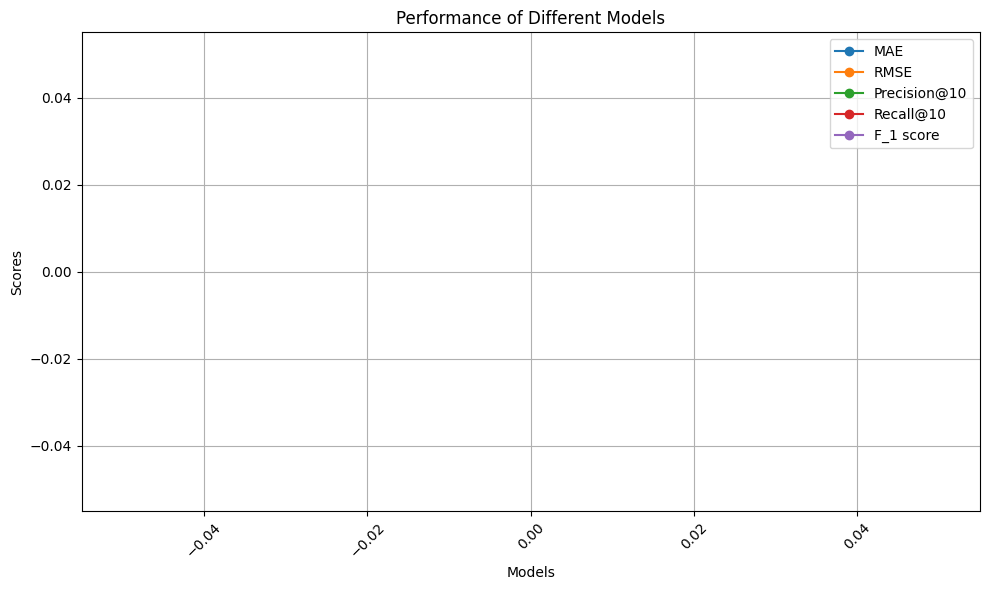

In [1039]:
plot_scores(models_score_dict, metrics)

In [1040]:
def grouped_bar_plot(models_score_dict, metrics):
    model_names = list(models_score_dict.keys())
    num_models = len(model_names)

    fig, ax = plt.subplots(figsize=(13, 6))

    bar_width = 0.1
    index = np.arange(num_models)

    for i, metric in enumerate(metrics):
        scores = [scores_dict[metric] for (_, scores_dict, _) in models_score_dict.values()]
        bars = ax.bar(index + (i * bar_width), scores, bar_width, label=metric)

        # Add values to each bar
        for bar, score in zip(bars, scores):
            ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.05,
                    '{:.2f}'.format(score), ha='center', va='bottom')

    ax.set_xlabel('Models')
    ax.set_ylabel('Scores')
    ax.set_title('Scores by Model and Metric')
    ax.set_xticks(index + (bar_width * (len(metrics) - 1)) / 2)
    ax.set_xticklabels(model_names, rotation=45)
    ax.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

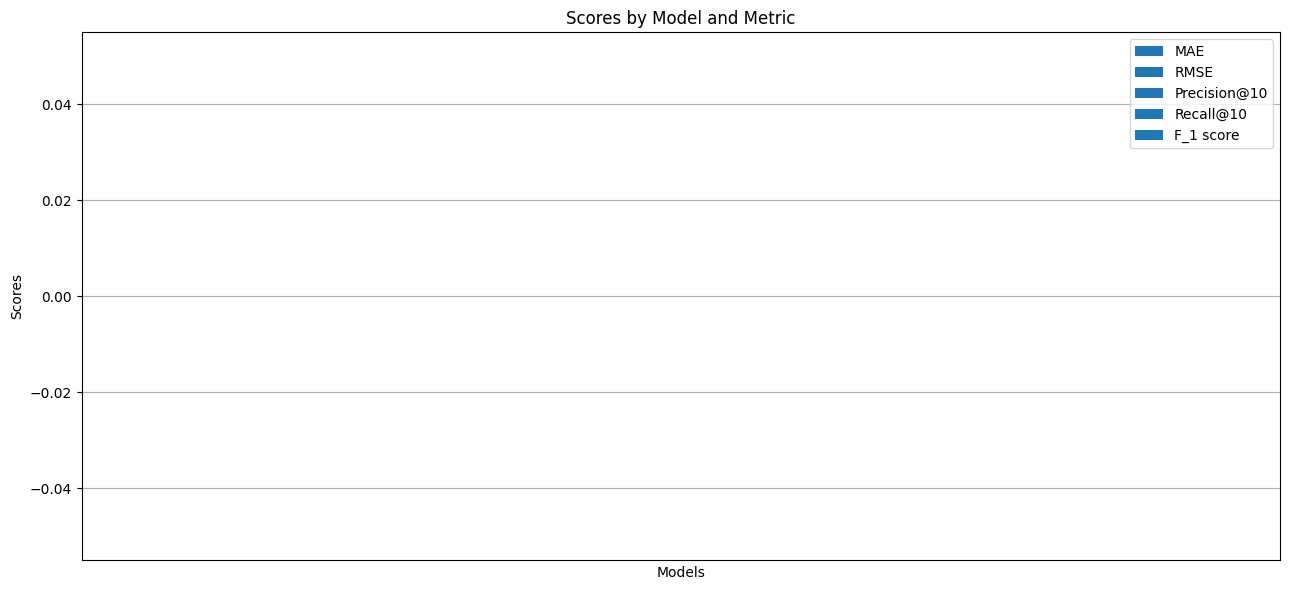

In [1041]:
grouped_bar_plot(models_score_dict, metrics)

# Showing predictions

# Comparing the models

# Final thoughts

<p align="center">
<img src="https://media1.giphy.com/media/l1AsI389lnxkvQHAc/giphy.gif" alt="drawing" width="700"/></p>